In [1]:
import pandas as pd
import polars as pl
import numpy as np
import os
import logging
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.calibration import calibration_curve
import seaborn as sns

In [2]:
def color_scale(val):
    color = plt.cm.viridis(val / 100)  # Usar colormap viridis
    return f'background-color: rgba({int(color[0]*255)}, {int(color[1]*255)}, {int(color[2]*255)}, {color[3]})'

In [3]:
logging.basicConfig()
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

In [4]:
os.chdir("/home/sagemaker-user/data-bbog-integration-fabrica-personas/src")
import data_bbog_integration_fabrica_personas.pipelines.backtesting.nodes as backtesting
import data_bbog_integration_fabrica_personas.pipelines.model_selection.nodes as ms
import data_bbog_integration_fabrica_personas.pipelines.model_output.nodes as mo

In [5]:
%load_ext kedro.ipython

[01/13/25 21:48:08] INFO     Resolved project path as:                                              ]8;id=40559;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=137262;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#139\139]8;;\
                             /home/sagemaker-user/data-bbog-integration-fabrica-personas.                          
                             To set a different path, run '%reload_kedro <project_root>'                           

[01/13/25 21:48:08] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=925117;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=792791;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=214407;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=842167;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/__init__.py:44: KedroDeprecationWarning:                             
                             'AbstractDataSet' has been renamed to 'AbstractDataset', and the alias                
                             will be removed in Kedro 0.19.0                                                       
                               return getattr(kedro.io.core, name)                                                 
                                                                                                                   

                    WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=441486;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=70330;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

[01/13/25 21:48:09] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=499127;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=864820;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

                    INFO     Kedro project data-bbog-integration-fabrica-personas                   ]8;id=702830;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=641462;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#108\108]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=890381;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=138942;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#109\109]8;;\
                             'pipelines'                                                                           

In [6]:
%reload_kedro

                    INFO     Resolved project path as:                                              ]8;id=820521;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=223846;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#139\139]8;;\
                             /home/sagemaker-user/data-bbog-integration-fabrica-personas.                          
                             To set a different path, run '%reload_kedro <project_root>'                           

[01/13/25 21:48:09] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=969851;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=465381;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=527745;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=793829;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/__init__.py:44: KedroDeprecationWarning:                             
                             'AbstractDataSet' has been renamed to 'AbstractDataset', and the alias                
                             will be removed in Kedro 0.19.0                                                       
                               return getattr(kedro.io.core, name)                                                 
                                                                                                                   

                    INFO     Kedro project data-bbog-integration-fabrica-personas                   ]8;id=226098;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=957926;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#108\108]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=690480;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=621952;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#109\109]8;;\
                             'pipelines'                                                                           

## PARÁMETROS Y CATÁLOGO

In [7]:
from typing import Dict, Any, List, Tuple

In [8]:
params= catalog.list
parametros= catalog.load("parameters")

[01/13/25 21:48:13] INFO     Loading data from 'parameters' (MemoryDataset)...                  ]8;id=447868;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=105192;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

## PIPELINES

In [9]:
pipelines;

## PRUEBAS

In [10]:
info_save_select = catalog.load('info_save_select')

[01/13/25 21:24:35] INFO     Loading data from 'info_save_select' (PickleDataSet)...            ]8;id=255174;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=549442;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

In [11]:
info_save_select['modelo_produccion']['weights']

[1, 1, 2]

In [12]:
try:
    display(info_save_select[info_save_select['modelo_produccion']['nodos_select'][1]]["ks_test"])
except:
    display(info_save_select['modelo_produccion']["ks_test"])

prob_min  prob_max  tasa_aperturas
0      93.78     99.99           45.55
1      81.91     93.78            7.59
2      73.64     81.91            4.06
3      65.91     73.64            2.74
4      58.61     65.91            1.94
..       ...       ...             ...
63      2.03      2.08            0.04
64      1.83      2.03            0.02
65      1.75      1.83            0.03
66      1.56      1.75            0.02
67      1.11      1.47            0.01

[68 rows x 3 columns]

In [13]:
model = info_save_select["modelo_produccion"]["best_model"]
model

'Ensamble'

In [14]:
feature_selected_list = catalog.load('feature_selected_list')

[01/13/25 21:33:58] INFO     Loading data from 'feature_selected_list' (ParquetDataSet)...      ]8;id=856183;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=654390;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

In [15]:
homologate_region_model = catalog.load('homologate_region_model')
homologate_region_model

                    INFO     Loading data from 'homologate_region_model' (PickleDataSet)...     ]8;id=957272;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=701246;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\


{
    'variable1': {
        'nombre': 'region',
        'insumo': 'departamento',
        'fillna': 'Other_Region',
        'modo_homologacion': {
            'amazonas': 'Region_Amazonica',
            'antioquia': 'Region_Andina',
            'arauca': 'Region_Orinoquia',
            'archipielago_de_san_andres_providencia_y': 'Region_Caribe',
            'atlantico': 'Region_Caribe',
            'bogota_d_c': 'Region_Central',
            'bogota_d_c_': 'Region_Central',
            'bolivar': 'Region_Caribe',
            'boyaca': 'Region_Andina',
            'caldas': 'Region_Andina',
            'caqueta': 'Region_Amazonica',
            'casanare': 'Region_Orinoquia',
            'cauca': 'Region_Pacifica',
            'cesar': 'Region_Caribe',
            'choco': 'Region_Pacifica',
            'cordoba': 'Region_Caribe',
            'cundinamarca': 'Region_Andina',
            'guainia': 'Region_Amazonica',
            'guaviare': 'Region_Amazonica',
            'huila': 'Re

In [16]:
print(parametros['n_obs_backtesting'])
print(parametros['n_obs_filter'])
parametros['n_obs_backtesting'] = 1
parametros['n_obs_backtesting']

all
0.3


1

In [ ]:
data_process = backtesting.prepare_data_pd(feature_selected_list,homologate_region_model, info_save_select, parametros)
data_process.keys()

[12/16/24 18:38:51] INFO     Se hara el backtesting sobre el 100% de los datos                         ]8;id=126214;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=348207;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#124\124]8;;\

                    INFO     Data con rezago t-1                                                       ]8;id=777984;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=604285;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#136\136]8;;\

                    INFO     Ruta:                                                                     ]8;id=787146;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=797773;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#137\137]8;;\
                             s3://data-bbog-dev-sandbox-entity/casos-uso/feat_599/landing/prueba/featu             
                             re_personas_m202409.parquet                                                           

[12/16/24 18:38:55] INFO     Iniciando preprocesamiento...                                             ]8;id=705693;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=368841;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#251\251]8;;\

                    INFO     Iniciando la preparación de datos para el modelo...                        ]8;id=593372;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=419881;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#50\50]8;;\

                    INFO     Todos los modelos del Ensamble tienen el mismo procesamiento de datos      ]8;id=613264;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=271876;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#58\58]8;;\

                    INFO     Validando columnas requeridas...                                           ]8;id=832010;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=797949;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#48\48]8;;\

[12/16/24 18:38:58] INFO     La tabla contiene las columnas necesarias                                  ]8;id=958619;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=634406;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#73\73]8;;\

                    INFO     Convirtiendo nombres de columnas a minúsculas...                           ]8;id=820377;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=474221;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#87\87]8;;\

[12/16/24 18:38:59] INFO     ['hashvalue1', 'generacion', 'departamento', 'ocupacion', 'aa_ciudad',     ]8;id=953191;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=43643;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#89\89]8;;\
                             'mar_status', 'segmento_cliente', 'grupo_etario', 'mono_multi_prod',                  
                             'seg_comercial']                                                                      

[12/16/24 18:39:06] INFO     Estandarizando variables de texto:                                        ]8;id=686258;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=341375;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#124\124]8;;\

                    INFO     ['generacion', 'departamento', 'ocupacion', 'aa_ciudad', 'mar_status',    ]8;id=441703;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=835240;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#130\130]8;;\
                             'segmento_cliente', 'grupo_etario', 'mono_multi_prod', 'seg_comercial']               

                    INFO     Ajustando la variable String: generacion                                  ]8;id=535570;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=997322;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#163\163]8;;\

[12/16/24 18:39:07] INFO     ['_centennial' '_millennial' '_generacion_x' '_tradicionalista'           ]8;id=762475;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=479729;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#165\165]8;;\
                              '_baby_boomer']                                                                      

[12/16/24 18:39:18] WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=721003;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=261214;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/raw/nodes.py:166:                          
                             SettingWithCopyWarning:                                                               
                             A value is trying to be set on a copy of a slice from a DataFrame.                    
                             Try using .loc[row_indexer,col_indexer] = value instead                               
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               df[col] = df[col].apply(replace_special_characters)                                 
                                                                                                                   

                    INFO     ['_centennial' '_millennial' '_generacion_x' '_tradicionalista'           ]8;id=517011;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=206257;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#167\167]8;;\
                              '_baby_boomer']                                                                      

                    INFO     Ajustando la variable String: departamento                                ]8;id=381416;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=453214;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#163\163]8;;\

                    INFO     ['bogota_d_c_' 'risaralda' 'meta' 'cundinamarca' 'antioquia' 'choco'      ]8;id=171769;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=306610;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#165\165]8;;\
                              'valle_del_cauca' 'atlantico' 'tolima' 'quindio' 'boyaca' None 'bolivar'             
                              'sucre' 'santander' 'la_guajira' 'cordoba' 'cesar' 'casanare' 'caldas'               
                              'cauca' 'huila' 'magdalena' 'narino' 'norte_de_santander' 'caqueta'                  
                              'putumayo' 'arauca' 'amazonas'                                                       
                             'archipielago_de_san_andres_providencia_y'                                            
                              'guaviare' 'vichada' 'vaupes' 'guainia']                                             

[12/16/24 18:39:29] INFO     ['bogota_d_c_' 'risaralda' 'meta' 'cundinamarca' 'antioquia' 'choco'      ]8;id=139989;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=963494;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#167\167]8;;\
                              'valle_del_cauca' 'atlantico' 'tolima' 'quindio' 'boyaca' None 'bolivar'             
                              'sucre' 'santander' 'la_guajira' 'cordoba' 'cesar' 'casanare' 'caldas'               
                              'cauca' 'huila' 'magdalena' 'narino' 'norte_de_santander' 'caqueta'                  
                              'putumayo' 'arauca' 'amazonas'                                                       
                             'archipielago_de_san_andres_providencia_y'                                            
                              'guaviare' 'vichada' 'vaupes' 'guainia']                                             

                    INFO     Ajustando la variable String: ocupacion                                   ]8;id=481772;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=849856;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#163\163]8;;\

                    INFO     ['empleado_privado' 'estudiante' 'independiente' 'empleado_publico'       ]8;id=641122;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=38816;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#165\165]8;;\
                              'pensionado' 'desempleado' 'hogar' 'policia_nacional' 'comerciante'                  
                              'rentista_de_capital' None 'empleado_entidad'                                        
                             'profesional_independiente'                                                           
                              'fuerzas_militares' 'artista' 'politico']                                            

[12/16/24 18:39:41] INFO     ['empleado_privado' 'estudiante' 'independiente' 'empleado_publico'       ]8;id=886539;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=295759;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#167\167]8;;\
                              'pensionado' 'desempleado' 'hogar' 'policia_nacional' 'comerciante'                  
                              'rentista_de_capital' None 'empleado_entidad'                                        
                             'profesional_independiente'                                                           
                              'fuerzas_militares' 'artista' 'politico']                                            

[12/16/24 18:39:42] INFO     Ajustando la variable String: aa_ciudad                                   ]8;id=558092;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=538515;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#163\163]8;;\

                    INFO     ['_' None 'xxxxxxxx' 'bogota' 'zipaquir' 'chaparra' 'jericó' 'ciénaga']   ]8;id=4473;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=385682;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#165\165]8;;\

[12/16/24 18:39:50] INFO     ['_' None 'xxxxxxxx' 'bogota' 'zipaquir' 'chaparra' 'jerico' 'cienaga']   ]8;id=939159;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=926509;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#167\167]8;;\

                    INFO     Ajustando la variable String: mar_status                                  ]8;id=510494;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=182484;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#163\163]8;;\

                    INFO     ['s' None 'u' 'p' 'c' 'o' 'v' 'd' '' 'l']                                 ]8;id=934404;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=712070;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#165\165]8;;\

[12/16/24 18:39:58] INFO     ['s' None 'u' 'p' 'c' 'o' 'v' 'd' '' 'l']                                 ]8;id=245191;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=754634;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#167\167]8;;\

                    INFO     Ajustando la variable String: segmento_cliente                            ]8;id=332631;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=76401;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#163\163]8;;\

                    INFO     ['_masivo' '_preferente' 'desconocido' '_premium' '_otras_personas_na'    ]8;id=5254;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=769901;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#165\165]8;;\
                              '_microfinanzas']                                                                    

[12/16/24 18:40:09] INFO     ['_masivo' '_preferente' 'desconocido' '_premium' '_otras_personas_na'    ]8;id=63852;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=59188;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#167\167]8;;\
                              '_microfinanzas']                                                                    

                    INFO     Ajustando la variable String: grupo_etario                                ]8;id=329075;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=963910;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#163\163]8;;\

                    INFO     ['_joven' '_adulto' '_persona_mayor' '_nino' '_adolescente']              ]8;id=317243;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=695559;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#165\165]8;;\

[12/16/24 18:40:20] INFO     ['_joven' '_adulto' '_persona_mayor' '_nino' '_adolescente']              ]8;id=372866;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=88256;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#167\167]8;;\

                    INFO     Ajustando la variable String: mono_multi_prod                             ]8;id=391448;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=333948;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#163\163]8;;\

                    INFO     ['multi' 'mono' None]                                                     ]8;id=650252;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=131284;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#165\165]8;;\

[12/16/24 18:40:29] INFO     ['multi' 'mono' None]                                                     ]8;id=846245;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=78661;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#167\167]8;;\

                    INFO     Ajustando la variable String: seg_comercial                               ]8;id=397005;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=194055;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#163\163]8;;\

[12/16/24 18:40:30] INFO     ['_']                                                                     ]8;id=456976;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=478719;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#165\165]8;;\

[12/16/24 18:40:38] INFO     ['_']                                                                     ]8;id=740077;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=786160;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#167\167]8;;\

                    INFO     Reemplazando valores específicos vacios por nulos...                      ]8;id=490081;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=655808;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#176\176]8;;\

[12/16/24 18:40:43] INFO     Cambiando la tipologia de los datos...                                    ]8;id=539323;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=522079;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#201\201]8;;\

[12/16/24 18:41:24] WARNING  Cantidad de columnas sin usar: 0                                          ]8;id=400979;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=228042;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#225\225]8;;\

                    WARNING  Columnas sin usar: []                                                     ]8;id=477001;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=821496;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#226\226]8;;\

                    INFO     Iniciando la validación de duplicados por ID y Periodo...                 ]8;id=401795;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=492292;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#252\252]8;;\

                    INFO     Validando hashvalue1 y periodo únicos...                                  ]8;id=88783;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=679299;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#259\259]8;;\

[12/16/24 18:41:25] INFO     Validación exitosa: No se encontraron duplicados.                         ]8;id=584635;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=121208;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#274\274]8;;\

[12/16/24 18:41:30] INFO     Copiando y eliminando la columna hashvalue1 del dataframe de entrada...   ]8;id=303395;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=277011;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#253\253]8;;\

[12/16/24 18:41:33] INFO     Calculando nuevas variables para el modelo...                             ]8;id=81647;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=458603;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#142\142]8;;\

[12/16/24 18:41:34] INFO     Se construyo la variable "mes" con exito!                                  ]8;id=509286;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=66239;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#83\83]8;;\

[12/16/24 18:41:36] INFO     Se construyo la variable "AAAA" con exito!                                 ]8;id=740324;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=691049;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#83\83]8;;\

                    INFO     Se construyo la variable "sum_saldo_activos" con exito!                    ]8;id=552345;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=635045;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#83\83]8;;\

                    INFO     Se construyo la variable "sum_saldo_pasivos" con exito!                    ]8;id=385918;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=200641;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#83\83]8;;\

                    INFO     Se construyo la variable "delta_ah_sum_monto_trx_credito" con exito!       ]8;id=218091;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=851543;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#83\83]8;;\

                    INFO     Se construyo la variable "delta_ah_sum_monto_trx_debito" con exito!        ]8;id=73653;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=387964;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#83\83]8;;\

                    INFO     Se construyo la variable "delta_tc_sum_facturacion_total" con exito!       ]8;id=956016;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=14764;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#83\83]8;;\

                    INFO     Se construyo la variable "num_activos_prev" con exito!                     ]8;id=271081;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=841596;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#83\83]8;;\

                    INFO     Se construyo la variable "num_pasivos_prev" con exito!                     ]8;id=591282;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=244237;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#83\83]8;;\

                    INFO     Se construyo la variable "num_prod_activos" con exito!                     ]8;id=136253;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=171937;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#83\83]8;;\

                    INFO     Se construyo la variable "num_prod_pasivos" con exito!                     ]8;id=52163;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=480654;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#83\83]8;;\

                    INFO     Nuevas variables calculadas completamente. Dimension de la data: (3083460, ]8;id=719026;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=155523;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#89\89]8;;\
                             277)                                                                                  

                    INFO     Homologando regiones...                                                   ]8;id=872920;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=98101;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#147\147]8;;\

[12/16/24 18:41:38] INFO     Caracter: nan de la variable insumo: departamento no parametrizado en la  ]8;id=856905;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=913490;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#134\134]8;;\
                             homologacion de strings para crear: region                                            

                    INFO     La nulidad se remplazara con Other_Region antes de la capa de model_input ]8;id=200661;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=901417;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#140\140]8;;\

[12/16/24 18:41:39] INFO     Ok la homologacion de la variable region con departamento                 ]8;id=603155;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=970061;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#143\143]8;;\

                    INFO     Tamaño de la data: (3083460, 278)                                         ]8;id=158194;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=903234;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#145\145]8;;\

                    INFO     Seleccionando las características especificadas...                        ]8;id=50641;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=705057;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#151\151]8;;\

                    INFO     Aplicando transformación a las variables seleccionadas...                 ]8;id=150962;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=18914;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#159\159]8;;\

[12/16/24 18:41:48] INFO     Iniciando la filtracion de feature relevantes ...                          ]8;id=39621;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=431414;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#53\53]8;;\

                    INFO     Iniciando con el tratamiento de datos nulos en variables numericas y      ]8;id=105109;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=451754;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#371\371]8;;\
                             tratando los outliers                                                                 

[12/16/24 18:41:49] INFO     Comenzando a llenar los datos nulos                                       ]8;id=191266;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=560451;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#396\396]8;;\

[12/16/24 18:41:55] INFO     Datos Nulos rellenados.                                                   ]8;id=84408;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=872194;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#398\398]8;;\

                    INFO     Comenzando a transformar las variables con outliers                       ]8;id=739015;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=574152;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#402\402]8;;\

                    INFO     Comenzado a transformar los datos                                         ]8;id=138670;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=281184;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#311\311]8;;\

[12/16/24 18:41:56] INFO     Actualizando los datos nulos y outliers en variables numericas            ]8;id=649073;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=978397;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#410\410]8;;\

[12/16/24 18:41:57] INFO     ['generacion']                                                            ]8;id=782088;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=604336;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#627\627]8;;\

[12/16/24 18:41:59] WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=639022;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=54595;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_input/nodes.py:511:                  
                             FutureWarning: Downcasting behavior in `replace` is deprecated and                    
                             will be removed in a future version. To retain the old behavior,                      
                             explicitly call `result.infer_objects(copy=False)`. To opt-in to the                  
                             future behavior, set `pd.set_option('future.no_silent_downcasting',                   
                             True)`                                                                                
                               index_null = Y_encoded[col].isnull().replace(False,                                 
                             np.nan).dropna().index.tolist()                                                       
                                                                                                                   

                    INFO     Iniciando a actualizar el One Hot Encoding...                             ]8;id=841400;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=849653;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#705\705]8;;\

[12/16/24 18:42:00] INFO     La Feature: _tradicionalista de la variable: generacion. Se procesa como  ]8;id=29111;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=44526;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#756\756]8;;\
                             _baby_boomer                                                                          

                    INFO     Iniciando la estandarización con Min-Max Scaler...                        ]8;id=966430;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=516742;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#838\838]8;;\

[12/16/24 18:42:05] INFO     Estandarización con Min-Max Scaler completada!                            ]8;id=830072;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=718576;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#857\857]8;;\

[12/16/24 18:42:06] INFO     Preparación de datos completada exitosamente.                             ]8;id=685181;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=562571;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#167\167]8;;\

                    INFO     Iniciando el proceso de predicciones...                                   ]8;id=439237;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=478512;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#260\260]8;;\

                    INFO     Realizando predicciones con el modelo entrenado...                        ]8;id=725262;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=381223;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#203\203]8;;\

                    INFO     Es un Ensamble                                                            ]8;id=705393;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=925403;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#205\205]8;;\

                    INFO     Tipo de Threshold: KS                                                     ]8;id=856508;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=60433;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#295\295]8;;\

                    INFO     ------------------------------------------------------                    ]8;id=961637;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=79645;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: MLP_0,Run1. Weight: 1                                             ]8;id=484872;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=357593;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[12/16/24 18:42:07] INFO     Update probs: Selected: 0, Target Select: 3083460, Diff %: -1.0           ]8;id=703150;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=767579;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Update probs: Selected: 22032, Target Select: 3083460, Diff %:            ]8;id=10929;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=352661;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9928547800198478                                                                   

[12/16/24 18:42:08] INFO     Update probs: Selected: 47637, Target Select: 3083460, Diff %:            ]8;id=512930;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=666991;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9845507968321301                                                                   

                    INFO     Update probs: Selected: 76265, Target Select: 3083460, Diff %:            ]8;id=67220;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=296953;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9752664214875497                                                                   

[12/16/24 18:42:09] INFO     Update probs: Selected: 100416, Target Select: 3083460, Diff %:           ]8;id=160956;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=830636;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9674339864956899                                                                   

                    INFO     Update probs: Selected: 122906, Target Select: 3083460, Diff %:           ]8;id=427484;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=408740;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9601402320769525                                                                   

                    INFO     Update probs: Selected: 143101, Target Select: 3083460, Diff %:           ]8;id=174738;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=533713;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9535907714061477                                                                   

[12/16/24 18:42:10] INFO     Update probs: Selected: 159841, Target Select: 3083460, Diff %:           ]8;id=578612;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=119694;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9481618052447575                                                                   

                    INFO     Update probs: Selected: 176546, Target Select: 3083460, Diff %:           ]8;id=659035;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=200480;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9427441899684121                                                                   

[12/16/24 18:42:11] INFO     Update probs: Selected: 193958, Target Select: 3083460, Diff %:           ]8;id=256141;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=204699;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9370972868141633                                                                   

                    INFO     Update probs: Selected: 211689, Target Select: 3083460, Diff %:           ]8;id=454394;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=850788;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9313469284505069                                                                   

[12/16/24 18:42:12] INFO     Update probs: Selected: 229079, Target Select: 3083460, Diff %:           ]8;id=641424;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=99858;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9257071601382862                                                                   

                    INFO     Update probs: Selected: 245623, Target Select: 3083460, Diff %:           ]8;id=727240;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=41961;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9203417589331465                                                                   

                    INFO     Update probs: Selected: 265991, Target Select: 3083460, Diff %:           ]8;id=124650;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=622515;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9137361924591206                                                                   

[12/16/24 18:42:13] INFO     Update probs: Selected: 284769, Target Select: 3083460, Diff %:           ]8;id=779494;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=740844;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9076462804771264                                                                   

                    INFO     Update probs: Selected: 303364, Target Select: 3083460, Diff %:           ]8;id=211617;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=811377;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9016157174083659                                                                   

[12/16/24 18:42:14] INFO     Update probs: Selected: 322121, Target Select: 3083460, Diff %:           ]8;id=441361;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=202667;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8955326159573985                                                                   

                    INFO     Update probs: Selected: 339489, Target Select: 3083460, Diff %:           ]8;id=804582;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=78165;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8898999824872059                                                                   

                    INFO     Update probs: Selected: 377596, Target Select: 3083460, Diff %:           ]8;id=716843;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=446345;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8775414631615134                                                                   

[12/16/24 18:42:15] INFO     Update probs: Selected: 398526, Target Select: 3083460, Diff %:           ]8;id=152962;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=818341;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8707536339047693                                                                   

                    INFO     Update probs: Selected: 419195, Target Select: 3083460, Diff %:           ]8;id=811083;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=431382;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8640504498193587                                                                   

[12/16/24 18:42:16] INFO     Update probs: Selected: 437644, Target Select: 3083460, Diff %:           ]8;id=96977;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=977137;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8580672361567849                                                                   

                    INFO     Update probs: Selected: 459692, Target Select: 3083460, Diff %:           ]8;id=580576;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=950323;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8509168272006123                                                                   

[12/16/24 18:42:17] INFO     Update probs: Selected: 480641, Target Select: 3083460, Diff %:           ]8;id=49527;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=651524;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.844122836034844                                                                    

                    INFO     Update probs: Selected: 500208, Target Select: 3083460, Diff %:           ]8;id=474155;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=942987;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8377770426728416                                                                   

                    INFO     Update probs: Selected: 520009, Target Select: 3083460, Diff %:           ]8;id=758656;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=265211;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8313553605365401                                                                   

[12/16/24 18:42:18] INFO     Update probs: Selected: 537191, Target Select: 3083460, Diff %:           ]8;id=291619;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=842454;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8257830489125852                                                                   

                    INFO     Update probs: Selected: 558207, Target Select: 3083460, Diff %:           ]8;id=238883;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=493742;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8189673289097312                                                                   

[12/16/24 18:42:19] INFO     Update probs: Selected: 575347, Target Select: 3083460, Diff %:           ]8;id=471536;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=381108;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8134086383478301                                                                   

                    INFO     Update probs: Selected: 592483, Target Select: 3083460, Diff %:           ]8;id=881145;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=342126;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8078512450299339                                                                   

                    INFO     Update probs: Selected: 611643, Target Select: 3083460, Diff %:           ]8;id=826896;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=517457;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8016374462454515                                                                   

[12/16/24 18:42:20] INFO     Update probs: Selected: 645630, Target Select: 3083460, Diff %:           ]8;id=750203;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=86265;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7906150882450235                                                                   

                    INFO     Update probs: Selected: 664120, Target Select: 3083460, Diff %:           ]8;id=648676;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=479939;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7846185778313972                                                                   

[12/16/24 18:42:21] INFO     Update probs: Selected: 682075, Target Select: 3083460, Diff %:           ]8;id=380360;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=24781;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7787955738034545                                                                   

                    INFO     Update probs: Selected: 701068, Target Select: 3083460, Diff %:           ]8;id=95933;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=112749;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7726359349561855                                                                   

                    INFO     Update probs: Selected: 719738, Target Select: 3083460, Diff %:           ]8;id=359404;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=434797;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7665810485623293                                                                   

[12/16/24 18:42:22] INFO     Update probs: Selected: 737316, Target Select: 3083460, Diff %:           ]8;id=733832;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=949148;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7608803097818684                                                                   

                    INFO     Update probs: Selected: 757247, Target Select: 3083460, Diff %:           ]8;id=504282;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=890771;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7544164672154009                                                                   

[12/16/24 18:42:23] INFO     Update probs: Selected: 782246, Target Select: 3083460, Diff %:           ]8;id=290955;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=93270;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7463090164944576                                                                   

                    INFO     Update probs: Selected: 812122, Target Select: 3083460, Diff %:           ]8;id=835800;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=974347;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7366199010202824                                                                   

[12/16/24 18:42:24] INFO     Update probs: Selected: 830569, Target Select: 3083460, Diff %:           ]8;id=852079;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=492073;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7306373359797111                                                                   

                    INFO     Update probs: Selected: 849896, Target Select: 3083460, Diff %:           ]8;id=620541;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=676206;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7243693772580153                                                                   

                    INFO     Update probs: Selected: 869909, Target Select: 3083460, Diff %:           ]8;id=26958;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=56017;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7178789411894431                                                                   

[12/16/24 18:42:25] INFO     Update probs: Selected: 895854, Target Select: 3083460, Diff %:           ]8;id=577764;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=515801;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7094646922612909                                                                   

                    INFO     Update probs: Selected: 929836, Target Select: 3083460, Diff %:           ]8;id=920884;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=210912;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6984439558158692                                                                   

[12/16/24 18:42:26] INFO     Update probs: Selected: 977144, Target Select: 3083460, Diff %:           ]8;id=72894;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=388499;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6831014509674197                                                                   

                    INFO     Update probs: Selected: 1085509, Target Select: 3083460, Diff %:          ]8;id=92050;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=923516;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6479574893139525                                                                   

                    INFO     Update probs: Selected: 1115614, Target Select: 3083460, Diff %:          ]8;id=629359;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=810316;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6381941066204848                                                                   

[12/16/24 18:42:27] INFO     Update probs: Selected: 1147905, Target Select: 3083460, Diff %:          ]8;id=714932;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=263127;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6277217800782238                                                                   

                    INFO     Update probs: Selected: 1241939, Target Select: 3083460, Diff %:          ]8;id=25380;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=299530;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5972255193840685                                                                   

[12/16/24 18:42:28] INFO     Update probs: Selected: 1268982, Target Select: 3083460, Diff %:          ]8;id=955024;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=623371;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5884551769765134                                                                   

                    INFO     Update probs: Selected: 1293523, Target Select: 3083460, Diff %:          ]8;id=692665;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=999904;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5804962606941553                                                                   

[12/16/24 18:42:29] INFO     Update probs: Selected: 1319413, Target Select: 3083460, Diff %:          ]8;id=301009;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=574566;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5720998488710735                                                                   

                    INFO     Update probs: Selected: 1349037, Target Select: 3083460, Diff %:          ]8;id=473365;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=649861;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5624924597692202                                                                   

                    INFO     Update probs: Selected: 1377956, Target Select: 3083460, Diff %:          ]8;id=230716;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=8683;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.553113709923268                                                                    

[12/16/24 18:42:30] INFO     Update probs: Selected: 1401377, Target Select: 3083460, Diff %:          ]8;id=938711;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=19406;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.545518021962341                                                                    

                    INFO     Update probs: Selected: 1447368, Target Select: 3083460, Diff %:          ]8;id=688903;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=869500;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5306026347025744                                                                   

[12/16/24 18:42:31] INFO     Update probs: Selected: 1475741, Target Select: 3083460, Diff %:          ]8;id=98740;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=206669;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5214009586633198                                                                   

                    INFO     Update probs: Selected: 1498494, Target Select: 3083460, Diff %:          ]8;id=173714;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=521634;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5140219104512463                                                                   

                    INFO     Update probs: Selected: 1526789, Target Select: 3083460, Diff %:          ]8;id=788166;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=152658;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5048455306700914                                                                   

[12/16/24 18:42:32] INFO     Update probs: Selected: 1594463, Target Select: 3083460, Diff %:          ]8;id=76009;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=248357;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4828981079696186                                                                   

                    INFO     Update probs: Selected: 1617100, Target Select: 3083460, Diff %:          ]8;id=906353;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=362434;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4755566798336933                                                                   

[12/16/24 18:42:33] INFO     Update probs: Selected: 1653451, Target Select: 3083460, Diff %:          ]8;id=957873;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=581045;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.46376765062624453                                                                  

                    INFO     Update probs: Selected: 1677657, Target Select: 3083460, Diff %:          ]8;id=502427;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=91192;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.45591737852931447                                                                  

[12/16/24 18:42:34] INFO     Update probs: Selected: 1697691, Target Select: 3083460, Diff %:          ]8;id=531681;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=778223;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4494201319297153                                                                   

                    INFO     Update probs: Selected: 1745044, Target Select: 3083460, Diff %:          ]8;id=577439;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=946307;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.43406303308620836                                                                  

                    INFO     Update probs: Selected: 1770219, Target Select: 3083460, Diff %:          ]8;id=490310;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=542391;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4258985036290401                                                                   

[12/16/24 18:42:35] INFO     Update probs: Selected: 1793414, Target Select: 3083460, Diff %:          ]8;id=86348;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=764218;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4183761099544019                                                                   

                    INFO     Update probs: Selected: 1814674, Target Select: 3083460, Diff %:          ]8;id=254394;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=353679;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4114812580672362                                                                   

[12/16/24 18:42:36] INFO     Update probs: Selected: 1850089, Target Select: 3083460, Diff %:          ]8;id=729730;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=956507;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3999957839569834                                                                   

                    INFO     Update probs: Selected: 1872538, Target Select: 3083460, Diff %:          ]8;id=524125;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=212557;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3927153262892984                                                                   

                    INFO     Update probs: Selected: 1892630, Target Select: 3083460, Diff %:          ]8;id=684857;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=931846;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3861992696516251                                                                   

[12/16/24 18:42:37] INFO     Update probs: Selected: 1918345, Target Select: 3083460, Diff %:          ]8;id=987965;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=892485;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.37785961225376685                                                                  

                    INFO     Update probs: Selected: 1937280, Target Select: 3083460, Diff %:          ]8;id=333619;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=772770;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.371718783444572                                                                    

[12/16/24 18:42:38] INFO     Update probs: Selected: 1957390, Target Select: 3083460, Diff %:          ]8;id=5074;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=817192;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3651968892088757                                                                   

                    INFO     Update probs: Selected: 1976552, Target Select: 3083460, Diff %:          ]8;id=324169;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=280822;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3589824418023908                                                                   

[12/16/24 18:42:39] INFO     Update probs: Selected: 2003802, Target Select: 3083460, Diff %:          ]8;id=975075;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=45572;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3501449670175712                                                                   

                    INFO     Update probs: Selected: 2038542, Target Select: 3083460, Diff %:          ]8;id=485995;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=114268;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3388784028331809                                                                   

                    INFO     Update probs: Selected: 2085760, Target Select: 3083460, Diff %:          ]8;id=315438;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=838751;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.32356508597484646                                                                  

[12/16/24 18:42:40] INFO     Update probs: Selected: 2160131, Target Select: 3083460, Diff %:          ]8;id=432580;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=756573;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2994457524988163                                                                   

                    INFO     Update probs: Selected: 2237915, Target Select: 3083460, Diff %:          ]8;id=624230;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=308008;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.274219545575425                                                                    

[12/16/24 18:42:41] INFO     Update probs: Selected: 2327722, Target Select: 3083460, Diff %:          ]8;id=193059;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=388148;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.24509414748367095                                                                  

                    INFO     Update probs: Selected: 2446322, Target Select: 3083460, Diff %:          ]8;id=801932;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=49059;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2066308627321256                                                                   

                    INFO     Update probs: Selected: 2584400, Target Select: 3083460, Diff %:          ]8;id=132533;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=252561;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.16185064829769155                                                                  

[12/16/24 18:42:42] INFO     Update probs: Selected: 2691133, Target Select: 3083460, Diff %:          ]8;id=79995;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=176805;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.12723596219830968                                                                  

                    INFO     Update probs: Selected: 2760082, Target Select: 3083460, Diff %:          ]8;id=50197;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=428748;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.10487504297120767                                                                  

[12/16/24 18:42:43] INFO     Update probs: Selected: 2815079, Target Select: 3083460, Diff %:          ]8;id=689415;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=745963;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.08703891083393331                                                                  

                    INFO     Update probs: Selected: 2876470, Target Select: 3083460, Diff %:          ]8;id=831344;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=670939;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.06712913415448879                                                                  

[12/16/24 18:42:44] INFO     Update probs: Selected: 2921525, Target Select: 3083460, Diff %:          ]8;id=820656;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=628681;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.05251730199191817                                                                  

                    INFO     Update probs: Selected: 2951629, Target Select: 3083460, Diff %:          ]8;id=466992;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=256329;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.04275424360945172                                                                  

                    INFO     Update probs: Selected: 3022053, Target Select: 3083460, Diff %:          ]8;id=164773;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=521407;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.019914965655464963                                                                 

[12/16/24 18:42:45] INFO     Update probs: Selected: 3052833, Target Select: 3083460, Diff %:          ]8;id=906798;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=133896;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.009932673036134732                                                                 

                    INFO     ------------------------------------------------------                    ]8;id=84366;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=745918;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: MLP_3,Run4. Weight: 1                                             ]8;id=360678;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=508837;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[12/16/24 18:42:47] INFO     Update probs: Selected: 0, Target Select: 3083460, Diff %: -1.0           ]8;id=110665;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=360324;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Update probs: Selected: 18406, Target Select: 3083460, Diff %:            ]8;id=815209;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=615826;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9940307317104811                                                                   

                    INFO     Update probs: Selected: 35866, Target Select: 3083460, Diff %:            ]8;id=143131;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=518433;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9883682616281709                                                                   

[12/16/24 18:42:48] INFO     Update probs: Selected: 57887, Target Select: 3083460, Diff %:            ]8;id=315219;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=938290;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9812266090690328                                                                   

                    INFO     Update probs: Selected: 78943, Target Select: 3083460, Diff %:            ]8;id=538533;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=395311;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9743979166261278                                                                   

[12/16/24 18:42:49] INFO     Update probs: Selected: 97723, Target Select: 3083460, Diff %:            ]8;id=620157;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=116479;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.968307356022131                                                                    

                    INFO     Update probs: Selected: 114235, Target Select: 3083460, Diff %:           ]8;id=268335;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=921418;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9629523327690321                                                                   

                    INFO     Update probs: Selected: 129791, Target Select: 3083460, Diff %:           ]8;id=267777;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=362319;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9579073508331549                                                                   

[12/16/24 18:42:50] INFO     Update probs: Selected: 145874, Target Select: 3083460, Diff %:           ]8;id=852344;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=272317;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9526914569996043                                                                   

                    INFO     Update probs: Selected: 161380, Target Select: 3083460, Diff %:           ]8;id=978347;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=179236;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.947662690613791                                                                    

[12/16/24 18:42:51] INFO     Update probs: Selected: 176935, Target Select: 3083460, Diff %:           ]8;id=871481;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=385678;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.942618032988915                                                                    

                    INFO     Update probs: Selected: 193355, Target Select: 3083460, Diff %:           ]8;id=595920;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=56444;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9372928463479339                                                                   

[12/16/24 18:42:52] INFO     Update probs: Selected: 209741, Target Select: 3083460, Diff %:           ]8;id=150327;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=918429;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.931978686280996                                                                    

                    INFO     Update probs: Selected: 226886, Target Select: 3083460, Diff %:           ]8;id=971341;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=220422;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9264183741640883                                                                   

                    INFO     Update probs: Selected: 244568, Target Select: 3083460, Diff %:           ]8;id=165325;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=874894;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9206839070394945                                                                   

[12/16/24 18:42:53] INFO     Update probs: Selected: 262498, Target Select: 3083460, Diff %:           ]8;id=425416;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=559037;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9148690107865839                                                                   

                    INFO     Update probs: Selected: 279556, Target Select: 3083460, Diff %:           ]8;id=57741;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=238091;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9093369137267875                                                                   

[12/16/24 18:42:54] INFO     Update probs: Selected: 296686, Target Select: 3083460, Diff %:           ]8;id=404719;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=735097;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.903781466274899                                                                    

                    INFO     Update probs: Selected: 313864, Target Select: 3083460, Diff %:           ]8;id=940771;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=371121;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8982104518949492                                                                   

                    INFO     Update probs: Selected: 331304, Target Select: 3083460, Diff %:           ]8;id=581438;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=179607;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8925544680326646                                                                   

[12/16/24 18:42:55] INFO     Update probs: Selected: 349019, Target Select: 3083460, Diff %:           ]8;id=50265;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=346353;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8868092986450287                                                                   

                    INFO     Update probs: Selected: 370823, Target Select: 3083460, Diff %:           ]8;id=218459;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=636662;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8797380215731678                                                                   

[12/16/24 18:42:56] INFO     Update probs: Selected: 390853, Target Select: 3083460, Diff %:           ]8;id=503913;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=437255;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8732420722175738                                                                   

                    INFO     Update probs: Selected: 411183, Target Select: 3083460, Diff %:           ]8;id=684015;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=750342;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8666488295615964                                                                   

[12/16/24 18:42:57] INFO     Update probs: Selected: 431229, Target Select: 3083460, Diff %:           ]8;id=765490;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=592234;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8601476912299819                                                                   

                    INFO     Update probs: Selected: 455389, Target Select: 3083460, Diff %:           ]8;id=647537;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=250640;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8523123374391106                                                                   

                    INFO     Update probs: Selected: 474813, Target Select: 3083460, Diff %:           ]8;id=216378;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=327882;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8460129205502909                                                                   

[12/16/24 18:42:58] INFO     Update probs: Selected: 493828, Target Select: 3083460, Diff %:           ]8;id=165243;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=295756;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8398461468609938                                                                   

                    INFO     Update probs: Selected: 519015, Target Select: 3083460, Diff %:           ]8;id=436604;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=254831;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8316777256718102                                                                   

[12/16/24 18:42:59] INFO     Update probs: Selected: 534176, Target Select: 3083460, Diff %:           ]8;id=625302;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=190182;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8267608465814378                                                                   

                    INFO     Update probs: Selected: 549519, Target Select: 3083460, Diff %:           ]8;id=145983;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=220195;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8217849428888326                                                                   

                    INFO     Update probs: Selected: 565962, Target Select: 3083460, Diff %:           ]8;id=38335;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=488877;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.816452297094822                                                                    

[12/16/24 18:43:00] INFO     Update probs: Selected: 584535, Target Select: 3083460, Diff %:           ]8;id=53839;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=805746;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8104288688680897                                                                   

                    INFO     Update probs: Selected: 603284, Target Select: 3083460, Diff %:           ]8;id=330299;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=487358;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8043483619051326                                                                   

[12/16/24 18:43:01] INFO     Update probs: Selected: 621178, Target Select: 3083460, Diff %:           ]8;id=469692;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=197244;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7985451408482679                                                                   

                    INFO     Update probs: Selected: 638452, Target Select: 3083460, Diff %:           ]8;id=718837;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=265912;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7929429926121954                                                                   

[12/16/24 18:43:02] INFO     Update probs: Selected: 661554, Target Select: 3083460, Diff %:           ]8;id=98642;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=373116;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.785450759860676                                                                    

                    INFO     Update probs: Selected: 679910, Target Select: 3083460, Diff %:           ]8;id=644137;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=68665;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.779497707121221                                                                    

                    INFO     Update probs: Selected: 699491, Target Select: 3083460, Diff %:           ]8;id=716089;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=107512;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7731473734052007                                                                   

[12/16/24 18:43:03] INFO     Update probs: Selected: 720145, Target Select: 3083460, Diff %:           ]8;id=31404;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=875406;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7664490539848092                                                                   

                    INFO     Update probs: Selected: 742832, Target Select: 3083460, Diff %:           ]8;id=62756;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=229709;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7590914102988201                                                                   

[12/16/24 18:43:04] INFO     Update probs: Selected: 774388, Target Select: 3083460, Diff %:           ]8;id=29174;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=788508;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7488574523424983                                                                   

                    INFO     Update probs: Selected: 811408, Target Select: 3083460, Diff %:           ]8;id=405405;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=221186;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7368514590751948                                                                   

                    INFO     Update probs: Selected: 857890, Target Select: 3083460, Diff %:           ]8;id=381765;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=612279;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7217768351138008                                                                   

[12/16/24 18:43:05] INFO     Update probs: Selected: 886199, Target Select: 3083460, Diff %:           ]8;id=145475;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=389757;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.712595914978628                                                                    

                    INFO     Update probs: Selected: 909364, Target Select: 3083460, Diff %:           ]8;id=707972;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=886584;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.705083250634028                                                                    

[12/16/24 18:43:06] INFO     Update probs: Selected: 998099, Target Select: 3083460, Diff %:           ]8;id=414215;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=18052;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6763055139356438                                                                   

                    INFO     Update probs: Selected: 1062779, Target Select: 3083460, Diff %:          ]8;id=497738;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=805240;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6553290783729966                                                                   

[12/16/24 18:43:07] INFO     Update probs: Selected: 1129079, Target Select: 3083460, Diff %:          ]8;id=233158;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=506447;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6338272589882794                                                                   

                    INFO     Update probs: Selected: 1150728, Target Select: 3083460, Diff %:          ]8;id=384423;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=292332;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6268062501216166                                                                   

                    INFO     Update probs: Selected: 1206920, Target Select: 3083460, Diff %:          ]8;id=15419;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=618064;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6085825663378153                                                                   

[12/16/24 18:43:08] INFO     Update probs: Selected: 1225568, Target Select: 3083460, Diff %:          ]8;id=90252;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=786659;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6025348147859871                                                                   

                    INFO     Update probs: Selected: 1244132, Target Select: 3083460, Diff %:          ]8;id=266674;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=14439;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5965143053582663                                                                   

[12/16/24 18:43:09] INFO     Update probs: Selected: 1263574, Target Select: 3083460, Diff %:          ]8;id=188651;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=807951;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5902090508714236                                                                   

                    INFO     Update probs: Selected: 1282554, Target Select: 3083460, Diff %:          ]8;id=125007;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=887577;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5840536280671713                                                                   

                    INFO     Update probs: Selected: 1301312, Target Select: 3083460, Diff %:          ]8;id=507710;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=743111;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5779702023052026                                                                   

[12/16/24 18:43:10] INFO     Update probs: Selected: 1324316, Target Select: 3083460, Diff %:          ]8;id=627034;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=635297;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5705097520318084                                                                   

                    INFO     Update probs: Selected: 1345333, Target Select: 3083460, Diff %:          ]8;id=315771;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=511379;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5636937077179532                                                                   

[12/16/24 18:43:11] INFO     Update probs: Selected: 1367404, Target Select: 3083460, Diff %:          ]8;id=266497;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=774753;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5565358396087512                                                                   

                    INFO     Update probs: Selected: 1386267, Target Select: 3083460, Diff %:          ]8;id=946630;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=967449;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5504183611916483                                                                   

[12/16/24 18:43:12] INFO     Update probs: Selected: 1409346, Target Select: 3083460, Diff %:          ]8;id=131311;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=674035;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5429335875931584                                                                   

                    INFO     Update probs: Selected: 1433670, Target Select: 3083460, Diff %:          ]8;id=447325;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=289887;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5350450467980775                                                                   

                    INFO     Update probs: Selected: 1460607, Target Select: 3083460, Diff %:          ]8;id=524607;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=582173;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5263090813566578                                                                   

[12/16/24 18:43:13] INFO     Update probs: Selected: 1477651, Target Select: 3083460, Diff %:          ]8;id=749445;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=169676;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5207815246508792                                                                   

                    INFO     Update probs: Selected: 1530612, Target Select: 3083460, Diff %:          ]8;id=318026;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=917426;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5036056897122064                                                                   

[12/16/24 18:43:14] INFO     Update probs: Selected: 1552636, Target Select: 3083460, Diff %:          ]8;id=99942;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=11479;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4964630642200645                                                                   

                    INFO     Update probs: Selected: 1572304, Target Select: 3083460, Diff %:          ]8;id=650317;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=406181;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.490084515446933                                                                    

[12/16/24 18:43:15] INFO     Update probs: Selected: 1592830, Target Select: 3083460, Diff %:          ]8;id=57898;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=9711;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4834277078347052                                                                   

                    INFO     Update probs: Selected: 1609927, Target Select: 3083460, Diff %:          ]8;id=345114;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=88895;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4778829626458589                                                                   

                    INFO     Update probs: Selected: 1627513, Target Select: 3083460, Diff %:          ]8;id=643733;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=545451;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4721796293773877                                                                   

[12/16/24 18:43:16] INFO     Update probs: Selected: 1646776, Target Select: 3083460, Diff %:          ]8;id=715616;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=968396;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.46593242655977374                                                                  

                    INFO     Update probs: Selected: 1668540, Target Select: 3083460, Diff %:          ]8;id=172526;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=395084;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.45887412192796406                                                                  

[12/16/24 18:43:17] INFO     Update probs: Selected: 1686707, Target Select: 3083460, Diff %:          ]8;id=353594;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=197334;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4529823639677505                                                                   

                    INFO     Update probs: Selected: 1707594, Target Select: 3083460, Diff %:          ]8;id=503192;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=193445;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4462084800840614                                                                   

                    INFO     Update probs: Selected: 1731853, Target Select: 3083460, Diff %:          ]8;id=868620;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=472853;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4383410195040636                                                                   

[12/16/24 18:43:18] INFO     Update probs: Selected: 1787813, Target Select: 3083460, Diff %:          ]8;id=438043;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=430541;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.42019257587255876                                                                  

                    INFO     Update probs: Selected: 1822811, Target Select: 3083460, Diff %:          ]8;id=571388;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=716846;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.40884233944983883                                                                  

[12/16/24 18:43:19] INFO     Update probs: Selected: 1862630, Target Select: 3083460, Diff %:          ]8;id=201276;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=804902;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3959285996899587                                                                   

                    INFO     Update probs: Selected: 1903554, Target Select: 3083460, Diff %:          ]8;id=802131;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=193394;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3826564962736666                                                                   

[12/16/24 18:43:20] INFO     Update probs: Selected: 1963691, Target Select: 3083460, Diff %:          ]8;id=85725;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=412673;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3631534055898244                                                                   

                    INFO     Update probs: Selected: 2018995, Target Select: 3083460, Diff %:          ]8;id=684056;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=893947;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.34521770997515777                                                                  

                    INFO     Update probs: Selected: 2079258, Target Select: 3083460, Diff %:          ]8;id=829834;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=918288;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3256737561051546                                                                   

[12/16/24 18:43:21] INFO     Update probs: Selected: 2169512, Target Select: 3083460, Diff %:          ]8;id=7013;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=709343;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.29640339099582935                                                                  

                    INFO     Update probs: Selected: 2270246, Target Select: 3083460, Diff %:          ]8;id=116654;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=440712;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.26373424659311295                                                                  

[12/16/24 18:43:22] INFO     Update probs: Selected: 2416239, Target Select: 3083460, Diff %:          ]8;id=920220;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=462787;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.21638711058356522                                                                  

                    INFO     Update probs: Selected: 2504510, Target Select: 3083460, Diff %:          ]8;id=410229;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=42349;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.18775985418977384                                                                  

[12/16/24 18:43:23] INFO     Update probs: Selected: 2596255, Target Select: 3083460, Diff %:          ]8;id=335510;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=641316;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.1580059413775434                                                                   

                    INFO     Update probs: Selected: 2716564, Target Select: 3083460, Diff %:          ]8;id=141854;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=374854;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.11898840912481433                                                                  

                    INFO     Update probs: Selected: 2788929, Target Select: 3083460, Diff %:          ]8;id=312135;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=993279;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0955196435173474                                                                   

[12/16/24 18:43:24] INFO     Update probs: Selected: 2839502, Target Select: 3083460, Diff %:          ]8;id=997033;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=896110;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.07911826324972596                                                                  

                    INFO     Update probs: Selected: 2883647, Target Select: 3083460, Diff %:          ]8;id=261378;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=194412;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.06480155409831813                                                                  

[12/16/24 18:43:25] INFO     Update probs: Selected: 2931873, Target Select: 3083460, Diff %:          ]8;id=743199;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=737258;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.04916133175069565                                                                  

                    INFO     Update probs: Selected: 2980119, Target Select: 3083460, Diff %:          ]8;id=192305;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=734134;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.03351462318304761                                                                  

                    INFO     Update probs: Selected: 3019939, Target Select: 3083460, Diff %:          ]8;id=934258;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=127390;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.020600559112166204                                                                 

[12/16/24 18:43:26] INFO     Update probs: Selected: 3053518, Target Select: 3083460, Diff %:          ]8;id=497847;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=946896;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.009710520000259449                                                                 

                    INFO     ------------------------------------------------------                    ]8;id=248291;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=904699;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: MLP_6,Run7. Weight: 2                                             ]8;id=144488;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=471977;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[12/16/24 18:43:28] INFO     Update probs: Selected: 0, Target Select: 3083460, Diff %: -1.0           ]8;id=90588;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=212993;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Update probs: Selected: 15942, Target Select: 3083460, Diff %:            ]8;id=986819;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=53908;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9948298340176296                                                                   

                    INFO     Update probs: Selected: 32310, Target Select: 3083460, Diff %:            ]8;id=228343;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=256316;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9895215115487147                                                                   

[12/16/24 18:43:29] INFO     Update probs: Selected: 46940, Target Select: 3083460, Diff %:            ]8;id=544105;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=922874;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9847768416000208                                                                   

                    INFO     Update probs: Selected: 61357, Target Select: 3083460, Diff %:            ]8;id=18807;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=320135;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9801012498945989                                                                   

[12/16/24 18:43:30] INFO     Update probs: Selected: 73780, Target Select: 3083460, Diff %:            ]8;id=750655;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=356536;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.976072334325725                                                                    

                    INFO     Update probs: Selected: 86213, Target Select: 3083460, Diff %:            ]8;id=201369;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=5991;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9720401756468383                                                                   

[12/16/24 18:43:31] INFO     Update probs: Selected: 99977, Target Select: 3083460, Diff %:            ]8;id=457179;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=950847;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9675763590252509                                                                   

                    INFO     Update probs: Selected: 114761, Target Select: 3083460, Diff %:           ]8;id=75461;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=312342;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.96278174518236                                                                     

                    INFO     Update probs: Selected: 130295, Target Select: 3083460, Diff %:           ]8;id=137395;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=762071;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9577438980885109                                                                   

[12/16/24 18:43:32] INFO     Update probs: Selected: 148517, Target Select: 3083460, Diff %:           ]8;id=44276;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=344305;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9518343030232271                                                                   

                    INFO     Update probs: Selected: 167710, Target Select: 3083460, Diff %:           ]8;id=921051;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=805425;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9456098019757027                                                                   

[12/16/24 18:43:33] INFO     Update probs: Selected: 185895, Target Select: 3083460, Diff %:           ]8;id=472045;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=574591;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9397122064174661                                                                   

                    INFO     Update probs: Selected: 203315, Target Select: 3083460, Diff %:           ]8;id=759687;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=255862;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.934062708775207                                                                    

                    INFO     Update probs: Selected: 221335, Target Select: 3083460, Diff %:           ]8;id=976283;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=368333;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9282186245321814                                                                   

[12/16/24 18:43:34] INFO     Update probs: Selected: 238930, Target Select: 3083460, Diff %:           ]8;id=36316;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=425069;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9225123724646987                                                                   

                    INFO     Update probs: Selected: 258124, Target Select: 3083460, Diff %:           ]8;id=182370;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=522077;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9162875471061729                                                                   

[12/16/24 18:43:35] INFO     Update probs: Selected: 276644, Target Select: 3083460, Diff %:           ]8;id=372087;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=501875;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9102813073625083                                                                   

                    INFO     Update probs: Selected: 295290, Target Select: 3083460, Diff %:           ]8;id=64716;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=576862;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9042342044326828                                                                   

                    INFO     Update probs: Selected: 313327, Target Select: 3083460, Diff %:           ]8;id=491188;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=267634;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8983846069026353                                                                   

[12/16/24 18:43:36] INFO     Update probs: Selected: 329728, Target Select: 3083460, Diff %:           ]8;id=864183;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=949545;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8930655821706784                                                                   

                    INFO     Update probs: Selected: 348013, Target Select: 3083460, Diff %:           ]8;id=606686;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=406425;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.887135555512314                                                                    

[12/16/24 18:43:37] INFO     Update probs: Selected: 372998, Target Select: 3083460, Diff %:           ]8;id=805205;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=295009;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8790326451453886                                                                   

                    INFO     Update probs: Selected: 392582, Target Select: 3083460, Diff %:           ]8;id=323855;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=182656;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8726813384963644                                                                   

[12/16/24 18:43:38] INFO     Update probs: Selected: 407474, Target Select: 3083460, Diff %:           ]8;id=945478;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=15804;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8678516990653357                                                                   

                    INFO     Update probs: Selected: 427982, Target Select: 3083460, Diff %:           ]8;id=410071;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=657250;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8612007290511309                                                                   

                    INFO     Update probs: Selected: 447335, Target Select: 3083460, Diff %:           ]8;id=707812;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=536070;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8549243382434019                                                                   

[12/16/24 18:43:39] INFO     Update probs: Selected: 470763, Target Select: 3083460, Diff %:           ]8;id=556739;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=372350;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8473263801054659                                                                   

                    INFO     Update probs: Selected: 499001, Target Select: 3083460, Diff %:           ]8;id=517707;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=993922;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8381684860513838                                                                   

[12/16/24 18:43:40] INFO     Update probs: Selected: 525204, Target Select: 3083460, Diff %:           ]8;id=438493;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=431061;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.829670564884902                                                                    

                    INFO     Update probs: Selected: 546382, Target Select: 3083460, Diff %:           ]8;id=531352;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=468458;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8228023064998411                                                                   

                    INFO     Update probs: Selected: 570924, Target Select: 3083460, Diff %:           ]8;id=425465;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=835470;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8148430659064817                                                                   

[12/16/24 18:43:41] INFO     Update probs: Selected: 595680, Target Select: 3083460, Diff %:           ]8;id=897655;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=833590;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8068144227588488                                                                   

                    INFO     Update probs: Selected: 621451, Target Select: 3083460, Diff %:           ]8;id=197655;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=91256;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.798456603944919                                                                    

[12/16/24 18:43:42] INFO     Update probs: Selected: 643671, Target Select: 3083460, Diff %:           ]8;id=712984;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=736973;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7912504134965266                                                                   

                    INFO     Update probs: Selected: 666554, Target Select: 3083460, Diff %:           ]8;id=860020;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=147135;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7838292048542871                                                                   

[12/16/24 18:43:43] INFO     Update probs: Selected: 689040, Target Select: 3083460, Diff %:           ]8;id=917700;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=457410;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7765367476795548                                                                   

                    INFO     Update probs: Selected: 713122, Target Select: 3083460, Diff %:           ]8;id=349549;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=647779;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7687266901467832                                                                   

                    INFO     Update probs: Selected: 751016, Target Select: 3083460, Diff %:           ]8;id=192880;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=18877;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7564372490643627                                                                   

[12/16/24 18:43:44] INFO     Update probs: Selected: 784143, Target Select: 3083460, Diff %:           ]8;id=14955;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=70511;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7456937985250336                                                                   

                    INFO     Update probs: Selected: 814896, Target Select: 3083460, Diff %:           ]8;id=158038;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=991833;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7357202623027378                                                                   

[12/16/24 18:43:45] INFO     Update probs: Selected: 845499, Target Select: 3083460, Diff %:           ]8;id=620003;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=674334;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7257953727306338                                                                   

                    INFO     Update probs: Selected: 878342, Target Select: 3083460, Diff %:           ]8;id=360193;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=538607;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7151440265156674                                                                   

                    INFO     Update probs: Selected: 911784, Target Select: 3083460, Diff %:           ]8;id=667729;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=431101;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7042984180109357                                                                   

[12/16/24 18:43:46] INFO     Update probs: Selected: 948802, Target Select: 3083460, Diff %:           ]8;id=540354;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=807561;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6922930733656347                                                                   

                    INFO     Update probs: Selected: 978203, Target Select: 3083460, Diff %:           ]8;id=84386;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=441218;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6827580056170666                                                                   

[12/16/24 18:43:47] INFO     Update probs: Selected: 1007929, Target Select: 3083460, Diff %:          ]8;id=860668;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=961504;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6731175367930831                                                                   

                    INFO     Update probs: Selected: 1034907, Target Select: 3083460, Diff %:          ]8;id=747000;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=626370;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.664368274600611                                                                    

[12/16/24 18:43:48] INFO     Update probs: Selected: 1062341, Target Select: 3083460, Diff %:          ]8;id=516902;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=604165;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6554711265915563                                                                   

                    INFO     Update probs: Selected: 1086521, Target Select: 3083460, Diff %:          ]8;id=763869;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=938740;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6476292865806594                                                                   

                    INFO     Update probs: Selected: 1112030, Target Select: 3083460, Diff %:          ]8;id=867526;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=666501;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6393564372490643                                                                   

[12/16/24 18:43:49] INFO     Update probs: Selected: 1168306, Target Select: 3083460, Diff %:          ]8;id=940111;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=43477;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6211055113411558                                                                   

                    INFO     Update probs: Selected: 1262666, Target Select: 3083460, Diff %:          ]8;id=984949;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=258129;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5905035252605839                                                                   

[12/16/24 18:43:50] INFO     Update probs: Selected: 1291232, Target Select: 3083460, Diff %:          ]8;id=595235;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=931728;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5812392571980827                                                                   

                    INFO     Update probs: Selected: 1346343, Target Select: 3083460, Diff %:          ]8;id=433486;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=285999;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5633661536066626                                                                   

                    INFO     Update probs: Selected: 1377869, Target Select: 3083460, Diff %:          ]8;id=741226;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=960037;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5531419249803792                                                                   

[12/16/24 18:43:51] INFO     Update probs: Selected: 1399335, Target Select: 3083460, Diff %:          ]8;id=45079;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=432458;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5461802650269503                                                                   

                    INFO     Update probs: Selected: 1432209, Target Select: 3083460, Diff %:          ]8;id=309221;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=744246;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5355188651709444                                                                   

[12/16/24 18:43:52] INFO     Update probs: Selected: 1455657, Target Select: 3083460, Diff %:          ]8;id=331620;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=993880;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5279144208129828                                                                   

                    INFO     Update probs: Selected: 1479677, Target Select: 3083460, Diff %:          ]8;id=922574;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=513955;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5201244705622904                                                                   

[12/16/24 18:43:53] INFO     Update probs: Selected: 1517722, Target Select: 3083460, Diff %:          ]8;id=817463;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=2160;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5077860585186771                                                                   

                    INFO     Update probs: Selected: 1543820, Target Select: 3083460, Diff %:          ]8;id=880374;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=150962;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4993221900073294                                                                   

                    INFO     Update probs: Selected: 1569903, Target Select: 3083460, Diff %:          ]8;id=295030;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=244500;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.49086318616100094                                                                  

[12/16/24 18:43:54] INFO     Update probs: Selected: 1598407, Target Select: 3083460, Diff %:          ]8;id=634197;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=289124;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.48161902538057894                                                                  

                    INFO     Update probs: Selected: 1662045, Target Select: 3083460, Diff %:          ]8;id=560645;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=857152;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.46098052188126326                                                                  

[12/16/24 18:43:55] INFO     Update probs: Selected: 1689785, Target Select: 3083460, Diff %:          ]8;id=602945;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=532444;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4519841347058175                                                                   

                    INFO     Update probs: Selected: 1723787, Target Select: 3083460, Diff %:          ]8;id=658504;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=265830;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.44095691204037024                                                                  

                    INFO     Update probs: Selected: 1755295, Target Select: 3083460, Diff %:          ]8;id=519469;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=316040;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4307385210121098                                                                   

[12/16/24 18:43:56] INFO     Update probs: Selected: 1803827, Target Select: 3083460, Diff %:          ]8;id=577658;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=693733;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4149990594980963                                                                   

                    INFO     Update probs: Selected: 1833454, Target Select: 3083460, Diff %:          ]8;id=663581;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=885537;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.40539069746323936                                                                  

[12/16/24 18:43:57] INFO     Update probs: Selected: 1870770, Target Select: 3083460, Diff %:          ]8;id=864753;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=758129;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3932887081395575                                                                   

                    INFO     Update probs: Selected: 1904143, Target Select: 3083460, Diff %:          ]8;id=865466;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=3975;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.382465477093914                                                                    

[12/16/24 18:43:58] INFO     Update probs: Selected: 1943085, Target Select: 3083460, Diff %:          ]8;id=850709;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=395341;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3698361580821545                                                                   

                    INFO     Update probs: Selected: 1980939, Target Select: 3083460, Diff %:          ]8;id=576487;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=463849;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.35755968943978517                                                                  

                    INFO     Update probs: Selected: 2027558, Target Select: 3083460, Diff %:          ]8;id=991864;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=620643;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3424406348712161                                                                   

[12/16/24 18:43:59] INFO     Update probs: Selected: 2068913, Target Select: 3083460, Diff %:          ]8;id=531146;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=58545;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3290287534133733                                                                   

                    INFO     Update probs: Selected: 2111795, Target Select: 3083460, Diff %:          ]8;id=457491;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=432871;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3151216490565793                                                                   

[12/16/24 18:44:00] INFO     Update probs: Selected: 2157596, Target Select: 3083460, Diff %:          ]8;id=198663;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=976110;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.30026788088705547                                                                  

                    INFO     Update probs: Selected: 2206844, Target Select: 3083460, Diff %:          ]8;id=20247;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=176290;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2842962126961271                                                                   

[12/16/24 18:44:01] INFO     Update probs: Selected: 2263289, Target Select: 3083460, Diff %:          ]8;id=219456;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=919368;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.26599047822900246                                                                  

                    INFO     Update probs: Selected: 2324963, Target Select: 3083460, Diff %:          ]8;id=396279;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=133045;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.24598892153619636                                                                  

                    INFO     Update probs: Selected: 2395108, Target Select: 3083460, Diff %:          ]8;id=753118;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=310795;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2232401263515661                                                                   

[12/16/24 18:44:02] INFO     Update probs: Selected: 2459834, Target Select: 3083460, Diff %:          ]8;id=177524;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=267262;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.20224877248286016                                                                  

                    INFO     Update probs: Selected: 2535926, Target Select: 3083460, Diff %:          ]8;id=260836;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=323802;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.17757129977363093                                                                  

[12/16/24 18:44:03] INFO     Update probs: Selected: 2624621, Target Select: 3083460, Diff %:          ]8;id=944822;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=951239;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.14880653551529774                                                                  

                    INFO     Update probs: Selected: 2717416, Target Select: 3083460, Diff %:          ]8;id=980553;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=420901;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.11871209615172566                                                                  

                    INFO     Update probs: Selected: 2788898, Target Select: 3083460, Diff %:          ]8;id=725900;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=261483;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.09552969715838701                                                                  

[12/16/24 18:44:04] INFO     Update probs: Selected: 2830969, Target Select: 3083460, Diff %:          ]8;id=119441;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=557736;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0818856090236293                                                                   

                    INFO     Update probs: Selected: 2856559, Target Select: 3083460, Diff %:          ]8;id=943807;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=642623;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.07358649050093077                                                                  

[12/16/24 18:44:05] INFO     Update probs: Selected: 2883166, Target Select: 3083460, Diff %:          ]8;id=80317;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=725006;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.06495754768993274                                                                  

                    INFO     Update probs: Selected: 2928526, Target Select: 3083460, Diff %:          ]8;id=661279;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=396977;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.050246800671972396                                                                 

[12/16/24 18:44:06] INFO     Update probs: Selected: 2985381, Target Select: 3083460, Diff %:          ]8;id=335406;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=155460;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.03180809869432391                                                                  

                    INFO     Update probs: Selected: 3011192, Target Select: 3083460, Diff %:          ]8;id=406878;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=128198;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.023437307440342992                                                                 

                    INFO     Update probs: Selected: 3034536, Target Select: 3083460, Diff %:          ]8;id=955998;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=747160;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.015866591426514372                                                                 

[12/16/24 18:44:07] INFO     Update probs: Selected: 3057957, Target Select: 3083460, Diff %:          ]8;id=997262;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=373936;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.00827090346558736                                                                  

                    INFO     ------------------------------------------------------                    ]8;id=487025;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=568134;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: MLP_9,Run10. Weight: 1                                            ]8;id=995558;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=406345;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[12/16/24 18:44:09] INFO     Update probs: Selected: 0, Target Select: 3083460, Diff %: -1.0           ]8;id=886406;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=226968;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Update probs: Selected: 19612, Target Select: 3083460, Diff %:            ]8;id=551235;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=719192;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9936396126429401                                                                   

                    INFO     Update probs: Selected: 28317, Target Select: 3083460, Diff %:            ]8;id=2440;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=944942;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.990816485376817                                                                    

[12/16/24 18:44:10] INFO     Update probs: Selected: 37002, Target Select: 3083460, Diff %:            ]8;id=525320;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=121929;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9879998443307194                                                                   

                    INFO     Update probs: Selected: 46269, Target Select: 3083460, Diff %:            ]8;id=945988;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=633780;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9849944542818782                                                                   

[12/16/24 18:44:11] INFO     Update probs: Selected: 57306, Target Select: 3083460, Diff %:            ]8;id=407362;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=245798;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9814150337607752                                                                   

                    INFO     Update probs: Selected: 70916, Target Select: 3083460, Diff %:            ]8;id=189977;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=408534;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9770011610333845                                                                   

                    INFO     Update probs: Selected: 88279, Target Select: 3083460, Diff %:            ]8;id=999088;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=981451;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9713701491181984                                                                   

[12/16/24 18:44:12] INFO     Update probs: Selected: 109073, Target Select: 3083460, Diff %:           ]8;id=113579;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=355298;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9646264261576282                                                                   

                    INFO     Update probs: Selected: 130653, Target Select: 3083460, Diff %:           ]8;id=636721;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=138596;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9576277947500536                                                                   

[12/16/24 18:44:13] INFO     Update probs: Selected: 151331, Target Select: 3083460, Diff %:           ]8;id=357729;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=449195;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9509216918656315                                                                   

                    INFO     Update probs: Selected: 172536, Target Select: 3083460, Diff %:           ]8;id=556718;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=516258;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.944044677083536                                                                    

[12/16/24 18:44:14] INFO     Update probs: Selected: 193126, Target Select: 3083460, Diff %:           ]8;id=757799;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=676752;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9373671135672265                                                                   

                    INFO     Update probs: Selected: 213684, Target Select: 3083460, Diff %:           ]8;id=621009;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=569345;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9306999280029578                                                                   

                    INFO     Update probs: Selected: 233793, Target Select: 3083460, Diff %:           ]8;id=260880;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=987020;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9241783580782628                                                                   

[12/16/24 18:44:15] INFO     Update probs: Selected: 253247, Target Select: 3083460, Diff %:           ]8;id=549137;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=369335;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9178692118594047                                                                   

                    INFO     Update probs: Selected: 273163, Target Select: 3083460, Diff %:           ]8;id=842453;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=383187;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9114102339579563                                                                   

[12/16/24 18:44:16] INFO     Update probs: Selected: 316612, Target Select: 3083460, Diff %:           ]8;id=100509;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=701278;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8973192452634379                                                                   

                    INFO     Update probs: Selected: 338956, Target Select: 3083460, Diff %:           ]8;id=119929;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=284840;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.890072840250887                                                                    

[12/16/24 18:44:17] INFO     Update probs: Selected: 360053, Target Select: 3083460, Diff %:           ]8;id=473339;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=839084;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8832308510569296                                                                   

                    INFO     Update probs: Selected: 380728, Target Select: 3083460, Diff %:           ]8;id=203082;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=533579;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8765257211055113                                                                   

                    INFO     Update probs: Selected: 397490, Target Select: 3083460, Diff %:           ]8;id=233473;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=912499;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8710896201020931                                                                   

[12/16/24 18:44:18] INFO     Update probs: Selected: 414299, Target Select: 3083460, Diff %:           ]8;id=574025;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=676521;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8656382764816148                                                                   

                    INFO     Update probs: Selected: 435139, Target Select: 3083460, Diff %:           ]8;id=269073;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=766741;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8588796352149858                                                                   

[12/16/24 18:44:19] INFO     Update probs: Selected: 452238, Target Select: 3083460, Diff %:           ]8;id=112343;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=146103;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8533342414041369                                                                   

                    INFO     Update probs: Selected: 471487, Target Select: 3083460, Diff %:           ]8;id=444453;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=967822;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8470915789405408                                                                   

                    INFO     Update probs: Selected: 484018, Target Select: 3083460, Diff %:           ]8;id=651276;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=285432;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8430276377835288                                                                   

[12/16/24 18:44:20] INFO     Update probs: Selected: 504539, Target Select: 3083460, Diff %:           ]8;id=735459;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=480590;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8363724517263075                                                                   

                    INFO     Update probs: Selected: 525731, Target Select: 3083460, Diff %:           ]8;id=155352;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=354119;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8294996529872286                                                                   

[12/16/24 18:44:21] INFO     Update probs: Selected: 545603, Target Select: 3083460, Diff %:           ]8;id=506103;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=339638;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8230549447698364                                                                   

                    INFO     Update probs: Selected: 566653, Target Select: 3083460, Diff %:           ]8;id=865424;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=895998;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8162281981929391                                                                   

[12/16/24 18:44:22] INFO     Update probs: Selected: 590298, Target Select: 3083460, Diff %:           ]8;id=771372;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=53433;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8085598645677259                                                                   

                    INFO     Update probs: Selected: 616790, Target Select: 3083460, Diff %:           ]8;id=289943;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=455216;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7999682175218747                                                                   

                    INFO     Update probs: Selected: 642647, Target Select: 3083460, Diff %:           ]8;id=543054;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=681523;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.791582507961835                                                                    

[12/16/24 18:44:23] INFO     Update probs: Selected: 680488, Target Select: 3083460, Diff %:           ]8;id=504458;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=634094;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7793102553624824                                                                   

                    INFO     Update probs: Selected: 700144, Target Select: 3083460, Diff %:           ]8;id=683400;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=933594;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7729355983213663                                                                   

[12/16/24 18:44:24] INFO     Update probs: Selected: 720074, Target Select: 3083460, Diff %:           ]8;id=285835;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=226309;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7664720800659                                                                      

                    INFO     Update probs: Selected: 739457, Target Select: 3083460, Diff %:           ]8;id=262001;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=323295;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7601859599281326                                                                   

                    INFO     Update probs: Selected: 759137, Target Select: 3083460, Diff %:           ]8;id=795961;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=522686;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7538035194229858                                                                   

[12/16/24 18:44:25] INFO     Update probs: Selected: 778014, Target Select: 3083460, Diff %:           ]8;id=336327;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=41789;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7476815006518651                                                                   

                    INFO     Update probs: Selected: 796504, Target Select: 3083460, Diff %:           ]8;id=812745;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=323056;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7416849902382389                                                                   

[12/16/24 18:44:26] INFO     Update probs: Selected: 814812, Target Select: 3083460, Diff %:           ]8;id=791527;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=179093;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7357475044268452                                                                   

                    INFO     Update probs: Selected: 835980, Target Select: 3083460, Diff %:           ]8;id=5626;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=692058;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.728882489151797                                                                    

[12/16/24 18:44:27] INFO     Update probs: Selected: 855984, Target Select: 3083460, Diff %:           ]8;id=244031;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=961210;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7223949718822362                                                                   

                    INFO     Update probs: Selected: 875636, Target Select: 3083460, Diff %:           ]8;id=728073;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=247198;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7160216120851252                                                                   

                    INFO     Update probs: Selected: 896864, Target Select: 3083460, Diff %:           ]8;id=636326;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=978652;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7091371381500003                                                                   

[12/16/24 18:44:28] INFO     Update probs: Selected: 924072, Target Select: 3083460, Diff %:           ]8;id=927918;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=819847;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7003132844272344                                                                   

                    INFO     Update probs: Selected: 1011970, Target Select: 3083460, Diff %:          ]8;id=718031;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=512136;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6718069960369195                                                                   

[12/16/24 18:44:29] INFO     Update probs: Selected: 1055839, Target Select: 3083460, Diff %:          ]8;id=217283;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=441119;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6575797967218644                                                                   

                    INFO     Update probs: Selected: 1080258, Target Select: 3083460, Diff %:          ]8;id=967448;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=218570;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6496604463816622                                                                   

[12/16/24 18:44:30] INFO     Update probs: Selected: 1108361, Target Select: 3083460, Diff %:          ]8;id=553233;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=678697;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6405463343127525                                                                   

                    INFO     Update probs: Selected: 1135917, Target Select: 3083460, Diff %:          ]8;id=831188;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=133348;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6316096203615419                                                                   

                    INFO     Update probs: Selected: 1230324, Target Select: 3083460, Diff %:          ]8;id=839093;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=347067;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.60099239166391                                                                     

[12/16/24 18:44:31] INFO     Update probs: Selected: 1285717, Target Select: 3083460, Diff %:          ]8;id=664479;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=979307;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5830278323701297                                                                   

                    INFO     Update probs: Selected: 1315801, Target Select: 3083460, Diff %:          ]8;id=572418;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=597490;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5732712602076888                                                                   

[12/16/24 18:44:32] INFO     Update probs: Selected: 1338728, Target Select: 3083460, Diff %:          ]8;id=402187;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=568238;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5658357818813929                                                                   

                    INFO     Update probs: Selected: 1365714, Target Select: 3083460, Diff %:          ]8;id=739699;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=820180;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5570839252009107                                                                   

[12/16/24 18:44:33] INFO     Update probs: Selected: 1392479, Target Select: 3083460, Diff %:          ]8;id=625708;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=949365;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5484037412517108                                                                   

                    INFO     Update probs: Selected: 1418907, Target Select: 3083460, Diff %:          ]8;id=602325;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=666969;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5398328501099414                                                                   

                    INFO     Update probs: Selected: 1442697, Target Select: 3083460, Diff %:          ]8;id=7960;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=812466;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5321174913895429                                                                   

[12/16/24 18:44:34] INFO     Update probs: Selected: 1464986, Target Select: 3083460, Diff %:          ]8;id=126134;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=613784;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5248889234820624                                                                   

                    INFO     Update probs: Selected: 1486943, Target Select: 3083460, Diff %:          ]8;id=895090;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=897721;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5177680268270061                                                                   

[12/16/24 18:44:35] INFO     Update probs: Selected: 1511923, Target Select: 3083460, Diff %:          ]8;id=962866;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=847496;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.509666738015087                                                                    

                    INFO     Update probs: Selected: 1539016, Target Select: 3083460, Diff %:          ]8;id=418087;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=13468;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5008801800574679                                                                   

                    INFO     Update probs: Selected: 1573890, Target Select: 3083460, Diff %:          ]8;id=210531;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=329403;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4895701581989064                                                                   

[12/16/24 18:44:36] INFO     Update probs: Selected: 1608781, Target Select: 3083460, Diff %:          ]8;id=631984;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=831115;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4782546230533232                                                                   

                    INFO     Update probs: Selected: 1631175, Target Select: 3083460, Diff %:          ]8;id=363552;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=211139;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4709920024907085                                                                   

[12/16/24 18:44:37] INFO     Update probs: Selected: 1651847, Target Select: 3083460, Diff %:          ]8;id=226380;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=513276;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4642878454722941                                                                   

                    INFO     Update probs: Selected: 1700757, Target Select: 3083460, Diff %:          ]8;id=751837;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=197964;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.44842579439979763                                                                  

[12/16/24 18:44:38] INFO     Update probs: Selected: 1724471, Target Select: 3083460, Diff %:          ]8;id=463345;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=261265;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4407350833154962                                                                   

                    INFO     Update probs: Selected: 1770203, Target Select: 3083460, Diff %:          ]8;id=464301;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=777668;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.42590369260506056                                                                  

                    INFO     Update probs: Selected: 1810709, Target Select: 3083460, Diff %:          ]8;id=237966;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=225707;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.41276715118730256                                                                  

[12/16/24 18:44:39] INFO     Update probs: Selected: 1839784, Target Select: 3083460, Diff %:          ]8;id=651014;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=714579;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.40333780882515097                                                                  

                    INFO     Update probs: Selected: 1868969, Target Select: 3083460, Diff %:          ]8;id=958345;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=354882;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3938727922528588                                                                   

[12/16/24 18:44:40] INFO     Update probs: Selected: 1898373, Target Select: 3083460, Diff %:          ]8;id=229394;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=964622;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3843367515712868                                                                   

                    INFO     Update probs: Selected: 1956966, Target Select: 3083460, Diff %:          ]8;id=951380;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=51603;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3653343970734175                                                                   

[12/16/24 18:44:41] INFO     Update probs: Selected: 2006048, Target Select: 3083460, Diff %:          ]8;id=119899;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=532;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3494165645087013                                                                   

                    INFO     Update probs: Selected: 2052299, Target Select: 3083460, Diff %:          ]8;id=703583;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=220972;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3344168563886024                                                                   

                    INFO     Update probs: Selected: 2095458, Target Select: 3083460, Diff %:          ]8;id=407485;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=770625;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.32041991788445445                                                                  

[12/16/24 18:44:42] INFO     Update probs: Selected: 2153749, Target Select: 3083460, Diff %:          ]8;id=779953;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=141174;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3015155053089711                                                                   

                    INFO     Update probs: Selected: 2209877, Target Select: 3083460, Diff %:          ]8;id=454409;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=600198;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.28331257742925153                                                                  

[12/16/24 18:44:43] INFO     Update probs: Selected: 2269115, Target Select: 3083460, Diff %:          ]8;id=155982;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=814160;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2641010423355581                                                                   

                    INFO     Update probs: Selected: 2330532, Target Select: 3083460, Diff %:          ]8;id=36707;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=48807;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.24418283357008036                                                                  

                    INFO     Update probs: Selected: 2399585, Target Select: 3083460, Diff %:          ]8;id=216984;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=312923;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.22178818599884545                                                                  

[12/16/24 18:44:44] INFO     Update probs: Selected: 2484101, Target Select: 3083460, Diff %:          ]8;id=309308;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=678528;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.19437871741485216                                                                  

                    INFO     Update probs: Selected: 2584121, Target Select: 3083460, Diff %:          ]8;id=375351;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=487422;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.16194113106704805                                                                  

[12/16/24 18:44:45] INFO     Update probs: Selected: 2718195, Target Select: 3083460, Diff %:          ]8;id=898247;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=304563;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.11845945788173026                                                                  

                    INFO     Update probs: Selected: 2906048, Target Select: 3083460, Diff %:          ]8;id=591478;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=4614;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.05753666335869445                                                                  

[12/16/24 18:44:46] INFO     Update probs: Selected: 2948323, Target Select: 3083460, Diff %:          ]8;id=74816;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=35067;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.04382641577967608                                                                  

                    INFO     Update probs: Selected: 2988491, Target Select: 3083460, Diff %:          ]8;id=286423;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=426610;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.030799491480349998                                                                 

                    INFO     Update probs: Selected: 3053445, Target Select: 3083460, Diff %:          ]8;id=957975;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=617946;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.009734194703352727                                                                 

[12/16/24 18:44:47] INFO     ------------------------------------------------------                    ]8;id=401326;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=989510;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: random_forest_11,Run12. Weight: 1                                 ]8;id=834067;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=297427;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    1.0s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    3.4s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    6.8s
[Parallel(n_jobs=64)]: Done 900 out of 900 | elapsed:    8.9s finished


[12/16/24 18:44:56] INFO     Update probs: Selected: 0, Target Select: 3083460, Diff %: -1.0           ]8;id=108464;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=406723;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[12/16/24 18:44:57] INFO     Update probs: Selected: 19780, Target Select: 3083460, Diff %:            ]8;id=490520;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=660812;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9935851283947255                                                                   

                    INFO     Update probs: Selected: 30656, Target Select: 3083460, Diff %:            ]8;id=526428;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=800997;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9900579219448282                                                                   

[12/16/24 18:44:58] INFO     Update probs: Selected: 49914, Target Select: 3083460, Diff %:            ]8;id=781361;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=381061;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9838123406822207                                                                   

                    INFO     Update probs: Selected: 66203, Target Select: 3083460, Diff %:            ]8;id=926866;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=259795;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9785296387824067                                                                   

[12/16/24 18:44:59] INFO     Update probs: Selected: 85377, Target Select: 3083460, Diff %:            ]8;id=647132;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=59266;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9723112996439065                                                                   

                    INFO     Update probs: Selected: 93884, Target Select: 3083460, Diff %:            ]8;id=470892;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=675894;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9695523859560364                                                                   

                    INFO     Update probs: Selected: 102818, Target Select: 3083460, Diff %:           ]8;id=459942;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=67850;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9666549914706206                                                                   

[12/16/24 18:45:00] INFO     Update probs: Selected: 114182, Target Select: 3083460, Diff %:           ]8;id=550033;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=261962;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9629695212520999                                                                   

                    INFO     Update probs: Selected: 124544, Target Select: 3083460, Diff %:           ]8;id=217640;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=679733;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9596090106568596                                                                   

[12/16/24 18:45:01] INFO     Update probs: Selected: 139795, Target Select: 3083460, Diff %:           ]8;id=435491;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=609932;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.954662943576372                                                                    

                    INFO     Update probs: Selected: 153752, Target Select: 3083460, Diff %:           ]8;id=104442;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=821614;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9501365349315379                                                                   

[12/16/24 18:45:02] INFO     Update probs: Selected: 178096, Target Select: 3083460, Diff %:           ]8;id=821012;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=818952;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9422415079164316                                                                   

                    INFO     Update probs: Selected: 202234, Target Select: 3083460, Diff %:           ]8;id=212789;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=494945;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9344132889675884                                                                   

                    INFO     Update probs: Selected: 231191, Target Select: 3083460, Diff %:           ]8;id=754383;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=752036;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9250222153035875                                                                   

[12/16/24 18:45:03] INFO     Update probs: Selected: 256030, Target Select: 3083460, Diff %:           ]8;id=801552;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=743092;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9169666543428486                                                                   

                    INFO     Update probs: Selected: 278712, Target Select: 3083460, Diff %:           ]8;id=352808;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=682287;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9096106322118659                                                                   

[12/16/24 18:45:04] INFO     Update probs: Selected: 302945, Target Select: 3083460, Diff %:           ]8;id=164126;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=172437;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9017516037179013                                                                   

                    INFO     Update probs: Selected: 324879, Target Select: 3083460, Diff %:           ]8;id=160234;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=435784;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8946381662158743                                                                   

[12/16/24 18:45:05] INFO     Update probs: Selected: 349229, Target Select: 3083460, Diff %:           ]8;id=939389;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=416892;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8867411933347603                                                                   

                    INFO     Update probs: Selected: 391009, Target Select: 3083460, Diff %:           ]8;id=72133;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=439213;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8731914797013745                                                                   

                    INFO     Update probs: Selected: 408227, Target Select: 3083460, Diff %:           ]8;id=31494;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=503809;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8676074928813735                                                                   

[12/16/24 18:45:06] INFO     Update probs: Selected: 429420, Target Select: 3083460, Diff %:           ]8;id=314577;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=115549;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8607343698312934                                                                   

                    INFO     Update probs: Selected: 458080, Target Select: 3083460, Diff %:           ]8;id=114662;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=162514;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.851439616534672                                                                    

[12/16/24 18:45:07] INFO     Update probs: Selected: 474522, Target Select: 3083460, Diff %:           ]8;id=864568;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=799949;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8461072950516627                                                                   

                    INFO     Update probs: Selected: 490982, Target Select: 3083460, Diff %:           ]8;id=249;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=89833;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8407691359706304                                                                   

[12/16/24 18:45:08] INFO     Update probs: Selected: 515843, Target Select: 3083460, Diff %:           ]8;id=6092;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=849342;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8327064401678633                                                                   

                    INFO     Update probs: Selected: 540141, Target Select: 3083460, Diff %:           ]8;id=126548;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=66237;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8248263314588158                                                                   

                    INFO     Update probs: Selected: 553947, Target Select: 3083460, Diff %:           ]8;id=755107;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=655978;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8203488937751746                                                                   

[12/16/24 18:45:09] INFO     Update probs: Selected: 563054, Target Select: 3083460, Diff %:           ]8;id=94228;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=575456;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8173953934865379                                                                   

                    INFO     Update probs: Selected: 592012, Target Select: 3083460, Diff %:           ]8;id=596216;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=320510;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8080039955115358                                                                   

[12/16/24 18:45:10] INFO     Update probs: Selected: 620869, Target Select: 3083460, Diff %:           ]8;id=780697;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=552318;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7986453529476627                                                                   

                    INFO     Update probs: Selected: 640996, Target Select: 3083460, Diff %:           ]8;id=371559;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=476439;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7921179454249447                                                                   

[12/16/24 18:45:11] INFO     Update probs: Selected: 669809, Target Select: 3083460, Diff %:           ]8;id=89364;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=5860;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7827735725451279                                                                   

                    INFO     Update probs: Selected: 681900, Target Select: 3083460, Diff %:           ]8;id=768105;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=724419;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7788523282286782                                                                   

[12/16/24 18:45:12] INFO     Update probs: Selected: 697648, Target Select: 3083460, Diff %:           ]8;id=112986;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=814856;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7737450785805556                                                                   

                    INFO     Update probs: Selected: 717841, Target Select: 3083460, Diff %:           ]8;id=758992;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=815287;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7671962665317533                                                                   

                    INFO     Update probs: Selected: 726018, Target Select: 3083460, Diff %:           ]8;id=879960;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=54703;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7645443754743049                                                                   

[12/16/24 18:45:13] INFO     Update probs: Selected: 735205, Target Select: 3083460, Diff %:           ]8;id=576270;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=323595;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7615649303055658                                                                   

                    INFO     Update probs: Selected: 752168, Target Select: 3083460, Diff %:           ]8;id=752843;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=639279;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7560636427908908                                                                   

[12/16/24 18:45:14] INFO     Update probs: Selected: 773440, Target Select: 3083460, Diff %:           ]8;id=387662;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=497068;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7491648991717097                                                                   

                    INFO     Update probs: Selected: 798115, Target Select: 3083460, Diff %:           ]8;id=22472;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=557435;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7411625252151803                                                                   

[12/16/24 18:45:15] INFO     Update probs: Selected: 824467, Target Select: 3083460, Diff %:           ]8;id=859108;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=857304;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7326162817095081                                                                   

                    INFO     Update probs: Selected: 854006, Target Select: 3083460, Diff %:           ]8;id=645222;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=342061;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7230364590427637                                                                   

                    INFO     Update probs: Selected: 885574, Target Select: 3083460, Diff %:           ]8;id=608574;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=541300;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7127986093544265                                                                   

[12/16/24 18:45:16] INFO     Update probs: Selected: 905738, Target Select: 3083460, Diff %:           ]8;id=35529;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=920203;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7062592023246612                                                                   

                    INFO     Update probs: Selected: 924096, Target Select: 3083460, Diff %:           ]8;id=478454;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=880623;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7003055009632037                                                                   

[12/16/24 18:45:17] INFO     Update probs: Selected: 942902, Target Select: 3083460, Diff %:           ]8;id=802410;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=919197;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6942065082731737                                                                   

                    INFO     Update probs: Selected: 965849, Target Select: 3083460, Diff %:           ]8;id=902225;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=281081;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6867645437268523                                                                   

[12/16/24 18:45:18] INFO     Update probs: Selected: 985639, Target Select: 3083460, Diff %:           ]8;id=685875;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=500806;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.680346429011565                                                                    

                    INFO     Update probs: Selected: 1033196, Target Select: 3083460, Diff %:          ]8;id=302546;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=893172;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6649231707237973                                                                   

                    INFO     Update probs: Selected: 1113971, Target Select: 3083460, Diff %:          ]8;id=162206;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=701625;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6387269495955842                                                                   

[12/16/24 18:45:19] INFO     Update probs: Selected: 1167112, Target Select: 3083460, Diff %:          ]8;id=11940;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=861847;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6214927386766814                                                                   

                    INFO     Update probs: Selected: 1222231, Target Select: 3083460, Diff %:          ]8;id=724142;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=247906;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6036170405972512                                                                   

[12/16/24 18:45:20] INFO     Update probs: Selected: 1281932, Target Select: 3083460, Diff %:          ]8;id=461452;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=39355;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.584255349509966                                                                    

                    INFO     Update probs: Selected: 1370611, Target Select: 3083460, Diff %:          ]8;id=144570;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=501503;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5554957742276534                                                                   

[12/16/24 18:45:21] INFO     Update probs: Selected: 1455626, Target Select: 3083460, Diff %:          ]8;id=829663;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=24068;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5279244744540225                                                                   

                    INFO     Update probs: Selected: 1471388, Target Select: 3083460, Diff %:          ]8;id=688589;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=946771;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.522812684451882                                                                    

[12/16/24 18:45:22] INFO     Update probs: Selected: 1500495, Target Select: 3083460, Diff %:          ]8;id=201092;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=104543;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5133729641376895                                                                   

                    INFO     Update probs: Selected: 1518966, Target Select: 3083460, Diff %:          ]8;id=321616;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=542327;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5073826156330875                                                                   

                    INFO     Update probs: Selected: 1539981, Target Select: 3083460, Diff %:          ]8;id=250773;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=198534;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5005672199412349                                                                   

[12/16/24 18:45:23] INFO     Update probs: Selected: 1562883, Target Select: 3083460, Diff %:          ]8;id=956453;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=605935;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.493139849389971                                                                    

                    INFO     Update probs: Selected: 1592063, Target Select: 3083460, Diff %:          ]8;id=97391;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=889089;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.48367645437268525                                                                  

[12/16/24 18:45:24] INFO     Update probs: Selected: 1607215, Target Select: 3083460, Diff %:          ]8;id=479855;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=759027;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4787624940813242                                                                   

                    INFO     Update probs: Selected: 1641731, Target Select: 3083460, Diff %:          ]8;id=345513;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=152284;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.46756857556122017                                                                  

[12/16/24 18:45:25] INFO     Update probs: Selected: 1670991, Target Select: 3083460, Diff %:          ]8;id=251403;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=32834;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4580792356638322                                                                   

                    INFO     Update probs: Selected: 1710430, Target Select: 3083460, Diff %:          ]8;id=276270;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=661675;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4452887340844376                                                                   

                    INFO     Update probs: Selected: 1755565, Target Select: 3083460, Diff %:          ]8;id=322260;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=444385;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.43065095704176476                                                                  

[12/16/24 18:45:26] INFO     Update probs: Selected: 1789033, Target Select: 3083460, Diff %:          ]8;id=5168;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=201497;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.41979691645099987                                                                  

                    INFO     Update probs: Selected: 1827340, Target Select: 3083460, Diff %:          ]8;id=939222;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=156898;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.40737353492505174                                                                  

[12/16/24 18:45:27] INFO     Update probs: Selected: 1883310, Target Select: 3083460, Diff %:          ]8;id=622846;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=235552;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.38922184818353406                                                                  

                    INFO     Update probs: Selected: 1938368, Target Select: 3083460, Diff %:          ]8;id=943447;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=397178;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3713659330751818                                                                   

[12/16/24 18:45:28] INFO     Update probs: Selected: 2010958, Target Select: 3083460, Diff %:          ]8;id=198150;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=891150;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3478241974924273                                                                   

                    INFO     Update probs: Selected: 2071429, Target Select: 3083460, Diff %:          ]8;id=650536;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=536891;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3282127869341584                                                                   

                    INFO     Update probs: Selected: 2140992, Target Select: 3083460, Diff %:          ]8;id=309451;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=762564;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3056527407522718                                                                   

[12/16/24 18:45:29] INFO     Update probs: Selected: 2192355, Target Select: 3083460, Diff %:          ]8;id=675096;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=198183;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2889951547936409                                                                   

                    INFO     Update probs: Selected: 2228233, Target Select: 3083460, Diff %:          ]8;id=239766;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=63830;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2773595246897965                                                                   

[12/16/24 18:45:30] INFO     Update probs: Selected: 2261709, Target Select: 3083460, Diff %:          ]8;id=44161;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=957783;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.26650288961102137                                                                  

                    INFO     Update probs: Selected: 2326384, Target Select: 3083460, Diff %:          ]8;id=142598;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=169332;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2455280756033806                                                                   

[12/16/24 18:45:31] INFO     Update probs: Selected: 2341780, Target Select: 3083460, Diff %:          ]8;id=811293;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=180839;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.24053498342770782                                                                  

                    INFO     Update probs: Selected: 2353643, Target Select: 3083460, Diff %:          ]8;id=942652;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=381449;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.23668768201954946                                                                  

[12/16/24 18:45:32] INFO     Update probs: Selected: 2364123, Target Select: 3083460, Diff %:          ]8;id=592129;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=10369;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.23328890272615826                                                                  

                    INFO     Update probs: Selected: 2382714, Target Select: 3083460, Diff %:          ]8;id=240828;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=164226;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.22725963690140297                                                                  

                    INFO     Update probs: Selected: 2404169, Target Select: 3083460, Diff %:          ]8;id=399771;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=60656;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.22030154436898808                                                                  

[12/16/24 18:45:33] INFO     Update probs: Selected: 2419703, Target Select: 3083460, Diff %:          ]8;id=784799;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=609913;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.21526369727513897                                                                  

                    INFO     Update probs: Selected: 2446477, Target Select: 3083460, Diff %:          ]8;id=607523;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=163273;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.20658059452692754                                                                  

[12/16/24 18:45:34] INFO     Update probs: Selected: 2484508, Target Select: 3083460, Diff %:          ]8;id=840058;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=499617;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.19424672283733208                                                                  

                    INFO     Update probs: Selected: 2535334, Target Select: 3083460, Diff %:          ]8;id=175414;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=713944;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.17776329188638737                                                                  

[12/16/24 18:45:35] INFO     Update probs: Selected: 2627660, Target Select: 3083460, Diff %:          ]8;id=260785;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=953177;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.14782095438241455                                                                  

                    INFO     Update probs: Selected: 2683168, Target Select: 3083460, Diff %:          ]8;id=169483;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=577851;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.12981909932348726                                                                  

                    INFO     Update probs: Selected: 2727944, Target Select: 3083460, Diff %:          ]8;id=188533;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=520158;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.11529774993027314                                                                  

[12/16/24 18:45:36] INFO     Update probs: Selected: 2808730, Target Select: 3083460, Diff %:          ]8;id=834795;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=788561;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.08909796138104596                                                                  

                    INFO     Update probs: Selected: 2923518, Target Select: 3083460, Diff %:          ]8;id=204314;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=609918;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.05187095016637154                                                                  

[12/16/24 18:45:37] INFO     Iniciando sistema de votaciones..                                         ]8;id=805660;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=135724;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#331\331]8;;\

                    INFO     Ok Sistema de votaciones                                                  ]8;id=887216;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=388760;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#350\350]8;;\

[12/16/24 18:45:38] INFO     Y_true_predict: 3083460. Want Select: 3083460                             ]8;id=72031;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=803136;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#219\219]8;;\

[12/16/24 18:45:42] INFO     Se tiene toda la distribucion de "y_pred_proba" hasta el 100% del total   ]8;id=172212;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=983739;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#290\290]8;;\
                             de IDs                                                                                

                    INFO     Numero de Pronosticos 3083460                                             ]8;id=465202;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=891430;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#292\292]8;;\

                    INFO     Numero de predicciones True 3083460                                       ]8;id=334608;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=69917;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#293\293]8;;\

                    INFO     Numero de observaciones con P(x>0) 3083460                                ]8;id=970315;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=857345;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#294\294]8;;\

[12/16/24 18:45:47] INFO     ------------------------------------------------------------------------- ]8;id=149167;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=883;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#148\148]8;;\
                             -----------                                                                           

                    INFO     Data con rezago t-2                                                       ]8;id=551464;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=206999;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#136\136]8;;\

                    INFO     Ruta:                                                                     ]8;id=941699;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=741431;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#137\137]8;;\
                             s3://data-bbog-dev-sandbox-entity/casos-uso/feat_599/landing/prueba/featu             
                             re_personas_m202408.parquet                                                           

[12/16/24 18:45:59] INFO     Iniciando preprocesamiento...                                             ]8;id=290542;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=309001;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#251\251]8;;\

                    INFO     Iniciando la preparación de datos para el modelo...                        ]8;id=782349;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=460601;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#50\50]8;;\

                    INFO     Todos los modelos del Ensamble tienen el mismo procesamiento de datos      ]8;id=898932;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=930476;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#58\58]8;;\

                    INFO     Validando columnas requeridas...                                           ]8;id=533500;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=398093;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#48\48]8;;\

[12/16/24 18:46:02] INFO     La tabla contiene las columnas necesarias                                  ]8;id=303488;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=80251;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#73\73]8;;\

                    INFO     Convirtiendo nombres de columnas a minúsculas...                           ]8;id=412267;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=137635;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#87\87]8;;\

                    INFO     ['hashvalue1', 'generacion', 'departamento', 'ocupacion', 'aa_ciudad',     ]8;id=939536;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=595158;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#89\89]8;;\
                             'mar_status', 'segmento_cliente', 'grupo_etario', 'mono_multi_prod',                  
                             'seg_comercial']                                                                      

[12/16/24 18:46:09] INFO     Estandarizando variables de texto:                                        ]8;id=759692;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=258401;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#124\124]8;;\

[12/16/24 18:46:10] INFO     ['generacion', 'departamento', 'ocupacion', 'aa_ciudad', 'mar_status',    ]8;id=652263;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=386805;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#130\130]8;;\
                             'segmento_cliente', 'grupo_etario', 'mono_multi_prod', 'seg_comercial']               

                    INFO     Ajustando la variable String: generacion                                  ]8;id=585024;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=969231;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#163\163]8;;\

                    INFO     ['_millennial' '_centennial' '_generacion_x' '_tradicionalista'           ]8;id=828019;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=200432;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#165\165]8;;\
                              '_baby_boomer']                                                                      

[12/16/24 18:46:21] WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=723874;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=619243;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/raw/nodes.py:166:                          
                             SettingWithCopyWarning:                                                               
                             A value is trying to be set on a copy of a slice from a DataFrame.                    
                             Try using .loc[row_indexer,col_indexer] = value instead                               
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               df[col] = df[col].apply(replace_special_characters)                                 
                                                                                                                   

                    INFO     ['_millennial' '_centennial' '_generacion_x' '_tradicionalista'           ]8;id=994840;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=26795;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#167\167]8;;\
                              '_baby_boomer']                                                                      

[12/16/24 18:46:22] INFO     Ajustando la variable String: departamento                                ]8;id=409570;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=340715;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#163\163]8;;\

                    INFO     ['bogota_d_c_' 'tolima' 'antioquia' 'quindio' 'cundinamarca' 'caqueta'    ]8;id=463085;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=283416;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#165\165]8;;\
                              'risaralda' 'choco' 'bolivar' 'meta' 'valle_del_cauca' None 'atlantico'              
                              'magdalena' 'boyaca' 'santander' 'caldas' 'huila' 'cauca' 'cordoba'                  
                              'cesar' 'narino' 'norte_de_santander' 'sucre' 'arauca' 'casanare'                    
                              'la_guajira' 'archipielago_de_san_andres_providencia_y' 'guaviare'                   
                              'putumayo' 'amazonas' 'vichada' 'guainia' 'vaupes']                                  

[12/16/24 18:46:32] INFO     ['bogota_d_c_' 'tolima' 'antioquia' 'quindio' 'cundinamarca' 'caqueta'    ]8;id=554889;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=370956;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#167\167]8;;\
                              'risaralda' 'choco' 'bolivar' 'meta' 'valle_del_cauca' None 'atlantico'              
                              'magdalena' 'boyaca' 'santander' 'caldas' 'huila' 'cauca' 'cordoba'                  
                              'cesar' 'narino' 'norte_de_santander' 'sucre' 'arauca' 'casanare'                    
                              'la_guajira' 'archipielago_de_san_andres_providencia_y' 'guaviare'                   
                              'putumayo' 'amazonas' 'vichada' 'guainia' 'vaupes']                                  

                    INFO     Ajustando la variable String: ocupacion                                   ]8;id=859637;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=370251;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#163\163]8;;\

[12/16/24 18:46:33] INFO     ['empleado_publico' 'empleado_privado' 'estudiante' 'independiente'       ]8;id=300052;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=640158;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#165\165]8;;\
                              'desempleado' 'pensionado' 'fuerzas_militares' None 'hogar'                          
                              'rentista_de_capital' 'profesional_independiente' 'empleado_entidad'                 
                              'comerciante' 'artista' 'policia_nacional' 'politico']                               

[12/16/24 18:46:45] INFO     ['empleado_publico' 'empleado_privado' 'estudiante' 'independiente'       ]8;id=18766;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=479108;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#167\167]8;;\
                              'desempleado' 'pensionado' 'fuerzas_militares' None 'hogar'                          
                              'rentista_de_capital' 'profesional_independiente' 'empleado_entidad'                 
                              'comerciante' 'artista' 'policia_nacional' 'politico']                               

                    INFO     Ajustando la variable String: aa_ciudad                                   ]8;id=593098;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=745209;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#163\163]8;;\

                    INFO     ['_' None 'xxxxxxxx' 'bogota' 'zipaquir' 'chaparra' 'jericó' 'ciénaga']   ]8;id=881170;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=150495;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#165\165]8;;\

[12/16/24 18:46:53] INFO     ['_' None 'xxxxxxxx' 'bogota' 'zipaquir' 'chaparra' 'jerico' 'cienaga']   ]8;id=205414;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=723182;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#167\167]8;;\

                    INFO     Ajustando la variable String: mar_status                                  ]8;id=619933;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=62088;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#163\163]8;;\

                    INFO     ['s' 'u' None 'c' 'p' 'o' 'v' 'd' '' 'l']                                 ]8;id=561545;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=465824;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#165\165]8;;\

[12/16/24 18:47:01] INFO     ['s' 'u' None 'c' 'p' 'o' 'v' 'd' '' 'l']                                 ]8;id=768496;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=56268;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#167\167]8;;\

                    INFO     Ajustando la variable String: segmento_cliente                            ]8;id=560201;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=774069;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#163\163]8;;\

                    INFO     ['_masivo' '_premium' 'desconocido' '_preferente' '_microfinanzas'        ]8;id=604946;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=613596;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#165\165]8;;\
                              '_otras_personas_na']                                                                

[12/16/24 18:47:12] INFO     ['_masivo' '_premium' 'desconocido' '_preferente' '_microfinanzas'        ]8;id=768035;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=768188;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#167\167]8;;\
                              '_otras_personas_na']                                                                

                    INFO     Ajustando la variable String: grupo_etario                                ]8;id=895109;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=448087;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#163\163]8;;\

                    INFO     ['_adulto' '_joven' '_persona_mayor' '_nino' '_adolescente']              ]8;id=520938;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=242184;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#165\165]8;;\

[12/16/24 18:47:23] INFO     ['_adulto' '_joven' '_persona_mayor' '_nino' '_adolescente']              ]8;id=735809;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=120557;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#167\167]8;;\

[12/16/24 18:47:24] INFO     Ajustando la variable String: mono_multi_prod                             ]8;id=744567;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=450013;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#163\163]8;;\

                    INFO     ['mono' 'multi' None]                                                     ]8;id=763353;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=241938;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#165\165]8;;\

[12/16/24 18:47:33] INFO     ['mono' 'multi' None]                                                     ]8;id=923328;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=861405;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#167\167]8;;\

                    INFO     Ajustando la variable String: seg_comercial                               ]8;id=715131;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=611047;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#163\163]8;;\

                    INFO     ['_']                                                                     ]8;id=951517;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=221214;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#165\165]8;;\

[12/16/24 18:47:41] INFO     ['_']                                                                     ]8;id=423595;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=243694;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#167\167]8;;\

                    INFO     Reemplazando valores específicos vacios por nulos...                      ]8;id=911226;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=929120;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#176\176]8;;\

[12/16/24 18:47:46] INFO     Cambiando la tipologia de los datos...                                    ]8;id=773258;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=201416;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#201\201]8;;\

[12/16/24 18:48:28] WARNING  Cantidad de columnas sin usar: 0                                          ]8;id=284672;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=591030;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#225\225]8;;\

                    WARNING  Columnas sin usar: []                                                     ]8;id=446067;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=210111;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#226\226]8;;\

                    INFO     Iniciando la validación de duplicados por ID y Periodo...                 ]8;id=820517;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=113972;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#252\252]8;;\

                    INFO     Validando hashvalue1 y periodo únicos...                                  ]8;id=470036;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=917179;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#259\259]8;;\

[12/16/24 18:48:29] INFO     Validación exitosa: No se encontraron duplicados.                         ]8;id=384122;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=534851;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#274\274]8;;\

[12/16/24 18:48:33] INFO     Copiando y eliminando la columna hashvalue1 del dataframe de entrada...   ]8;id=36300;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=977473;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#253\253]8;;\

[12/16/24 18:48:36] INFO     Calculando nuevas variables para el modelo...                             ]8;id=897701;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=450518;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#142\142]8;;\

[12/16/24 18:48:38] INFO     Se construyo la variable "mes" con exito!                                  ]8;id=372273;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=965965;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#83\83]8;;\

[12/16/24 18:48:39] INFO     Se construyo la variable "AAAA" con exito!                                 ]8;id=625604;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=349229;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#83\83]8;;\

                    INFO     Se construyo la variable "sum_saldo_activos" con exito!                    ]8;id=543419;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=475017;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#83\83]8;;\

                    INFO     Se construyo la variable "sum_saldo_pasivos" con exito!                    ]8;id=234083;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=699710;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#83\83]8;;\

                    INFO     Se construyo la variable "delta_ah_sum_monto_trx_credito" con exito!       ]8;id=260805;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=289702;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#83\83]8;;\

                    INFO     Se construyo la variable "delta_ah_sum_monto_trx_debito" con exito!        ]8;id=972441;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=536352;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#83\83]8;;\

                    INFO     Se construyo la variable "delta_tc_sum_facturacion_total" con exito!       ]8;id=712830;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=412139;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#83\83]8;;\

                    INFO     Se construyo la variable "num_activos_prev" con exito!                     ]8;id=167758;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=627054;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#83\83]8;;\

                    INFO     Se construyo la variable "num_pasivos_prev" con exito!                     ]8;id=137805;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=789177;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#83\83]8;;\

                    INFO     Se construyo la variable "num_prod_activos" con exito!                     ]8;id=496235;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=794911;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#83\83]8;;\

                    INFO     Se construyo la variable "num_prod_pasivos" con exito!                     ]8;id=932803;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=405613;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#83\83]8;;\

                    INFO     Nuevas variables calculadas completamente. Dimension de la data: (3092295, ]8;id=861956;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=535491;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#89\89]8;;\
                             277)                                                                                  

                    INFO     Homologando regiones...                                                   ]8;id=667906;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=828215;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#147\147]8;;\

[12/16/24 18:48:42] INFO     Caracter: nan de la variable insumo: departamento no parametrizado en la  ]8;id=660494;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=271467;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#134\134]8;;\
                             homologacion de strings para crear: region                                            

                    INFO     La nulidad se remplazara con Other_Region antes de la capa de model_input ]8;id=816599;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=593627;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#140\140]8;;\

                    INFO     Ok la homologacion de la variable region con departamento                 ]8;id=160426;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=79684;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#143\143]8;;\

                    INFO     Tamaño de la data: (3092295, 278)                                         ]8;id=27650;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=881452;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#145\145]8;;\

                    INFO     Seleccionando las características especificadas...                        ]8;id=386631;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=165580;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#151\151]8;;\

                    INFO     Aplicando transformación a las variables seleccionadas...                 ]8;id=151473;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=735346;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#159\159]8;;\

[12/16/24 18:48:51] INFO     Iniciando la filtracion de feature relevantes ...                          ]8;id=398933;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=260640;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#53\53]8;;\

                    INFO     Iniciando con el tratamiento de datos nulos en variables numericas y      ]8;id=88591;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=911160;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#371\371]8;;\
                             tratando los outliers                                                                 

[12/16/24 18:48:52] INFO     Comenzando a llenar los datos nulos                                       ]8;id=978261;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=450895;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#396\396]8;;\

[12/16/24 18:48:58] INFO     Datos Nulos rellenados.                                                   ]8;id=11301;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=522819;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#398\398]8;;\

                    INFO     Comenzando a transformar las variables con outliers                       ]8;id=466597;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=716224;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#402\402]8;;\

                    INFO     Comenzado a transformar los datos                                         ]8;id=653110;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=88098;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#311\311]8;;\

[12/16/24 18:48:59] INFO     Actualizando los datos nulos y outliers en variables numericas            ]8;id=912686;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=550318;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#410\410]8;;\

[12/16/24 18:49:00] INFO     ['generacion']                                                            ]8;id=506905;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=750936;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#627\627]8;;\

[12/16/24 18:49:02] WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=568101;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=766990;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_input/nodes.py:511:                  
                             FutureWarning: Downcasting behavior in `replace` is deprecated and                    
                             will be removed in a future version. To retain the old behavior,                      
                             explicitly call `result.infer_objects(copy=False)`. To opt-in to the                  
                             future behavior, set `pd.set_option('future.no_silent_downcasting',                   
                             True)`                                                                                
                               index_null = Y_encoded[col].isnull().replace(False,                                 
                             np.nan).dropna().index.tolist()                                                       
                                                                                                                   

                    INFO     Iniciando a actualizar el One Hot Encoding...                             ]8;id=123254;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=233163;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#705\705]8;;\

[12/16/24 18:49:03] INFO     La Feature: _tradicionalista de la variable: generacion. Se procesa como  ]8;id=501178;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=295576;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#756\756]8;;\
                             _baby_boomer                                                                          

                    INFO     Iniciando la estandarización con Min-Max Scaler...                        ]8;id=539743;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=401172;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#838\838]8;;\

[12/16/24 18:49:08] INFO     Estandarización con Min-Max Scaler completada!                            ]8;id=729991;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=980200;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#857\857]8;;\

[12/16/24 18:49:09] INFO     Preparación de datos completada exitosamente.                             ]8;id=267277;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=794395;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#167\167]8;;\

                    INFO     Iniciando el proceso de predicciones...                                   ]8;id=355672;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=797687;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#260\260]8;;\

                    INFO     Realizando predicciones con el modelo entrenado...                        ]8;id=938831;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=720767;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#203\203]8;;\

                    INFO     Es un Ensamble                                                            ]8;id=118002;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=340902;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#205\205]8;;\

                    INFO     Tipo de Threshold: KS                                                     ]8;id=275658;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=266207;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#295\295]8;;\

                    INFO     ------------------------------------------------------                    ]8;id=450833;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=82922;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: MLP_0,Run1. Weight: 1                                             ]8;id=916338;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=562722;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[12/16/24 18:49:10] INFO     Update probs: Selected: 0, Target Select: 3092295, Diff %: -1.0           ]8;id=697675;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=201866;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Update probs: Selected: 56710, Target Select: 3092295, Diff %:            ]8;id=784762;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=98990;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9816608700010834                                                                   

[12/16/24 18:49:11] INFO     Update probs: Selected: 108307, Target Select: 3092295, Diff %:           ]8;id=494725;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=290942;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9649752045002175                                                                   

                    INFO     Update probs: Selected: 147437, Target Select: 3092295, Diff %:           ]8;id=436939;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=890578;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9523211724625238                                                                   

[12/16/24 18:49:12] INFO     Update probs: Selected: 175107, Target Select: 3092295, Diff %:           ]8;id=59309;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=78141;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9433731257852178                                                                   

                    INFO     Update probs: Selected: 198664, Target Select: 3092295, Diff %:           ]8;id=626025;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=553558;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9357551591940614                                                                   

[12/16/24 18:49:13] INFO     Update probs: Selected: 222362, Target Select: 3092295, Diff %:           ]8;id=788676;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=95308;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9280915954008269                                                                   

                    INFO     Update probs: Selected: 243328, Target Select: 3092295, Diff %:           ]8;id=372025;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=473319;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9213115178209065                                                                   

[12/16/24 18:49:14] INFO     Update probs: Selected: 265679, Target Select: 3092295, Diff %:           ]8;id=69126;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=537574;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9140835528305029                                                                   

                    INFO     Update probs: Selected: 287792, Target Select: 3092295, Diff %:           ]8;id=717329;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=136763;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9069325533301318                                                                   

                    INFO     Update probs: Selected: 310623, Target Select: 3092295, Diff %:           ]8;id=121949;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=877513;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8995493638220157                                                                   

[12/16/24 18:49:15] INFO     Update probs: Selected: 335714, Target Select: 3092295, Diff %:           ]8;id=919315;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=139222;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8914353255430029                                                                   

                    INFO     Update probs: Selected: 356357, Target Select: 3092295, Diff %:           ]8;id=501599;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=253681;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8847597011281265                                                                   

[12/16/24 18:49:16] INFO     Update probs: Selected: 377551, Target Select: 3092295, Diff %:           ]8;id=443033;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=159413;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8779058919022926                                                                   

                    INFO     Update probs: Selected: 397666, Target Select: 3092295, Diff %:           ]8;id=408565;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=631671;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8714010144569001                                                                   

[12/16/24 18:49:17] INFO     Update probs: Selected: 421673, Target Select: 3092295, Diff %:           ]8;id=370466;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=162891;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8636375248803881                                                                   

                    INFO     Update probs: Selected: 452973, Target Select: 3092295, Diff %:           ]8;id=758288;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=919489;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8535155927878808                                                                   

[12/16/24 18:49:18] INFO     Update probs: Selected: 480205, Target Select: 3092295, Diff %:           ]8;id=23119;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=820639;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8447091884829876                                                                   

                    INFO     Update probs: Selected: 538649, Target Select: 3092295, Diff %:           ]8;id=105043;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=363481;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8258093099138343                                                                   

                    INFO     Update probs: Selected: 557975, Target Select: 3092295, Diff %:           ]8;id=563770;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=634093;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8195595827694317                                                                   

[12/16/24 18:49:19] INFO     Update probs: Selected: 578581, Target Select: 3092295, Diff %:           ]8;id=812083;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=454727;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8128959235777958                                                                   

                    INFO     Update probs: Selected: 597265, Target Select: 3092295, Diff %:           ]8;id=262972;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=896610;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8068538092258339                                                                   

[12/16/24 18:49:20] INFO     Update probs: Selected: 614799, Target Select: 3092295, Diff %:           ]8;id=206;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=375676;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8011835869475583                                                                   

                    INFO     Update probs: Selected: 631166, Target Select: 3092295, Diff %:           ]8;id=942852;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=585083;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7958907542779715                                                                   

[12/16/24 18:49:21] INFO     Update probs: Selected: 649200, Target Select: 3092295, Diff %:           ]8;id=818291;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=499493;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7900588397937455                                                                   

                    INFO     Update probs: Selected: 666463, Target Select: 3092295, Diff %:           ]8;id=474574;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=724436;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7844762546910952                                                                   

[12/16/24 18:49:22] INFO     Update probs: Selected: 681156, Target Select: 3092295, Diff %:           ]8;id=867263;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=467549;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7797247675270309                                                                   

                    INFO     Update probs: Selected: 697743, Target Select: 3092295, Diff %:           ]8;id=768482;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=884829;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7743607902868258                                                                   

[12/16/24 18:49:23] INFO     Update probs: Selected: 711420, Target Select: 3092295, Diff %:           ]8;id=96322;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=66145;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7699378616852531                                                                   

                    INFO     Update probs: Selected: 725805, Target Select: 3092295, Diff %:           ]8;id=703731;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=208944;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7652859769200545                                                                   

                    INFO     Update probs: Selected: 741929, Target Select: 3092295, Diff %:           ]8;id=909327;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=541274;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7600717266625597                                                                   

[12/16/24 18:49:24] INFO     Update probs: Selected: 781289, Target Select: 3092295, Diff %:           ]8;id=460352;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=792770;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7473433162101287                                                                   

                    INFO     Update probs: Selected: 801834, Target Select: 3092295, Diff %:           ]8;id=184942;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=246686;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7406993834676187                                                                   

[12/16/24 18:49:25] INFO     Update probs: Selected: 828961, Target Select: 3092295, Diff %:           ]8;id=840089;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=30393;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.731926934525975                                                                    

                    INFO     Update probs: Selected: 851848, Target Select: 3092295, Diff %:           ]8;id=804290;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=23911;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7245256354907924                                                                   

[12/16/24 18:49:26] INFO     Update probs: Selected: 876865, Target Select: 3092295, Diff %:           ]8;id=371376;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=311410;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7164355276582602                                                                   

                    INFO     Update probs: Selected: 912854, Target Select: 3092295, Diff %:           ]8;id=939258;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=61342;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7047972460583483                                                                   

[12/16/24 18:49:27] INFO     Update probs: Selected: 966001, Target Select: 3092295, Diff %:           ]8;id=653618;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=220080;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6876103347190355                                                                   

                    INFO     Update probs: Selected: 1087813, Target Select: 3092295, Diff %:          ]8;id=212104;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=844515;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6482182327365275                                                                   

[12/16/24 18:49:28] INFO     Update probs: Selected: 1126252, Target Select: 3092295, Diff %:          ]8;id=74452;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=177437;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6357876593274574                                                                   

                    INFO     Update probs: Selected: 1173759, Target Select: 3092295, Diff %:          ]8;id=942882;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=844998;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6204246360712674                                                                   

                    INFO     Update probs: Selected: 1203974, Target Select: 3092295, Diff %:          ]8;id=906413;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=643233;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6106535760656729                                                                   

[12/16/24 18:49:29] INFO     Update probs: Selected: 1233653, Target Select: 3092295, Diff %:          ]8;id=260779;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=674069;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6010558501048574                                                                   

                    INFO     Update probs: Selected: 1270349, Target Select: 3092295, Diff %:          ]8;id=610385;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=446629;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5891889357257312                                                                   

[12/16/24 18:49:30] INFO     Update probs: Selected: 1356804, Target Select: 3092295, Diff %:          ]8;id=249900;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=78329;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5612307363948136                                                                   

                    INFO     Update probs: Selected: 1388448, Target Select: 3092295, Diff %:          ]8;id=799472;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=933358;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5509975600646122                                                                   

[12/16/24 18:49:31] INFO     Update probs: Selected: 1420152, Target Select: 3092295, Diff %:          ]8;id=748909;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=925007;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5407449806696968                                                                   

                    INFO     Update probs: Selected: 1448621, Target Select: 3092295, Diff %:          ]8;id=619726;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=236665;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5315385498472817                                                                   

[12/16/24 18:49:32] INFO     Update probs: Selected: 1480450, Target Select: 3092295, Diff %:          ]8;id=881181;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=786871;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5212455474008786                                                                   

                    INFO     Update probs: Selected: 1551345, Target Select: 3092295, Diff %:          ]8;id=331316;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=346052;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.49831920951914355                                                                  

[12/16/24 18:49:33] INFO     Update probs: Selected: 1586470, Target Select: 3092295, Diff %:          ]8;id=480556;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=969603;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.48696033205111416                                                                  

                    INFO     Update probs: Selected: 1623520, Target Select: 3092295, Diff %:          ]8;id=158726;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=338865;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.47497893959017495                                                                  

[12/16/24 18:49:34] INFO     Update probs: Selected: 1658196, Target Select: 3092295, Diff %:          ]8;id=853478;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=660616;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4637652617230892                                                                   

                    INFO     Update probs: Selected: 1703080, Target Select: 3092295, Diff %:          ]8;id=297294;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=224341;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.449250475779316                                                                    

                    INFO     Update probs: Selected: 1761519, Target Select: 3092295, Diff %:          ]8;id=467227;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=586354;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4303522141322222                                                                   

[12/16/24 18:49:35] INFO     Update probs: Selected: 1870733, Target Select: 3092295, Diff %:          ]8;id=137103;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=122231;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3950341089708453                                                                   

                    INFO     Update probs: Selected: 1948108, Target Select: 3092295, Diff %:          ]8;id=188783;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=29622;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.37001224009999045                                                                  

[12/16/24 18:49:36] INFO     Update probs: Selected: 2001072, Target Select: 3092295, Diff %:          ]8;id=132465;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=291552;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.35288450810805566                                                                  

                    INFO     Update probs: Selected: 2031153, Target Select: 3092295, Diff %:          ]8;id=68060;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=349603;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.34315678161365587                                                                  

[12/16/24 18:49:37] INFO     Update probs: Selected: 2054813, Target Select: 3092295, Diff %:          ]8;id=941361;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=725327;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.33550550642807364                                                                  

                    INFO     Update probs: Selected: 2073774, Target Select: 3092295, Diff %:          ]8;id=428112;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=390232;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3293738145940151                                                                   

[12/16/24 18:49:38] INFO     Update probs: Selected: 2091270, Target Select: 3092295, Diff %:          ]8;id=101473;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=902671;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3237158809233919                                                                   

                    INFO     Update probs: Selected: 2108199, Target Select: 3092295, Diff %:          ]8;id=334994;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=871347;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.31824130621431657                                                                  

[12/16/24 18:49:39] INFO     Update probs: Selected: 2124993, Target Select: 3092295, Diff %:          ]8;id=202419;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=787499;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3128103884008479                                                                   

                    INFO     Update probs: Selected: 2139692, Target Select: 3092295, Diff %:          ]8;id=750501;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=51577;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.30805696093031226                                                                  

                    INFO     Update probs: Selected: 2156159, Target Select: 3092295, Diff %:          ]8;id=899543;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=957449;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3027317898195353                                                                   

[12/16/24 18:49:40] INFO     Update probs: Selected: 2180326, Target Select: 3092295, Diff %:          ]8;id=992662;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=576784;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2949165587371192                                                                   

                    INFO     Update probs: Selected: 2203604, Target Select: 3092295, Diff %:          ]8;id=257004;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=978380;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.28738881639688324                                                                  

[12/16/24 18:49:41] INFO     Update probs: Selected: 2227541, Target Select: 3092295, Diff %:          ]8;id=311642;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=999223;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.27964796372920436                                                                  

                    INFO     Update probs: Selected: 2254224, Target Select: 3092295, Diff %:          ]8;id=859628;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=880065;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2710190974664448                                                                   

[12/16/24 18:49:42] INFO     Update probs: Selected: 2283602, Target Select: 3092295, Diff %:          ]8;id=601130;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=369892;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.26151871021361156                                                                  

                    INFO     Update probs: Selected: 2316483, Target Select: 3092295, Diff %:          ]8;id=150484;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=859537;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.25088550736588844                                                                  

[12/16/24 18:49:43] INFO     Update probs: Selected: 2355182, Target Select: 3092295, Diff %:          ]8;id=861097;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=969873;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.23837085400972416                                                                  

                    INFO     Update probs: Selected: 2415287, Target Select: 3092295, Diff %:          ]8;id=181726;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=363415;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.21893383393240295                                                                  

[12/16/24 18:49:44] INFO     Update probs: Selected: 2477259, Target Select: 3092295, Diff %:          ]8;id=956033;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=764584;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.19889305515806222                                                                  

                    INFO     Update probs: Selected: 2534850, Target Select: 3092295, Diff %:          ]8;id=568990;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=660857;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.1802690234922606                                                                   

                    INFO     Update probs: Selected: 2616137, Target Select: 3092295, Diff %:          ]8;id=908942;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=218399;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.1539820748020483                                                                   

[12/16/24 18:49:45] INFO     Update probs: Selected: 2717278, Target Select: 3092295, Diff %:          ]8;id=213643;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=200001;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.12127465199794975                                                                  

                    INFO     Update probs: Selected: 2795898, Target Select: 3092295, Diff %:          ]8;id=129157;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=654127;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.09585016953427794                                                                  

[12/16/24 18:49:46] INFO     Update probs: Selected: 2839474, Target Select: 3092295, Diff %:          ]8;id=847;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=70566;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.08175837040127154                                                                  

                    INFO     Update probs: Selected: 2871523, Target Select: 3092295, Diff %:          ]8;id=892370;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=324450;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.07139422338425021                                                                  

[12/16/24 18:49:47] INFO     Update probs: Selected: 2896234, Target Select: 3092295, Diff %:          ]8;id=52485;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=688173;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.06340307118175982                                                                  

                    INFO     Update probs: Selected: 2916871, Target Select: 3092295, Diff %:          ]8;id=881217;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=652782;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.056729387073354905                                                                 

[12/16/24 18:49:48] INFO     Update probs: Selected: 2931980, Target Select: 3092295, Diff %:          ]8;id=701499;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=395257;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.05184337199393978                                                                  

                    INFO     Update probs: Selected: 2950242, Target Select: 3092295, Diff %:          ]8;id=676514;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=430310;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.04593772586380019                                                                  

[12/16/24 18:49:49] INFO     Update probs: Selected: 2985032, Target Select: 3092295, Diff %:          ]8;id=58268;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=957966;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.03468718217375768                                                                  

                    INFO     Update probs: Selected: 3008584, Target Select: 3092295, Diff %:          ]8;id=342401;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=26272;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.027070832504660778                                                                 

[12/16/24 18:49:50] INFO     Update probs: Selected: 3021840, Target Select: 3092295, Diff %:          ]8;id=150886;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=230407;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.022784048740498563                                                                 

                    INFO     Update probs: Selected: 3035261, Target Select: 3092295, Diff %:          ]8;id=354437;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=155193;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.01844390654837265                                                                  

                    INFO     Update probs: Selected: 3047206, Target Select: 3092295, Diff %:          ]8;id=992323;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=268051;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.014581079748212896                                                                 

[12/16/24 18:49:51] INFO     Update probs: Selected: 3059523, Target Select: 3092295, Diff %:          ]8;id=363622;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=351949;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.010597953946825901                                                                 

                    INFO     Update probs: Selected: 3075558, Target Select: 3092295, Diff %:          ]8;id=180759;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=346342;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.005412484901990269                                                                 

[12/16/24 18:49:52] INFO     ------------------------------------------------------                    ]8;id=130570;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=837642;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: MLP_3,Run4. Weight: 1                                             ]8;id=324542;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=803557;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[12/16/24 18:49:53] INFO     Update probs: Selected: 0, Target Select: 3092295, Diff %: -1.0           ]8;id=134231;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=30175;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[12/16/24 18:49:54] INFO     Update probs: Selected: 59747, Target Select: 3092295, Diff %:            ]8;id=35363;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=632003;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9806787515421395                                                                   

                    INFO     Update probs: Selected: 117278, Target Select: 3092295, Diff %:           ]8;id=33766;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=378424;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9620741229410519                                                                   

                    INFO     Update probs: Selected: 152993, Target Select: 3092295, Diff %:           ]8;id=242036;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=204244;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9505244486700007                                                                   

[12/16/24 18:49:55] INFO     Update probs: Selected: 178777, Target Select: 3092295, Diff %:           ]8;id=975232;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=460628;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9421863049935404                                                                   

                    INFO     Update probs: Selected: 198071, Target Select: 3092295, Diff %:           ]8;id=277048;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=381084;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9359469261503188                                                                   

[12/16/24 18:49:56] INFO     Update probs: Selected: 213865, Target Select: 3092295, Diff %:           ]8;id=671460;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=899820;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9308393927487514                                                                   

                    INFO     Update probs: Selected: 230611, Target Select: 3092295, Diff %:           ]8;id=396854;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=968189;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9254239973870539                                                                   

[12/16/24 18:49:57] INFO     Update probs: Selected: 247701, Target Select: 3092295, Diff %:           ]8;id=719633;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=655141;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9198973577876626                                                                   

                    INFO     Update probs: Selected: 264797, Target Select: 3092295, Diff %:           ]8;id=956329;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=274340;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9143687778817997                                                                   

[12/16/24 18:49:58] INFO     Update probs: Selected: 282548, Target Select: 3092295, Diff %:           ]8;id=367866;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=774883;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9086283811861416                                                                   

                    INFO     Update probs: Selected: 301811, Target Select: 3092295, Diff %:           ]8;id=769335;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=886667;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.902399027259689                                                                    

[12/16/24 18:49:59] INFO     Update probs: Selected: 321335, Target Select: 3092295, Diff %:           ]8;id=754718;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=724573;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8960852700017301                                                                   

                    INFO     Update probs: Selected: 341161, Target Select: 3092295, Diff %:           ]8;id=296752;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=242078;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.889673850651377                                                                    

[12/16/24 18:50:00] INFO     Update probs: Selected: 361286, Target Select: 3092295, Diff %:           ]8;id=205279;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=553701;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8831657393618655                                                                   

                    INFO     Update probs: Selected: 381659, Target Select: 3092295, Diff %:           ]8;id=45783;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=626887;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8765774287382025                                                                   

[12/16/24 18:50:01] INFO     Update probs: Selected: 401877, Target Select: 3092295, Diff %:           ]8;id=266138;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=687285;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8700392426983842                                                                   

                    INFO     Update probs: Selected: 423944, Target Select: 3092295, Diff %:           ]8;id=337757;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=846248;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8629031188809606                                                                   

[12/16/24 18:50:02] INFO     Update probs: Selected: 449640, Target Select: 3092295, Diff %:           ]8;id=162944;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=657718;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8545934330327475                                                                   

                    INFO     Update probs: Selected: 472213, Target Select: 3092295, Diff %:           ]8;id=127950;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=664070;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8472936767029019                                                                   

[12/16/24 18:50:03] INFO     Update probs: Selected: 492261, Target Select: 3092295, Diff %:           ]8;id=314245;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=564534;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8408104660131067                                                                   

                    INFO     Update probs: Selected: 510401, Target Select: 3092295, Diff %:           ]8;id=591763;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=229084;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8349442727812191                                                                   

[12/16/24 18:50:04] INFO     Update probs: Selected: 527950, Target Select: 3092295, Diff %:           ]8;id=407416;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=383734;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.829269199736765                                                                    

                    INFO     Update probs: Selected: 547787, Target Select: 3092295, Diff %:           ]8;id=26226;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=764355;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8228542231578811                                                                   

                    INFO     Update probs: Selected: 570887, Target Select: 3092295, Diff %:           ]8;id=81018;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=185547;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8153840432429635                                                                   

[12/16/24 18:50:05] INFO     Update probs: Selected: 599977, Target Select: 3092295, Diff %:           ]8;id=401159;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=104992;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8059767907007579                                                                   

                    INFO     Update probs: Selected: 619517, Target Select: 3092295, Diff %:           ]8;id=20044;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=531905;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7996578592922086                                                                   

[12/16/24 18:50:06] INFO     Update probs: Selected: 635904, Target Select: 3092295, Diff %:           ]8;id=775879;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=536818;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7943585589343837                                                                   

                    INFO     Update probs: Selected: 651499, Target Select: 3092295, Diff %:           ]8;id=949028;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=305092;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7893153790307845                                                                   

[12/16/24 18:50:07] INFO     Update probs: Selected: 683491, Target Select: 3092295, Diff %:           ]8;id=683534;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=740991;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7789696649252416                                                                   

                    INFO     Update probs: Selected: 710396, Target Select: 3092295, Diff %:           ]8;id=737543;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=360032;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.77026900732304                                                                     

[12/16/24 18:50:08] INFO     Update probs: Selected: 740237, Target Select: 3092295, Diff %:           ]8;id=280544;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=895020;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7606188930874965                                                                   

                    INFO     Update probs: Selected: 785676, Target Select: 3092295, Diff %:           ]8;id=250421;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=62506;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7459246287951182                                                                   

[12/16/24 18:50:09] INFO     Update probs: Selected: 824692, Target Select: 3092295, Diff %:           ]8;id=188091;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=63068;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7333074625803813                                                                   

                    INFO     Update probs: Selected: 864952, Target Select: 3092295, Diff %:           ]8;id=573743;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=91451;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7202880061572392                                                                   

[12/16/24 18:50:10] INFO     Update probs: Selected: 892848, Target Select: 3092295, Diff %:           ]8;id=608381;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=851872;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7112668746028435                                                                   

                    INFO     Update probs: Selected: 918307, Target Select: 3092295, Diff %:           ]8;id=114938;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=489424;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7030338308602511                                                                   

[12/16/24 18:50:11] INFO     Update probs: Selected: 949428, Target Select: 3092295, Diff %:           ]8;id=298597;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=760497;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.692969784577474                                                                    

                    INFO     Update probs: Selected: 976990, Target Select: 3092295, Diff %:           ]8;id=465107;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=860161;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6840566634166533                                                                   

[12/16/24 18:50:12] INFO     Update probs: Selected: 1003914, Target Select: 3092295, Diff %:          ]8;id=453643;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=898153;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6753498615106256                                                                   

                    INFO     Update probs: Selected: 1105672, Target Select: 3092295, Diff %:          ]8;id=103835;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=283604;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.642442910524384                                                                    

[12/16/24 18:50:13] INFO     Update probs: Selected: 1136205, Target Select: 3092295, Diff %:          ]8;id=496161;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=150499;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6325690142758048                                                                   

                    INFO     Update probs: Selected: 1209214, Target Select: 3092295, Diff %:          ]8;id=858189;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=830450;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6089590417473106                                                                   

[12/16/24 18:50:14] INFO     Update probs: Selected: 1263904, Target Select: 3092295, Diff %:          ]8;id=380844;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=195573;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5912731482604344                                                                   

                    INFO     Update probs: Selected: 1290566, Target Select: 3092295, Diff %:          ]8;id=303728;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=323929;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5826510730703248                                                                   

                    INFO     Update probs: Selected: 1322577, Target Select: 3092295, Diff %:          ]8;id=443701;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=16632;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5722992146609557                                                                   

[12/16/24 18:50:15] INFO     Update probs: Selected: 1392265, Target Select: 3092295, Diff %:          ]8;id=4848;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=949206;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5497632017643853                                                                   

                    INFO     Update probs: Selected: 1418265, Target Select: 3092295, Diff %:          ]8;id=420738;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=216316;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5413552070549543                                                                   

[12/16/24 18:50:16] INFO     Update probs: Selected: 1449771, Target Select: 3092295, Diff %:          ]8;id=920452;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=55564;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5311666577735953                                                                   

                    INFO     Update probs: Selected: 1491026, Target Select: 3092295, Diff %:          ]8;id=408983;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=802547;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5178254338606116                                                                   

[12/16/24 18:50:17] INFO     Update probs: Selected: 1532545, Target Select: 3092295, Diff %:          ]8;id=224181;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=414208;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.504398836462886                                                                    

                    INFO     Update probs: Selected: 1566272, Target Select: 3092295, Diff %:          ]8;id=711253;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=691856;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.49349205040269445                                                                  

[12/16/24 18:50:18] INFO     Update probs: Selected: 1603984, Target Select: 3092295, Diff %:          ]8;id=202797;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=815554;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4812965774610766                                                                   

                    INFO     Update probs: Selected: 1657134, Target Select: 3092295, Diff %:          ]8;id=445719;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=348308;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4641086959685282                                                                   

[12/16/24 18:50:19] INFO     Update probs: Selected: 1734899, Target Select: 3092295, Diff %:          ]8;id=953432;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=576259;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.43896070717703195                                                                  

                    INFO     Update probs: Selected: 1801683, Target Select: 3092295, Diff %:          ]8;id=58174;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=372337;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4173638026126227                                                                   

[12/16/24 18:50:20] INFO     Update probs: Selected: 1841301, Target Select: 3092295, Diff %:          ]8;id=576137;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=308974;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4045519589819212                                                                   

                    INFO     Update probs: Selected: 1890772, Target Select: 3092295, Diff %:          ]8;id=871361;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=232038;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3885538087407573                                                                   

[12/16/24 18:50:21] INFO     Update probs: Selected: 1915320, Target Select: 3092295, Diff %:          ]8;id=933461;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=708775;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.38061536819740677                                                                  

                    INFO     Update probs: Selected: 1935674, Target Select: 3092295, Diff %:          ]8;id=817493;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=771893;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3740332018775699                                                                   

[12/16/24 18:50:22] INFO     Update probs: Selected: 1958105, Target Select: 3092295, Diff %:          ]8;id=138643;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=358912;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.36677936613421425                                                                  

                    INFO     Update probs: Selected: 1980805, Target Select: 3092295, Diff %:          ]8;id=951789;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=978625;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.35943853998405717                                                                  

[12/16/24 18:50:23] INFO     Update probs: Selected: 1998102, Target Select: 3092295, Diff %:          ]8;id=583919;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=447305;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.35384495981140224                                                                  

                    INFO     Update probs: Selected: 2021601, Target Select: 3092295, Diff %:          ]8;id=502287;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=984586;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.34624574951613607                                                                  

[12/16/24 18:50:24] INFO     Update probs: Selected: 2056293, Target Select: 3092295, Diff %:          ]8;id=462858;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=295717;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3350268974984599                                                                   

                    INFO     Update probs: Selected: 2103240, Target Select: 3092295, Diff %:          ]8;id=508137;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=872261;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.31984496951293456                                                                  

[12/16/24 18:50:25] INFO     Update probs: Selected: 2159464, Target Select: 3092295, Diff %:          ]8;id=445718;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=985269;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.30166300433820187                                                                  

                    INFO     Update probs: Selected: 2204641, Target Select: 3092295, Diff %:          ]8;id=598343;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=370418;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2870534667617417                                                                   

                    INFO     Update probs: Selected: 2260109, Target Select: 3092295, Diff %:          ]8;id=707504;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=614035;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2691159802024063                                                                   

[12/16/24 18:50:26] INFO     Update probs: Selected: 2329661, Target Select: 3092295, Diff %:          ]8;id=317782;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=696072;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2466239475858545                                                                   

                    INFO     Update probs: Selected: 2421310, Target Select: 3092295, Diff %:          ]8;id=297619;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=980117;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.21698608961952207                                                                  

[12/16/24 18:50:27] INFO     Update probs: Selected: 2505637, Target Select: 3092295, Diff %:          ]8;id=126401;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=132580;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.18971605231713015                                                                  

                    INFO     Update probs: Selected: 2583293, Target Select: 3092295, Diff %:          ]8;id=910516;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=705314;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.16460331242653112                                                                  

[12/16/24 18:50:28] INFO     Update probs: Selected: 2620972, Target Select: 3092295, Diff %:          ]8;id=707712;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=728382;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.15241851117050606                                                                  

                    INFO     Update probs: Selected: 2665687, Target Select: 3092295, Diff %:          ]8;id=130348;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=302945;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.1379583771923442                                                                   

[12/16/24 18:50:29] INFO     Update probs: Selected: 2696615, Target Select: 3092295, Diff %:          ]8;id=127823;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=118803;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.12795674410106408                                                                  

                    INFO     Update probs: Selected: 2725961, Target Select: 3092295, Diff %:          ]8;id=564775;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=585205;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.11846670514941168                                                                  

[12/16/24 18:50:30] INFO     Update probs: Selected: 2755108, Target Select: 3092295, Diff %:          ]8;id=12630;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=592726;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.1090410196957276                                                                   

                    INFO     Update probs: Selected: 2782876, Target Select: 3092295, Diff %:          ]8;id=8669;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=785629;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.10006128134605527                                                                  

[12/16/24 18:50:31] INFO     Update probs: Selected: 2810425, Target Select: 3092295, Diff %:          ]8;id=246977;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=519741;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0911523641825893                                                                   

                    INFO     Update probs: Selected: 2837578, Target Select: 3092295, Diff %:          ]8;id=414539;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=15212;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.08237150724623621                                                                  

[12/16/24 18:50:32] INFO     Update probs: Selected: 2863832, Target Select: 3092295, Diff %:          ]8;id=224603;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=196559;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.07388137289618228                                                                  

                    INFO     Update probs: Selected: 2889122, Target Select: 3092295, Diff %:          ]8;id=693880;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=38904;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.06570298111920111                                                                  

[12/16/24 18:50:33] INFO     Update probs: Selected: 2911834, Target Select: 3092295, Diff %:          ]8;id=305327;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=561551;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.05835827435610121                                                                  

                    INFO     Update probs: Selected: 2931808, Target Select: 3092295, Diff %:          ]8;id=270461;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=528934;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.051898994112786784                                                                 

[12/16/24 18:50:34] INFO     Update probs: Selected: 2950827, Target Select: 3092295, Diff %:          ]8;id=874508;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=836719;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.045748545982837986                                                                 

                    INFO     Update probs: Selected: 2970215, Target Select: 3092295, Diff %:          ]8;id=850499;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=252982;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.039478769004897656                                                                 

[12/16/24 18:50:35] INFO     Update probs: Selected: 2989559, Target Select: 3092295, Diff %:          ]8;id=204103;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=515278;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.033223220941080975                                                                 

                    INFO     Update probs: Selected: 3004812, Target Select: 3092295, Diff %:          ]8;id=333045;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=386067;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.028290638506352078                                                                 

                    INFO     Update probs: Selected: 3018621, Target Select: 3092295, Diff %:          ]8;id=713634;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=502528;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.023825023162408504                                                                 

[12/16/24 18:50:36] INFO     Update probs: Selected: 3029828, Target Select: 3092295, Diff %:          ]8;id=73729;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=380556;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.02020085405823183                                                                  

                    INFO     Update probs: Selected: 3041807, Target Select: 3092295, Diff %:          ]8;id=84626;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=108732;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.01632703218806744                                                                  

[12/16/24 18:50:37] INFO     Update probs: Selected: 3053700, Target Select: 3092295, Diff %:          ]8;id=326352;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=989982;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.012481021377326549                                                                 

                    INFO     Update probs: Selected: 3065359, Target Select: 3092295, Diff %:          ]8;id=291956;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=109355;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.008710682518970538                                                                 

[12/16/24 18:50:38] INFO     Update probs: Selected: 3076556, Target Select: 3092295, Diff %:          ]8;id=898573;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=353581;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0050897472589128785                                                                

                    INFO     ------------------------------------------------------                    ]8;id=673233;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=513942;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: MLP_6,Run7. Weight: 2                                             ]8;id=746559;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=742063;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[12/16/24 18:50:40] INFO     Update probs: Selected: 0, Target Select: 3092295, Diff %: -1.0           ]8;id=857034;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=819750;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Update probs: Selected: 36491, Target Select: 3092295, Diff %:            ]8;id=297132;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=513334;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9881993794253136                                                                   

                    INFO     Update probs: Selected: 69851, Target Select: 3092295, Diff %:            ]8;id=146283;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=535740;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9774112754442897                                                                   

[12/16/24 18:50:41] INFO     Update probs: Selected: 96396, Target Select: 3092295, Diff %:            ]8;id=507858;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=900149;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9688270362303726                                                                   

                    INFO     Update probs: Selected: 122408, Target Select: 3092295, Diff %:           ]8;id=906270;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=650688;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9604151609079987                                                                   

[12/16/24 18:50:42] INFO     Update probs: Selected: 142282, Target Select: 3092295, Diff %:           ]8;id=319425;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=3178;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9539882191058744                                                                   

                    INFO     Update probs: Selected: 160174, Target Select: 3092295, Diff %:           ]8;id=57219;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=517736;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9482022252081382                                                                   

[12/16/24 18:50:43] INFO     Update probs: Selected: 177697, Target Select: 3092295, Diff %:           ]8;id=510487;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=879148;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9425355601583937                                                                   

                    INFO     Update probs: Selected: 194742, Target Select: 3092295, Diff %:           ]8;id=926378;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=507032;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9370234728575378                                                                   

[12/16/24 18:50:44] INFO     Update probs: Selected: 211505, Target Select: 3092295, Diff %:           ]8;id=545582;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=568888;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9316025799608382                                                                   

                    INFO     Update probs: Selected: 230239, Target Select: 3092295, Diff %:           ]8;id=619328;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=110578;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9255442963882812                                                                   

                    INFO     Update probs: Selected: 249870, Target Select: 3092295, Diff %:           ]8;id=177975;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=465493;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9191959369982489                                                                   

[12/16/24 18:50:45] INFO     Update probs: Selected: 270550, Target Select: 3092295, Diff %:           ]8;id=279963;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=12648;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9125083473601322                                                                   

                    INFO     Update probs: Selected: 291827, Target Select: 3092295, Diff %:           ]8;id=967538;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=507275;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9056276972281105                                                                   

[12/16/24 18:50:46] INFO     Update probs: Selected: 313498, Target Select: 3092295, Diff %:           ]8;id=300047;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=124108;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8986196336377997                                                                   

                    INFO     Update probs: Selected: 334967, Target Select: 3092295, Diff %:           ]8;id=668666;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=934556;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8916768936986931                                                                   

[12/16/24 18:50:47] INFO     Update probs: Selected: 363153, Target Select: 3092295, Diff %:           ]8;id=151534;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=707923;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.882561980664846                                                                    

                    INFO     Update probs: Selected: 391108, Target Select: 3092295, Diff %:           ]8;id=339973;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=451858;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8735217694301481                                                                   

[12/16/24 18:50:48] INFO     Update probs: Selected: 413502, Target Select: 3092295, Diff %:           ]8;id=409218;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=941523;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8662798989100329                                                                   

                    INFO     Update probs: Selected: 435374, Target Select: 3092295, Diff %:           ]8;id=324062;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=700805;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8592068350529299                                                                   

[12/16/24 18:50:49] INFO     Update probs: Selected: 459914, Target Select: 3092295, Diff %:           ]8;id=309511;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=727404;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8512709815848747                                                                   

                    INFO     Update probs: Selected: 487292, Target Select: 3092295, Diff %:           ]8;id=100002;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=261454;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8424173631558438                                                                   

                    INFO     Update probs: Selected: 513624, Target Select: 3092295, Diff %:           ]8;id=110992;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=959163;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8339020048216615                                                                   

[12/16/24 18:50:50] INFO     Update probs: Selected: 532352, Target Select: 3092295, Diff %:           ]8;id=837292;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=596723;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.827845661555576                                                                    

                    INFO     Update probs: Selected: 546900, Target Select: 3092295, Diff %:           ]8;id=314463;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=54246;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8231410651312375                                                                   

[12/16/24 18:50:51] INFO     Update probs: Selected: 563911, Target Select: 3092295, Diff %:           ]8;id=101722;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=994932;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8176399729003863                                                                   

                    INFO     Update probs: Selected: 582891, Target Select: 3092295, Diff %:           ]8;id=497336;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=860107;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8115021367625016                                                                   

[12/16/24 18:50:52] INFO     Update probs: Selected: 604935, Target Select: 3092295, Diff %:           ]8;id=922825;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=731557;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8043734507865518                                                                   

                    INFO     Update probs: Selected: 625064, Target Select: 3092295, Diff %:           ]8;id=860436;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=562122;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7978640459593926                                                                   

[12/16/24 18:50:53] INFO     Update probs: Selected: 646406, Target Select: 3092295, Diff %:           ]8;id=939876;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=46587;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7909623758405974                                                                   

                    INFO     Update probs: Selected: 670569, Target Select: 3092295, Diff %:           ]8;id=371858;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=867277;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7831484382958288                                                                   

                    INFO     Update probs: Selected: 694724, Target Select: 3092295, Diff %:           ]8;id=377106;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=673683;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7753370878263555                                                                   

[12/16/24 18:50:54] INFO     Update probs: Selected: 717853, Target Select: 3092295, Diff %:           ]8;id=589080;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=732603;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7678575297634929                                                                   

                    INFO     Update probs: Selected: 755712, Target Select: 3092295, Diff %:           ]8;id=788730;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=867438;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7556145193133256                                                                   

[12/16/24 18:50:55] INFO     Update probs: Selected: 782873, Target Select: 3092295, Diff %:           ]8;id=706651;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=373483;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7468310753016772                                                                   

                    INFO     Update probs: Selected: 814316, Target Select: 3092295, Diff %:           ]8;id=725665;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=546469;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.736662899238268                                                                    

[12/16/24 18:50:56] INFO     Update probs: Selected: 846803, Target Select: 3092295, Diff %:           ]8;id=917637;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=355216;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.726157109848834                                                                    

                    INFO     Update probs: Selected: 880916, Target Select: 3092295, Diff %:           ]8;id=519480;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=522318;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7151254974056486                                                                   

[12/16/24 18:50:57] INFO     Update probs: Selected: 919692, Target Select: 3092295, Diff %:           ]8;id=117157;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=653050;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7025859434497679                                                                   

                    INFO     Update probs: Selected: 959125, Target Select: 3092295, Diff %:           ]8;id=103026;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=410165;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6898339259352682                                                                   

                    INFO     Update probs: Selected: 995800, Target Select: 3092295, Diff %:           ]8;id=635220;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=187769;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6779738026287919                                                                   

[12/16/24 18:50:58] INFO     Update probs: Selected: 1024002, Target Select: 3092295, Diff %:          ]8;id=30570;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=431165;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6688537154443545                                                                   

                    INFO     Update probs: Selected: 1055646, Target Select: 3092295, Diff %:          ]8;id=62925;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=445987;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6586205391141531                                                                   

[12/16/24 18:50:59] INFO     Update probs: Selected: 1087830, Target Select: 3092295, Diff %:          ]8;id=138480;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=364899;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6482127352015251                                                                   

                    INFO     Update probs: Selected: 1116495, Target Select: 3092295, Diff %:          ]8;id=736221;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=501405;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6389429210343773                                                                   

[12/16/24 18:51:00] INFO     Update probs: Selected: 1262082, Target Select: 3092295, Diff %:          ]8;id=582153;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=282590;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5918623546589183                                                                   

                    INFO     Update probs: Selected: 1296564, Target Select: 3092295, Diff %:          ]8;id=805135;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=503933;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5807114133677415                                                                   

[12/16/24 18:51:01] INFO     Update probs: Selected: 1324888, Target Select: 3092295, Diff %:          ]8;id=353109;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=433298;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5715518732850521                                                                   

                    INFO     Update probs: Selected: 1354175, Target Select: 3092295, Diff %:          ]8;id=418572;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=531169;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5620809140137017                                                                   

[12/16/24 18:51:02] INFO     Update probs: Selected: 1420314, Target Select: 3092295, Diff %:          ]8;id=795768;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=503958;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5406925923949688                                                                   

                    INFO     Update probs: Selected: 1448781, Target Select: 3092295, Diff %:          ]8;id=323927;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=248816;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5314868083413775                                                                   

                    INFO     Update probs: Selected: 1480664, Target Select: 3092295, Diff %:          ]8;id=358708;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=561994;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5211763431367318                                                                   

[12/16/24 18:51:03] INFO     Update probs: Selected: 1502533, Target Select: 3092295, Diff %:          ]8;id=276914;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=478163;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5141042494328646                                                                   

                    INFO     Update probs: Selected: 1526815, Target Select: 3092295, Diff %:          ]8;id=853708;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=69572;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5062518291430799                                                                   

[12/16/24 18:51:04] INFO     Update probs: Selected: 1566070, Target Select: 3092295, Diff %:          ]8;id=648414;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=109931;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4935573740538985                                                                   

                    INFO     Update probs: Selected: 1618947, Target Select: 3092295, Diff %:          ]8;id=124991;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=203612;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.47645777650579907                                                                  

[12/16/24 18:51:05] INFO     Update probs: Selected: 1660947, Target Select: 3092295, Diff %:          ]8;id=734921;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=486945;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.462875631205949                                                                    

                    INFO     Update probs: Selected: 1694641, Target Select: 3092295, Diff %:          ]8;id=729765;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=594702;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4519795168313502                                                                   

[12/16/24 18:51:06] INFO     Update probs: Selected: 1730547, Target Select: 3092295, Diff %:          ]8;id=617142;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=145897;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.44036807613762596                                                                  

                    INFO     Update probs: Selected: 1781668, Target Select: 3092295, Diff %:          ]8;id=534804;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=338357;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.42383634161682504                                                                  

[12/16/24 18:51:07] INFO     Update probs: Selected: 1816477, Target Select: 3092295, Diff %:          ]8;id=545563;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=531438;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4125796536229564                                                                   

                    INFO     Update probs: Selected: 1850305, Target Select: 3092295, Diff %:          ]8;id=709162;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=772567;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.40164020573716286                                                                  

                    INFO     Update probs: Selected: 1886970, Target Select: 3092295, Diff %:          ]8;id=482379;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=583968;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3897833162748056                                                                   

[12/16/24 18:51:08] INFO     Update probs: Selected: 1932989, Target Select: 3092295, Diff %:          ]8;id=396123;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=507733;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3749014890235246                                                                   

                    INFO     Update probs: Selected: 1976202, Target Select: 3092295, Diff %:          ]8;id=624037;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=571108;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.36092707843203836                                                                  

[12/16/24 18:51:09] INFO     Update probs: Selected: 2016793, Target Select: 3092295, Diff %:          ]8;id=251612;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=611898;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.347800581768557                                                                    

                    INFO     Update probs: Selected: 2057986, Target Select: 3092295, Diff %:          ]8;id=406606;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=809278;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.33447940768911116                                                                  

[12/16/24 18:51:10] INFO     Update probs: Selected: 2100535, Target Select: 3092295, Diff %:          ]8;id=108511;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=257021;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3207197243471273                                                                   

                    INFO     Update probs: Selected: 2148754, Target Select: 3092295, Diff %:          ]8;id=538971;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=34215;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.30512645138966366                                                                  

[12/16/24 18:51:11] INFO     Update probs: Selected: 2202757, Target Select: 3092295, Diff %:          ]8;id=298147;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=937583;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.28766272299376355                                                                  

                    INFO     Update probs: Selected: 2263229, Target Select: 3092295, Diff %:          ]8;id=611549;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=199558;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.26810702083727456                                                                  

                    INFO     Update probs: Selected: 2315345, Target Select: 3092295, Diff %:          ]8;id=733911;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=812346;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.251253518826632                                                                    

[12/16/24 18:51:12] INFO     Update probs: Selected: 2356792, Target Select: 3092295, Diff %:          ]8;id=474243;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=574116;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.23785020510656324                                                                  

                    INFO     Update probs: Selected: 2396725, Target Select: 3092295, Diff %:          ]8;id=310781;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=195166;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2249364953861129                                                                   

[12/16/24 18:51:13] INFO     Update probs: Selected: 2439524, Target Select: 3092295, Diff %:          ]8;id=220776;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=63500;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.21109596594115373                                                                  

                    INFO     Update probs: Selected: 2479953, Target Select: 3092295, Diff %:          ]8;id=755148;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=251768;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.1980218575524004                                                                   

[12/16/24 18:51:14] INFO     Update probs: Selected: 2526669, Target Select: 3092295, Diff %:          ]8;id=962111;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=517367;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.18291463136602426                                                                  

                    INFO     Update probs: Selected: 2583940, Target Select: 3092295, Diff %:          ]8;id=4072;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=202677;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.16439408271203104                                                                  

[12/16/24 18:51:15] INFO     Update probs: Selected: 2649426, Target Select: 3092295, Diff %:          ]8;id=223933;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=572505;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.1432169311142695                                                                   

                    INFO     Update probs: Selected: 2724769, Target Select: 3092295, Diff %:          ]8;id=239145;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=201645;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.11885217936839791                                                                  

[12/16/24 18:51:16] INFO     Update probs: Selected: 2781887, Target Select: 3092295, Diff %:          ]8;id=635097;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=413293;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.10038110852942556                                                                  

                    INFO     Update probs: Selected: 2818381, Target Select: 3092295, Diff %:          ]8;id=597374;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=977429;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.08857951780150342                                                                  

                    INFO     Update probs: Selected: 2844506, Target Select: 3092295, Diff %:          ]8;id=600340;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=346220;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.08013110004058474                                                                  

[12/16/24 18:51:17] INFO     Update probs: Selected: 2866825, Target Select: 3092295, Diff %:          ]8;id=437416;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=429336;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.07291348335136201                                                                  

                    INFO     Update probs: Selected: 2885712, Target Select: 3092295, Diff %:          ]8;id=689530;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=321185;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.06680572196378418                                                                  

[12/16/24 18:51:18] INFO     Update probs: Selected: 2907825, Target Select: 3092295, Diff %:          ]8;id=490987;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=514470;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.05965472246341309                                                                  

                    INFO     Update probs: Selected: 2923969, Target Select: 3092295, Diff %:          ]8;id=753822;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=941548;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.05443400451768023                                                                  

[12/16/24 18:51:19] INFO     Update probs: Selected: 2939353, Target Select: 3092295, Diff %:          ]8;id=167514;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=490682;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.04945905872499228                                                                  

                    INFO     Update probs: Selected: 2990434, Target Select: 3092295, Diff %:          ]8;id=231530;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=793678;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.03294025958066743                                                                  

[12/16/24 18:51:20] INFO     Update probs: Selected: 3006153, Target Select: 3092295, Diff %:          ]8;id=854776;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=129779;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.02785698000999258                                                                  

                    INFO     Update probs: Selected: 3022084, Target Select: 3092295, Diff %:          ]8;id=75794;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=127265;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.02270514294399467                                                                  

[12/16/24 18:51:21] INFO     Update probs: Selected: 3035834, Target Select: 3092295, Diff %:          ]8;id=966281;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=3954;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.018258607280353265                                                                 

                    INFO     Update probs: Selected: 3047916, Target Select: 3092295, Diff %:          ]8;id=137486;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=850116;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.01435147681576305                                                                  

                    INFO     Update probs: Selected: 3061258, Target Select: 3092295, Diff %:          ]8;id=948578;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=953242;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.01003688199217733                                                                  

[12/16/24 18:51:22] INFO     Update probs: Selected: 3075417, Target Select: 3092295, Diff %:          ]8;id=304082;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=174629;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.005458082104068338                                                                 

                    INFO     ------------------------------------------------------                    ]8;id=829708;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=107654;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: MLP_9,Run10. Weight: 1                                            ]8;id=198348;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=349693;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[12/16/24 18:51:24] INFO     Update probs: Selected: 0, Target Select: 3092295, Diff %: -1.0           ]8;id=696828;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=388049;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Update probs: Selected: 55972, Target Select: 3092295, Diff %:            ]8;id=266158;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=140892;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9818995276970665                                                                   

[12/16/24 18:51:25] INFO     Update probs: Selected: 72185, Target Select: 3092295, Diff %:            ]8;id=922990;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=501426;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9766564962269124                                                                   

                    INFO     Update probs: Selected: 91011, Target Select: 3092295, Diff %:            ]8;id=634529;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=630518;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9705684612884605                                                                   

                    INFO     Update probs: Selected: 117950, Target Select: 3092295, Diff %:           ]8;id=327348;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=319194;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9618568086162542                                                                   

[12/16/24 18:51:26] INFO     Update probs: Selected: 148806, Target Select: 3092295, Diff %:           ]8;id=385605;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=869717;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.951878459202631                                                                    

                    INFO     Update probs: Selected: 177341, Target Select: 3092295, Diff %:           ]8;id=638790;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=156484;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9426506850090305                                                                   

[12/16/24 18:51:27] INFO     Update probs: Selected: 199440, Target Select: 3092295, Diff %:           ]8;id=100847;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=729978;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9355042128904261                                                                   

                    INFO     Update probs: Selected: 219345, Target Select: 3092295, Diff %:           ]8;id=989621;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=670004;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9290672461715328                                                                   

[12/16/24 18:51:28] INFO     Update probs: Selected: 238950, Target Select: 3092295, Diff %:           ]8;id=225576;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=222070;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9227272947762098                                                                   

                    INFO     Update probs: Selected: 258863, Target Select: 3092295, Diff %:           ]8;id=590777;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=78808;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9162877409820215                                                                   

[12/16/24 18:51:29] INFO     Update probs: Selected: 279446, Target Select: 3092295, Diff %:           ]8;id=938541;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=486737;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9096315196318592                                                                   

                    INFO     Update probs: Selected: 302818, Target Select: 3092295, Diff %:           ]8;id=844320;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=158022;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9020733791569046                                                                   

[12/16/24 18:51:30] INFO     Update probs: Selected: 331229, Target Select: 3092295, Diff %:           ]8;id=460618;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=573491;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8928857046303798                                                                   

                    INFO     Update probs: Selected: 358815, Target Select: 3092295, Diff %:           ]8;id=16768;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=219045;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8839648222436733                                                                   

[12/16/24 18:51:31] INFO     Update probs: Selected: 384631, Target Select: 3092295, Diff %:           ]8;id=456517;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=223824;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8756163302660321                                                                   

                    INFO     Update probs: Selected: 408538, Target Select: 3092295, Diff %:           ]8;id=351904;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=825890;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8678851791307104                                                                   

                    INFO     Update probs: Selected: 461147, Target Select: 3092295, Diff %:           ]8;id=21339;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=813579;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8508722486050005                                                                   

[12/16/24 18:51:32] INFO     Update probs: Selected: 490208, Target Select: 3092295, Diff %:           ]8;id=671929;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=55260;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8414743742107399                                                                   

                    INFO     Update probs: Selected: 515654, Target Select: 3092295, Diff %:           ]8;id=667796;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=527438;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8332455344655022                                                                   

[12/16/24 18:51:33] INFO     Update probs: Selected: 538366, Target Select: 3092295, Diff %:           ]8;id=350596;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=385042;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8259008277024023                                                                   

                    INFO     Update probs: Selected: 570868, Target Select: 3092295, Diff %:           ]8;id=915211;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=234806;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8153901875467897                                                                   

[12/16/24 18:51:34] INFO     Update probs: Selected: 588022, Target Select: 3092295, Diff %:           ]8;id=872035;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=528447;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8098428513450366                                                                   

                    INFO     Update probs: Selected: 604952, Target Select: 3092295, Diff %:           ]8;id=994856;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=178673;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8043679532515494                                                                   

[12/16/24 18:51:35] INFO     Update probs: Selected: 625394, Target Select: 3092295, Diff %:           ]8;id=354965;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=756828;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7977573291034652                                                                   

                    INFO     Update probs: Selected: 651829, Target Select: 3092295, Diff %:           ]8;id=488032;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=43346;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7892086621748572                                                                   

[12/16/24 18:51:36] INFO     Update probs: Selected: 671464, Target Select: 3092295, Diff %:           ]8;id=77346;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=385165;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7828590092471772                                                                   

                    INFO     Update probs: Selected: 688243, Target Select: 3092295, Diff %:           ]8;id=927825;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=424496;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7774329421998871                                                                   

[12/16/24 18:51:37] INFO     Update probs: Selected: 706034, Target Select: 3092295, Diff %:           ]8;id=228863;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=181479;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.771679610127753                                                                    

                    INFO     Update probs: Selected: 724987, Target Select: 3092295, Diff %:           ]8;id=772093;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=884020;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7655505053689897                                                                   

                    INFO     Update probs: Selected: 744508, Target Select: 3092295, Diff %:           ]8;id=556692;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=507168;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7592377182642666                                                                   

[12/16/24 18:51:38] INFO     Update probs: Selected: 764899, Target Select: 3092295, Diff %:           ]8;id=309500;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=656937;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7526435867211893                                                                   

                    INFO     Update probs: Selected: 785093, Target Select: 3092295, Diff %:           ]8;id=225599;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=854849;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7461131619072566                                                                   

[12/16/24 18:51:39] INFO     Update probs: Selected: 803492, Target Select: 3092295, Diff %:           ]8;id=377712;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=593622;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7401632121126865                                                                   

                    INFO     Update probs: Selected: 844984, Target Select: 3092295, Diff %:           ]8;id=742244;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=231378;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7267453460940823                                                                   

[12/16/24 18:51:40] INFO     Update probs: Selected: 868748, Target Select: 3092295, Diff %:           ]8;id=678302;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=116235;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7190604389296623                                                                   

                    INFO     Update probs: Selected: 894593, Target Select: 3092295, Diff %:           ]8;id=698190;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=697514;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7107025688040759                                                                   

[12/16/24 18:51:41] INFO     Update probs: Selected: 931613, Target Select: 3092295, Diff %:           ]8;id=654600;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=550806;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6987308778754938                                                                   

                    INFO     Update probs: Selected: 999460, Target Select: 3092295, Diff %:           ]8;id=277590;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=72086;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6767902156812335                                                                   

[12/16/24 18:51:42] INFO     Update probs: Selected: 1074601, Target Select: 3092295, Diff %:          ]8;id=12749;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=834302;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.652490787586566                                                                    

                    INFO     Update probs: Selected: 1121858, Target Select: 3092295, Diff %:          ]8;id=280746;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=759600;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6372086104333513                                                                   

[12/16/24 18:51:43] INFO     Update probs: Selected: 1224822, Target Select: 3092295, Diff %:          ]8;id=685251;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=100863;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6039116578463568                                                                   

                    INFO     Update probs: Selected: 1268044, Target Select: 3092295, Diff %:          ]8;id=232046;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=766882;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5899343367951635                                                                   

                    INFO     Update probs: Selected: 1300738, Target Select: 3092295, Diff %:          ]8;id=868889;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=730276;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5793616068324658                                                                   

[12/16/24 18:51:44] INFO     Update probs: Selected: 1335595, Target Select: 3092295, Diff %:          ]8;id=10598;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=344915;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.568089396386826                                                                    

                    INFO     Update probs: Selected: 1426975, Target Select: 3092295, Diff %:          ]8;id=360844;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=938316;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5385385288272949                                                                   

[12/16/24 18:51:45] INFO     Update probs: Selected: 1455674, Target Select: 3092295, Diff %:          ]8;id=804992;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=263319;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5292577195901426                                                                   

                    INFO     Update probs: Selected: 1517541, Target Select: 3092295, Diff %:          ]8;id=151561;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=880598;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5092508961790515                                                                   

[12/16/24 18:51:46] INFO     Update probs: Selected: 1558440, Target Select: 3092295, Diff %:          ]8;id=9687;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=839834;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4960247971167046                                                                   

                    INFO     Update probs: Selected: 1591662, Target Select: 3092295, Diff %:          ]8;id=169112;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=918807;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.48528132018452314                                                                  

[12/16/24 18:51:47] INFO     Update probs: Selected: 1625043, Target Select: 3092295, Diff %:          ]8;id=88028;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=788505;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.47448642513084943                                                                  

                    INFO     Update probs: Selected: 1666855, Target Select: 3092295, Diff %:          ]8;id=857421;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=679201;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.46096507610043674                                                                  

[12/16/24 18:51:48] INFO     Update probs: Selected: 1709312, Target Select: 3092295, Diff %:          ]8;id=89746;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=159352;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4472351441243478                                                                   

                    INFO     Update probs: Selected: 1745787, Target Select: 3092295, Diff %:          ]8;id=484049;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=587829;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.43543969770025176                                                                  

[12/16/24 18:51:49] INFO     Update probs: Selected: 1782460, Target Select: 3092295, Diff %:          ]8;id=386137;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=901070;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4235802211625993                                                                   

                    INFO     Update probs: Selected: 1819857, Target Select: 3092295, Diff %:          ]8;id=235437;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=149447;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.41148661431073036                                                                  

[12/16/24 18:51:50] INFO     Update probs: Selected: 1853412, Target Select: 3092295, Diff %:          ]8;id=718759;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=462811;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.40063545036938586                                                                  

                    INFO     Update probs: Selected: 1876735, Target Select: 3092295, Diff %:          ]8;id=705299;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=585006;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3930931557306143                                                                   

                    INFO     Update probs: Selected: 1932472, Target Select: 3092295, Diff %:          ]8;id=375352;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=765787;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3750686787644775                                                                   

[12/16/24 18:51:51] INFO     Update probs: Selected: 1954957, Target Select: 3092295, Diff %:          ]8;id=57914;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=425094;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.36779738026287917                                                                  

                    INFO     Update probs: Selected: 1998995, Target Select: 3092295, Diff %:          ]8;id=351146;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=12402;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3535561775315744                                                                   

[12/16/24 18:51:52] INFO     Update probs: Selected: 2020065, Target Select: 3092295, Diff %:          ]8;id=787673;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=11053;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3467424679728163                                                                   

                    INFO     Update probs: Selected: 2044265, Target Select: 3092295, Diff %:          ]8;id=65996;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=456829;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.33891656520480745                                                                  

[12/16/24 18:51:53] INFO     Update probs: Selected: 2086947, Target Select: 3092295, Diff %:          ]8;id=565732;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=692358;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3251138717360407                                                                   

                    INFO     Update probs: Selected: 2107947, Target Select: 3092295, Diff %:          ]8;id=140381;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=355924;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.31832279908611566                                                                  

[12/16/24 18:51:54] INFO     Update probs: Selected: 2132205, Target Select: 3092295, Diff %:          ]8;id=748079;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=379000;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3104781400222165                                                                   

                    INFO     Update probs: Selected: 2155644, Target Select: 3092295, Diff %:          ]8;id=399256;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=292031;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.30289833279166445                                                                  

[12/16/24 18:51:55] INFO     Update probs: Selected: 2177406, Target Select: 3092295, Diff %:          ]8;id=563923;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=754605;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.29586084121987066                                                                  

                    INFO     Update probs: Selected: 2197332, Target Select: 3092295, Diff %:          ]8;id=372880;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=483186;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2894170834283275                                                                   

                    INFO     Update probs: Selected: 2218151, Target Select: 3092295, Diff %:          ]8;id=581210;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=662406;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2826845433569566                                                                   

[12/16/24 18:51:56] INFO     Update probs: Selected: 2275263, Target Select: 3092295, Diff %:          ]8;id=298710;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=637320;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2642154128244556                                                                   

                    INFO     Update probs: Selected: 2313981, Target Select: 3092295, Diff %:          ]8;id=444022;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=454627;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.25169461516446523                                                                  

[12/16/24 18:51:57] INFO     Update probs: Selected: 2357321, Target Select: 3092295, Diff %:          ]8;id=360542;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=368553;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.23767913475266753                                                                  

                    INFO     Update probs: Selected: 2397455, Target Select: 3092295, Diff %:          ]8;id=600622;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=864596;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.22470042476542504                                                                  

[12/16/24 18:51:58] INFO     Update probs: Selected: 2438056, Target Select: 3092295, Diff %:          ]8;id=284334;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=246050;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.21157069425782468                                                                  

                    INFO     Update probs: Selected: 2480671, Target Select: 3092295, Diff %:          ]8;id=108085;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=768026;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.19778966754465535                                                                  

[12/16/24 18:51:59] INFO     Update probs: Selected: 2531467, Target Select: 3092295, Diff %:          ]8;id=424337;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=80935;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.18136303295772233                                                                  

                    INFO     Update probs: Selected: 2586791, Target Select: 3092295, Diff %:          ]8;id=88524;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=720700;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.16347211375370074                                                                  

[12/16/24 18:52:00] INFO     Update probs: Selected: 2642265, Target Select: 3092295, Diff %:          ]8;id=746016;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=647778;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.14553268688789395                                                                  

                    INFO     Update probs: Selected: 2718436, Target Select: 3092295, Diff %:          ]8;id=222052;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=271827;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.12090017284896816                                                                  

[12/16/24 18:52:01] INFO     Update probs: Selected: 2839773, Target Select: 3092295, Diff %:          ]8;id=699059;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=239988;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.08166167846211309                                                                  

                    INFO     Update probs: Selected: 2892997, Target Select: 3092295, Diff %:          ]8;id=267851;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=582226;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.06444986652308399                                                                  

[12/16/24 18:52:02] INFO     Update probs: Selected: 2911502, Target Select: 3092295, Diff %:          ]8;id=426050;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=256095;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.05846563798085241                                                                  

                    INFO     Update probs: Selected: 2928431, Target Select: 3092295, Diff %:          ]8;id=901500;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=433328;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.05299106327177711                                                                  

                    INFO     Update probs: Selected: 2945792, Target Select: 3092295, Diff %:          ]8;id=445005;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=617570;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0473767864967605                                                                   

[12/16/24 18:52:03] INFO     Update probs: Selected: 2973371, Target Select: 3092295, Diff %:          ]8;id=659522;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=773650;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.03845816780093749                                                                  

                    INFO     Update probs: Selected: 3014282, Target Select: 3092295, Diff %:          ]8;id=627819;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=173904;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.02522818812564778                                                                  

[12/16/24 18:52:04] INFO     Update probs: Selected: 3037889, Target Select: 3092295, Diff %:          ]8;id=689648;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=107336;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.017594052313896314                                                                 

                    INFO     Update probs: Selected: 3049757, Target Select: 3092295, Diff %:          ]8;id=918206;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=207499;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.013756126113452954                                                                 

[12/16/24 18:52:05] INFO     Update probs: Selected: 3060236, Target Select: 3092295, Diff %:          ]8;id=569887;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=564413;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.01036738086114035                                                                  

                    INFO     Update probs: Selected: 3072126, Target Select: 3092295, Diff %:          ]8;id=398681;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=748480;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.006522340203635164                                                                 

[12/16/24 18:52:06] INFO     ------------------------------------------------------                    ]8;id=895983;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=382141;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: random_forest_11,Run12. Weight: 1                                 ]8;id=899959;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=67348;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    1.0s
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    3.4s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    6.9s
[Parallel(n_jobs=64)]: Done 900 out of 900 | elapsed:    9.0s finished


[12/16/24 18:52:15] INFO     Update probs: Selected: 0, Target Select: 3092295, Diff %: -1.0           ]8;id=282084;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=512320;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[12/16/24 18:52:16] INFO     Update probs: Selected: 26413, Target Select: 3092295, Diff %:            ]8;id=81442;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=382886;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9914584475284538                                                                   

                    INFO     Update probs: Selected: 60715, Target Select: 3092295, Diff %:            ]8;id=801062;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=36125;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.980365715431419                                                                    

[12/16/24 18:52:17] INFO     Update probs: Selected: 86039, Target Select: 3092295, Diff %:            ]8;id=520342;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=785287;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9721763285844333                                                                   

                    INFO     Update probs: Selected: 99227, Target Select: 3092295, Diff %:            ]8;id=795474;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=181964;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9679115349602803                                                                   

[12/16/24 18:52:18] INFO     Update probs: Selected: 110565, Target Select: 3092295, Diff %:           ]8;id=102261;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=429684;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9642450024981446                                                                   

                    INFO     Update probs: Selected: 117563, Target Select: 3092295, Diff %:           ]8;id=914710;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=156985;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9619819583836601                                                                   

[12/16/24 18:52:19] INFO     Update probs: Selected: 123848, Target Select: 3092295, Diff %:           ]8;id=487463;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=289013;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9599494873548611                                                                   

                    INFO     Update probs: Selected: 133614, Target Select: 3092295, Diff %:           ]8;id=419012;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=431085;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.956791315188234                                                                    

[12/16/24 18:52:20] INFO     Update probs: Selected: 151934, Target Select: 3092295, Diff %:           ]8;id=357233;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=368603;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9508669127622041                                                                   

                    INFO     Update probs: Selected: 177004, Target Select: 3092295, Diff %:           ]8;id=489244;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=395560;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9427596655558412                                                                   

                    INFO     Update probs: Selected: 198862, Target Select: 3092295, Diff %:           ]8;id=901291;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=741794;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9356911290805049                                                                   

[12/16/24 18:52:21] INFO     Update probs: Selected: 217918, Target Select: 3092295, Diff %:           ]8;id=19788;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=768313;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9295287157273158                                                                   

                    INFO     Update probs: Selected: 227462, Target Select: 3092295, Diff %:           ]8;id=241007;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=271590;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9264423349001308                                                                   

[12/16/24 18:52:22] INFO     Update probs: Selected: 251235, Target Select: 3092295, Diff %:           ]8;id=729556;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=480520;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9187545172760038                                                                   

                    INFO     Update probs: Selected: 279143, Target Select: 3092295, Diff %:           ]8;id=672120;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=684447;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9097295051086652                                                                   

[12/16/24 18:52:23] INFO     Update probs: Selected: 308079, Target Select: 3092295, Diff %:           ]8;id=51924;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=699516;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9003720537658924                                                                   

                    INFO     Update probs: Selected: 329671, Target Select: 3092295, Diff %:           ]8;id=356963;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=532063;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8933895375441218                                                                   

[12/16/24 18:52:24] INFO     Update probs: Selected: 344042, Target Select: 3092295, Diff %:           ]8;id=818427;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=368001;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8887421801606897                                                                   

                    INFO     Update probs: Selected: 365818, Target Select: 3092295, Diff %:           ]8;id=574881;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=619444;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8817001612071294                                                                   

[12/16/24 18:52:25] INFO     Update probs: Selected: 410143, Target Select: 3092295, Diff %:           ]8;id=773247;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=762000;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8673661471496089                                                                   

                    INFO     Update probs: Selected: 425310, Target Select: 3092295, Diff %:           ]8;id=909312;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=88139;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8624613757743036                                                                   

[12/16/24 18:52:26] INFO     Update probs: Selected: 447040, Target Select: 3092295, Diff %:           ]8;id=181152;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=100071;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8554342325036907                                                                   

                    INFO     Update probs: Selected: 480813, Target Select: 3092295, Diff %:           ]8;id=751045;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=612563;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8445125707605516                                                                   

[12/16/24 18:52:27] INFO     Update probs: Selected: 498645, Target Select: 3092295, Diff %:           ]8;id=167438;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=741094;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8387459799275295                                                                   

                    INFO     Update probs: Selected: 522235, Target Select: 3092295, Diff %:           ]8;id=341018;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=858230;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8311173416507804                                                                   

[12/16/24 18:52:28] INFO     Update probs: Selected: 551219, Target Select: 3092295, Diff %:           ]8;id=296933;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=338397;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8217443678562363                                                                   

                    INFO     Update probs: Selected: 579700, Target Select: 3092295, Diff %:           ]8;id=568565;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=741369;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8125340564208784                                                                   

[12/16/24 18:52:29] INFO     Update probs: Selected: 587731, Target Select: 3092295, Diff %:           ]8;id=764465;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=635072;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8099369562088998                                                                   

                    INFO     Update probs: Selected: 592850, Target Select: 3092295, Diff %:           ]8;id=708822;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=523727;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8082815514043776                                                                   

[12/16/24 18:52:30] INFO     Update probs: Selected: 625565, Target Select: 3092295, Diff %:           ]8;id=79769;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=602413;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7977020303690301                                                                   

                    INFO     Update probs: Selected: 636366, Target Select: 3092295, Diff %:           ]8;id=292219;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=271587;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7942091553360854                                                                   

[12/16/24 18:52:31] INFO     Update probs: Selected: 659358, Target Select: 3092295, Diff %:           ]8;id=402575;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=262436;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7867739009376531                                                                   

                    INFO     Update probs: Selected: 679967, Target Select: 3092295, Diff %:           ]8;id=968184;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=174329;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7801092715927814                                                                   

[12/16/24 18:52:32] INFO     Update probs: Selected: 692310, Target Select: 3092295, Diff %:           ]8;id=399965;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=200517;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.776117737796685                                                                    

                    INFO     Update probs: Selected: 709161, Target Select: 3092295, Diff %:           ]8;id=166371;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=556257;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.770668387071738                                                                    

[12/16/24 18:52:33] INFO     Update probs: Selected: 725489, Target Select: 3092295, Diff %:           ]8;id=323451;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=459047;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7653881663942153                                                                   

                    INFO     Update probs: Selected: 732303, Target Select: 3092295, Diff %:           ]8;id=964148;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=815939;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7631846250115206                                                                   

[12/16/24 18:52:34] INFO     Update probs: Selected: 742532, Target Select: 3092295, Diff %:           ]8;id=642297;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=38591;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7598767258621832                                                                   

                    INFO     Update probs: Selected: 758173, Target Select: 3092295, Diff %:           ]8;id=399953;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=161984;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7548186702756366                                                                   

[12/16/24 18:52:35] INFO     Update probs: Selected: 779701, Target Select: 3092295, Diff %:           ]8;id=773643;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=638995;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7478568506562279                                                                   

                    INFO     Update probs: Selected: 805065, Target Select: 3092295, Diff %:           ]8;id=199515;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=149290;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7396545284327659                                                                   

[12/16/24 18:52:36] INFO     Update probs: Selected: 831457, Target Select: 3092295, Diff %:           ]8;id=56710;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=828964;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7311197670338697                                                                   

                    INFO     Update probs: Selected: 862933, Target Select: 3092295, Diff %:           ]8;id=470778;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=638138;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7209409192848677                                                                   

[12/16/24 18:52:37] INFO     Update probs: Selected: 892320, Target Select: 3092295, Diff %:           ]8;id=713633;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=960364;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7114376215723274                                                                   

                    INFO     Update probs: Selected: 912562, Target Select: 3092295, Diff %:           ]8;id=823988;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=816625;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7048916743066234                                                                   

[12/16/24 18:52:38] INFO     Update probs: Selected: 930482, Target Select: 3092295, Diff %:           ]8;id=79027;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=614549;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.699096625645354                                                                    

                    INFO     Update probs: Selected: 952262, Target Select: 3092295, Diff %:           ]8;id=72344;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=659101;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.692053313154146                                                                    

[12/16/24 18:52:39] INFO     Update probs: Selected: 974849, Target Select: 3092295, Diff %:           ]8;id=320851;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=358163;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6847490294425338                                                                   

                    INFO     Update probs: Selected: 995104, Target Select: 3092295, Diff %:           ]8;id=842877;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=209396;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6781988781794751                                                                   

[12/16/24 18:52:40] INFO     Update probs: Selected: 1053251, Target Select: 3092295, Diff %:          ]8;id=2976;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=137453;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6593950447806565                                                                   

                    INFO     Update probs: Selected: 1136531, Target Select: 3092295, Diff %:          ]8;id=621411;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=121895;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.632463590957525                                                                    

[12/16/24 18:52:41] INFO     Update probs: Selected: 1202879, Target Select: 3092295, Diff %:          ]8;id=646667;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=906063;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6110076819967047                                                                   

                    INFO     Update probs: Selected: 1256429, Target Select: 3092295, Diff %:          ]8;id=382266;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=907335;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5936904467393959                                                                   

[12/16/24 18:52:42] INFO     Update probs: Selected: 1318911, Target Select: 3092295, Diff %:          ]8;id=458573;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=6244;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5734847419149854                                                                   

                    INFO     Update probs: Selected: 1424132, Target Select: 3092295, Diff %:          ]8;id=70998;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=889724;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.53945791071033                                                                     

[12/16/24 18:52:43] INFO     Update probs: Selected: 1486789, Target Select: 3092295, Diff %:          ]8;id=977328;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=286163;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5191956136138369                                                                   

                    INFO     Update probs: Selected: 1500859, Target Select: 3092295, Diff %:          ]8;id=722710;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=931098;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5146455949383871                                                                   

[12/16/24 18:52:44] INFO     Update probs: Selected: 1525687, Target Select: 3092295, Diff %:          ]8;id=500797;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=549699;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5066166067597043                                                                   

                    INFO     Update probs: Selected: 1545585, Target Select: 3092295, Diff %:          ]8;id=848385;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=930532;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5001819037316945                                                                   

[12/16/24 18:52:45] INFO     Update probs: Selected: 1565091, Target Select: 3092295, Diff %:          ]8;id=690798;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=700043;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.49387396739314976                                                                  

                    INFO     Update probs: Selected: 1590855, Target Select: 3092295, Diff %:          ]8;id=825650;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=426869;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4855422914049274                                                                   

[12/16/24 18:52:46] INFO     Update probs: Selected: 1603819, Target Select: 3092295, Diff %:          ]8;id=786079;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=813296;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.48134993588904035                                                                  

                    INFO     Update probs: Selected: 1616574, Target Select: 3092295, Diff %:          ]8;id=766892;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=178254;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4772251677152406                                                                   

[12/16/24 18:52:47] INFO     Update probs: Selected: 1637385, Target Select: 3092295, Diff %:          ]8;id=449743;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=976237;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4704952147191649                                                                   

                    INFO     Update probs: Selected: 1667464, Target Select: 3092295, Diff %:          ]8;id=333906;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=188549;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.46076813499358893                                                                  

[12/16/24 18:52:48] INFO     Update probs: Selected: 1708858, Target Select: 3092295, Diff %:          ]8;id=920112;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=37378;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4473819606473509                                                                   

                    INFO     Update probs: Selected: 1758590, Target Select: 3092295, Diff %:          ]8;id=282368;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=718140;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4312994070746808                                                                   

[12/16/24 18:52:49] INFO     Update probs: Selected: 1807093, Target Select: 3092295, Diff %:          ]8;id=688804;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=493551;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4156142929442372                                                                   

                    INFO     Update probs: Selected: 1881495, Target Select: 3092295, Diff %:          ]8;id=312341;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=193920;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3915538459299646                                                                   

[12/16/24 18:52:50] INFO     Update probs: Selected: 1963931, Target Select: 3092295, Diff %:          ]8;id=639331;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=638142;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3648953285504779                                                                   

                    INFO     Update probs: Selected: 2019666, Target Select: 3092295, Diff %:          ]8;id=369324;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=530627;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3468714983531649                                                                   

[12/16/24 18:52:51] INFO     Update probs: Selected: 2085667, Target Select: 3092295, Diff %:          ]8;id=452207;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=102526;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3255278037832742                                                                   

                    INFO     Update probs: Selected: 2127195, Target Select: 3092295, Diff %:          ]8;id=371017;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=711729;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3120982959258415                                                                   

[12/16/24 18:52:52] INFO     Update probs: Selected: 2166884, Target Select: 3092295, Diff %:          ]8;id=523667;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=175164;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.29926349200189506                                                                  

                    INFO     Update probs: Selected: 2202073, Target Select: 3092295, Diff %:          ]8;id=881724;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=185890;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.287883917931504                                                                    

[12/16/24 18:52:53] INFO     Update probs: Selected: 2232810, Target Select: 3092295, Diff %:          ]8;id=100300;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=846640;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.27794405126289695                                                                  

                    INFO     Update probs: Selected: 2267516, Target Select: 3092295, Diff %:          ]8;id=511353;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=870174;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.26672067186345416                                                                  

[12/16/24 18:52:54] INFO     Update probs: Selected: 2323267, Target Select: 3092295, Diff %:          ]8;id=714511;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=18281;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.24869166751555075                                                                  

                    INFO     Update probs: Selected: 2339426, Target Select: 3092295, Diff %:          ]8;id=668030;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=47561;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.24346609880363937                                                                  

[12/16/24 18:52:55] INFO     Update probs: Selected: 2352227, Target Select: 3092295, Diff %:          ]8;id=449475;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=367040;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2393264549468922                                                                   

                    INFO     Update probs: Selected: 2367538, Target Select: 3092295, Diff %:          ]8;id=190135;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=207402;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.23437511621627302                                                                  

[12/16/24 18:52:56] INFO     Update probs: Selected: 2391982, Target Select: 3092295, Diff %:          ]8;id=345789;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=611568;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.22647030765176027                                                                  

                    INFO     Update probs: Selected: 2415544, Target Select: 3092295, Diff %:          ]8;id=725849;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=292727;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.21885072413854434                                                                  

[12/16/24 18:52:57] INFO     Update probs: Selected: 2433376, Target Select: 3092295, Diff %:          ]8;id=88918;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=651567;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.21308413330552228                                                                  

                    INFO     Update probs: Selected: 2456819, Target Select: 3092295, Diff %:          ]8;id=366939;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=697995;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2055030325373226                                                                   

[12/16/24 18:52:58] INFO     Update probs: Selected: 2504548, Target Select: 3092295, Diff %:          ]8;id=884899;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=103518;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.19006821794169057                                                                  

                    INFO     Update probs: Selected: 2577767, Target Select: 3092295, Diff %:          ]8;id=587459;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=6027;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.1663903346866971                                                                   

[12/16/24 18:52:59] INFO     Update probs: Selected: 2643515, Target Select: 3092295, Diff %:          ]8;id=305972;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=353509;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.14512845637301744                                                                  

                    INFO     Update probs: Selected: 2700758, Target Select: 3092295, Diff %:          ]8;id=715930;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=582068;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.12661696248255747                                                                  

[12/16/24 18:53:00] INFO     Update probs: Selected: 2786998, Target Select: 3092295, Diff %:          ]8;id=424082;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=856316;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.09872829080019856                                                                  

                    INFO     Update probs: Selected: 2936830, Target Select: 3092295, Diff %:          ]8;id=273884;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=618514;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.05027495759621899                                                                  

[12/16/24 18:53:01] INFO     Update probs: Selected: 3044679, Target Select: 3092295, Diff %:          ]8;id=282714;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=69377;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.015398272157087212                                                                 

                    INFO     Iniciando sistema de votaciones..                                         ]8;id=635787;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=921333;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#331\331]8;;\

[12/16/24 18:53:02] INFO     Ok Sistema de votaciones                                                  ]8;id=301598;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=230929;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#350\350]8;;\

                    INFO     Y_true_predict: 3092295. Want Select: 3092295                             ]8;id=694051;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=355942;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#219\219]8;;\

[12/16/24 18:53:06] INFO     Se tiene toda la distribucion de "y_pred_proba" hasta el 100% del total   ]8;id=568646;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=692758;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#290\290]8;;\
                             de IDs                                                                                

                    INFO     Numero de Pronosticos 3092295                                             ]8;id=869097;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=236581;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#292\292]8;;\

                    INFO     Numero de predicciones True 3092295                                       ]8;id=838812;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=317908;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#293\293]8;;\

                    INFO     Numero de observaciones con P(x>0) 3092295                                ]8;id=345524;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=481381;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#294\294]8;;\

[12/16/24 18:53:11] INFO     ------------------------------------------------------------------------- ]8;id=916845;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=437249;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#148\148]8;;\
                             -----------                                                                           

                    INFO     Data con rezago t-3                                                       ]8;id=930800;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=622348;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#136\136]8;;\

                    INFO     Ruta:                                                                     ]8;id=313187;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=762231;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#137\137]8;;\
                             s3://data-bbog-dev-sandbox-entity/casos-uso/feat_599/landing/prueba/featu             
                             re_personas_m202407.parquet                                                           

[12/16/24 18:53:22] INFO     Iniciando preprocesamiento...                                             ]8;id=277154;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=580117;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#251\251]8;;\

                    INFO     Iniciando la preparación de datos para el modelo...                        ]8;id=667711;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=911657;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#50\50]8;;\

                    INFO     Todos los modelos del Ensamble tienen el mismo procesamiento de datos      ]8;id=499489;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=867865;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#58\58]8;;\

                    INFO     Validando columnas requeridas...                                           ]8;id=476404;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=463465;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#48\48]8;;\

[12/16/24 18:53:25] INFO     La tabla contiene las columnas necesarias                                  ]8;id=227223;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=792236;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#73\73]8;;\

                    INFO     Convirtiendo nombres de columnas a minúsculas...                           ]8;id=981959;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=550400;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#87\87]8;;\

[12/16/24 18:53:26] INFO     ['hashvalue1', 'generacion', 'departamento', 'ocupacion', 'aa_ciudad',     ]8;id=179265;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=990553;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#89\89]8;;\
                             'mar_status', 'segmento_cliente', 'grupo_etario', 'mono_multi_prod',                  
                             'seg_comercial']                                                                      

[12/16/24 18:53:34] INFO     Estandarizando variables de texto:                                        ]8;id=307781;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=318918;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#124\124]8;;\

[12/16/24 18:53:35] INFO     ['generacion', 'departamento', 'ocupacion', 'aa_ciudad', 'mar_status',    ]8;id=370290;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=570320;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#130\130]8;;\
                             'segmento_cliente', 'grupo_etario', 'mono_multi_prod', 'seg_comercial']               

                    INFO     Ajustando la variable String: generacion                                  ]8;id=314360;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=807419;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#163\163]8;;\

                    INFO     ['_millennial' '_centennial' '_generacion_x' '_tradicionalista'           ]8;id=296874;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=915711;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#165\165]8;;\
                              '_baby_boomer']                                                                      

[12/16/24 18:53:46] WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=625845;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=890675;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/raw/nodes.py:166:                          
                             SettingWithCopyWarning:                                                               
                             A value is trying to be set on a copy of a slice from a DataFrame.                    
                             Try using .loc[row_indexer,col_indexer] = value instead                               
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               df[col] = df[col].apply(replace_special_characters)                                 
                                                                                                                   

                    INFO     ['_millennial' '_centennial' '_generacion_x' '_tradicionalista'           ]8;id=823933;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=265919;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#167\167]8;;\
                              '_baby_boomer']                                                                      

[12/16/24 18:53:47] INFO     Ajustando la variable String: departamento                                ]8;id=765848;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=302403;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#163\163]8;;\

                    INFO     ['bogota_d_c_' 'antioquia' 'quindio' 'cundinamarca' 'caqueta' 'risaralda' ]8;id=642916;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=137058;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#165\165]8;;\
                              'choco' 'tolima' 'bolivar' 'meta' 'valle_del_cauca' None 'atlantico'                 
                              'magdalena' 'boyaca' 'santander' 'caldas' 'huila' 'cauca' 'cordoba'                  
                              'cesar' 'narino' 'norte_de_santander' 'sucre' 'arauca' 'casanare'                    
                              'la_guajira' 'archipielago_de_san_andres_providencia_y' 'putumayo'                   
                              'amazonas' 'guaviare' 'vichada' 'guainia' 'vaupes']                                  

[12/16/24 18:53:57] INFO     ['bogota_d_c_' 'antioquia' 'quindio' 'cundinamarca' 'caqueta' 'risaralda' ]8;id=342052;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=452737;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#167\167]8;;\
                              'choco' 'tolima' 'bolivar' 'meta' 'valle_del_cauca' None 'atlantico'                 
                              'magdalena' 'boyaca' 'santander' 'caldas' 'huila' 'cauca' 'cordoba'                  
                              'cesar' 'narino' 'norte_de_santander' 'sucre' 'arauca' 'casanare'                    
                              'la_guajira' 'archipielago_de_san_andres_providencia_y' 'putumayo'                   
                              'amazonas' 'guaviare' 'vichada' 'guainia' 'vaupes']                                  

[12/16/24 18:53:58] INFO     Ajustando la variable String: ocupacion                                   ]8;id=982627;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=406356;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#163\163]8;;\

                    INFO     ['empleado_publico' 'empleado_privado' 'estudiante' 'independiente'       ]8;id=725337;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=848711;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#165\165]8;;\
                              'desempleado' 'pensionado' 'fuerzas_militares' None                                  
                             'rentista_de_capital'                                                                 
                              'profesional_independiente' 'empleado_entidad' 'comerciante' 'hogar'                 
                              'artista' 'policia_nacional' 'politico']                                             

[12/16/24 18:54:10] INFO     ['empleado_publico' 'empleado_privado' 'estudiante' 'independiente'       ]8;id=163796;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=694344;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#167\167]8;;\
                              'desempleado' 'pensionado' 'fuerzas_militares' None                                  
                             'rentista_de_capital'                                                                 
                              'profesional_independiente' 'empleado_entidad' 'comerciante' 'hogar'                 
                              'artista' 'policia_nacional' 'politico']                                             

                    INFO     Ajustando la variable String: aa_ciudad                                   ]8;id=571695;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=634164;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#163\163]8;;\

                    INFO     ['_' None 'xxxxxxxx' 'bogota' 'zipaquir' 'jericó' 'ciénaga']              ]8;id=220312;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=445176;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#165\165]8;;\

[12/16/24 18:54:18] INFO     ['_' None 'xxxxxxxx' 'bogota' 'zipaquir' 'jerico' 'cienaga']              ]8;id=467806;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=566804;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#167\167]8;;\

[12/16/24 18:54:19] INFO     Ajustando la variable String: mar_status                                  ]8;id=357997;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=939812;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#163\163]8;;\

                    INFO     ['s' 'u' None 'c' 'p' 'o' 'v' 'd' '' 'l']                                 ]8;id=770926;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=28337;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#165\165]8;;\

[12/16/24 18:54:26] INFO     ['s' 'u' None 'c' 'p' 'o' 'v' 'd' '' 'l']                                 ]8;id=805763;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=92562;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#167\167]8;;\

[12/16/24 18:54:27] INFO     Ajustando la variable String: segmento_cliente                            ]8;id=1587;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=662907;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#163\163]8;;\

                    INFO     ['_masivo' '_premium' 'desconocido' '_preferente' '_microfinanzas'        ]8;id=583519;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=916584;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#165\165]8;;\
                              '_otras_personas_na']                                                                

[12/16/24 18:54:37] INFO     ['_masivo' '_premium' 'desconocido' '_preferente' '_microfinanzas'        ]8;id=922729;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=237780;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#167\167]8;;\
                              '_otras_personas_na']                                                                

[12/16/24 18:54:38] INFO     Ajustando la variable String: grupo_etario                                ]8;id=150525;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=956106;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#163\163]8;;\

                    INFO     ['_adulto' '_joven' '_persona_mayor' '_nino' '_adolescente']              ]8;id=970474;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=719836;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#165\165]8;;\

[12/16/24 18:54:49] INFO     ['_adulto' '_joven' '_persona_mayor' '_nino' '_adolescente']              ]8;id=916931;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=656482;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#167\167]8;;\

                    INFO     Ajustando la variable String: mono_multi_prod                             ]8;id=60524;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=664747;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#163\163]8;;\

                    INFO     ['mono' 'multi' None]                                                     ]8;id=316645;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=967553;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#165\165]8;;\

[12/16/24 18:54:58] INFO     ['mono' 'multi' None]                                                     ]8;id=205194;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=46078;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#167\167]8;;\

                    INFO     Ajustando la variable String: seg_comercial                               ]8;id=945752;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=512689;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#163\163]8;;\

                    INFO     ['_']                                                                     ]8;id=732918;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=302088;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#165\165]8;;\

[12/16/24 18:55:07] INFO     ['_']                                                                     ]8;id=252817;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=472804;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#167\167]8;;\

                    INFO     Reemplazando valores específicos vacios por nulos...                      ]8;id=525179;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=868323;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#176\176]8;;\

[12/16/24 18:55:12] INFO     Cambiando la tipologia de los datos...                                    ]8;id=65848;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=604075;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#201\201]8;;\

[12/16/24 18:56:21] WARNING  Cantidad de columnas sin usar: 0                                          ]8;id=394501;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=741038;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#225\225]8;;\

                    WARNING  Columnas sin usar: []                                                     ]8;id=235165;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=94995;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#226\226]8;;\

                    INFO     Iniciando la validación de duplicados por ID y Periodo...                 ]8;id=170923;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=498320;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#252\252]8;;\

[12/16/24 18:56:22] INFO     Validando hashvalue1 y periodo únicos...                                  ]8;id=335385;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=499599;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#259\259]8;;\

[12/16/24 18:56:23] INFO     Validación exitosa: No se encontraron duplicados.                         ]8;id=986301;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py\nodes.py]8;;\:]8;id=344609;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/raw/nodes.py#274\274]8;;\

[12/16/24 18:56:28] INFO     Copiando y eliminando la columna hashvalue1 del dataframe de entrada...   ]8;id=343493;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=923199;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#253\253]8;;\

[12/16/24 18:56:31] INFO     Calculando nuevas variables para el modelo...                             ]8;id=140619;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=440323;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#142\142]8;;\

[12/16/24 18:56:32] INFO     Se construyo la variable "mes" con exito!                                  ]8;id=398200;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=79724;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#83\83]8;;\

[12/16/24 18:56:34] INFO     Se construyo la variable "AAAA" con exito!                                 ]8;id=214342;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=720992;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#83\83]8;;\

                    INFO     Se construyo la variable "sum_saldo_activos" con exito!                    ]8;id=861100;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=144999;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#83\83]8;;\

                    INFO     Se construyo la variable "sum_saldo_pasivos" con exito!                    ]8;id=111169;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=828545;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#83\83]8;;\

                    INFO     Se construyo la variable "delta_ah_sum_monto_trx_credito" con exito!       ]8;id=163100;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=772648;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#83\83]8;;\

                    INFO     Se construyo la variable "delta_ah_sum_monto_trx_debito" con exito!        ]8;id=273678;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=861520;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#83\83]8;;\

                    INFO     Se construyo la variable "delta_tc_sum_facturacion_total" con exito!       ]8;id=638364;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=225164;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#83\83]8;;\

                    INFO     Se construyo la variable "num_activos_prev" con exito!                     ]8;id=930776;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=316149;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#83\83]8;;\

                    INFO     Se construyo la variable "num_pasivos_prev" con exito!                     ]8;id=74815;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=260476;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#83\83]8;;\

                    INFO     Se construyo la variable "num_prod_activos" con exito!                     ]8;id=971591;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=40043;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#83\83]8;;\

                    INFO     Se construyo la variable "num_prod_pasivos" con exito!                     ]8;id=544582;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=825183;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#83\83]8;;\

                    INFO     Nuevas variables calculadas completamente. Dimension de la data: (3093539, ]8;id=641052;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=764579;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#89\89]8;;\
                             277)                                                                                  

                    INFO     Homologando regiones...                                                   ]8;id=819973;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=83919;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#147\147]8;;\

[12/16/24 18:56:36] INFO     Caracter: nan de la variable insumo: departamento no parametrizado en la  ]8;id=77020;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=245279;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#134\134]8;;\
                             homologacion de strings para crear: region                                            

[12/16/24 18:56:37] INFO     La nulidad se remplazara con Other_Region antes de la capa de model_input ]8;id=669280;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=890118;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#140\140]8;;\

                    INFO     Ok la homologacion de la variable region con departamento                 ]8;id=566819;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=96349;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#143\143]8;;\

                    INFO     Tamaño de la data: (3093539, 278)                                         ]8;id=769737;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py\nodes.py]8;;\:]8;id=533556;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/feature/nodes.py#145\145]8;;\

                    INFO     Seleccionando las características especificadas...                        ]8;id=436887;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=934869;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#151\151]8;;\

                    INFO     Aplicando transformación a las variables seleccionadas...                 ]8;id=833665;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=270170;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#159\159]8;;\

[12/16/24 18:56:47] INFO     Iniciando la filtracion de feature relevantes ...                          ]8;id=36786;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=189885;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#53\53]8;;\

                    INFO     Iniciando con el tratamiento de datos nulos en variables numericas y      ]8;id=570093;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=14875;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#371\371]8;;\
                             tratando los outliers                                                                 

                    INFO     Comenzando a llenar los datos nulos                                       ]8;id=336487;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=974853;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#396\396]8;;\

[12/16/24 18:56:53] INFO     Datos Nulos rellenados.                                                   ]8;id=90132;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=626632;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#398\398]8;;\

                    INFO     Comenzando a transformar las variables con outliers                       ]8;id=201764;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=281860;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#402\402]8;;\

                    INFO     Comenzado a transformar los datos                                         ]8;id=350273;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=739545;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#311\311]8;;\

[12/16/24 18:56:55] INFO     Actualizando los datos nulos y outliers en variables numericas            ]8;id=984401;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=7845;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#410\410]8;;\

[12/16/24 18:56:56] INFO     ['generacion']                                                            ]8;id=122140;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=945864;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#627\627]8;;\

[12/16/24 18:56:57] WARNING  /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_b ]8;id=23160;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=351491;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             bog_integration_fabrica_personas/pipelines/model_input/nodes.py:511:                  
                             FutureWarning: Downcasting behavior in `replace` is deprecated and                    
                             will be removed in a future version. To retain the old behavior,                      
                             explicitly call `result.infer_objects(copy=False)`. To opt-in to the                  
                             future behavior, set `pd.set_option('future.no_silent_downcasting',                   
                             True)`                                                                                
                               index_null = Y_encoded[col].isnull().replace(False,                                 
                             np.nan).dropna().index.tolist()                                                       
                                                                                                                   

[12/16/24 18:56:58] INFO     Iniciando a actualizar el One Hot Encoding...                             ]8;id=884758;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=188858;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#705\705]8;;\

[12/16/24 18:56:59] INFO     La Feature: _tradicionalista de la variable: generacion. Se procesa como  ]8;id=254281;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=253718;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#756\756]8;;\
                             _baby_boomer                                                                          

                    INFO     Iniciando la estandarización con Min-Max Scaler...                        ]8;id=427154;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=562388;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#838\838]8;;\

[12/16/24 18:57:04] INFO     Estandarización con Min-Max Scaler completada!                            ]8;id=939724;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=30023;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#857\857]8;;\

[12/16/24 18:57:05] INFO     Preparación de datos completada exitosamente.                             ]8;id=584572;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=543917;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#167\167]8;;\

                    INFO     Iniciando el proceso de predicciones...                                   ]8;id=95838;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=773926;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#260\260]8;;\

                    INFO     Realizando predicciones con el modelo entrenado...                        ]8;id=54579;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=877007;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#203\203]8;;\

                    INFO     Es un Ensamble                                                            ]8;id=278650;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=349792;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#205\205]8;;\

                    INFO     Tipo de Threshold: KS                                                     ]8;id=31495;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=490550;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#295\295]8;;\

                    INFO     ------------------------------------------------------                    ]8;id=774556;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=457774;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: MLP_0,Run1. Weight: 1                                             ]8;id=50743;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=541421;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[12/16/24 18:57:06] INFO     Update probs: Selected: 0, Target Select: 3093539, Diff %: -1.0           ]8;id=729413;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=216658;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[12/16/24 18:57:07] INFO     Update probs: Selected: 2692722, Target Select: 3093539, Diff %:          ]8;id=380474;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=762775;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.12956584675350788                                                                  

                    INFO     Update probs: Selected: 2791400, Target Select: 3093539, Diff %:          ]8;id=787970;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=995794;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.09766775204708911                                                                  

                    INFO     Update probs: Selected: 2852295, Target Select: 3093539, Diff %:          ]8;id=937354;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=497515;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.07798317719608513                                                                  

[12/16/24 18:57:08] INFO     Update probs: Selected: 2938519, Target Select: 3093539, Diff %:          ]8;id=288851;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=670615;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.050110892411571344                                                                 

                    INFO     Update probs: Selected: 3004191, Target Select: 3093539, Diff %:          ]8;id=61267;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=941706;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.028882131435873284                                                                 

[12/16/24 18:57:09] INFO     Update probs: Selected: 3010385, Target Select: 3093539, Diff %:          ]8;id=418661;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=822250;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.026879893869125298                                                                 

                    INFO     Update probs: Selected: 3014706, Target Select: 3093539, Diff %:          ]8;id=882868;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=139910;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.02548311173707524                                                                  

[12/16/24 18:57:10] INFO     Update probs: Selected: 3018653, Target Select: 3093539, Diff %:          ]8;id=953589;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=167013;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.02420722673934287                                                                  

                    INFO     Update probs: Selected: 3022066, Target Select: 3093539, Diff %:          ]8;id=398366;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=594112;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.023103959575101526                                                                 

[12/16/24 18:57:11] INFO     Update probs: Selected: 3025048, Target Select: 3093539, Diff %:          ]8;id=968337;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=656401;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.022140015044258374                                                                 

                    INFO     Update probs: Selected: 3027834, Target Select: 3093539, Diff %:          ]8;id=871009;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=944894;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.02123942836990256                                                                  

[12/16/24 18:57:12] INFO     Update probs: Selected: 3030161, Target Select: 3093539, Diff %:          ]8;id=324747;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=959565;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.020487215451300275                                                                 

                    INFO     Update probs: Selected: 3032519, Target Select: 3093539, Diff %:          ]8;id=371312;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=182685;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.01972498164723315                                                                  

[12/16/24 18:57:13] INFO     Update probs: Selected: 3034594, Target Select: 3093539, Diff %:          ]8;id=311878;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=515492;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.01905422882982888                                                                  

                    INFO     Update probs: Selected: 3036566, Target Select: 3093539, Diff %:          ]8;id=358807;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=429694;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.018416771212517443                                                                 

[12/16/24 18:57:14] INFO     Update probs: Selected: 3038388, Target Select: 3093539, Diff %:          ]8;id=749049;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=587636;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.017827801750681015                                                                 

                    INFO     Update probs: Selected: 3040031, Target Select: 3093539, Diff %:          ]8;id=850407;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=53902;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.017296694821044765                                                                 

[12/16/24 18:57:15] INFO     Update probs: Selected: 3043227, Target Select: 3093539, Diff %:          ]8;id=355851;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=521654;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.016263573855057264                                                                 

                    INFO     Update probs: Selected: 3044835, Target Select: 3093539, Diff %:          ]8;id=597868;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=992249;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.015743780828365184                                                                 

[12/16/24 18:57:16] INFO     Update probs: Selected: 3046399, Target Select: 3093539, Diff %:          ]8;id=67530;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=914521;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.01523821099394577                                                                  

                    INFO     Update probs: Selected: 3047830, Target Select: 3093539, Diff %:          ]8;id=30240;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=856203;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.014775633990714195                                                                 

[12/16/24 18:57:17] INFO     Update probs: Selected: 3049097, Target Select: 3093539, Diff %:          ]8;id=578731;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=207834;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.014366070704135297                                                                 

                    INFO     Update probs: Selected: 3050352, Target Select: 3093539, Diff %:          ]8;id=607893;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=757848;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.013960386469994398                                                                 

                    INFO     Update probs: Selected: 3051621, Target Select: 3093539, Diff %:          ]8;id=134166;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=458130;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.013550176674675833                                                                 

[12/16/24 18:57:18] INFO     Update probs: Selected: 3052677, Target Select: 3093539, Diff %:          ]8;id=817139;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=830484;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.013208820060131778                                                                 

                    INFO     Update probs: Selected: 3053701, Target Select: 3093539, Diff %:          ]8;id=424501;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=765379;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.012877807585422391                                                                 

[12/16/24 18:57:19] INFO     Update probs: Selected: 3054741, Target Select: 3093539, Diff %:          ]8;id=481119;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=941112;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.01254162304079567                                                                  

                    INFO     Update probs: Selected: 3055596, Target Select: 3093539, Diff %:          ]8;id=763840;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=85200;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.012265240554588127                                                                 

[12/16/24 18:57:20] INFO     Update probs: Selected: 3056359, Target Select: 3093539, Diff %:          ]8;id=32293;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=170846;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.012018597470405254                                                                 

                    INFO     Update probs: Selected: 3057226, Target Select: 3093539, Diff %:          ]8;id=718149;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=147834;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.01173833593175971                                                                  

[12/16/24 18:57:21] INFO     Update probs: Selected: 3059213, Target Select: 3093539, Diff %:          ]8;id=43207;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=765902;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.011096029498900773                                                                 

                    INFO     Update probs: Selected: 3060251, Target Select: 3093539, Diff %:          ]8;id=744993;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=473632;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.01076049146301372                                                                  

[12/16/24 18:57:22] INFO     Update probs: Selected: 3061213, Target Select: 3093539, Diff %:          ]8;id=567639;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=242836;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.010449520759234004                                                                 

                    INFO     Update probs: Selected: 3062158, Target Select: 3093539, Diff %:          ]8;id=909357;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=775032;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.010144045379741454                                                                 

[12/16/24 18:57:23] INFO     Update probs: Selected: 3063000, Target Select: 3093539, Diff %:          ]8;id=492473;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=922009;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.009871865200341744                                                                 

                    INFO     Update probs: Selected: 3063832, Target Select: 3093539, Diff %:          ]8;id=989479;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=25364;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.009602917564640368                                                                 

[12/16/24 18:57:24] INFO     Update probs: Selected: 3064630, Target Select: 3093539, Diff %:          ]8;id=226403;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=808568;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.009344960577513326                                                                 

                    INFO     Update probs: Selected: 3065389, Target Select: 3093539, Diff %:          ]8;id=940736;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=698208;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.009099610510809788                                                                 

                    INFO     Update probs: Selected: 3066068, Target Select: 3093539, Diff %:          ]8;id=272312;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=629346;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.008880120793692919                                                                 

[12/16/24 18:57:25] INFO     Update probs: Selected: 3066789, Target Select: 3093539, Diff %:          ]8;id=691053;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=755943;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.008647054393043049                                                                 

                    INFO     Update probs: Selected: 3067483, Target Select: 3093539, Diff %:          ]8;id=481658;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=522486;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.008422715860378679                                                                 

[12/16/24 18:57:26] INFO     Update probs: Selected: 3068202, Target Select: 3093539, Diff %:          ]8;id=666682;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=358093;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.008190295968468476                                                                 

                    INFO     Update probs: Selected: 3068945, Target Select: 3093539, Diff %:          ]8;id=886218;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=492125;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.00795011797168227                                                                  

[12/16/24 18:57:27] INFO     Update probs: Selected: 3069580, Target Select: 3093539, Diff %:          ]8;id=827152;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=2386;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.007744851446838071                                                                 

                    INFO     Update probs: Selected: 3070246, Target Select: 3093539, Diff %:          ]8;id=758967;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=572672;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.007529564036529037                                                                 

[12/16/24 18:57:28] INFO     Update probs: Selected: 3070960, Target Select: 3093539, Diff %:          ]8;id=47207;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=671227;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.007298760416468                                                                    

                    INFO     Update probs: Selected: 3071665, Target Select: 3093539, Diff %:          ]8;id=663010;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=495999;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.007070866085735463                                                                 

[12/16/24 18:57:29] INFO     Update probs: Selected: 3072422, Target Select: 3093539, Diff %:          ]8;id=778456;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=752215;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.006826162527771591                                                                 

                    INFO     Update probs: Selected: 3073900, Target Select: 3093539, Diff %:          ]8;id=957215;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=775716;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.006348392569157848                                                                 

[12/16/24 18:57:30] INFO     Update probs: Selected: 3074813, Target Select: 3093539, Diff %:          ]8;id=346682;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=154819;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.006053261329499967                                                                 

                    INFO     Update probs: Selected: 3075651, Target Select: 3093539, Diff %:          ]8;id=534301;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=834601;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.005782374167579591                                                                 

[12/16/24 18:57:31] INFO     Update probs: Selected: 3076308, Target Select: 3093539, Diff %:          ]8;id=426146;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=548882;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.005569996046599057                                                                 

                    INFO     Update probs: Selected: 3077016, Target Select: 3093539, Diff %:          ]8;id=99691;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=434962;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.005341131952757021                                                                 

[12/16/24 18:57:32] INFO     Update probs: Selected: 3077544, Target Select: 3093539, Diff %:          ]8;id=381317;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=117961;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.005170453645484993                                                                 

                    INFO     Update probs: Selected: 3078125, Target Select: 3093539, Diff %:          ]8;id=248187;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=871526;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.004982642856611796                                                                 

                    INFO     Update probs: Selected: 3078667, Target Select: 3093539, Diff %:          ]8;id=441865;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=178280;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0048074389881621014                                                                

[12/16/24 18:57:33] INFO     Update probs: Selected: 3079211, Target Select: 3093539, Diff %:          ]8;id=654653;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=805348;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.00463158861097274                                                                  

                    INFO     Update probs: Selected: 3079856, Target Select: 3093539, Diff %:          ]8;id=537878;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=717167;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.004423089542430207                                                                 

[12/16/24 18:57:34] INFO     Update probs: Selected: 3080645, Target Select: 3093539, Diff %:          ]8;id=856020;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=141699;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.004168041844631667                                                                 

                    INFO     Update probs: Selected: 3081437, Target Select: 3093539, Diff %:          ]8;id=590155;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=61160;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.003912024383723625                                                                 

[12/16/24 18:57:35] INFO     Update probs: Selected: 3082151, Target Select: 3093539, Diff %:          ]8;id=511855;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=297986;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0036812207636625883                                                                

                    INFO     Update probs: Selected: 3082725, Target Select: 3093539, Diff %:          ]8;id=481016;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=188419;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0034956727553782253                                                                

[12/16/24 18:57:36] INFO     Update probs: Selected: 3083256, Target Select: 3093539, Diff %:          ]8;id=990619;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=212755;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.003324024684996698                                                                 

                    INFO     Update probs: Selected: 3083767, Target Select: 3093539, Diff %:          ]8;id=947610;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=150537;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0031588417020118383                                                                

[12/16/24 18:57:37] INFO     Update probs: Selected: 3084162, Target Select: 3093539, Diff %:          ]8;id=643417;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=434521;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0030311562259276513                                                                

                    INFO     Update probs: Selected: 3084603, Target Select: 3093539, Diff %:          ]8;id=678017;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=416515;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0028886010488311286                                                                

[12/16/24 18:57:38] INFO     Update probs: Selected: 3085056, Target Select: 3093539, Diff %:          ]8;id=292980;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=423752;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.002742166819296605                                                                 

                    INFO     Update probs: Selected: 3085419, Target Select: 3093539, Diff %:          ]8;id=883339;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=778932;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.002624825483047086                                                                 

[12/16/24 18:57:39] INFO     Update probs: Selected: 3085764, Target Select: 3093539, Diff %:          ]8;id=756438;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=165551;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.002513302725454568                                                                 

                    INFO     Update probs: Selected: 3086085, Target Select: 3093539, Diff %:          ]8;id=701537;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=485276;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.002409538072738052                                                                 

[12/16/24 18:57:40] INFO     Update probs: Selected: 3086370, Target Select: 3093539, Diff %:          ]8;id=185879;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=70852;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0023174105773355372                                                                

                    INFO     Update probs: Selected: 3086610, Target Select: 3093539, Diff %:          ]8;id=596671;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=292164;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0022398295285755245                                                                

[12/16/24 18:57:41] INFO     Update probs: Selected: 3086815, Target Select: 3093539, Diff %:          ]8;id=354124;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=173762;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0021735623827596807                                                                

                    INFO     Update probs: Selected: 3087009, Target Select: 3093539, Diff %:          ]8;id=698423;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=454332;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.002110851035012004                                                                 

                    INFO     Update probs: Selected: 3087154, Target Select: 3093539, Diff %:          ]8;id=100824;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=219884;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0020639791513861632                                                                

[12/16/24 18:57:42] INFO     Update probs: Selected: 3087361, Target Select: 3093539, Diff %:          ]8;id=498727;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=153776;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0019970654968306527                                                                

                    INFO     Update probs: Selected: 3087556, Target Select: 3093539, Diff %:          ]8;id=646884;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=863356;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0019340308947131425                                                                

[12/16/24 18:57:43] INFO     Update probs: Selected: 3087737, Target Select: 3093539, Diff %:          ]8;id=22863;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=484573;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0018755218537732997                                                                

                    INFO     Update probs: Selected: 3087929, Target Select: 3093539, Diff %:          ]8;id=981535;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=61799;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0018134570147652898                                                                

[12/16/24 18:57:44] INFO     Update probs: Selected: 3088103, Target Select: 3093539, Diff %:          ]8;id=304950;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=437305;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0017572107544142808                                                                

                    INFO     Update probs: Selected: 3088281, Target Select: 3093539, Diff %:          ]8;id=561850;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=893227;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0016996714765839384                                                                

[12/16/24 18:57:45] INFO     Update probs: Selected: 3088450, Target Select: 3093539, Diff %:          ]8;id=816255;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=92139;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0016450414880820963                                                                

                    INFO     Update probs: Selected: 3088599, Target Select: 3093539, Diff %:          ]8;id=460429;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=514877;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0015968765869769218                                                                

[12/16/24 18:57:46] INFO     Update probs: Selected: 3088729, Target Select: 3093539, Diff %:          ]8;id=926382;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=420797;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0015548535188985818                                                                

                    INFO     Update probs: Selected: 3088849, Target Select: 3093539, Diff %:          ]8;id=112533;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=289383;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0015160629945185757                                                                

[12/16/24 18:57:47] INFO     Update probs: Selected: 3088992, Target Select: 3093539, Diff %:          ]8;id=43673;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=748206;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0014698376196324017                                                                

                    INFO     Update probs: Selected: 3089184, Target Select: 3093539, Diff %:          ]8;id=813997;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=402166;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0014077727806243916                                                                

[12/16/24 18:57:48] INFO     Update probs: Selected: 3089432, Target Select: 3093539, Diff %:          ]8;id=627055;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=89653;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.001327605696905712                                                                 

                    INFO     Update probs: Selected: 3089797, Target Select: 3093539, Diff %:          ]8;id=712403;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=35622;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0012096178519165268                                                                

[12/16/24 18:57:49] INFO     Update probs: Selected: 3090513, Target Select: 3093539, Diff %:          ]8;id=772377;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=849875;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.000978167723115823                                                                 

                    INFO     Update probs: Selected: 3091571, Target Select: 3093539, Diff %:          ]8;id=190531;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=175571;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0006361645998321017                                                                

                    INFO     ------------------------------------------------------                    ]8;id=1010;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=649271;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: MLP_3,Run4. Weight: 1                                             ]8;id=756492;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=780002;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[12/16/24 18:57:51] INFO     Update probs: Selected: 0, Target Select: 3093539, Diff %: -1.0           ]8;id=241131;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=644460;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Update probs: Selected: 2779967, Target Select: 3093539, Diff %:          ]8;id=309379;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=633570;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.1013635192573942                                                                   

[12/16/24 18:57:52] INFO     Update probs: Selected: 2875588, Target Select: 3093539, Diff %:          ]8;id=370340;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=302960;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.07045361315955609                                                                  

                    INFO     Update probs: Selected: 2918174, Target Select: 3093539, Diff %:          ]8;id=101707;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=866133;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.05668750256583156                                                                  

[12/16/24 18:57:53] INFO     Update probs: Selected: 2934016, Target Select: 3093539, Diff %:          ]8;id=390067;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=651753;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.051566506838931075                                                                 

                    INFO     Update probs: Selected: 2956719, Target Select: 3093539, Diff %:          ]8;id=971880;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=886286;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.04422766288060374                                                                  

[12/16/24 18:57:54] INFO     Update probs: Selected: 2968428, Target Select: 3093539, Diff %:          ]8;id=641712;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=620572;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.040442677464224634                                                                 

                    INFO     Update probs: Selected: 2999705, Target Select: 3093539, Diff %:          ]8;id=769558;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=166646;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.030332250538945848                                                                 

[12/16/24 18:57:55] INFO     Update probs: Selected: 3007601, Target Select: 3093539, Diff %:          ]8;id=720678;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=860044;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.02777983403474144                                                                  

                    INFO     Update probs: Selected: 3014377, Target Select: 3093539, Diff %:          ]8;id=856899;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=307457;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.025589462424750423                                                                 

[12/16/24 18:57:56] INFO     Update probs: Selected: 3020512, Target Select: 3093539, Diff %:          ]8;id=342257;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=390080;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.023606296865822607                                                                 

                    INFO     Update probs: Selected: 3026440, Target Select: 3093539, Diff %:          ]8;id=858784;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=77337;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0216900449614503                                                                   

[12/16/24 18:57:57] INFO     Update probs: Selected: 3031337, Target Select: 3093539, Diff %:          ]8;id=541556;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=738405;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.020107068312376214                                                                 

                    INFO     Update probs: Selected: 3035628, Target Select: 3093539, Diff %:          ]8;id=602241;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=471017;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.01871998381142116                                                                  

[12/16/24 18:57:58] INFO     Update probs: Selected: 3039327, Target Select: 3093539, Diff %:          ]8;id=30431;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=666797;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.01752426589740747                                                                  

                    INFO     Update probs: Selected: 3042546, Target Select: 3093539, Diff %:          ]8;id=786089;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=161874;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.016483710080913802                                                                 

                    INFO     Update probs: Selected: 3045090, Target Select: 3093539, Diff %:          ]8;id=150459;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=995670;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.01566135096405767                                                                  

[12/16/24 18:57:59] INFO     Update probs: Selected: 3047351, Target Select: 3093539, Diff %:          ]8;id=651984;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=725708;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.014930472833864386                                                                 

                    INFO     Update probs: Selected: 3049317, Target Select: 3093539, Diff %:          ]8;id=146355;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=42865;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.014294954742771952                                                                 

[12/16/24 18:58:00] INFO     Update probs: Selected: 3051038, Target Select: 3093539, Diff %:          ]8;id=918920;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=639245;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.013738633972288696                                                                 

                    INFO     Update probs: Selected: 3052551, Target Select: 3093539, Diff %:          ]8;id=451201;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=650901;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.013249550110730784                                                                 

[12/16/24 18:58:01] INFO     Update probs: Selected: 3053911, Target Select: 3093539, Diff %:          ]8;id=224211;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=871115;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.012809924167757381                                                                 

                    INFO     Update probs: Selected: 3055055, Target Select: 3093539, Diff %:          ]8;id=514412;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=976783;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.012440121168667988                                                                 

[12/16/24 18:58:02] INFO     Update probs: Selected: 3056259, Target Select: 3093539, Diff %:          ]8;id=909398;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=510849;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.012050922907388593                                                                 

                    INFO     Update probs: Selected: 3057420, Target Select: 3093539, Diff %:          ]8;id=754444;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=865632;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.011675624584012032                                                                 

[12/16/24 18:58:03] INFO     Update probs: Selected: 3058575, Target Select: 3093539, Diff %:          ]8;id=877227;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=111043;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.011302265786854473                                                                 

                    INFO     Update probs: Selected: 3059696, Target Select: 3093539, Diff %:          ]8;id=726238;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=406606;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.010939897638271249                                                                 

[12/16/24 18:58:04] INFO     Update probs: Selected: 3060803, Target Select: 3093539, Diff %:          ]8;id=675717;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=552946;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.010582055050865692                                                                 

                    INFO     Update probs: Selected: 3061773, Target Select: 3093539, Diff %:          ]8;id=965830;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=664782;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.010268498312127308                                                                 

[12/16/24 18:58:05] INFO     Update probs: Selected: 3062737, Target Select: 3093539, Diff %:          ]8;id=39845;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=360104;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.009956881099607925                                                                 

                    INFO     Update probs: Selected: 3063982, Target Select: 3093539, Diff %:          ]8;id=231400;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=216638;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.009554429409165361                                                                 

[12/16/24 18:58:06] INFO     Update probs: Selected: 3065253, Target Select: 3093539, Diff %:          ]8;id=128774;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=548146;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.009143573105107128                                                                 

                    INFO     Update probs: Selected: 3066868, Target Select: 3093539, Diff %:          ]8;id=637001;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=554209;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.008621517297826212                                                                 

[12/16/24 18:58:07] INFO     Update probs: Selected: 3068387, Target Select: 3093539, Diff %:          ]8;id=120990;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=436883;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.008130493910049299                                                                 

                    INFO     Update probs: Selected: 3069842, Target Select: 3093539, Diff %:          ]8;id=582324;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=423016;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.007660158801941724                                                                 

                    INFO     Update probs: Selected: 3071138, Target Select: 3093539, Diff %:          ]8;id=76496;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=737415;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.007241221138637658                                                                 

[12/16/24 18:58:08] INFO     Update probs: Selected: 3072262, Target Select: 3093539, Diff %:          ]8;id=790638;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=466358;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.006877883226944933                                                                 

                    INFO     Update probs: Selected: 3073429, Target Select: 3093539, Diff %:          ]8;id=414271;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=843858;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0065006453773493724                                                                

[12/16/24 18:58:09] INFO     Update probs: Selected: 3074488, Target Select: 3093539, Diff %:          ]8;id=843554;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=318770;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.006158318999695818                                                                 

                    INFO     Update probs: Selected: 3075411, Target Select: 3093539, Diff %:          ]8;id=110180;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=967613;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.005859955216339603                                                                 

[12/16/24 18:58:10] INFO     Update probs: Selected: 3076217, Target Select: 3093539, Diff %:          ]8;id=682848;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=526455;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.005599412194253895                                                                 

                    INFO     Update probs: Selected: 3076972, Target Select: 3093539, Diff %:          ]8;id=288099;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=826139;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.00535535514502969                                                                  

[12/16/24 18:58:11] INFO     Update probs: Selected: 3077823, Target Select: 3093539, Diff %:          ]8;id=749741;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=156743;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.005080265676301479                                                                 

                    INFO     Update probs: Selected: 3078565, Target Select: 3093539, Diff %:          ]8;id=200410;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=911081;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.004840410933885107                                                                 

[12/16/24 18:58:12] INFO     Update probs: Selected: 3079120, Target Select: 3093539, Diff %:          ]8;id=340593;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=245099;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.004661004758627578                                                                 

                    INFO     Update probs: Selected: 3079592, Target Select: 3093539, Diff %:          ]8;id=341758;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=837065;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.00450842869606622                                                                  

[12/16/24 18:58:13] INFO     Update probs: Selected: 3079992, Target Select: 3093539, Diff %:          ]8;id=171438;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=837845;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.004379126948132866                                                                 

                    INFO     Update probs: Selected: 3080477, Target Select: 3093539, Diff %:          ]8;id=970334;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=316453;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.004222348578763675                                                                 

[12/16/24 18:58:14] INFO     Update probs: Selected: 3080962, Target Select: 3093539, Diff %:          ]8;id=21659;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=762173;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.004065570209394483                                                                 

                    INFO     Update probs: Selected: 3081316, Target Select: 3093539, Diff %:          ]8;id=923488;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=530485;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.003951138162473465                                                                 

[12/16/24 18:58:15] INFO     Update probs: Selected: 3081643, Target Select: 3093539, Diff %:          ]8;id=717563;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=944302;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.003845433983537948                                                                 

                    INFO     Update probs: Selected: 3082043, Target Select: 3093539, Diff %:          ]8;id=884289;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=416953;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.003716132235604594                                                                 

[12/16/24 18:58:16] INFO     Update probs: Selected: 3082424, Target Select: 3093539, Diff %:          ]8;id=525760;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=581370;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0035929723206980743                                                                

                    INFO     Update probs: Selected: 3082780, Target Select: 3093539, Diff %:          ]8;id=811213;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=595633;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.003477893765037389                                                                 

                    INFO     Update probs: Selected: 3083082, Target Select: 3093539, Diff %:          ]8;id=432609;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=716040;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.003380270945347707                                                                 

[12/16/24 18:58:17] INFO     Update probs: Selected: 3083357, Target Select: 3093539, Diff %:          ]8;id=174143;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=20067;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.003291375993643526                                                                 

                    INFO     Update probs: Selected: 3083608, Target Select: 3093539, Diff %:          ]8;id=387406;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=77314;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0032102391468153465                                                                

[12/16/24 18:58:18] INFO     Update probs: Selected: 3083823, Target Select: 3093539, Diff %:          ]8;id=895178;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=669125;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0031407394573011688                                                                

                    INFO     Update probs: Selected: 3083985, Target Select: 3093539, Diff %:          ]8;id=15713;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=765154;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.00308837224938816                                                                  

[12/16/24 18:58:19] INFO     Update probs: Selected: 3084114, Target Select: 3093539, Diff %:          ]8;id=887531;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=375571;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0030466724356796536                                                                

                    INFO     Update probs: Selected: 3084289, Target Select: 3093539, Diff %:          ]8;id=897229;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=714125;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.002990102920958811                                                                 

[12/16/24 18:58:20] INFO     Update probs: Selected: 3084450, Target Select: 3093539, Diff %:          ]8;id=172878;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=875056;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0029380589674156362                                                                

                    INFO     Update probs: Selected: 3084544, Target Select: 3093539, Diff %:          ]8;id=930511;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=669011;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.002907673056651298                                                                 

[12/16/24 18:58:21] INFO     Update probs: Selected: 3084633, Target Select: 3093539, Diff %:          ]8;id=657696;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=896950;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.002878903417736127                                                                 

                    INFO     Update probs: Selected: 3084751, Target Select: 3093539, Diff %:          ]8;id=570985;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=616163;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.002840759402095787                                                                 

[12/16/24 18:58:22] INFO     Update probs: Selected: 3084858, Target Select: 3093539, Diff %:          ]8;id=903041;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=73441;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0028061711845236152                                                                

                    INFO     Update probs: Selected: 3084946, Target Select: 3093539, Diff %:          ]8;id=795307;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=228813;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0027777247999782773                                                                

[12/16/24 18:58:23] INFO     Update probs: Selected: 3085025, Target Select: 3093539, Diff %:          ]8;id=503760;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=420204;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.00275218770476144                                                                  

                    INFO     Update probs: Selected: 3085092, Target Select: 3093539, Diff %:          ]8;id=419554;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=867877;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.002730529661982603                                                                 

                    INFO     Update probs: Selected: 3085178, Target Select: 3093539, Diff %:          ]8;id=547471;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=400036;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.002702729786176932                                                                 

[12/16/24 18:58:24] INFO     Update probs: Selected: 3085260, Target Select: 3093539, Diff %:          ]8;id=185380;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=329009;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0026762229278505943                                                                

                    INFO     Update probs: Selected: 3085339, Target Select: 3093539, Diff %:          ]8;id=122913;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=78793;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.002650685832633757                                                                 

[12/16/24 18:58:25] INFO     Update probs: Selected: 3085394, Target Select: 3093539, Diff %:          ]8;id=800533;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=819790;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0026329068422929207                                                                

                    INFO     Update probs: Selected: 3085459, Target Select: 3093539, Diff %:          ]8;id=39177;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=307513;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.002611895308253751                                                                 

[12/16/24 18:58:26] INFO     Update probs: Selected: 3085536, Target Select: 3093539, Diff %:          ]8;id=997487;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=670198;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0025870047217765803                                                                

                    INFO     Update probs: Selected: 3085627, Target Select: 3093539, Diff %:          ]8;id=312449;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=868983;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0025575885741217423                                                                

[12/16/24 18:58:27] INFO     Update probs: Selected: 3085693, Target Select: 3093539, Diff %:          ]8;id=342971;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=656580;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.002536253785712739                                                                 

                    INFO     Update probs: Selected: 3085771, Target Select: 3093539, Diff %:          ]8;id=50732;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=503911;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0025110399448657348                                                                

[12/16/24 18:58:28] INFO     Update probs: Selected: 3085849, Target Select: 3093539, Diff %:          ]8;id=334455;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=379844;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0024858261040187307                                                                

                    INFO     Update probs: Selected: 3085920, Target Select: 3093539, Diff %:          ]8;id=793358;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=68769;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0024628750437605605                                                                

[12/16/24 18:58:29] INFO     Update probs: Selected: 3086006, Target Select: 3093539, Diff %:          ]8;id=634343;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=939469;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0024350751679548892                                                                

                    INFO     Update probs: Selected: 3086083, Target Select: 3093539, Diff %:          ]8;id=460301;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=564384;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0024101845814777185                                                                

[12/16/24 18:58:30] INFO     Update probs: Selected: 3086151, Target Select: 3093539, Diff %:          ]8;id=794267;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=834211;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0023882032843290484                                                                

                    INFO     Update probs: Selected: 3086223, Target Select: 3093539, Diff %:          ]8;id=417503;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=402583;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.002364928969701045                                                                 

[12/16/24 18:58:31] INFO     Update probs: Selected: 3086274, Target Select: 3093539, Diff %:          ]8;id=727177;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=802529;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.002348442996839542                                                                 

                    INFO     Update probs: Selected: 3086352, Target Select: 3093539, Diff %:          ]8;id=595829;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=817948;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.002323229155992538                                                                 

                    INFO     Update probs: Selected: 3086434, Target Select: 3093539, Diff %:          ]8;id=542653;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=960155;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0022967222976662005                                                                

[12/16/24 18:58:32] INFO     Update probs: Selected: 3086522, Target Select: 3093539, Diff %:          ]8;id=457327;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=729528;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0022682759131208625                                                                

                    INFO     Update probs: Selected: 3086614, Target Select: 3093539, Diff %:          ]8;id=830120;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=754772;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.002238536511096191                                                                 

[12/16/24 18:58:33] INFO     Update probs: Selected: 3086732, Target Select: 3093539, Diff %:          ]8;id=114486;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=808079;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0022003924954558515                                                                

                    INFO     Update probs: Selected: 3086822, Target Select: 3093539, Diff %:          ]8;id=882657;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=848197;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.002171299602170847                                                                 

[12/16/24 18:58:34] INFO     Update probs: Selected: 3086945, Target Select: 3093539, Diff %:          ]8;id=582364;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=174018;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.002131539314681341                                                                 

                    INFO     Update probs: Selected: 3087128, Target Select: 3093539, Diff %:          ]8;id=100333;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=610735;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.002072383765001831                                                                 

[12/16/24 18:58:35] INFO     Update probs: Selected: 3088131, Target Select: 3093539, Diff %:          ]8;id=232782;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=674256;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.001748159632058946                                                                 

                    INFO     Update probs: Selected: 3091168, Target Select: 3093539, Diff %:          ]8;id=864085;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=577580;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0007664361108749558                                                                

[12/16/24 18:58:36] INFO     ------------------------------------------------------                    ]8;id=469938;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=409509;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: MLP_6,Run7. Weight: 2                                             ]8;id=448702;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=709830;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[12/16/24 18:58:37] INFO     Update probs: Selected: 0, Target Select: 3093539, Diff %: -1.0           ]8;id=961703;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=48083;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Update probs: Selected: 2919951, Target Select: 3093539, Diff %:          ]8;id=978658;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=129096;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.056113079550637636                                                                 

[12/16/24 18:58:38] INFO     Update probs: Selected: 2970690, Target Select: 3093539, Diff %:          ]8;id=679336;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=698602;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.039711476079661516                                                                 

                    INFO     Update probs: Selected: 2990087, Target Select: 3093539, Diff %:          ]8;id=818561;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=486982;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.03344131106800335                                                                  

[12/16/24 18:58:39] INFO     Update probs: Selected: 3002575, Target Select: 3093539, Diff %:          ]8;id=591553;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=264732;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.029404510497524034                                                                 

                    INFO     Update probs: Selected: 3010830, Target Select: 3093539, Diff %:          ]8;id=581326;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=596272;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.02673604567454944                                                                  

[12/16/24 18:58:40] INFO     Update probs: Selected: 3017611, Target Select: 3093539, Diff %:          ]8;id=926528;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=423928;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.024544057792709257                                                                 

                    INFO     Update probs: Selected: 3023394, Target Select: 3093539, Diff %:          ]8;id=854498;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=340896;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.02267467777196279                                                                  

[12/16/24 18:58:41] INFO     Update probs: Selected: 3028661, Target Select: 3093539, Diff %:          ]8;id=216769;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=267221;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.020972097006050353                                                                 

                    INFO     Update probs: Selected: 3033648, Target Select: 3093539, Diff %:          ]8;id=572533;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=737058;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.01936002746369126                                                                  

                    INFO     Update probs: Selected: 3038356, Target Select: 3093539, Diff %:          ]8;id=215759;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=900623;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.017838145890515685                                                                 

[12/16/24 18:58:42] INFO     Update probs: Selected: 3042500, Target Select: 3093539, Diff %:          ]8;id=146302;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=119811;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.016498579781926138                                                                 

                    INFO     Update probs: Selected: 3046314, Target Select: 3093539, Diff %:          ]8;id=104545;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=505484;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.015265687615381607                                                                 

[12/16/24 18:58:43] INFO     Update probs: Selected: 3049484, Target Select: 3093539, Diff %:          ]8;id=821607;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=900495;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.014240971263009777                                                                 

                    INFO     Update probs: Selected: 3052265, Target Select: 3093539, Diff %:          ]8;id=907788;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=796903;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.013342000860503132                                                                 

[12/16/24 18:58:44] INFO     Update probs: Selected: 3054599, Target Select: 3093539, Diff %:          ]8;id=956032;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=139118;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.012587525161312011                                                                 

                    INFO     Update probs: Selected: 3056786, Target Select: 3093539, Diff %:          ]8;id=132145;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=556288;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.011880567854486398                                                                 

[12/16/24 18:58:45] INFO     Update probs: Selected: 3058723, Target Select: 3093539, Diff %:          ]8;id=263534;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=384077;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.011254424140119132                                                                 

                    INFO     Update probs: Selected: 3060491, Target Select: 3093539, Diff %:          ]8;id=166879;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=658351;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.010682910414253708                                                                 

                    INFO     Update probs: Selected: 3062039, Target Select: 3093539, Diff %:          ]8;id=158314;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=633423;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.010182512649751627                                                                 

[12/16/24 18:58:46] INFO     Update probs: Selected: 3063556, Target Select: 3093539, Diff %:          ]8;id=986977;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=167120;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.009692135770714382                                                                 

                    INFO     Update probs: Selected: 3065199, Target Select: 3093539, Diff %:          ]8;id=756373;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=332890;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.00916102884107813                                                                  

[12/16/24 18:58:47] INFO     Update probs: Selected: 3066761, Target Select: 3093539, Diff %:          ]8;id=617375;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=103326;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.008656105515398383                                                                 

                    INFO     Update probs: Selected: 3068024, Target Select: 3093539, Diff %:          ]8;id=628184;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=854976;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.008247835246298818                                                                 

[12/16/24 18:58:48] INFO     Update probs: Selected: 3069071, Target Select: 3093539, Diff %:          ]8;id=648131;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=931825;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.007909387921083264                                                                 

                    INFO     Update probs: Selected: 3070251, Target Select: 3093539, Diff %:          ]8;id=673340;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=845047;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.00752794776467987                                                                  

[12/16/24 18:58:49] INFO     Update probs: Selected: 3071436, Target Select: 3093539, Diff %:          ]8;id=396611;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=529512;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.007144891336427308                                                                 

                    INFO     Update probs: Selected: 3072782, Target Select: 3093539, Diff %:          ]8;id=213631;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=893988;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.006709790954631573                                                                 

                    INFO     Update probs: Selected: 3074079, Target Select: 3093539, Diff %:          ]8;id=633277;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=154975;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.006290530036957672                                                                 

[12/16/24 18:58:50] INFO     Update probs: Selected: 3075328, Target Select: 3093539, Diff %:          ]8;id=3743;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=342978;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.005886785329035775                                                                 

                    INFO     Update probs: Selected: 3076549, Target Select: 3093539, Diff %:          ]8;id=994796;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=477875;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.005492091743469211                                                                 

[12/16/24 18:58:51] INFO     Update probs: Selected: 3077770, Target Select: 3093539, Diff %:          ]8;id=63133;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=918127;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.005097398157902648                                                                 

                    INFO     Update probs: Selected: 3078934, Target Select: 3093539, Diff %:          ]8;id=283390;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=329853;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0047211300714165875                                                                

[12/16/24 18:58:52] INFO     Update probs: Selected: 3079982, Target Select: 3093539, Diff %:          ]8;id=165846;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=697907;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0043823594918312005                                                                

                    INFO     Update probs: Selected: 3080915, Target Select: 3093539, Diff %:          ]8;id=61984;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=417956;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.004080763164776653                                                                 

                    INFO     Update probs: Selected: 3081878, Target Select: 3093539, Diff %:          ]8;id=52523;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=471639;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0037694692066271027                                                                

[12/16/24 18:58:53] INFO     Update probs: Selected: 3082786, Target Select: 3093539, Diff %:          ]8;id=618515;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=37690;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.003475954238818389                                                                 

                    INFO     Update probs: Selected: 3083648, Target Select: 3093539, Diff %:          ]8;id=251596;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=707600;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.003197308972022011                                                                 

[12/16/24 18:58:54] INFO     Update probs: Selected: 3084406, Target Select: 3093539, Diff %:          ]8;id=398799;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=865370;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.002952282159688305                                                                 

                    INFO     Update probs: Selected: 3085102, Target Select: 3093539, Diff %:          ]8;id=80951;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=193695;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.002727297118284269                                                                 

[12/16/24 18:58:55] INFO     Update probs: Selected: 3085745, Target Select: 3093539, Diff %:          ]8;id=346790;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=472184;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0025194445584814026                                                                

                    INFO     Update probs: Selected: 3086306, Target Select: 3093539, Diff %:          ]8;id=671205;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=193889;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0023380988570048736                                                                

[12/16/24 18:58:56] INFO     Update probs: Selected: 3086807, Target Select: 3093539, Diff %:          ]8;id=856609;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=542925;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.002176148417718348                                                                 

                    INFO     Update probs: Selected: 3087286, Target Select: 3093539, Diff %:          ]8;id=978396;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=394081;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0020213095745681563                                                                

                    INFO     Update probs: Selected: 3087679, Target Select: 3093539, Diff %:          ]8;id=829315;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=992906;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0018942706072236362                                                                

[12/16/24 18:58:57] INFO     Update probs: Selected: 3088052, Target Select: 3093539, Diff %:          ]8;id=684623;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=67304;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0017736967272757836                                                                

                    INFO     Update probs: Selected: 3088361, Target Select: 3093539, Diff %:          ]8;id=753269;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=106269;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0016738111269972676                                                                

[12/16/24 18:58:58] INFO     Update probs: Selected: 3088653, Target Select: 3093539, Diff %:          ]8;id=600521;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=763042;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0015794208510059192                                                                

                    INFO     Update probs: Selected: 3088927, Target Select: 3093539, Diff %:          ]8;id=249750;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=290392;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0014908491536715716                                                                

[12/16/24 18:58:59] INFO     Update probs: Selected: 3089150, Target Select: 3093539, Diff %:          ]8;id=970235;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=75856;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0014187634291987267                                                                

                    INFO     Update probs: Selected: 3089385, Target Select: 3093539, Diff %:          ]8;id=2379;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=745716;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0013427986522878813                                                                

[12/16/24 18:59:00] INFO     Update probs: Selected: 3089586, Target Select: 3093539, Diff %:          ]8;id=942206;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=610293;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.001277824523951371                                                                 

                    INFO     Update probs: Selected: 3089749, Target Select: 3093539, Diff %:          ]8;id=750886;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=723218;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0012251340616685291                                                                

                    INFO     Update probs: Selected: 3089916, Target Select: 3093539, Diff %:          ]8;id=998856;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=500291;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0011711505819063538                                                                

[12/16/24 18:59:01] INFO     Update probs: Selected: 3090032, Target Select: 3093539, Diff %:          ]8;id=70293;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=572294;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0011336530750056812                                                                

                    INFO     Update probs: Selected: 3090152, Target Select: 3093539, Diff %:          ]8;id=971312;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=965253;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.001094862550625675                                                                 

[12/16/24 18:59:02] INFO     Update probs: Selected: 3090294, Target Select: 3093539, Diff %:          ]8;id=428451;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=572999;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0010489604301093343                                                                

                    INFO     Update probs: Selected: 3090383, Target Select: 3093539, Diff %:          ]8;id=687564;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=298827;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0010201907911941632                                                                

[12/16/24 18:59:03] INFO     Update probs: Selected: 3090518, Target Select: 3093539, Diff %:          ]8;id=281123;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=502703;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0009765514512666561                                                                

                    INFO     Update probs: Selected: 3090604, Target Select: 3093539, Diff %:          ]8;id=448615;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=315010;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.000948751575460985                                                                 

[12/16/24 18:59:04] INFO     Update probs: Selected: 3090705, Target Select: 3093539, Diff %:          ]8;id=848166;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=849456;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0009161028841078131                                                                

                    INFO     Update probs: Selected: 3090812, Target Select: 3093539, Diff %:          ]8;id=806294;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=688849;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0008815146665356409                                                                

                    INFO     Update probs: Selected: 3090911, Target Select: 3093539, Diff %:          ]8;id=877581;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=144010;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0008495124839221357                                                                

[12/16/24 18:59:05] INFO     Update probs: Selected: 3091002, Target Select: 3093539, Diff %:          ]8;id=540721;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=890828;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0008200963362672977                                                                

                    INFO     Update probs: Selected: 3091066, Target Select: 3093539, Diff %:          ]8;id=159860;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=159883;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0007994080565979611                                                                

[12/16/24 18:59:06] INFO     Update probs: Selected: 3091145, Target Select: 3093539, Diff %:          ]8;id=634174;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=637160;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0007738709613811237                                                                

                    INFO     Update probs: Selected: 3091227, Target Select: 3093539, Diff %:          ]8;id=165602;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=453785;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0007473641030547861                                                                

[12/16/24 18:59:07] INFO     Update probs: Selected: 3091293, Target Select: 3093539, Diff %:          ]8;id=915337;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=518905;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0007260293146457827                                                                

                    INFO     Update probs: Selected: 3091374, Target Select: 3093539, Diff %:          ]8;id=772301;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=35741;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0006998457106892785                                                                

                    INFO     Update probs: Selected: 3091439, Target Select: 3093539, Diff %:          ]8;id=546728;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=626235;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0006788341766501085                                                                

[12/16/24 18:59:08] INFO     Update probs: Selected: 3091500, Target Select: 3093539, Diff %:          ]8;id=545148;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=478913;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.000659115660090272                                                                 

                    INFO     Update probs: Selected: 3091565, Target Select: 3093539, Diff %:          ]8;id=816608;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=175153;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.000638104126051102                                                                 

[12/16/24 18:59:09] INFO     Update probs: Selected: 3091610, Target Select: 3093539, Diff %:          ]8;id=304175;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=188899;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0006235576794085996                                                                

                    INFO     Update probs: Selected: 3091649, Target Select: 3093539, Diff %:          ]8;id=989849;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=971743;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0006109507589850976                                                                

[12/16/24 18:59:10] INFO     Update probs: Selected: 3091704, Target Select: 3093539, Diff %:          ]8;id=189994;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=889351;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0005931717686442615                                                                

                    INFO     Update probs: Selected: 3091745, Target Select: 3093539, Diff %:          ]8;id=866192;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=545724;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0005799183394810927                                                                

[12/16/24 18:59:11] INFO     Update probs: Selected: 3091805, Target Select: 3093539, Diff %:          ]8;id=979806;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=850213;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0005605230772910896                                                                

                    INFO     Update probs: Selected: 3091853, Target Select: 3093539, Diff %:          ]8;id=971450;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=575149;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0005450068675390871                                                                

                    INFO     Update probs: Selected: 3091900, Target Select: 3093539, Diff %:          ]8;id=792178;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=187360;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.000529813912156918                                                                 

[12/16/24 18:59:12] INFO     Update probs: Selected: 3091947, Target Select: 3093539, Diff %:          ]8;id=502096;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=864604;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0005146209567747489                                                                

                    INFO     Update probs: Selected: 3091991, Target Select: 3093539, Diff %:          ]8;id=125670;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=417484;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.00050039776450208                                                                  

[12/16/24 18:59:13] INFO     Update probs: Selected: 3092040, Target Select: 3093539, Diff %:          ]8;id=551272;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=344419;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0004845583003802441                                                                

                    INFO     Update probs: Selected: 3092091, Target Select: 3093539, Diff %:          ]8;id=515076;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=749177;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0004680723275187415                                                                

[12/16/24 18:59:14] INFO     Update probs: Selected: 3092137, Target Select: 3093539, Diff %:          ]8;id=132935;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=402048;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.00045320262650640577                                                               

                    INFO     Update probs: Selected: 3092184, Target Select: 3093539, Diff %:          ]8;id=187548;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=160654;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0004380096711242367                                                                

[12/16/24 18:59:15] INFO     Update probs: Selected: 3092221, Target Select: 3093539, Diff %:          ]8;id=162903;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=194170;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0004260492594404014                                                                

                    INFO     Update probs: Selected: 3092260, Target Select: 3093539, Diff %:          ]8;id=97008;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=845301;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.00041344233901689944                                                               

                    INFO     Update probs: Selected: 3092316, Target Select: 3093539, Diff %:          ]8;id=513971;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=112087;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.00039534009430622986                                                               

[12/16/24 18:59:16] INFO     Update probs: Selected: 3092364, Target Select: 3093539, Diff %:          ]8;id=707671;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=75692;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0003798238845542274                                                                

                    INFO     Update probs: Selected: 3092425, Target Select: 3093539, Diff %:          ]8;id=144758;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=500326;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.00036010536799439087                                                               

[12/16/24 18:59:17] INFO     Update probs: Selected: 3092496, Target Select: 3093539, Diff %:          ]8;id=688850;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=356093;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.00033715430773622056                                                               

                    INFO     Update probs: Selected: 3092582, Target Select: 3093539, Diff %:          ]8;id=635730;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=799967;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.00030935443193054945                                                               

[12/16/24 18:59:18] INFO     Update probs: Selected: 3092669, Target Select: 3093539, Diff %:          ]8;id=193845;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=709089;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.00028123130175504495                                                               

                    INFO     Update probs: Selected: 3092763, Target Select: 3093539, Diff %:          ]8;id=312684;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=636534;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.00025084539099070675                                                               

                    INFO     Update probs: Selected: 3092917, Target Select: 3093539, Diff %:          ]8;id=133277;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=535098;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.00020106421803636548                                                               

[12/16/24 18:59:19] INFO     ------------------------------------------------------                    ]8;id=591638;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=188573;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: MLP_9,Run10. Weight: 1                                            ]8;id=163442;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=795808;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[12/16/24 18:59:20] INFO     Update probs: Selected: 0, Target Select: 3093539, Diff %: -1.0           ]8;id=281688;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=275994;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

[12/16/24 18:59:21] INFO     Update probs: Selected: 2758726, Target Select: 3093539, Diff %:          ]8;id=842740;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=714658;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.10822976532702513                                                                  

                    INFO     Update probs: Selected: 2867143, Target Select: 3093539, Diff %:          ]8;id=317176;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=841390;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.07318349631279904                                                                  

[12/16/24 18:59:22] INFO     Update probs: Selected: 2919555, Target Select: 3093539, Diff %:          ]8;id=499400;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=287418;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.05624108828109166                                                                  

                    INFO     Update probs: Selected: 2931908, Target Select: 3093539, Diff %:          ]8;id=658743;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=57679;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.05224792705053985                                                                  

[12/16/24 18:59:23] INFO     Update probs: Selected: 2972941, Target Select: 3093539, Diff %:          ]8;id=5853;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=493673;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.03898383049316657                                                                  

                    INFO     Update probs: Selected: 2985671, Target Select: 3093539, Diff %:          ]8;id=452592;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=389521;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.03486880236518757                                                                  

                    INFO     Update probs: Selected: 2999130, Target Select: 3093539, Diff %:          ]8;id=386195;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=908052;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.030518121801600046                                                                 

[12/16/24 18:59:24] INFO     Update probs: Selected: 3008692, Target Select: 3093539, Diff %:          ]8;id=607960;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=202252;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.027427163517253217                                                                 

                    INFO     Update probs: Selected: 3014965, Target Select: 3093539, Diff %:          ]8;id=197861;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=713829;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.025399388855288394                                                                 

[12/16/24 18:59:25] INFO     Update probs: Selected: 3019749, Target Select: 3093539, Diff %:          ]8;id=433839;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=820249;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.02385293995000548                                                                  

                    INFO     Update probs: Selected: 3024016, Target Select: 3093539, Diff %:          ]8;id=364733;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=761597;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.022473613553926425                                                                 

[12/16/24 18:59:26] INFO     Update probs: Selected: 3027680, Target Select: 3093539, Diff %:          ]8;id=225584;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=460618;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0212892095428569                                                                   

                    INFO     Update probs: Selected: 3030949, Target Select: 3093539, Diff %:          ]8;id=215422;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=827362;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.020232491007871566                                                                 

[12/16/24 18:59:27] INFO     Update probs: Selected: 3033935, Target Select: 3093539, Diff %:          ]8;id=964982;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=999474;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.01926725345954908                                                                  

                    INFO     Update probs: Selected: 3036632, Target Select: 3093539, Diff %:          ]8;id=821597;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=908114;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.01839543642410844                                                                  

[12/16/24 18:59:28] INFO     Update probs: Selected: 3039104, Target Select: 3093539, Diff %:          ]8;id=522855;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=744729;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.01759635162188031                                                                  

                    INFO     Update probs: Selected: 3043690, Target Select: 3093539, Diff %:          ]8;id=885705;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=223831;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.01611390708182441                                                                  

                    INFO     Update probs: Selected: 3045758, Target Select: 3093539, Diff %:          ]8;id=56173;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=547654;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.015445417045008968                                                                 

[12/16/24 18:59:29] INFO     Update probs: Selected: 3047683, Target Select: 3093539, Diff %:          ]8;id=612337;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=256642;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.014823152383079703                                                                 

                    INFO     Update probs: Selected: 3049532, Target Select: 3093539, Diff %:          ]8;id=796161;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=705052;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.014225455053257773                                                                 

[12/16/24 18:59:30] INFO     Update probs: Selected: 3051086, Target Select: 3093539, Diff %:          ]8;id=668657;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=424560;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.013723117762536693                                                                 

                    INFO     Update probs: Selected: 3052686, Target Select: 3093539, Diff %:          ]8;id=575383;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=130714;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.013205910770803277                                                                 

[12/16/24 18:59:31] INFO     Update probs: Selected: 3054303, Target Select: 3093539, Diff %:          ]8;id=982433;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=108480;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.012683208454782694                                                                 

                    INFO     Update probs: Selected: 3056308, Target Select: 3093539, Diff %:          ]8;id=561216;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=405281;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.012035083443266757                                                                 

[12/16/24 18:59:32] INFO     Update probs: Selected: 3058130, Target Select: 3093539, Diff %:          ]8;id=748641;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=936862;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.01144611398143033                                                                  

                    INFO     Update probs: Selected: 3059450, Target Select: 3093539, Diff %:          ]8;id=853390;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=366256;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.01101941821325026                                                                  

                    INFO     Update probs: Selected: 3061125, Target Select: 3093539, Diff %:          ]8;id=313851;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=938415;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.010477967143779342                                                                 

[12/16/24 18:59:33] INFO     Update probs: Selected: 3062780, Target Select: 3093539, Diff %:          ]8;id=738503;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=658745;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.009942981161705089                                                                 

                    INFO     Update probs: Selected: 3064263, Target Select: 3093539, Diff %:          ]8;id=400556;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=252376;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.00946359493124218                                                                  

[12/16/24 18:59:34] INFO     Update probs: Selected: 3065593, Target Select: 3093539, Diff %:          ]8;id=135873;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=579950;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.009033666619363777                                                                 

                    INFO     Update probs: Selected: 3066765, Target Select: 3093539, Diff %:          ]8;id=352984;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=994047;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.00865481249791905                                                                  

[12/16/24 18:59:35] INFO     Update probs: Selected: 3067856, Target Select: 3093539, Diff %:          ]8;id=724117;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=605680;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.008302141980430828                                                                 

                    INFO     Update probs: Selected: 3068791, Target Select: 3093539, Diff %:          ]8;id=727601;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=757522;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.007999899144636611                                                                 

[12/16/24 18:59:36] INFO     Update probs: Selected: 3070491, Target Select: 3093539, Diff %:          ]8;id=178896;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=912096;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.007450366715919857                                                                 

                    INFO     Update probs: Selected: 3071241, Target Select: 3093539, Diff %:          ]8;id=716076;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=2132;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.007207925938544819                                                                 

                    INFO     Update probs: Selected: 3071903, Target Select: 3093539, Diff %:          ]8;id=803556;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=51845;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.006993931545715118                                                                 

[12/16/24 18:59:37] INFO     Update probs: Selected: 3072589, Target Select: 3093539, Diff %:          ]8;id=369544;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=838225;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.006772179048009416                                                                 

                    INFO     Update probs: Selected: 3073231, Target Select: 3093539, Diff %:          ]8;id=807124;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=167262;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.006564649742576383                                                                 

[12/16/24 18:59:38] INFO     Update probs: Selected: 3073880, Target Select: 3093539, Diff %:          ]8;id=501566;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=285397;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.006354857656554516                                                                 

                    INFO     Update probs: Selected: 3074419, Target Select: 3093539, Diff %:          ]8;id=598595;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=686185;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.006180623551214321                                                                 

[12/16/24 18:59:39] INFO     Update probs: Selected: 3074929, Target Select: 3093539, Diff %:          ]8;id=877279;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=649290;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.006015763822599295                                                                 

                    INFO     Update probs: Selected: 3075486, Target Select: 3093539, Diff %:          ]8;id=501477;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=459859;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0058357111386021                                                                   

[12/16/24 18:59:40] INFO     Update probs: Selected: 3075980, Target Select: 3093539, Diff %:          ]8;id=490347;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=390406;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0056760234799044075                                                                

                    INFO     Update probs: Selected: 3076417, Target Select: 3093539, Diff %:          ]8;id=692655;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=112948;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.005534761320287218                                                                 

                    INFO     Update probs: Selected: 3076820, Target Select: 3093539, Diff %:          ]8;id=551395;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=774620;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0054044898092443635                                                                

[12/16/24 18:59:41] INFO     Update probs: Selected: 3077220, Target Select: 3093539, Diff %:          ]8;id=363219;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=158237;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.00527518806131101                                                                  

                    INFO     Update probs: Selected: 3077917, Target Select: 3093539, Diff %:          ]8;id=651799;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=590469;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.005049879765537141                                                                 

[12/16/24 18:59:42] INFO     Update probs: Selected: 3078229, Target Select: 3093539, Diff %:          ]8;id=37752;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=680157;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0049490244021491245                                                                

                    INFO     Update probs: Selected: 3078497, Target Select: 3093539, Diff %:          ]8;id=738317;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=547812;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.004862392231033777                                                                 

[12/16/24 18:59:43] INFO     Update probs: Selected: 3078779, Target Select: 3093539, Diff %:          ]8;id=818431;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=108486;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.004771234498740762                                                                 

                    INFO     Update probs: Selected: 3079086, Target Select: 3093539, Diff %:          ]8;id=255044;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=5908;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.004671995407201914                                                                 

[12/16/24 18:59:44] INFO     Update probs: Selected: 3079333, Target Select: 3093539, Diff %:          ]8;id=285481;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=55194;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0045921515778530675                                                                

                    INFO     Update probs: Selected: 3079563, Target Select: 3093539, Diff %:          ]8;id=155876;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=421041;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.004517803072791389                                                                 

                    INFO     Update probs: Selected: 3079785, Target Select: 3093539, Diff %:          ]8;id=943897;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=41566;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0044460406026883776                                                                

[12/16/24 18:59:45] INFO     Update probs: Selected: 3080027, Target Select: 3093539, Diff %:          ]8;id=27087;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=242284;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.004367813045188698                                                                 

                    INFO     Update probs: Selected: 3080197, Target Select: 3093539, Diff %:          ]8;id=529112;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=565810;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.004312859802317022                                                                 

[12/16/24 18:59:46] INFO     Update probs: Selected: 3080394, Target Select: 3093539, Diff %:          ]8;id=398116;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=21513;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.004249178691459846                                                                 

                    INFO     Update probs: Selected: 3080607, Target Select: 3093539, Diff %:          ]8;id=293605;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=634209;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.004180325510685335                                                                 

[12/16/24 18:59:47] INFO     Update probs: Selected: 3080833, Target Select: 3093539, Diff %:          ]8;id=66926;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=413936;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.00410727002310299                                                                  

                    INFO     Update probs: Selected: 3081026, Target Select: 3093539, Diff %:          ]8;id=144649;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=891057;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.004044881929725147                                                                 

[12/16/24 18:59:48] INFO     Update probs: Selected: 3081244, Target Select: 3093539, Diff %:          ]8;id=649249;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=919897;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.003974412477101469                                                                 

                    INFO     Update probs: Selected: 3081469, Target Select: 3093539, Diff %:          ]8;id=946208;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=827049;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.003901680243888957                                                                 

[12/16/24 18:59:49] INFO     Update probs: Selected: 3081674, Target Select: 3093539, Diff %:          ]8;id=295095;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=945214;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.003835413098073113                                                                 

                    INFO     Update probs: Selected: 3081866, Target Select: 3093539, Diff %:          ]8;id=841291;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=386060;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0037733482590651033                                                                

                    INFO     Update probs: Selected: 3082072, Target Select: 3093539, Diff %:          ]8;id=942647;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=591574;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0037067578588794257                                                                

[12/16/24 18:59:50] INFO     Update probs: Selected: 3082260, Target Select: 3093539, Diff %:          ]8;id=286563;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=372621;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0036459860373507496                                                                

                    INFO     Update probs: Selected: 3082467, Target Select: 3093539, Diff %:          ]8;id=213926;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=619181;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0035790723827952386                                                                

[12/16/24 18:59:51] INFO     Update probs: Selected: 3082641, Target Select: 3093539, Diff %:          ]8;id=317332;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=250663;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.00352282612244423                                                                  

                    INFO     Update probs: Selected: 3082812, Target Select: 3093539, Diff %:          ]8;id=582988;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=302582;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.003467549625202721                                                                 

[12/16/24 18:59:52] INFO     Update probs: Selected: 3083127, Target Select: 3093539, Diff %:          ]8;id=16426;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=345025;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.003365724498705205                                                                 

                    INFO     Update probs: Selected: 3083283, Target Select: 3093539, Diff %:          ]8;id=122235;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=351050;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0033152968170111967                                                                

[12/16/24 18:59:53] INFO     Update probs: Selected: 3083453, Target Select: 3093539, Diff %:          ]8;id=126304;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=356733;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0032603435741395213                                                                

                    INFO     Update probs: Selected: 3083671, Target Select: 3093539, Diff %:          ]8;id=801674;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=517941;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.003189874121515843                                                                 

                    INFO     Update probs: Selected: 3083843, Target Select: 3093539, Diff %:          ]8;id=878372;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=123558;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.003134274369904501                                                                 

[12/16/24 18:59:54] INFO     Update probs: Selected: 3084008, Target Select: 3093539, Diff %:          ]8;id=590342;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=473844;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0030809373988819923                                                                

                    INFO     Update probs: Selected: 3084212, Target Select: 3093539, Diff %:          ]8;id=136669;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=140349;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.003014993507435982                                                                 

[12/16/24 18:59:55] INFO     Update probs: Selected: 3084480, Target Select: 3093539, Diff %:          ]8;id=638077;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=513941;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0029283613363206345                                                                

                    INFO     Update probs: Selected: 3084806, Target Select: 3093539, Diff %:          ]8;id=847450;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=181797;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0028229804117549514                                                                

[12/16/24 18:59:56] INFO     Update probs: Selected: 3085978, Target Select: 3093539, Diff %:          ]8;id=180221;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=248949;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.002444126290310224                                                                 

                    INFO     Update probs: Selected: 3087205, Target Select: 3093539, Diff %:          ]8;id=243216;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=608634;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0020474931785246604                                                                

[12/16/24 18:59:57] INFO     Update probs: Selected: 3087590, Target Select: 3093539, Diff %:          ]8;id=652081;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=949860;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0019230402461388075                                                                

                    INFO     Update probs: Selected: 3087911, Target Select: 3093539, Diff %:          ]8;id=594890;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=788185;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0018192755934222909                                                                

                    INFO     Update probs: Selected: 3088156, Target Select: 3093539, Diff %:          ]8;id=351685;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=286175;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0017400782728131114                                                                

[12/16/24 18:59:58] INFO     Update probs: Selected: 3088382, Target Select: 3093539, Diff %:          ]8;id=82864;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=446938;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0016670227852307665                                                                

                    INFO     Update probs: Selected: 3088584, Target Select: 3093539, Diff %:          ]8;id=350710;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=99536;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0016017254025244227                                                                

[12/16/24 18:59:59] INFO     Update probs: Selected: 3088801, Target Select: 3093539, Diff %:          ]8;id=290444;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=125731;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.001531579204270578                                                                 

                    INFO     Update probs: Selected: 3089010, Target Select: 3093539, Diff %:          ]8;id=487197;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=551272;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0014640190409754006                                                                

[12/16/24 19:00:00] INFO     Update probs: Selected: 3089353, Target Select: 3093539, Diff %:          ]8;id=912354;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=422698;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0013531427921225495                                                                

                    INFO     Update probs: Selected: 3089915, Target Select: 3093539, Diff %:          ]8;id=660315;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=178569;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0011714738362761873                                                                

[12/16/24 19:00:01] INFO     Update probs: Selected: 3090780, Target Select: 3093539, Diff %:          ]8;id=286829;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=903854;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0008918588063703092                                                                

                    INFO     ------------------------------------------------------                    ]8;id=673992;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=519638;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#313\313]8;;\

                    INFO     Modelo: random_forest_11,Run12. Weight: 1                                 ]8;id=835822;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=206546;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#314\314]8;;\

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done 322 tasks      | elapsed:    3.4s
[Parallel(n_jobs=64)]: Done 672 tasks      | elapsed:    6.8s
[Parallel(n_jobs=64)]: Done 900 out of 900 | elapsed:    9.0s finished


[12/16/24 19:00:11] INFO     Update probs: Selected: 0, Target Select: 3093539, Diff %: -1.0           ]8;id=798833;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=455811;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Update probs: Selected: 242754, Target Select: 3093539, Diff %:           ]8;id=363110;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=151983;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9215287087054664                                                                   

[12/16/24 19:00:12] INFO     Update probs: Selected: 295324, Target Select: 3093539, Diff %:           ]8;id=108512;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=843160;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.9045352264833254                                                                   

                    INFO     Update probs: Selected: 324104, Target Select: 3093539, Diff %:           ]8;id=417144;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=493702;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8952319657195206                                                                   

[12/16/24 19:00:13] INFO     Update probs: Selected: 339150, Target Select: 3093539, Diff %:           ]8;id=889548;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=75507;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8903682804710075                                                                   

                    INFO     Update probs: Selected: 355054, Target Select: 3093539, Diff %:           ]8;id=882455;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=271103;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8852272429731773                                                                   

[12/16/24 19:00:14] INFO     Update probs: Selected: 363521, Target Select: 3093539, Diff %:           ]8;id=565941;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=205550;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8824902482237981                                                                   

                    INFO     Update probs: Selected: 372779, Target Select: 3093539, Diff %:           ]8;id=40807;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=754101;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8794975592678805                                                                   

[12/16/24 19:00:15] INFO     Update probs: Selected: 394344, Target Select: 3093539, Diff %:           ]8;id=288766;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=371837;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8725265787824237                                                                   

                    INFO     Update probs: Selected: 408898, Target Select: 3093539, Diff %:           ]8;id=611716;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=868238;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8678219346838686                                                                   

                    INFO     Update probs: Selected: 435202, Target Select: 3093539, Diff %:           ]8;id=622618;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=584546;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8593190517397712                                                                   

[12/16/24 19:00:16] INFO     Update probs: Selected: 476793, Target Select: 3093539, Diff %:           ]8;id=957125;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=351644;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8458745792440309                                                                   

                    INFO     Update probs: Selected: 515925, Target Select: 3093539, Diff %:           ]8;id=343488;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=249926;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.8332249892437108                                                                   

[12/16/24 19:00:17] INFO     Update probs: Selected: 577907, Target Select: 3093539, Diff %:           ]8;id=853318;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=959896;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.813189036892698                                                                    

                    INFO     Update probs: Selected: 623120, Target Select: 3093539, Diff %:           ]8;id=267922;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=844712;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7985737370694211                                                                   

[12/16/24 19:00:18] INFO     Update probs: Selected: 665582, Target Select: 3093539, Diff %:           ]8;id=845188;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=55525;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7848477100175559                                                                   

                    INFO     Update probs: Selected: 702062, Target Select: 3093539, Diff %:           ]8;id=84127;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=927691;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.773055390606034                                                                    

[12/16/24 19:00:19] INFO     Update probs: Selected: 712299, Target Select: 3093539, Diff %:           ]8;id=716704;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=882003;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7697462356220497                                                                   

                    INFO     Update probs: Selected: 724374, Target Select: 3093539, Diff %:           ]8;id=457130;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=404135;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7658429391063116                                                                   

[12/16/24 19:00:20] INFO     Update probs: Selected: 734192, Target Select: 3093539, Diff %:           ]8;id=695134;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=883787;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7626692277032874                                                                   

                    INFO     Update probs: Selected: 778520, Target Select: 3093539, Diff %:           ]8;id=925668;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=918896;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.7483400079973132                                                                   

[12/16/24 19:00:21] INFO     Update probs: Selected: 941225, Target Select: 3093539, Diff %:           ]8;id=182633;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=678235;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.6957449057535722                                                                   

                    INFO     Update probs: Selected: 1261040, Target Select: 3093539, Diff %:          ]8;id=25682;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=810699;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5923633094653081                                                                   

[12/16/24 19:00:22] INFO     Update probs: Selected: 1536630, Target Select: 3093539, Diff %:          ]8;id=732553;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=180642;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.5032776376829257                                                                   

                    INFO     Update probs: Selected: 1604582, Target Select: 3093539, Diff %:          ]8;id=368739;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=918122;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.48131185674400745                                                                  

[12/16/24 19:00:23] INFO     Update probs: Selected: 1669590, Target Select: 3093539, Diff %:          ]8;id=730445;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=415583;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4602977366698787                                                                   

                    INFO     Update probs: Selected: 1760762, Target Select: 3093539, Diff %:          ]8;id=563626;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=48438;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.43082598926342935                                                                  

[12/16/24 19:00:24] INFO     Update probs: Selected: 1799467, Target Select: 3093539, Diff %:          ]8;id=693087;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=440355;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4183144288790282                                                                   

                    INFO     Update probs: Selected: 1815839, Target Select: 3093539, Diff %:          ]8;id=773298;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=533095;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.413022108336116                                                                    

[12/16/24 19:00:25] INFO     Update probs: Selected: 1822553, Target Select: 3093539, Diff %:          ]8;id=668937;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=910206;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4108517784970547                                                                   

                    INFO     Update probs: Selected: 1853926, Target Select: 3093539, Diff %:          ]8;id=476932;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=892402;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.4007103191522719                                                                   

[12/16/24 19:00:26] INFO     Update probs: Selected: 1881760, Target Select: 3093539, Diff %:          ]8;id=163375;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=356088;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.39171285702232944                                                                  

                    INFO     Update probs: Selected: 1925593, Target Select: 3093539, Diff %:          ]8;id=577143;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=232129;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.37754364822942266                                                                  

[12/16/24 19:00:27] INFO     Update probs: Selected: 2010124, Target Select: 3093539, Diff %:          ]8;id=195046;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=448984;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.3502186330930368                                                                   

                    INFO     Update probs: Selected: 2122518, Target Select: 3093539, Diff %:          ]8;id=148744;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=756528;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.31388678144998333                                                                  

[12/16/24 19:00:28] INFO     Update probs: Selected: 2289887, Target Select: 3093539, Diff %:          ]8;id=823764;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=732900;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.2597840208253395                                                                   

                    INFO     Update probs: Selected: 2378384, Target Select: 3093539, Diff %:          ]8;id=138960;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=874084;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.23117697885819444                                                                  

[12/16/24 19:00:29] INFO     Update probs: Selected: 2425594, Target Select: 3093539, Diff %:          ]8;id=664531;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=423581;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.21591614005836035                                                                  

                    INFO     Update probs: Selected: 2474694, Target Select: 3093539, Diff %:          ]8;id=928430;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=397398;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.20004435049954114                                                                  

[12/16/24 19:00:30] INFO     Update probs: Selected: 2539373, Target Select: 3093539, Diff %:          ]8;id=811987;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=5293;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.17913658111308764                                                                  

                    INFO     Update probs: Selected: 2658118, Target Select: 3093539, Diff %:          ]8;id=291903;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=719559;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.14075174096722232                                                                  

[12/16/24 19:00:31] INFO     Update probs: Selected: 2730031, Target Select: 3093539, Diff %:          ]8;id=170926;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=33606;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.11750554946939411                                                                  

                    INFO     Update probs: Selected: 2768690, Target Select: 3093539, Diff %:          ]8;id=249776;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=66822;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.10500885878600529                                                                  

[12/16/24 19:00:32] INFO     Update probs: Selected: 2784344, Target Select: 3093539, Diff %:          ]8;id=301400;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=447852;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.09994863488063348                                                                  

                    INFO     Update probs: Selected: 2807336, Target Select: 3093539, Diff %:          ]8;id=390390;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=370896;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.09251637040942429                                                                  

[12/16/24 19:00:33] INFO     Update probs: Selected: 2927337, Target Select: 3093539, Diff %:          ]8;id=446039;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=361816;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.05372552277504825                                                                  

                    INFO     Update probs: Selected: 2939909, Target Select: 3093539, Diff %:          ]8;id=720537;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=328760;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.04966156883750294                                                                  

                    INFO     Update probs: Selected: 3006798, Target Select: 3093539, Diff %:          ]8;id=511630;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=43835;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.02803940729371765                                                                  

[12/16/24 19:00:34] INFO     Update probs: Selected: 3035980, Target Select: 3093539, Diff %:          ]8;id=644801;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=112936;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.018606198273239807                                                                 

                    INFO     Update probs: Selected: 3043678, Target Select: 3093539, Diff %:          ]8;id=802881;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=386610;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.01611778613426241                                                                  

[12/16/24 19:00:35] INFO     Update probs: Selected: 3047859, Target Select: 3093539, Diff %:          ]8;id=804590;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=898702;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.014766259613989027                                                                 

                    INFO     Update probs: Selected: 3050494, Target Select: 3093539, Diff %:          ]8;id=94717;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=733087;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.013914484349478057                                                                 

[12/16/24 19:00:36] INFO     Update probs: Selected: 3052294, Target Select: 3093539, Diff %:          ]8;id=884826;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=172106;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.013332626483777964                                                                 

                    INFO     Update probs: Selected: 3054107, Target Select: 3093539, Diff %:          ]8;id=856184;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=923673;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.012746566311270037                                                                 

[12/16/24 19:00:37] INFO     Update probs: Selected: 3056061, Target Select: 3093539, Diff %:          ]8;id=943952;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=9260;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.012114927272615603                                                                 

                    INFO     Update probs: Selected: 3065189, Target Select: 3093539, Diff %:          ]8;id=716588;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=952859;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.009164261384776464                                                                 

[12/16/24 19:00:38] INFO     Update probs: Selected: 3068053, Target Select: 3093539, Diff %:          ]8;id=43681;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=246629;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.00823846086957365                                                                  

                    INFO     Update probs: Selected: 3076018, Target Select: 3093539, Diff %:          ]8;id=636663;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=330480;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.005663739813850739                                                                 

[12/16/24 19:00:39] INFO     Update probs: Selected: 3078504, Target Select: 3093539, Diff %:          ]8;id=737841;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=555367;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.004860129450444944                                                                 

                    INFO     Update probs: Selected: 3080709, Target Select: 3093539, Diff %:          ]8;id=186599;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=341970;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.00414735356496233                                                                  

[12/16/24 19:00:40] INFO     Update probs: Selected: 3083974, Target Select: 3093539, Diff %:          ]8;id=684121;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=174936;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0030919280474563274                                                                

                    INFO     Update probs: Selected: 3090281, Target Select: 3093539, Diff %:          ]8;id=291422;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=900239;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\
                             -0.0010531627369171684                                                                

[12/16/24 19:00:41] INFO     Update probs: Selected: 3093539, Target Select: 3093539, Diff %: 0.0      ]8;id=532446;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=673232;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#225\225]8;;\

                    INFO     Finish                                                                    ]8;id=490169;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=160772;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#251\251]8;;\

                    INFO     Iniciando sistema de votaciones..                                         ]8;id=644341;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=378617;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#331\331]8;;\

                    INFO     Ok Sistema de votaciones                                                  ]8;id=257423;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py\nodes.py]8;;\:]8;id=922305;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_selection/nodes.py#350\350]8;;\

[12/16/24 19:00:42] INFO     Y_true_predict: 3093539. Want Select: 3093539                             ]8;id=34205;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=704837;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#219\219]8;;\

[12/16/24 19:00:46] INFO     Se tiene toda la distribucion de "y_pred_proba" hasta el 100% del total   ]8;id=478776;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=398686;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#290\290]8;;\
                             de IDs                                                                                

                    INFO     Numero de Pronosticos 3093539                                             ]8;id=661929;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=826646;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#292\292]8;;\

                    INFO     Numero de predicciones True 3093539                                       ]8;id=976182;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=681965;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#293\293]8;;\

                    INFO     Numero de observaciones con P(x>0) 3093539                                ]8;id=728453;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py\nodes.py]8;;\:]8;id=110713;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_output/nodes.py#294\294]8;;\

[12/16/24 19:00:51] INFO     ------------------------------------------------------------------------- ]8;id=872411;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=512663;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#148\148]8;;\
                             -----------                                                                           

                    INFO     Iniciamos el proceso de combinacion de pronosticos...                     ]8;id=319753;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=349642;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#149\149]8;;\

[12/16/24 19:01:07] INFO     Guardando la combinacion de pronosticos...                                ]8;id=895571;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=464316;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#180\180]8;;\

dict_keys([1, 2, 3, 'Combined'])

In [ ]:
#data_process = catalog.load('data_process')

In [ ]:
data_process.keys()

dict_keys([1, 2, 3, 'Combined'])

In [ ]:
data_process[1].keys()

dict_keys(['contactabilidad', 'prediccion', 'prepare_data'])

[12/16/24 19:02:07] INFO     Cargando la base de datos con los resultados reales...                    ]8;id=252922;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=607512;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#581\581]8;;\

                    INFO     s3://data-bbog-dev-sandbox-entity/casos-uso/feat_599/landing/prueba/featu ]8;id=515591;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=161227;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#582\582]8;;\
                             re_personas_m202410.parquet                                                           

[12/16/24 19:02:15] INFO     Ajustando la variable objetivo real. De modo que ah_cant_aper_mes>0       ]8;id=154615;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=834249;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#590\590]8;;\
                             entonces es 1 y si no es 0                                                            

                    INFO     Iniciando el cruce de informacion entre los pronosticos y los resultados  ]8;id=240484;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=850778;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#594\594]8;;\
                             reales                                                                                

[12/16/24 19:02:24] INFO     Encontramos 69813 personas con pronostico y sin la apertura real. Datos   ]8;id=592579;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=328759;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#601\601]8;;\
                             con el rezago: 1                                                                      

periodo    hashvalue1  y_pred  y_pred_proba  y_real
0  202411    CC71388724       1      0.213309     0.0
1  202411  PS8903241775       1      0.212948     0.0
2  202411    CC17308217       1      0.209122     0.0
3  202411    CC98489219       1      0.208890     0.0
4  202411     CC7164048       1      0.208872     0.0

[12/16/24 19:02:33] INFO     Calculamos los insumos para tener la curva de calibracion del modelo para ]8;id=232360;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=69852;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#611\611]8;;\
                             el rezago 1...                                                                        

[12/16/24 19:02:34] INFO     Calculando deciles a partir de las probabilidades predichas...            ]8;id=704769;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=124695;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#203\203]8;;\

                    INFO     Cantidad de Deciles 10                                                    ]8;id=676281;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=617875;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#233\233]8;;\

                    INFO     Guardamos los resultados para el rezago 1...                              ]8;id=590364;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=270664;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#622\622]8;;\

                    INFO     ------------------------------------------------------------------------- ]8;id=850720;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=171727;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#628\628]8;;\
                             -----------                                                                           

[12/16/24 19:02:43] INFO     Encontramos 139200 personas con pronostico y sin la apertura real. Datos  ]8;id=353161;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=720081;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#601\601]8;;\
                             con el rezago: 2                                                                      

periodo    hashvalue1  y_pred  y_pred_proba  y_real
0  202411  CC1125805605       1      0.214025     0.0
1  202411     CC8693975       1      0.213587     0.0
2  202411     CC7164048       1      0.210562     0.0
3  202411  CC1126664512       1      0.210377     0.0
4  202411    CC43872108       1      0.210335     0.0

[12/16/24 19:02:52] INFO     Calculamos los insumos para tener la curva de calibracion del modelo para ]8;id=30958;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=3586;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#611\611]8;;\
                             el rezago 2...                                                                        

[12/16/24 19:02:53] INFO     Calculando deciles a partir de las probabilidades predichas...            ]8;id=284799;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=987493;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#203\203]8;;\

                    INFO     Cantidad de Deciles 10                                                    ]8;id=808894;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=610055;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#233\233]8;;\

[12/16/24 19:02:54] INFO     Guardamos los resultados para el rezago 2...                              ]8;id=612647;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=775924;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#622\622]8;;\

                    INFO     ------------------------------------------------------------------------- ]8;id=49370;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=924353;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#628\628]8;;\
                             -----------                                                                           

[12/16/24 19:03:02] INFO     Encontramos 225871 personas con pronostico y sin la apertura real. Datos  ]8;id=864272;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=678120;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#601\601]8;;\
                             con el rezago: 3                                                                      

periodo    hashvalue1  y_pred  y_pred_proba  y_real
0  202411  CC1005711277       1      0.216667     NaN
1  202411     CC3414376       1      0.216242     0.0
2  202411  CC1004942704       1      0.216178     1.0
3  202411    CC71388724       1      0.216101     0.0
4  202411  CC1143361485       1      0.215779     0.0

[12/16/24 19:03:11] INFO     Calculamos los insumos para tener la curva de calibracion del modelo para ]8;id=921318;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=454991;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#611\611]8;;\
                             el rezago 3...                                                                        

                    INFO     Calculando deciles a partir de las probabilidades predichas...            ]8;id=693135;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=400920;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#203\203]8;;\

[12/16/24 19:03:12] INFO     Cantidad de Deciles 10                                                    ]8;id=325215;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=607734;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#233\233]8;;\

                    INFO     Guardamos los resultados para el rezago 3...                              ]8;id=723453;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=342918;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#622\622]8;;\

                    INFO     ------------------------------------------------------------------------- ]8;id=484830;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=99871;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#628\628]8;;\
                             -----------                                                                           

[12/16/24 19:03:21] INFO     Encontramos 235109 personas con pronostico y sin la apertura real. Datos  ]8;id=454647;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=239775;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#601\601]8;;\
                             con el rezago: Combined                                                               

hashvalue1  y_pred_proba  y_pred  y_real
0  CC1005711277      0.216667       1     NaN
1     CC3414376      0.216242       1     0.0
2  CC1004942704      0.216178       1     1.0
3    CC71388724      0.216101       1     0.0
4  CC1143361485      0.215779       1     0.0

[12/16/24 19:03:30] INFO     Calculamos los insumos para tener la curva de calibracion del modelo para ]8;id=625629;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=692120;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#611\611]8;;\
                             el rezago Combined...                                                                 

                    INFO     Calculando deciles a partir de las probabilidades predichas...            ]8;id=218430;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=239093;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#203\203]8;;\

[12/16/24 19:03:31] INFO     Cantidad de Deciles 10                                                    ]8;id=220246;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=526610;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#233\233]8;;\

                    INFO     Guardamos los resultados para el rezago Combined...                       ]8;id=368432;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=959960;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#622\622]8;;\

                    INFO     ------------------------------------------------------------------------- ]8;id=938640;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=70450;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#628\628]8;;\
                             -----------                                                                           

[12/16/24 19:03:38] INFO     Iniciando Rezago t-1..                                                    ]8;id=536742;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=697396;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#388\388]8;;\

                    INFO     Iniciando el calculo por ID con la variable: ah_cant_aper_mes_ID....      ]8;id=14798;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=907812;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#393\393]8;;\

[12/16/24 19:03:57] INFO     Tipo de Hashvalue1: ['CC' 'PS' 'CE' 'NI' 'TI' 'RC']                       ]8;id=140879;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=300226;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#402\402]8;;\

[12/16/24 19:03:58] INFO     Iniciando el calculo por Freq Producto con la variable:                   ]8;id=847279;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=766583;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#393\393]8;;\
                             ah_cant_aper_mes_Freq....                                                             

[12/16/24 19:04:17] INFO     Tipo de Hashvalue1: ['CC' 'PS' 'CE' 'NI' 'TI' 'RC']                       ]8;id=571072;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=940634;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#402\402]8;;\

[12/16/24 19:04:19] INFO     Calculando deciles a partir de las probabilidades predichas...            ]8;id=900559;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=411761;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#203\203]8;;\

                    INFO     Cantidad de Deciles 6                                                     ]8;id=946376;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=343871;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#233\233]8;;\

                    INFO     Iniciando Rezago t-2..                                                    ]8;id=568208;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=560517;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#388\388]8;;\

                    INFO     Iniciando el calculo por ID con la variable: ah_cant_aper_mes_ID....      ]8;id=83715;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=506718;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#393\393]8;;\

[12/16/24 19:04:38] INFO     Tipo de Hashvalue1: ['CC' 'PS' 'CE' 'NI' 'TI' 'RC']                       ]8;id=669040;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=43134;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#402\402]8;;\

[12/16/24 19:04:40] INFO     Iniciando el calculo por Freq Producto con la variable:                   ]8;id=888005;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=38665;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#393\393]8;;\
                             ah_cant_aper_mes_Freq....                                                             

[12/16/24 19:04:59] INFO     Tipo de Hashvalue1: ['CC' 'PS' 'CE' 'NI' 'TI' 'RC']                       ]8;id=632555;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=936366;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#402\402]8;;\

[12/16/24 19:05:00] INFO     Calculando deciles a partir de las probabilidades predichas...            ]8;id=158041;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=365114;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#203\203]8;;\

                    INFO     Cantidad de Deciles 6                                                     ]8;id=974959;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=962659;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#233\233]8;;\

                    INFO     Iniciando Rezago t-3..                                                    ]8;id=577553;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=301997;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#388\388]8;;\

                    INFO     Iniciando el calculo por ID con la variable: ah_cant_aper_mes_ID....      ]8;id=354174;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=843881;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#393\393]8;;\

[12/16/24 19:05:19] INFO     Tipo de Hashvalue1: ['CC' 'CE' 'PS' 'TI' 'NI' 'RC']                       ]8;id=381441;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=946207;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#402\402]8;;\

[12/16/24 19:05:21] INFO     Iniciando el calculo por Freq Producto con la variable:                   ]8;id=70804;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=188623;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#393\393]8;;\
                             ah_cant_aper_mes_Freq....                                                             

[12/16/24 19:05:40] INFO     Tipo de Hashvalue1: ['CC' 'CE' 'PS' 'TI' 'NI' 'RC']                       ]8;id=566691;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=619924;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#402\402]8;;\

[12/16/24 19:05:42] INFO     Calculando deciles a partir de las probabilidades predichas...            ]8;id=667788;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=299668;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#203\203]8;;\

                    INFO     Cantidad de Deciles 6                                                     ]8;id=618621;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=469716;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#233\233]8;;\

                    INFO     Iniciando Rezago t-Combined..                                             ]8;id=103475;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=700228;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#388\388]8;;\

                    INFO     Iniciando el calculo por ID con la variable: ah_cant_aper_mes_ID....      ]8;id=164491;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=777462;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#393\393]8;;\

[12/16/24 19:06:11] INFO     Tipo de Hashvalue1: ['CC' 'PS' 'CE' 'TI' 'NI' 'RC']                       ]8;id=971333;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=49469;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#402\402]8;;\

[12/16/24 19:06:14] INFO     Iniciando el calculo por Freq Producto con la variable:                   ]8;id=980223;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=277802;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#393\393]8;;\
                             ah_cant_aper_mes_Freq....                                                             

[12/16/24 19:06:43] INFO     Tipo de Hashvalue1: ['CC' 'PS' 'CE' 'TI' 'NI' 'RC']                       ]8;id=777015;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=228930;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#402\402]8;;\

[12/16/24 19:06:46] INFO     Calculando deciles a partir de las probabilidades predichas...            ]8;id=537817;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=106270;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#203\203]8;;\

                    INFO     Cantidad de Deciles 6                                                     ]8;id=622240;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=276718;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#233\233]8;;\

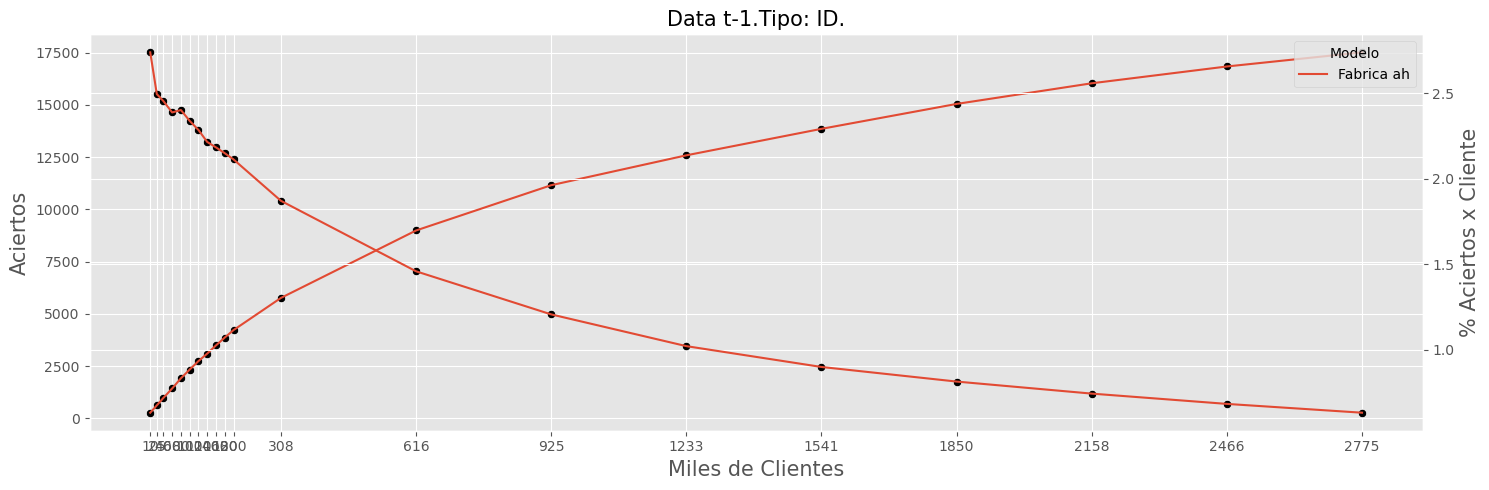

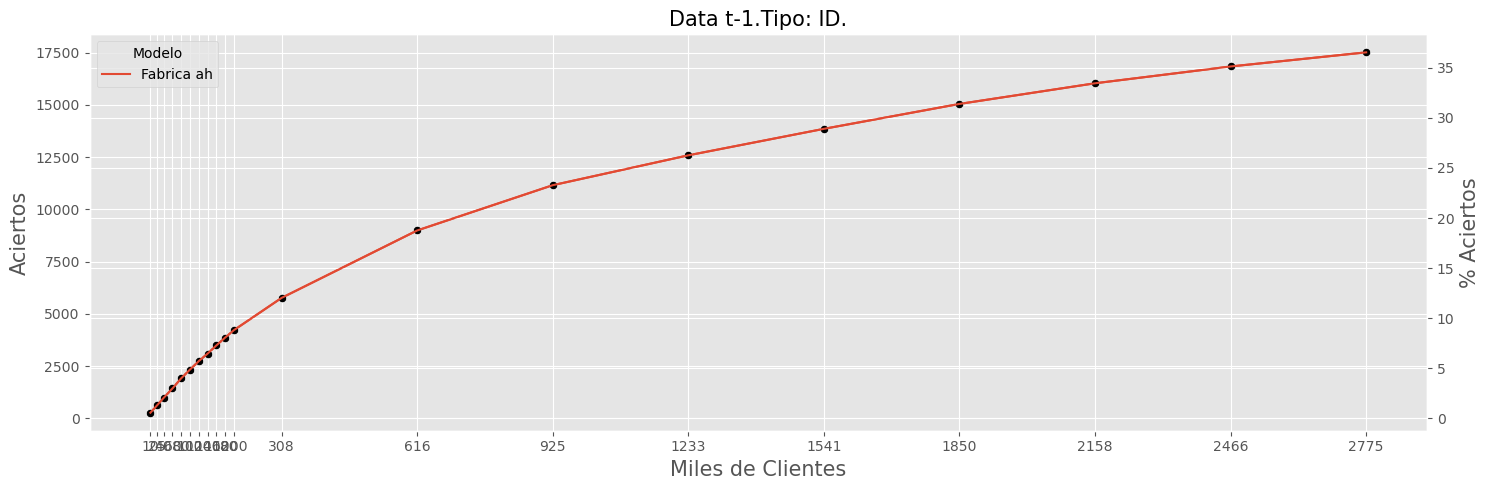

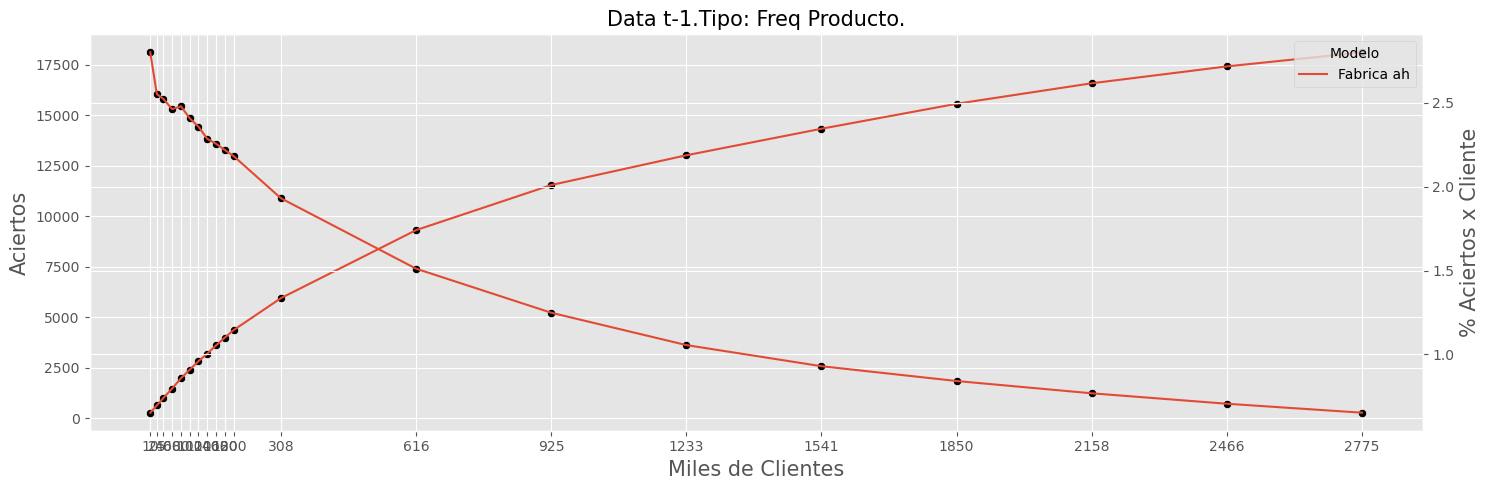

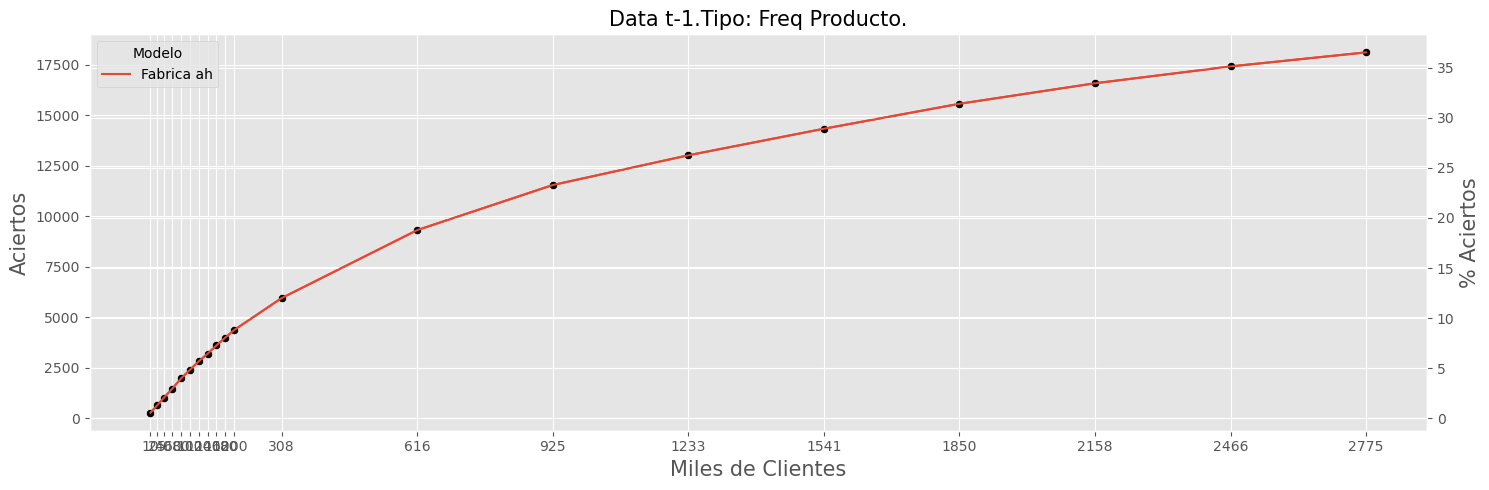

[12/16/24 19:06:48] INFO     ---------------------------------------------------                       ]8;id=339718;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=711113;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#312\312]8;;\

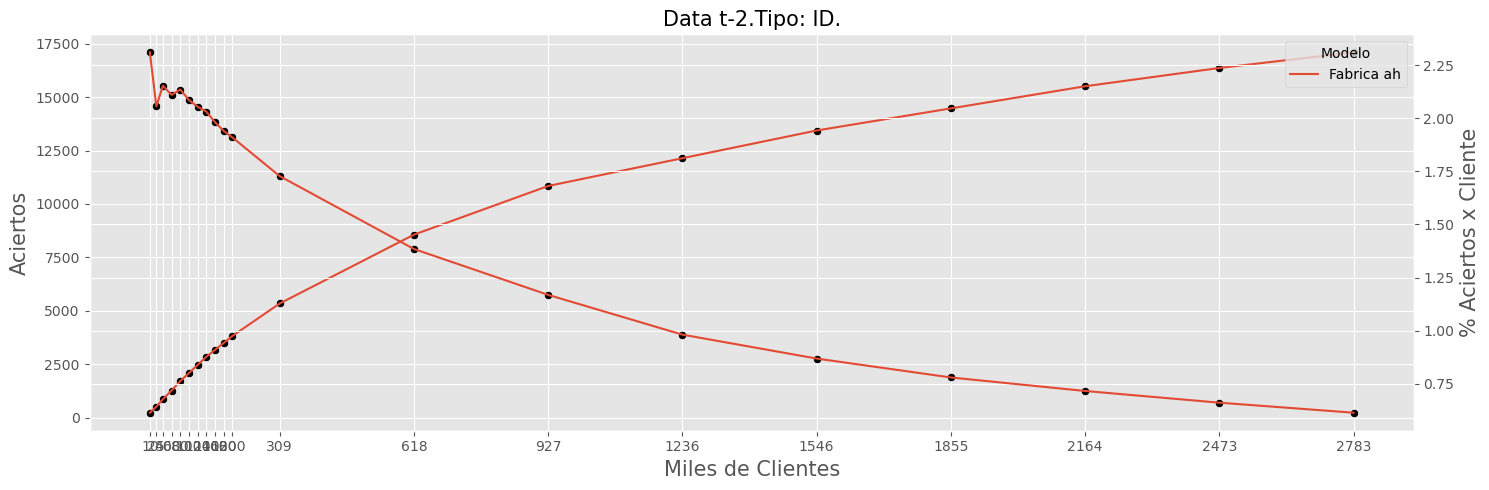

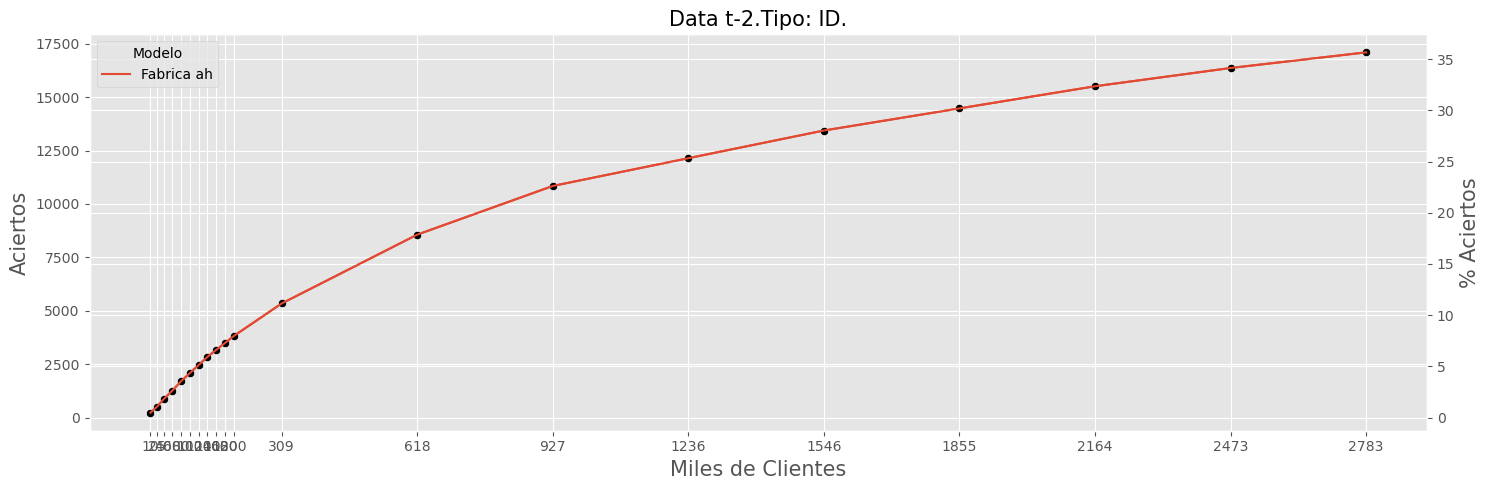

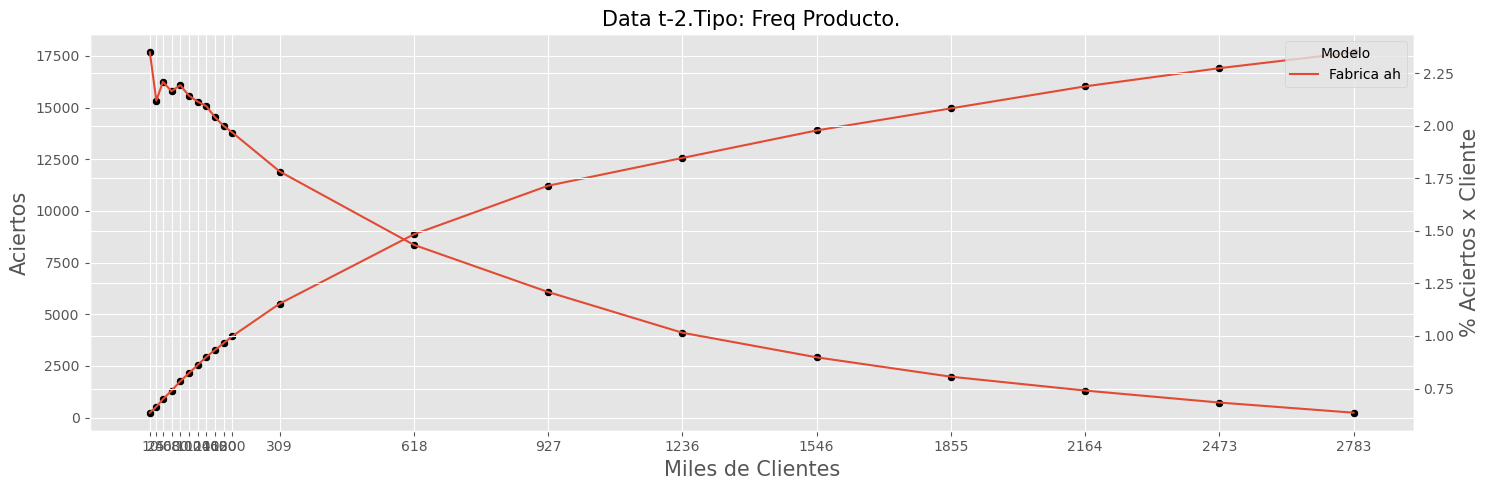

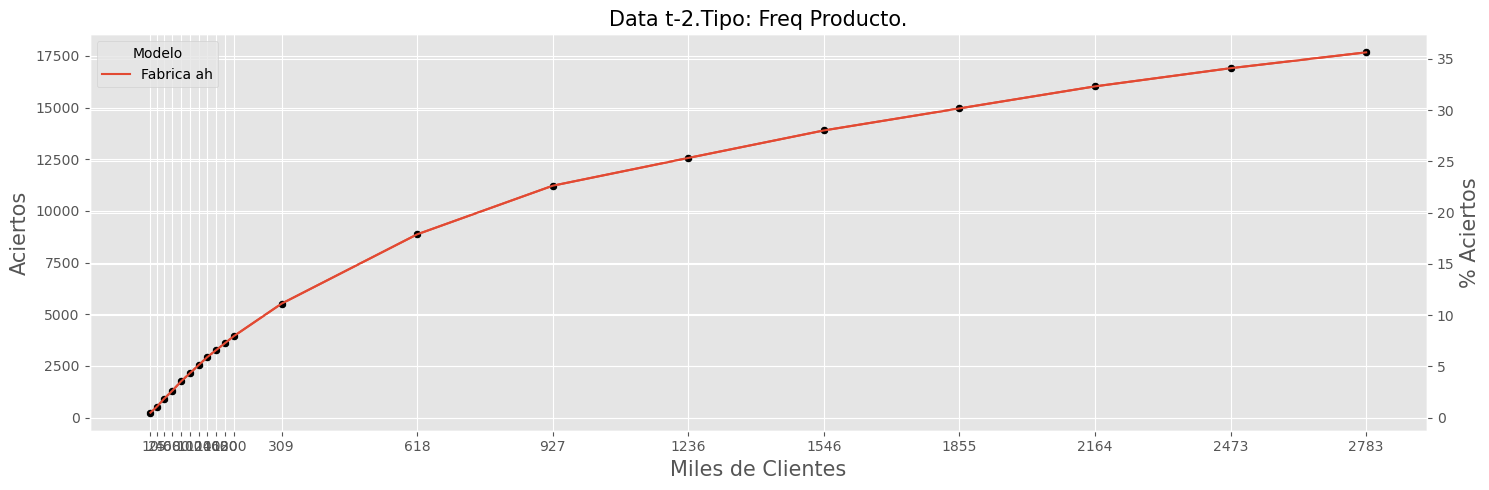

[12/16/24 19:06:50] INFO     ---------------------------------------------------                       ]8;id=545418;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=278328;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#312\312]8;;\

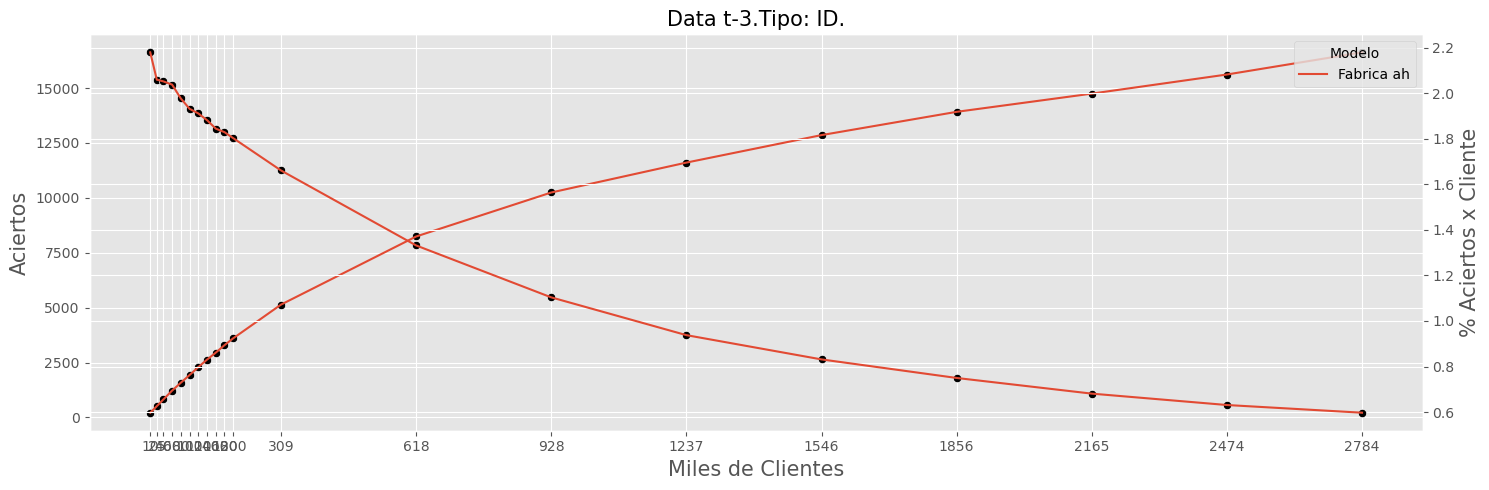

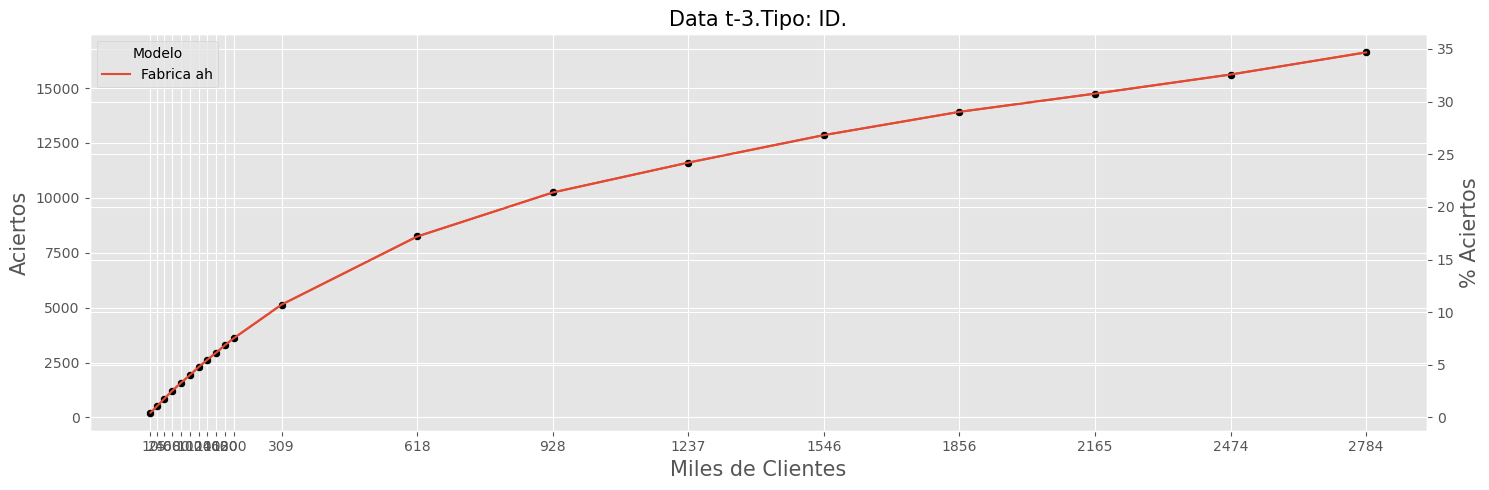

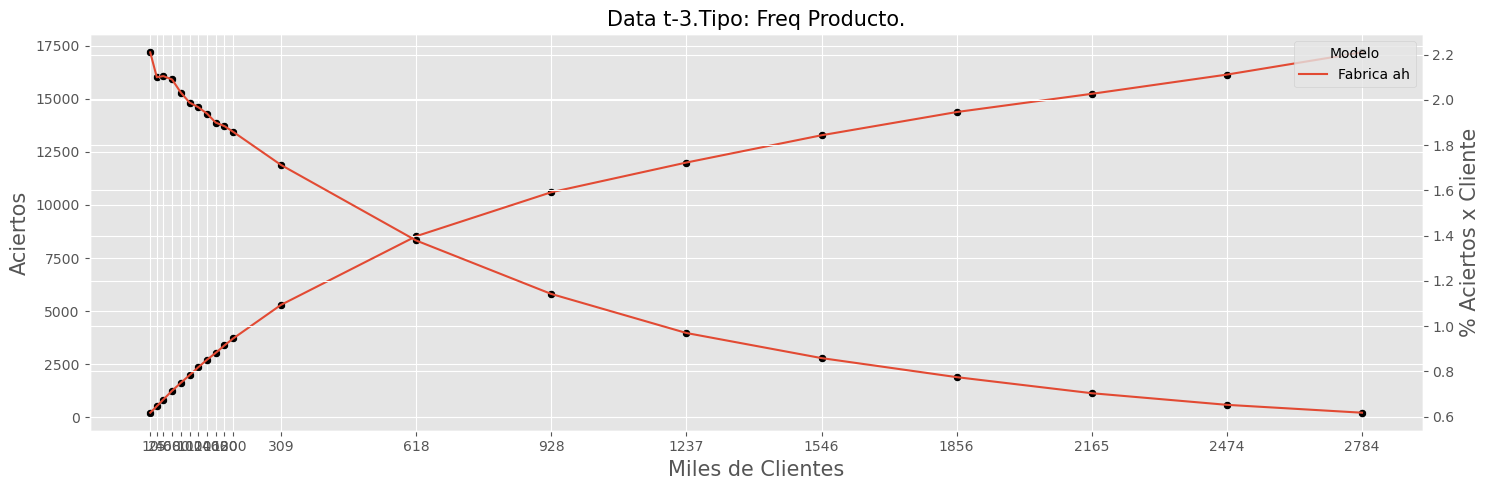

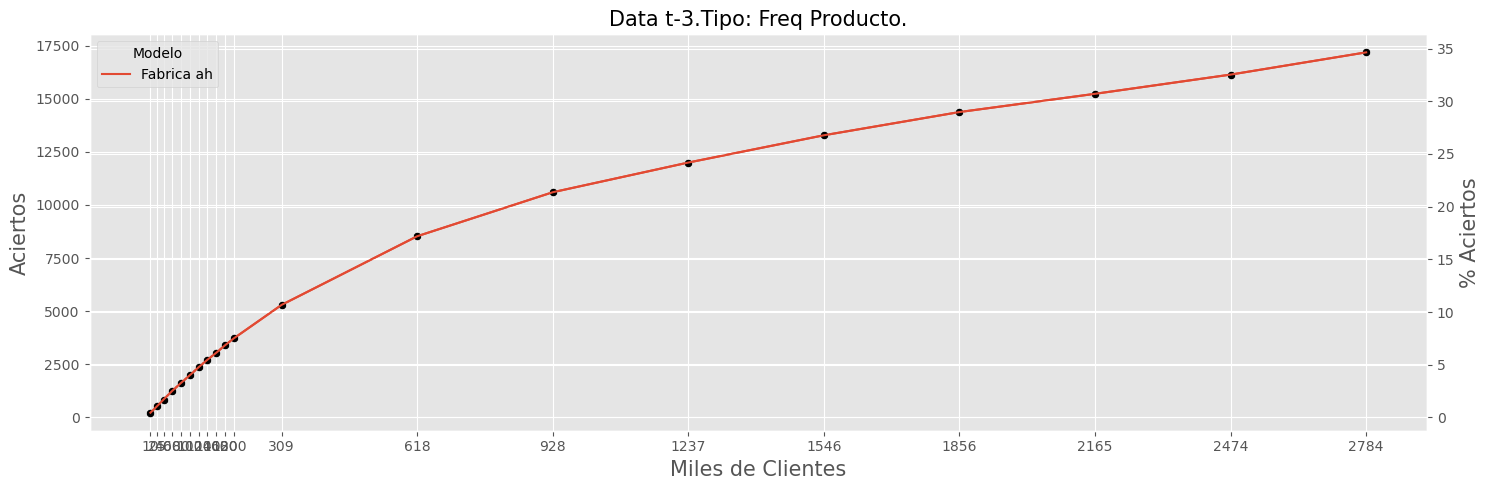

[12/16/24 19:06:51] INFO     ---------------------------------------------------                       ]8;id=69988;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=389850;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#312\312]8;;\

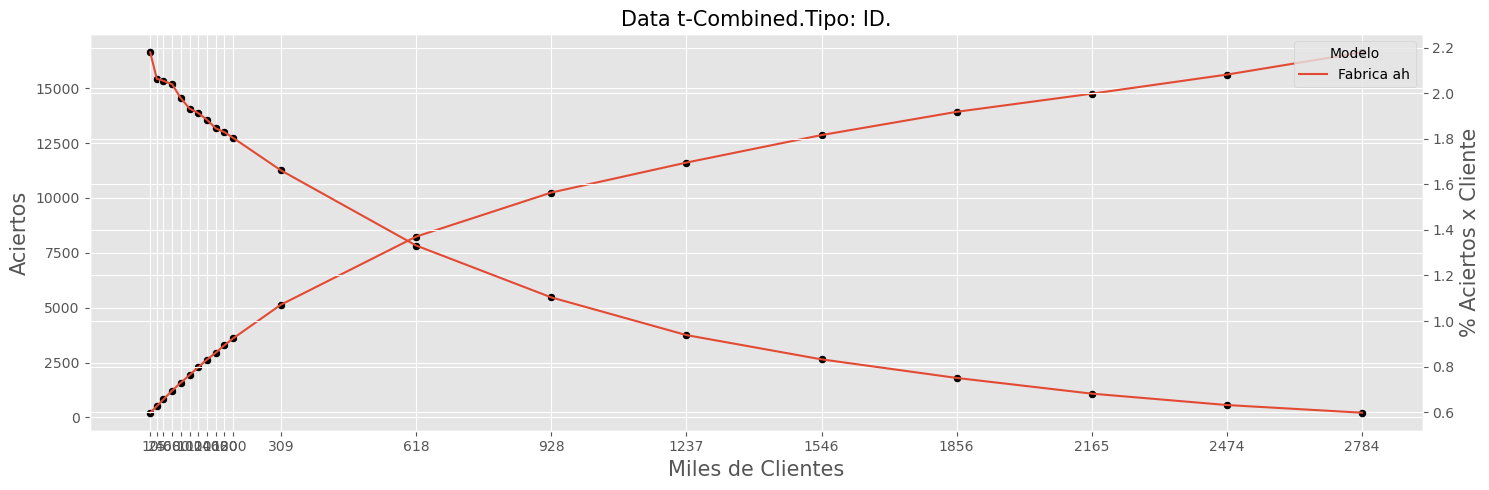

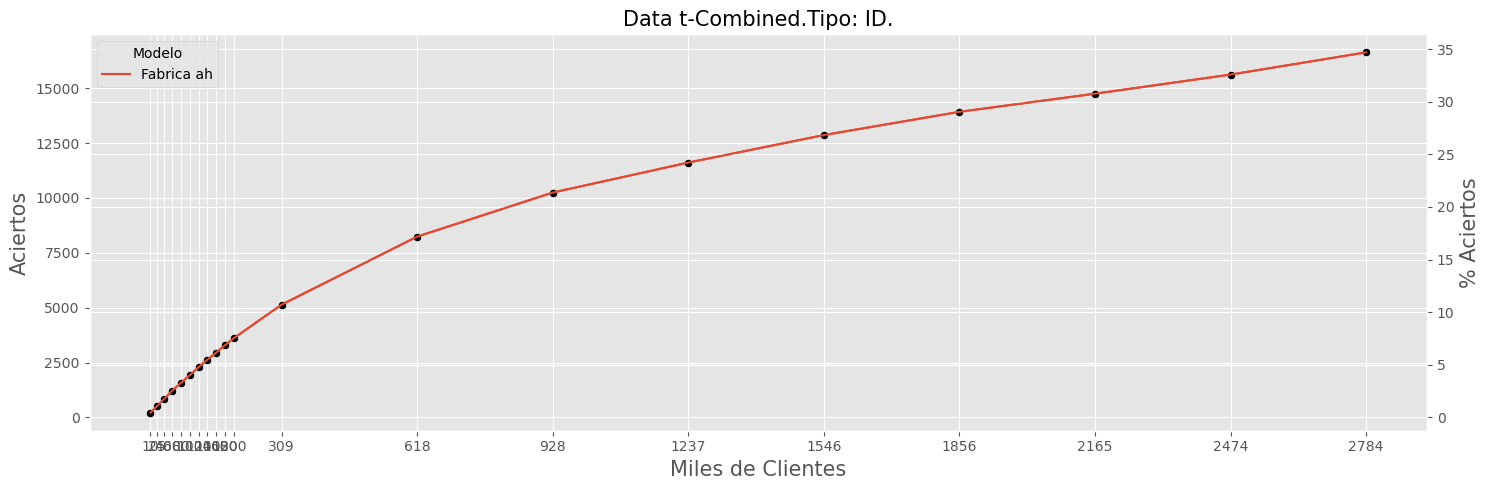

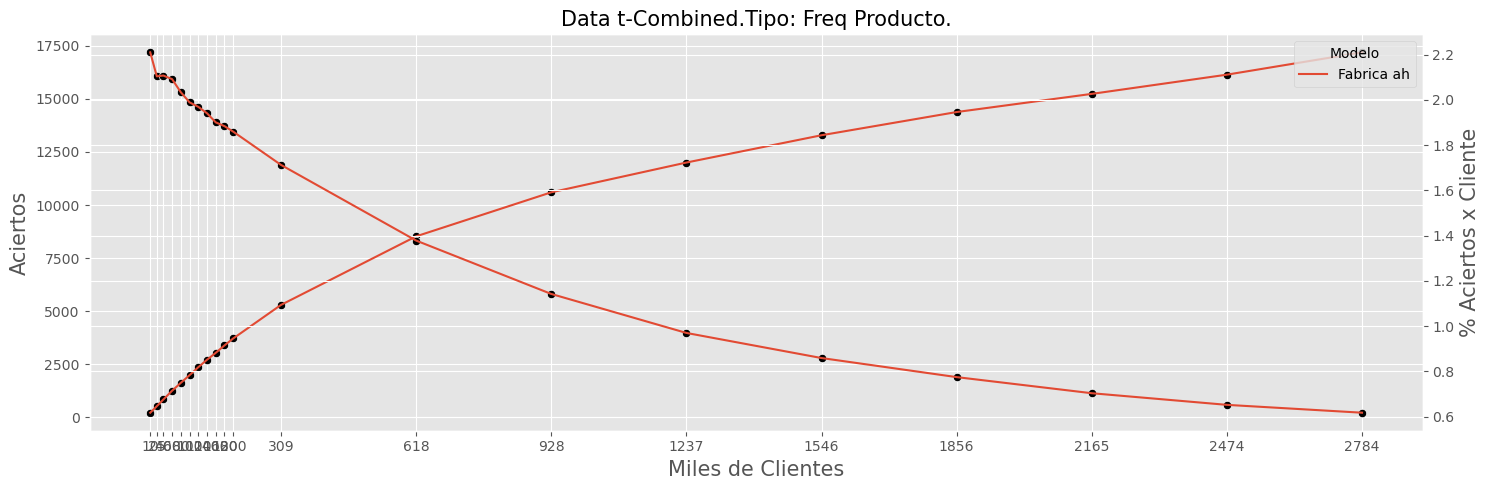

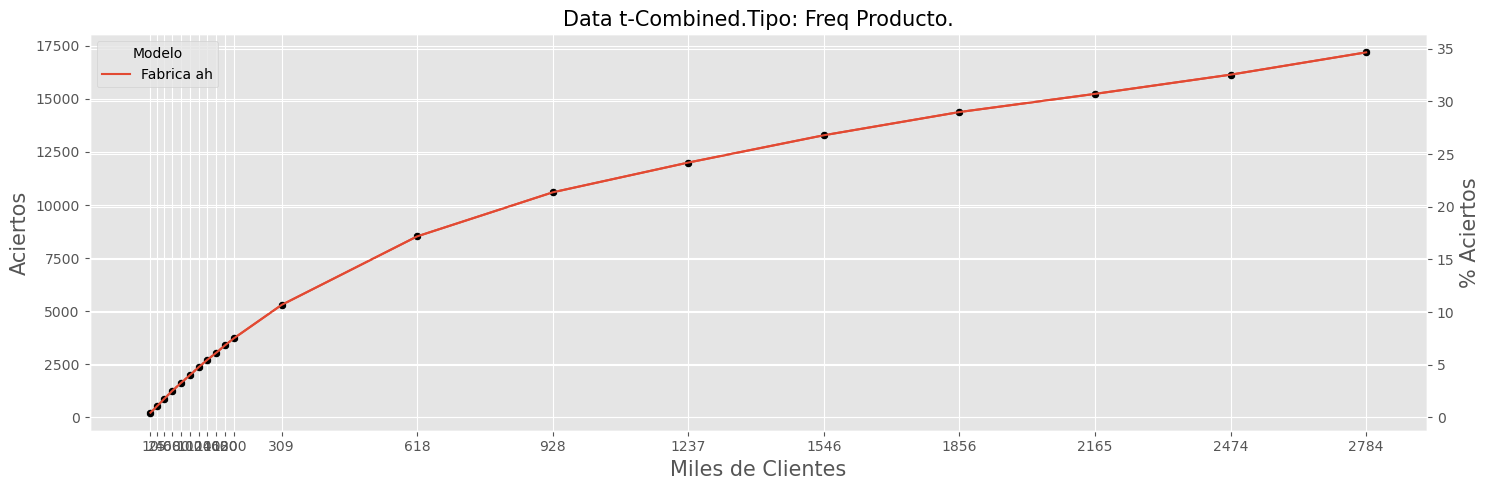

[12/16/24 19:06:53] INFO     ---------------------------------------------------                       ]8;id=460335;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=690854;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#312\312]8;;\

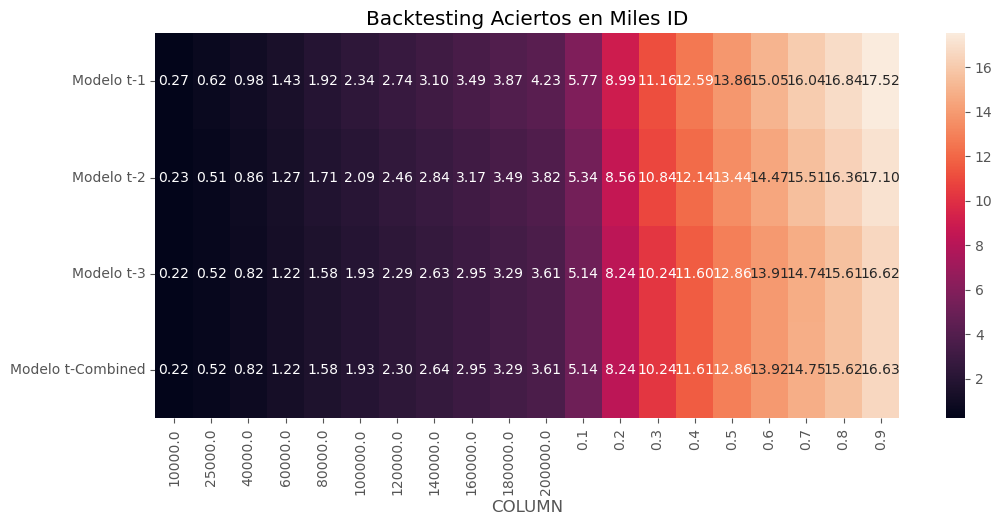

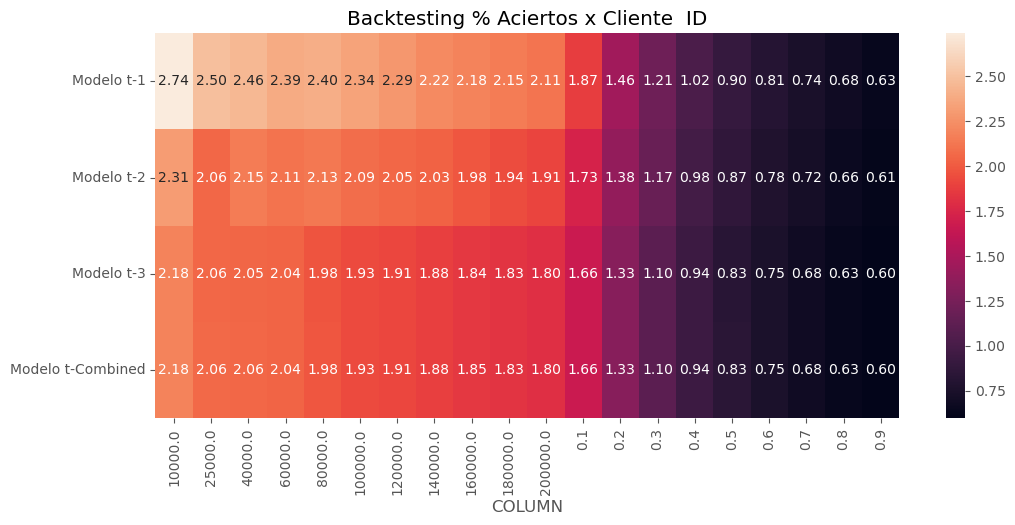

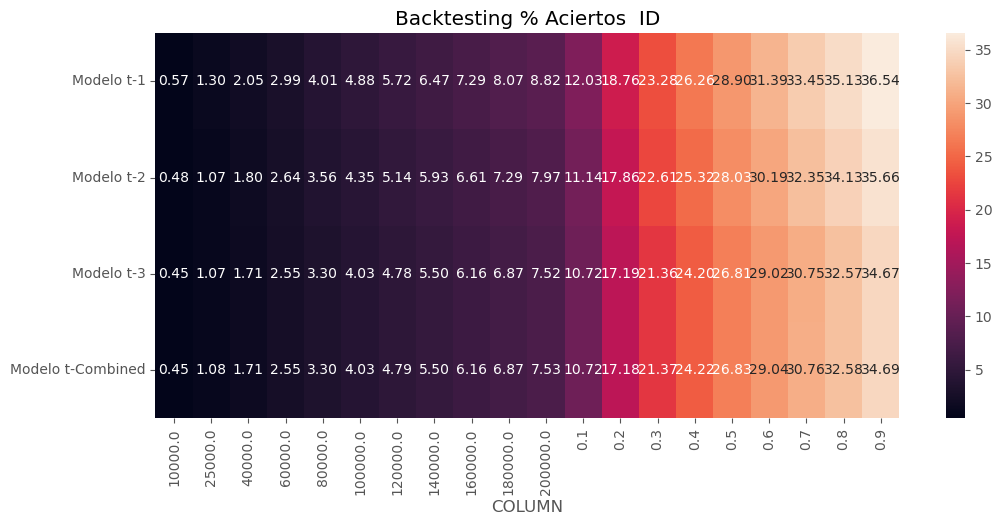

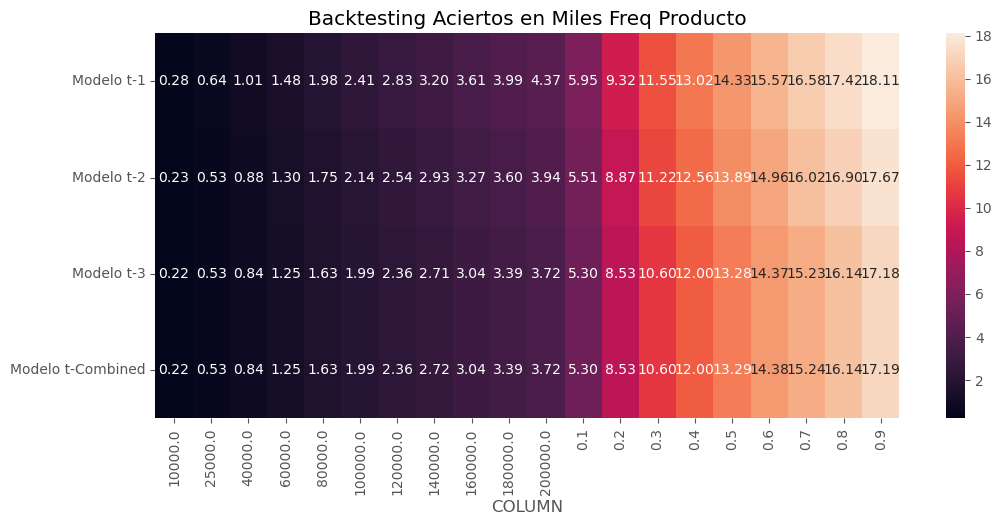

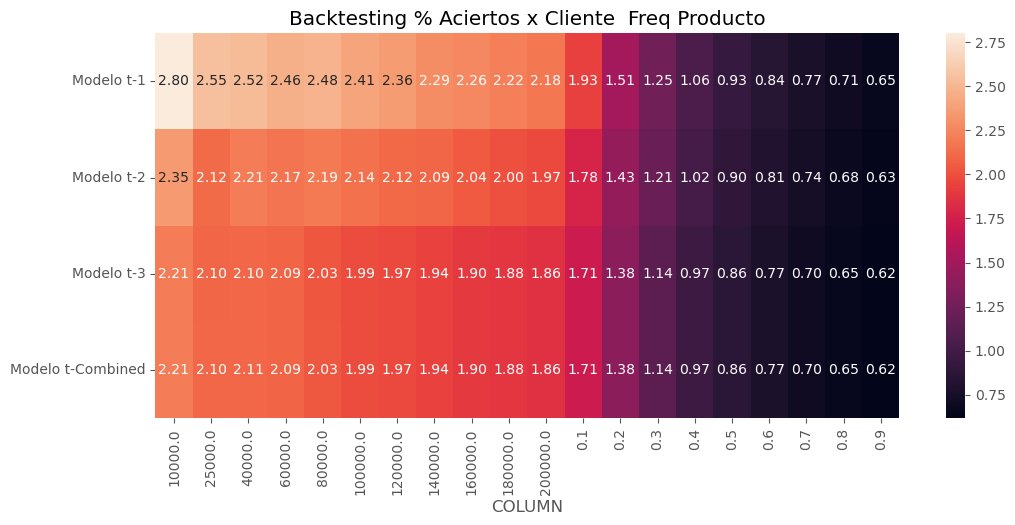

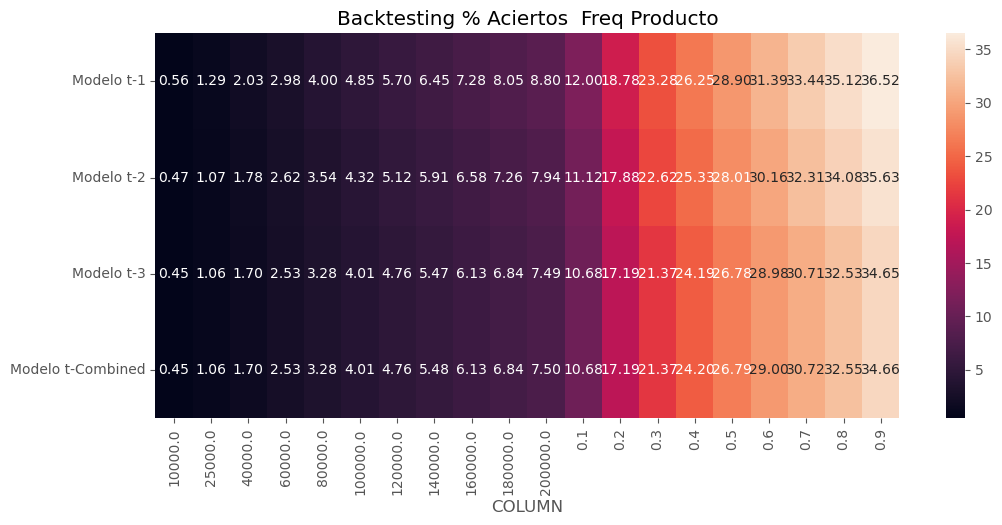

In [36]:
data_process_copy = data_process.copy()
data_process1 = backtesting.combinar_predicciones_reales(data_process_copy,info_save_select, parametros)

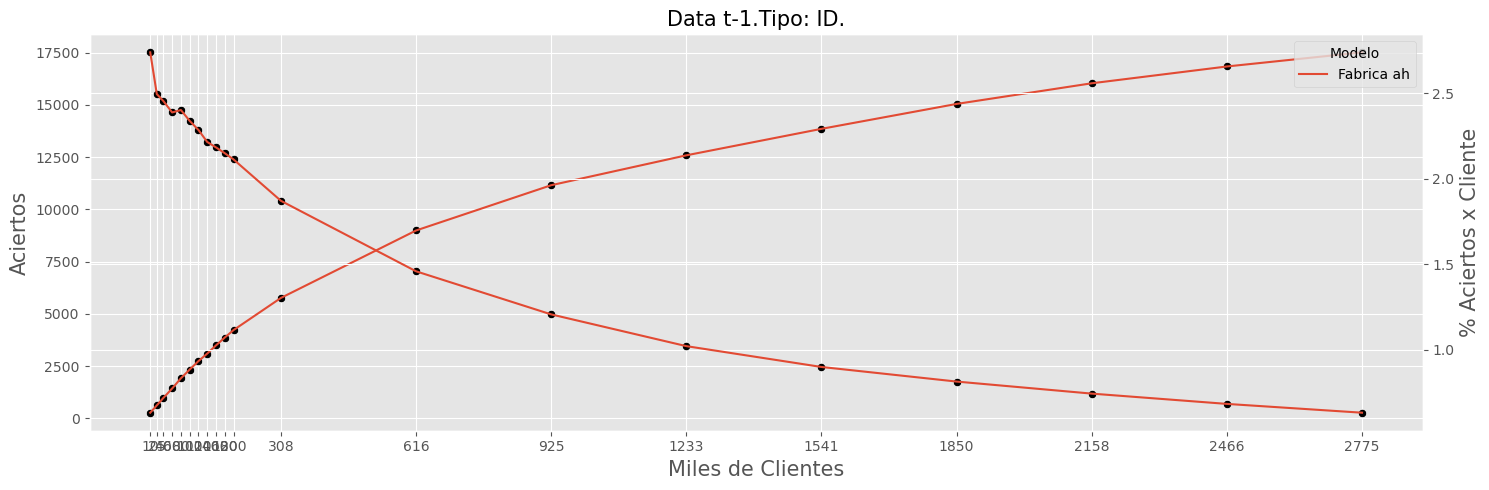

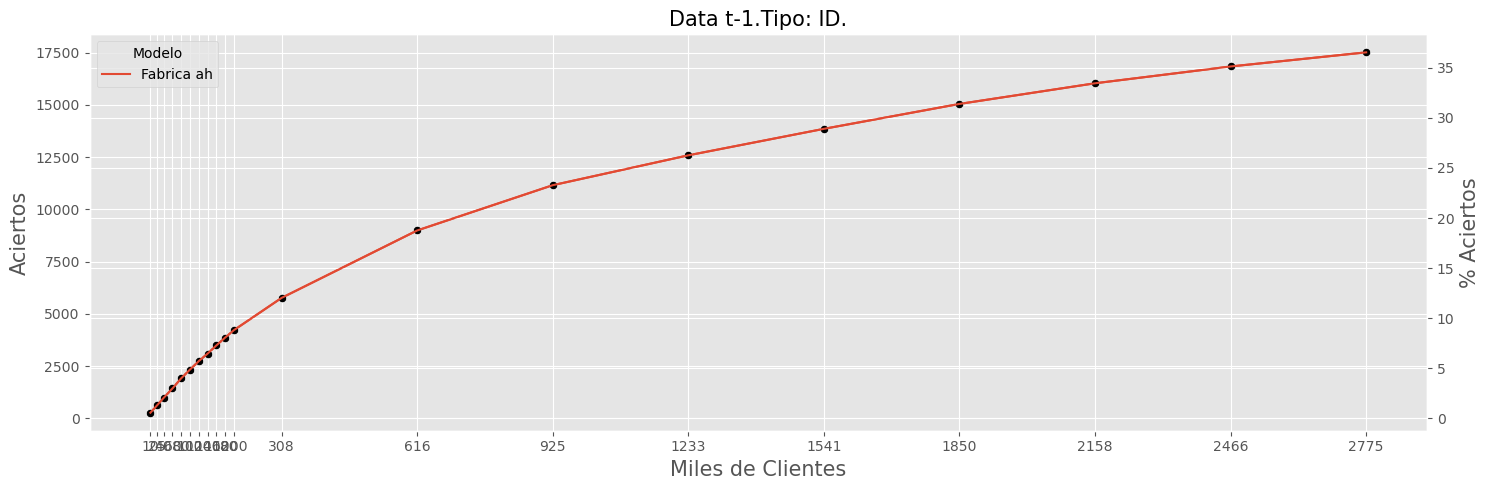

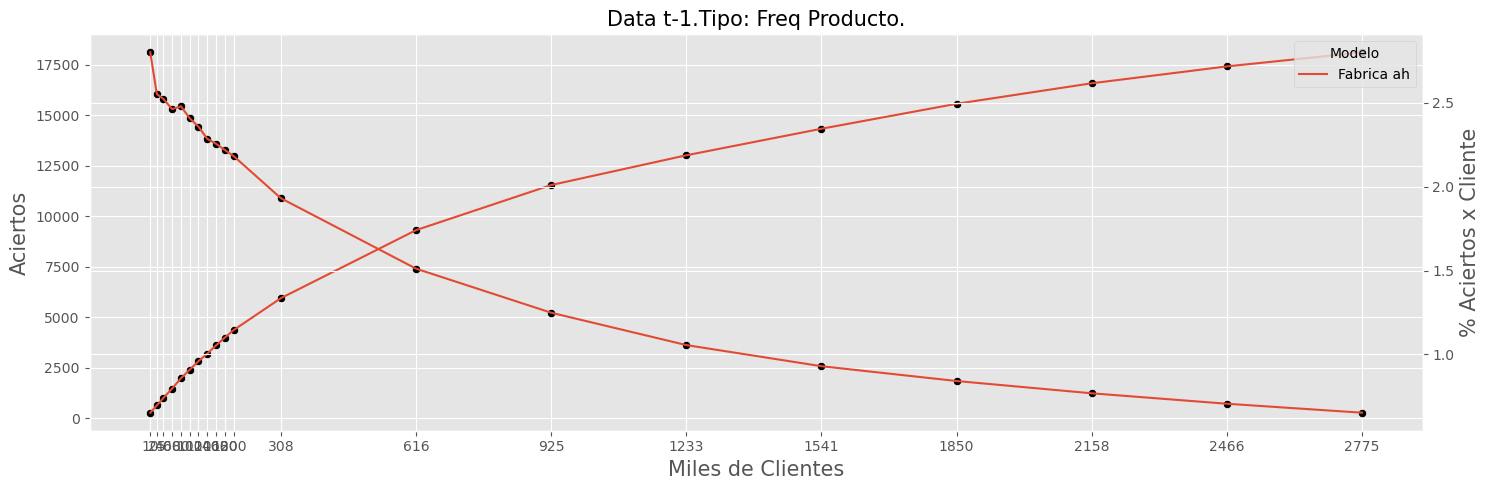

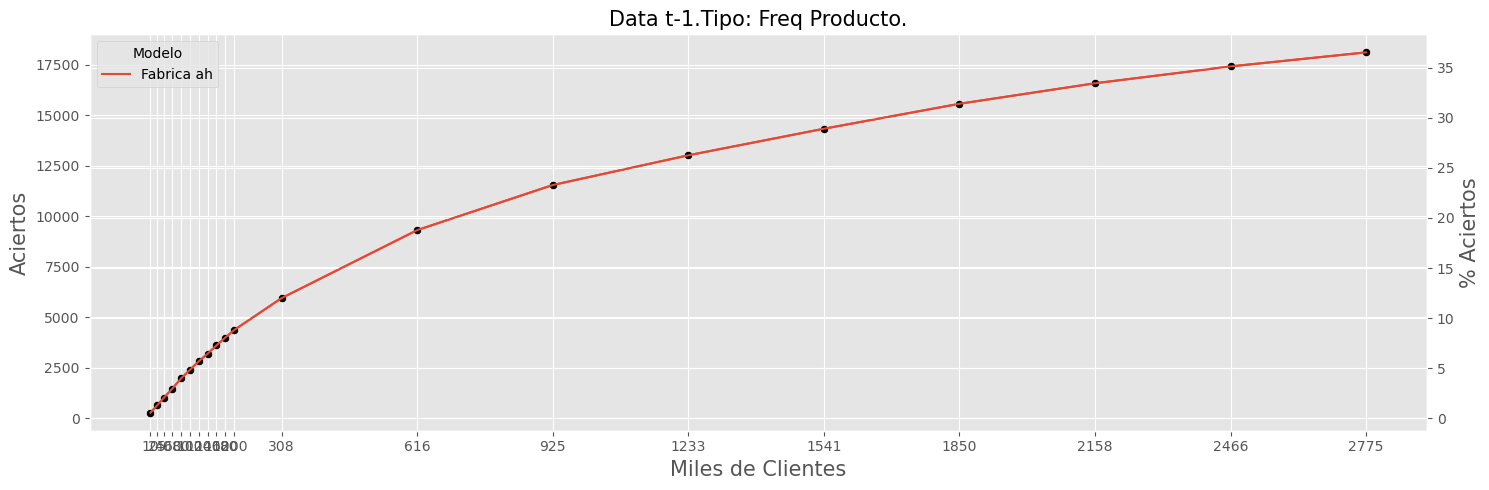

[12/16/24 19:11:12] INFO     ---------------------------------------------------                       ]8;id=544955;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=643789;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#312\312]8;;\

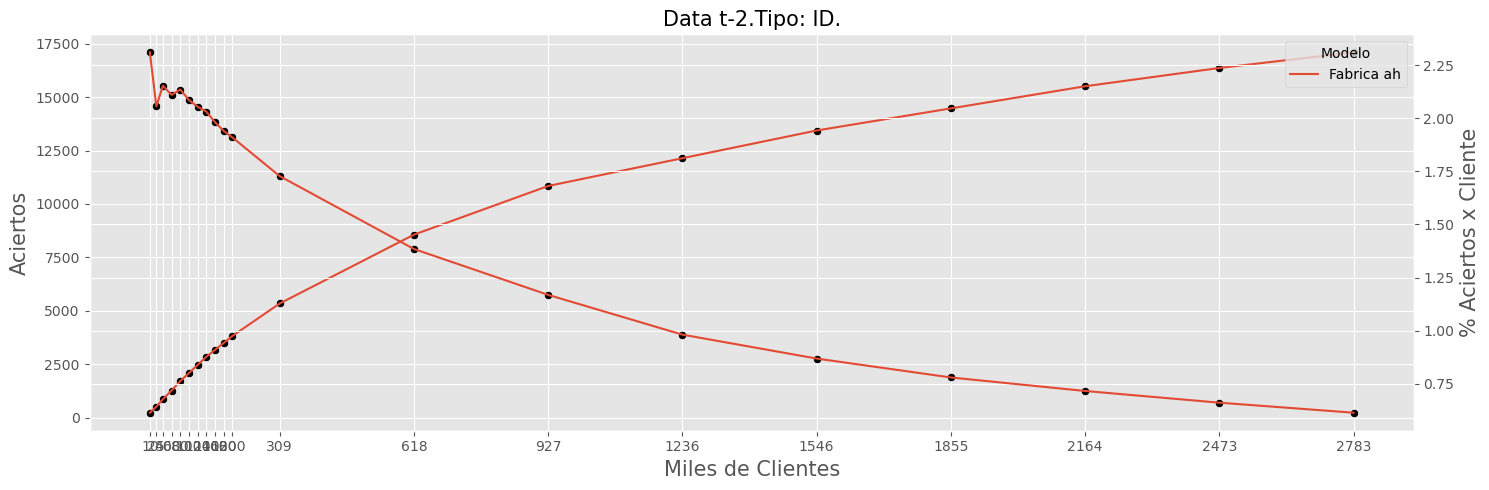

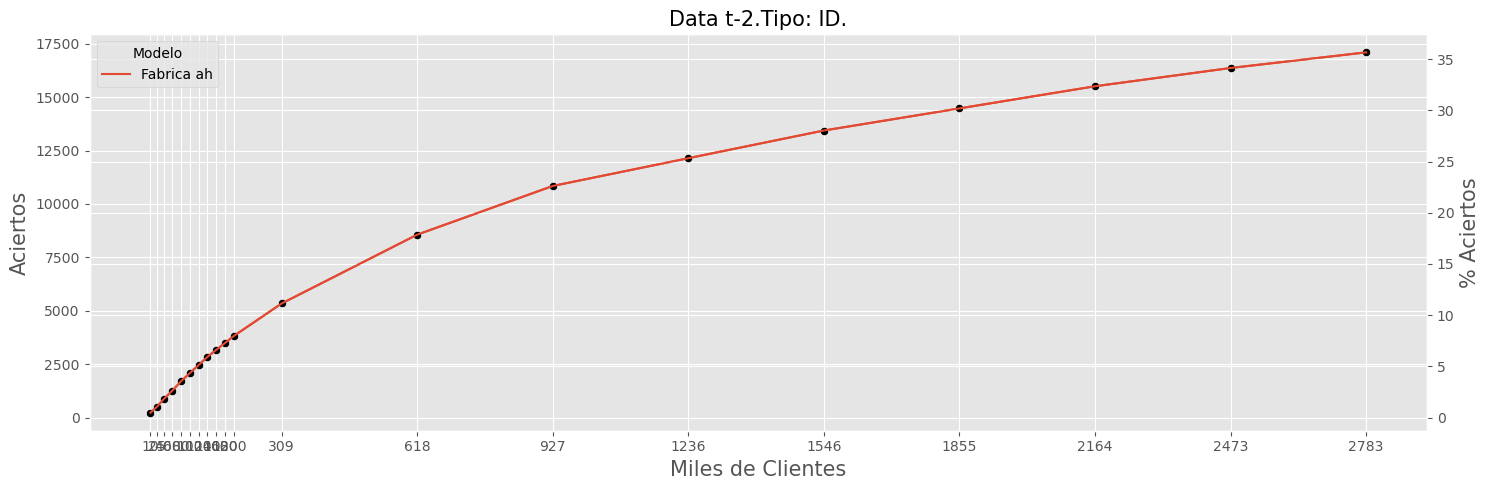

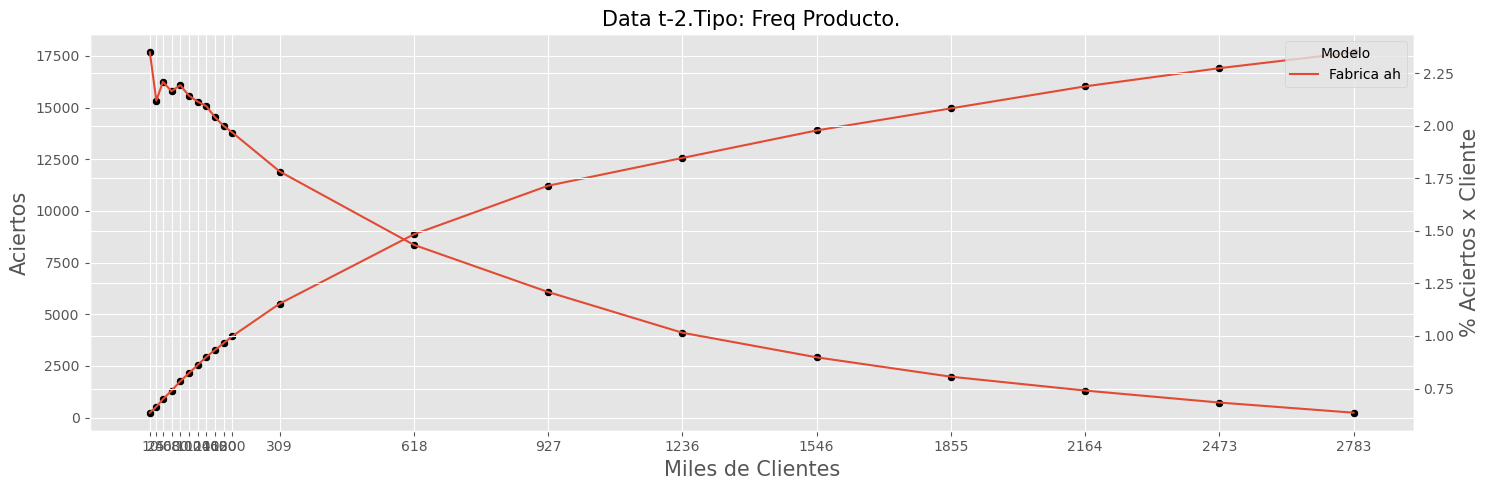

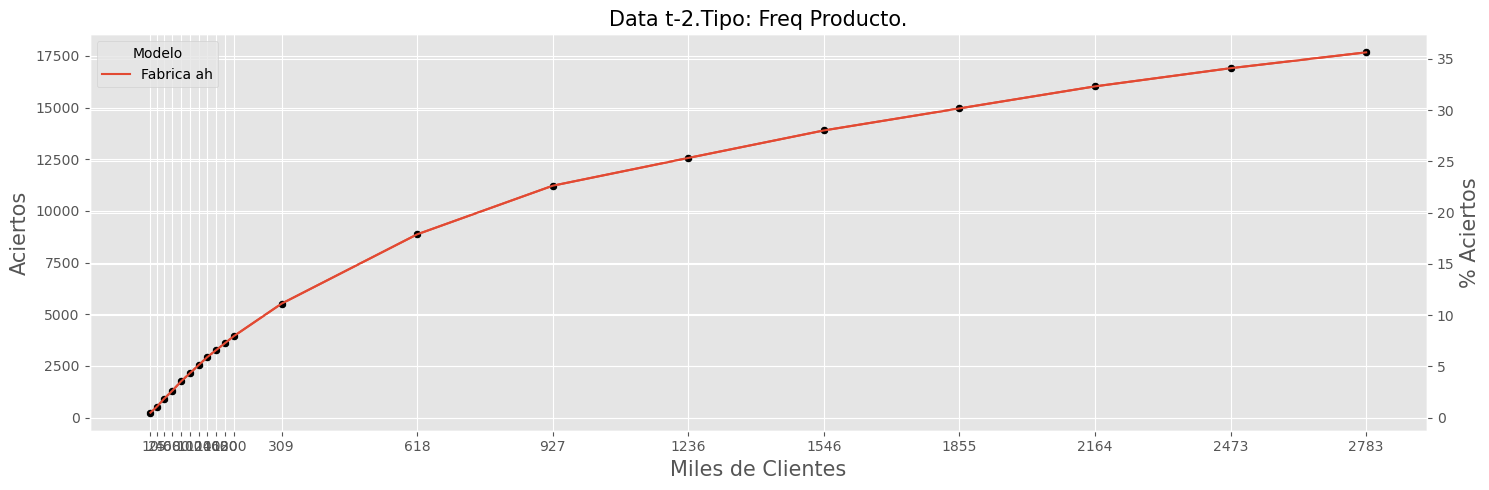

[12/16/24 19:11:14] INFO     ---------------------------------------------------                       ]8;id=648422;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=106586;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#312\312]8;;\

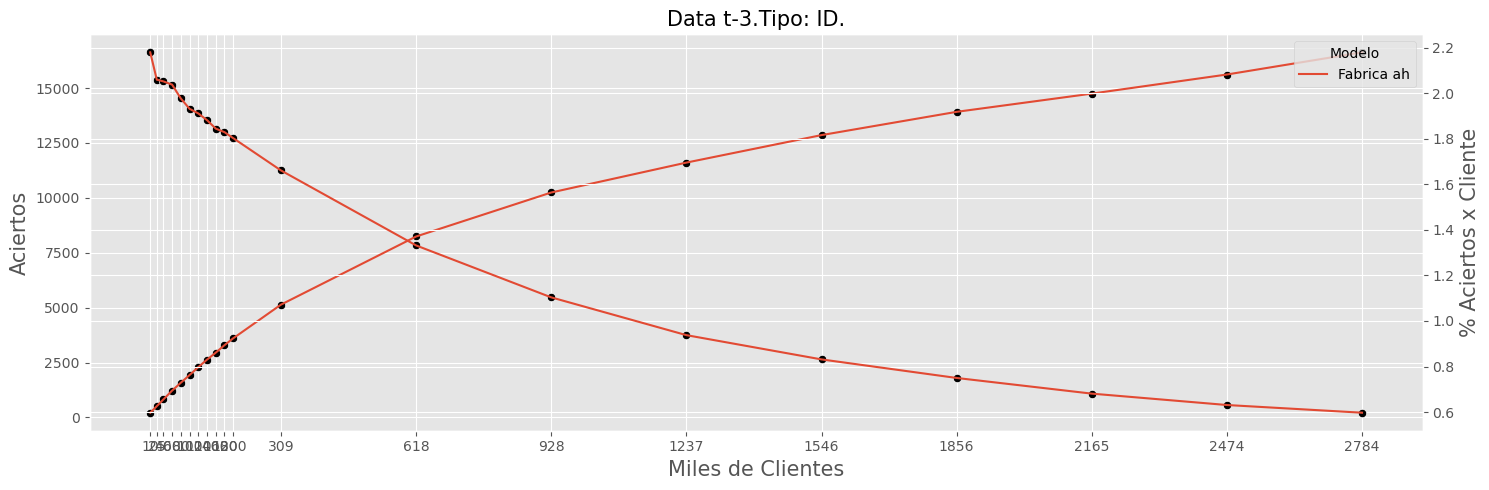

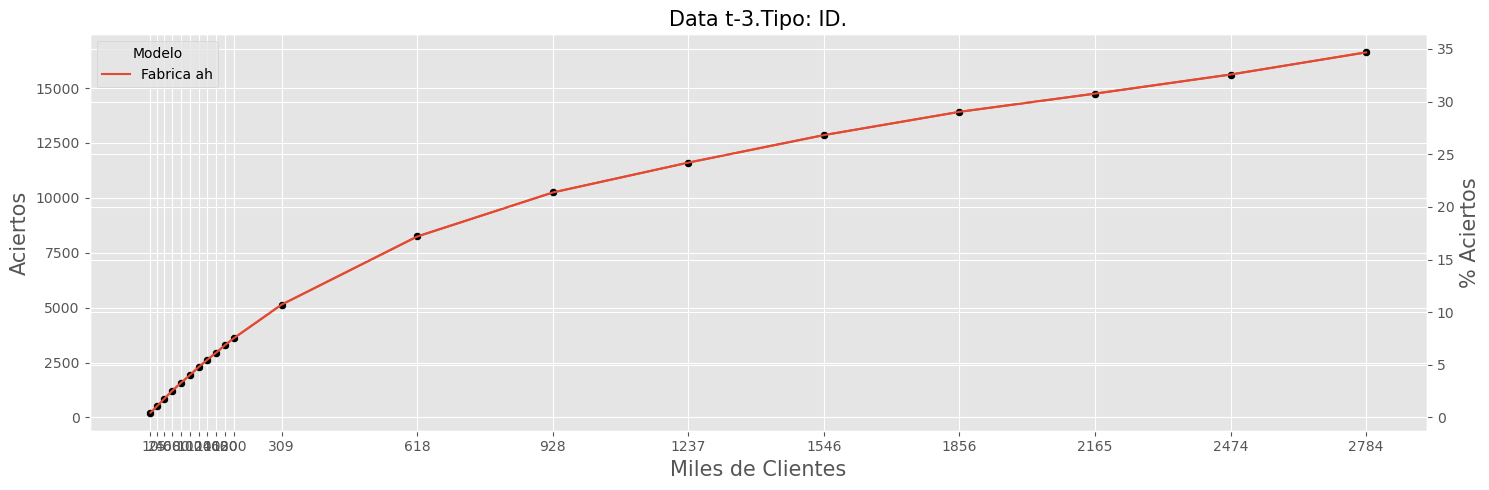

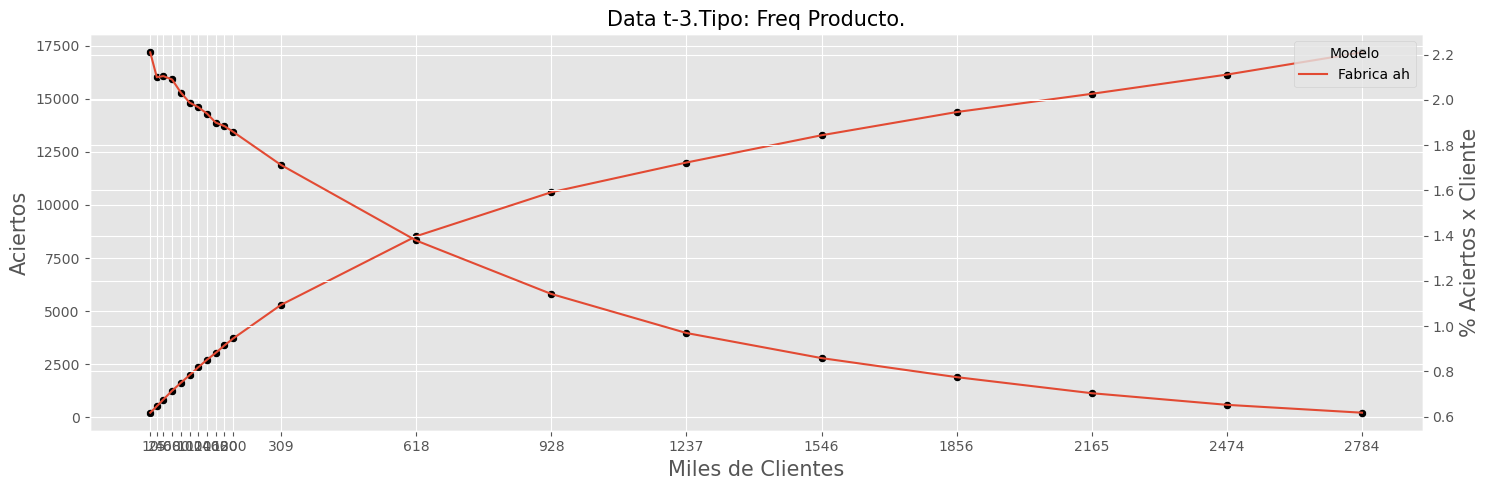

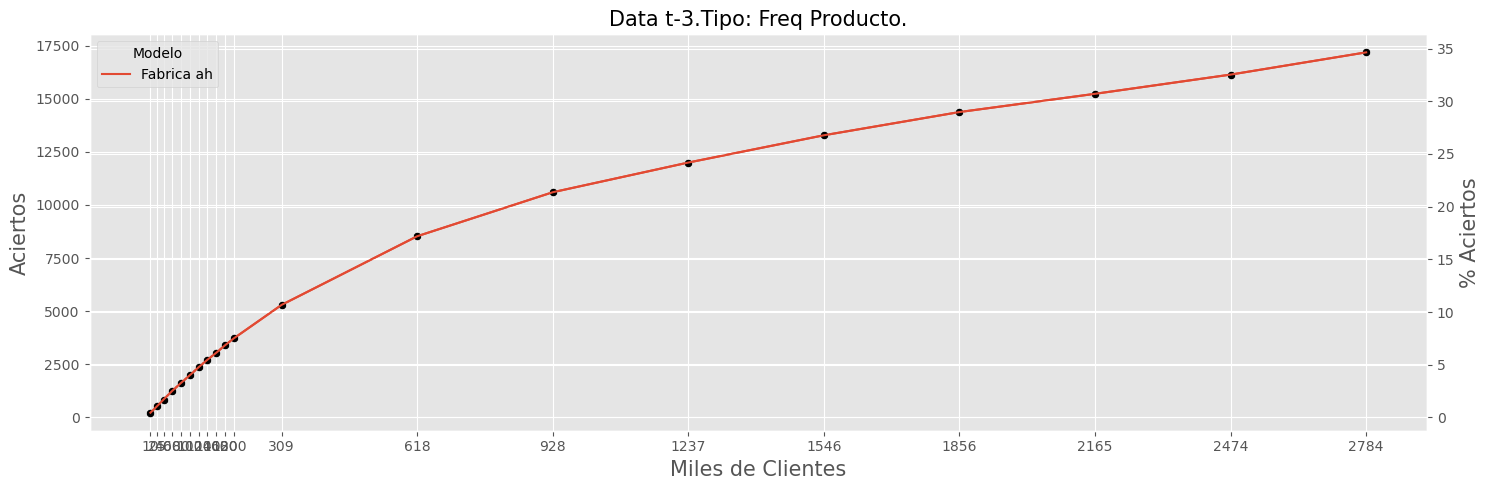

[12/16/24 19:11:15] INFO     ---------------------------------------------------                       ]8;id=3908;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=671347;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#312\312]8;;\

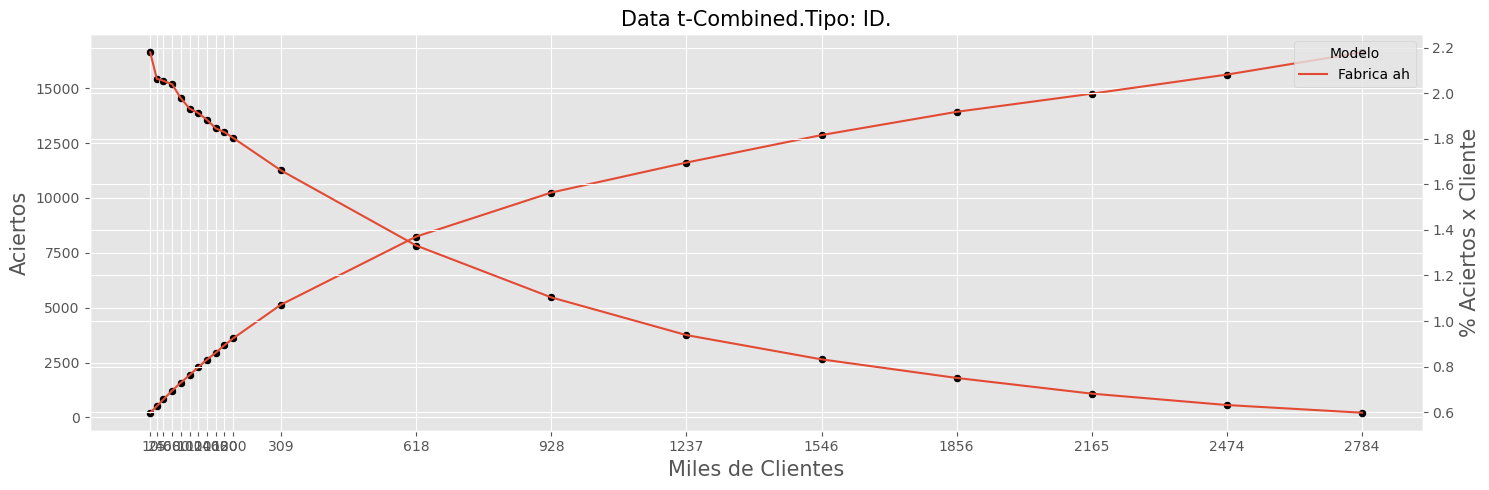

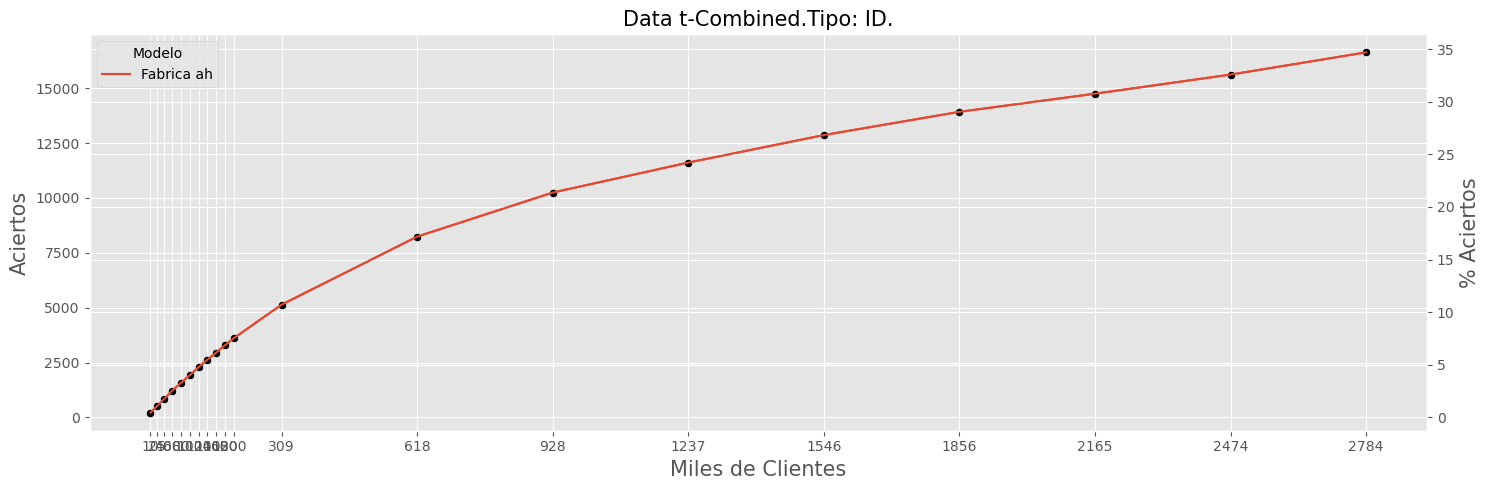

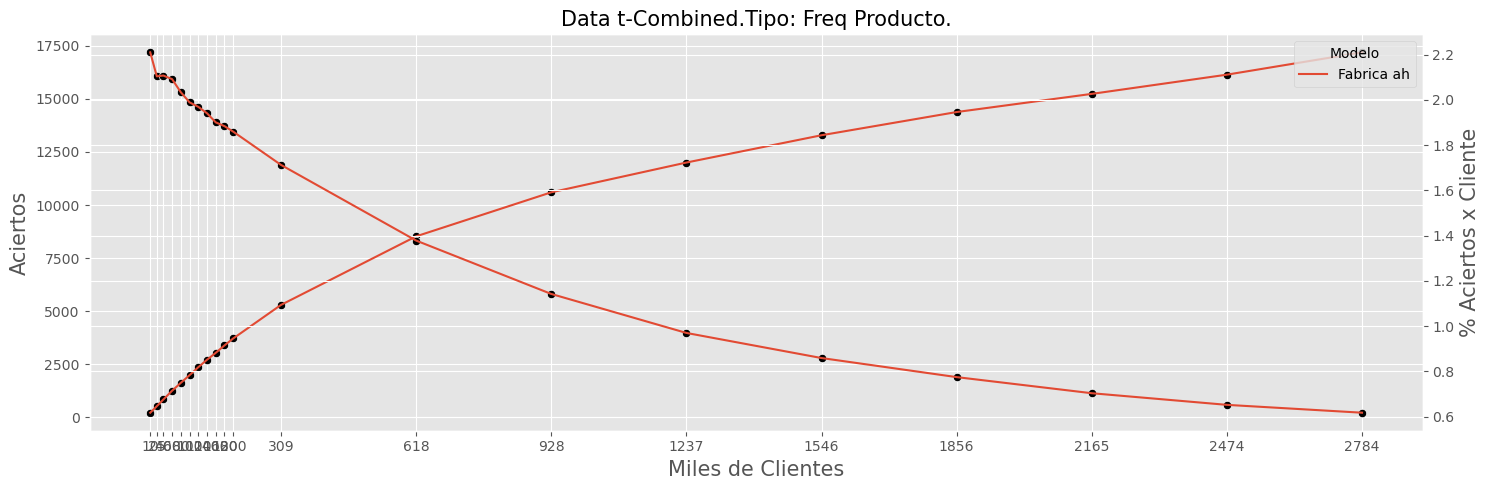

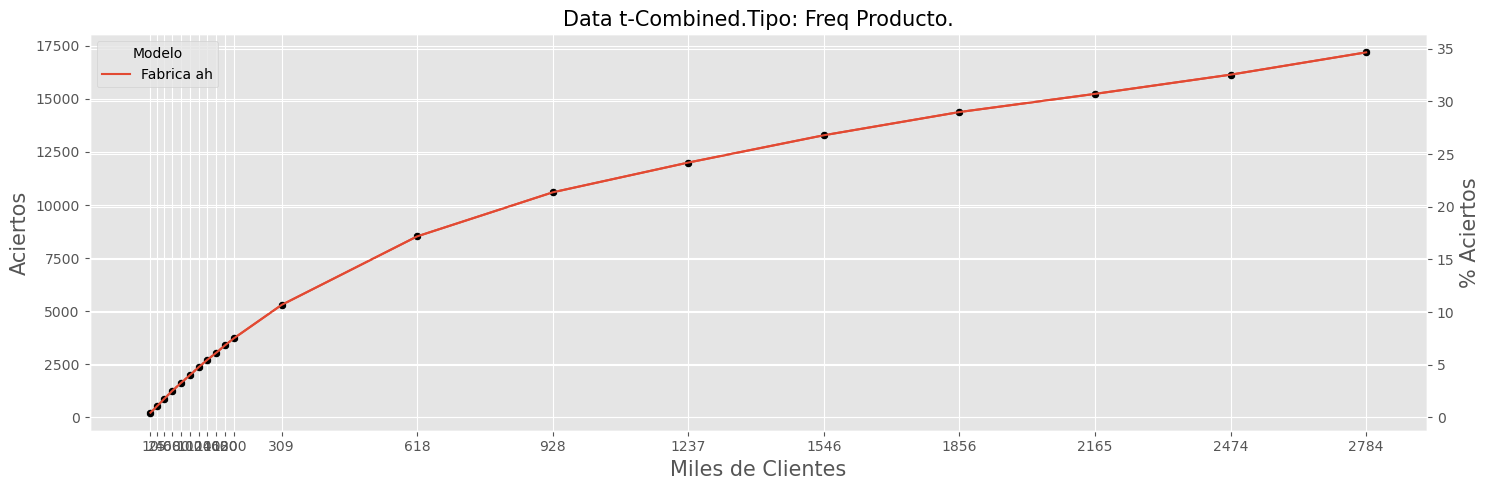

[12/16/24 19:11:17] INFO     ---------------------------------------------------                       ]8;id=408294;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=372923;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#312\312]8;;\

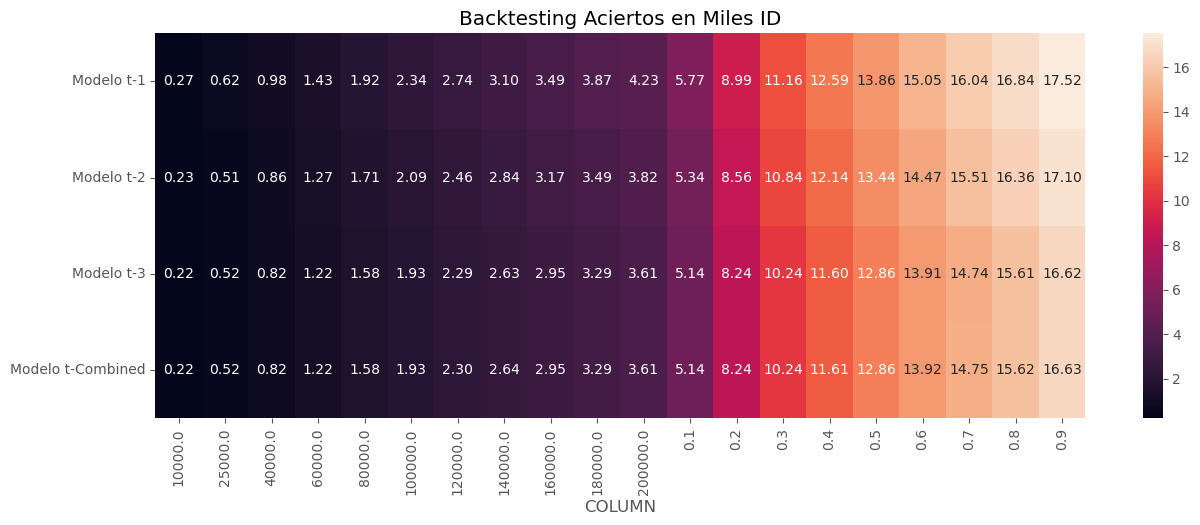

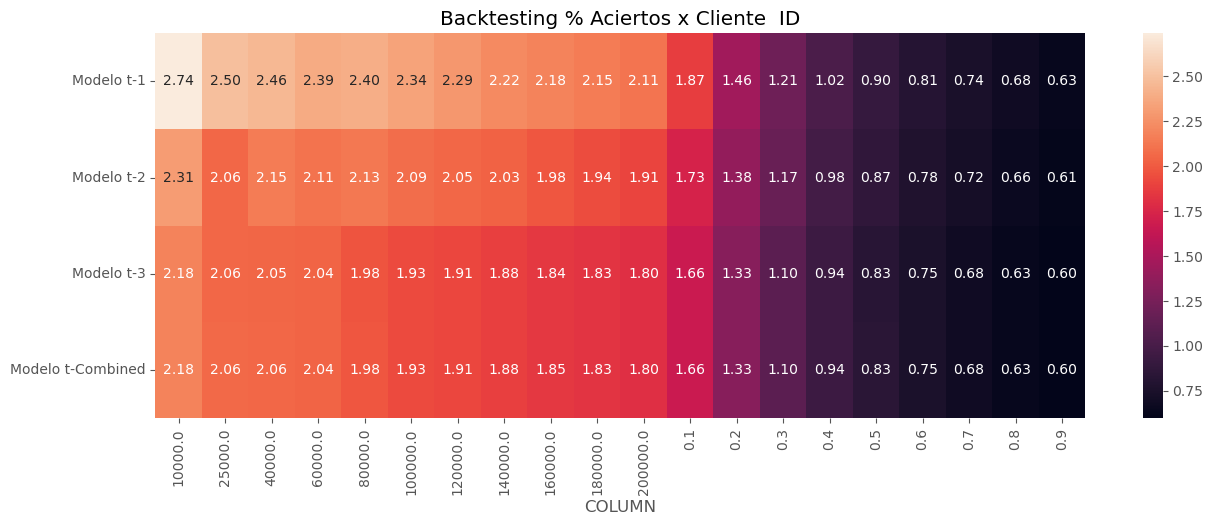

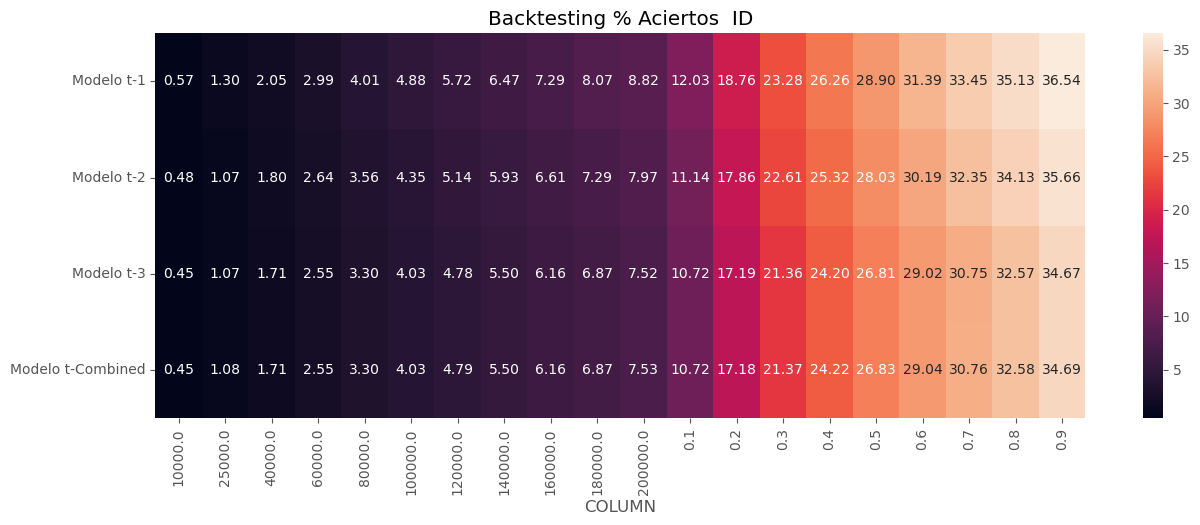

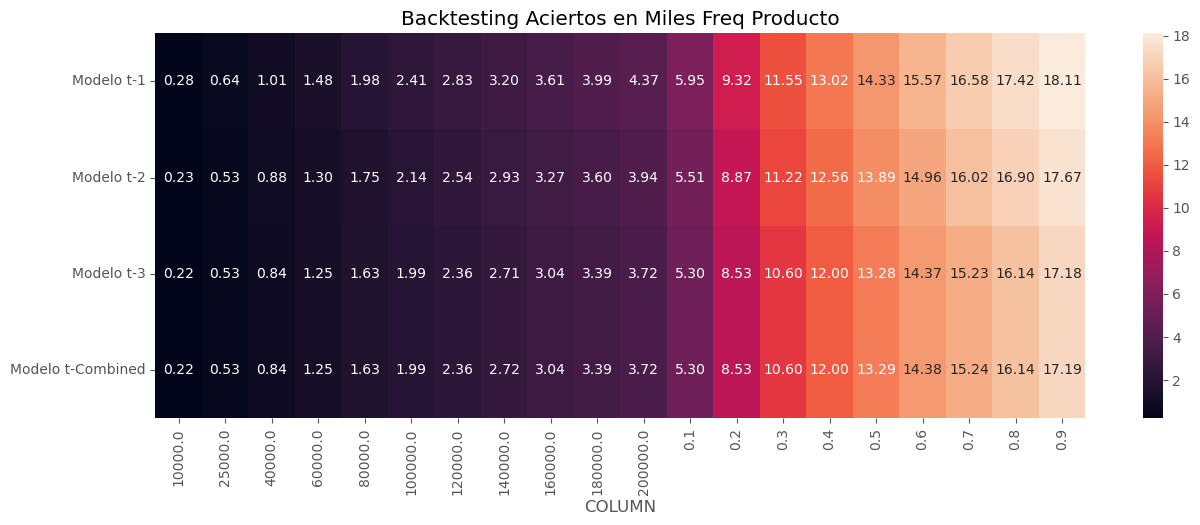

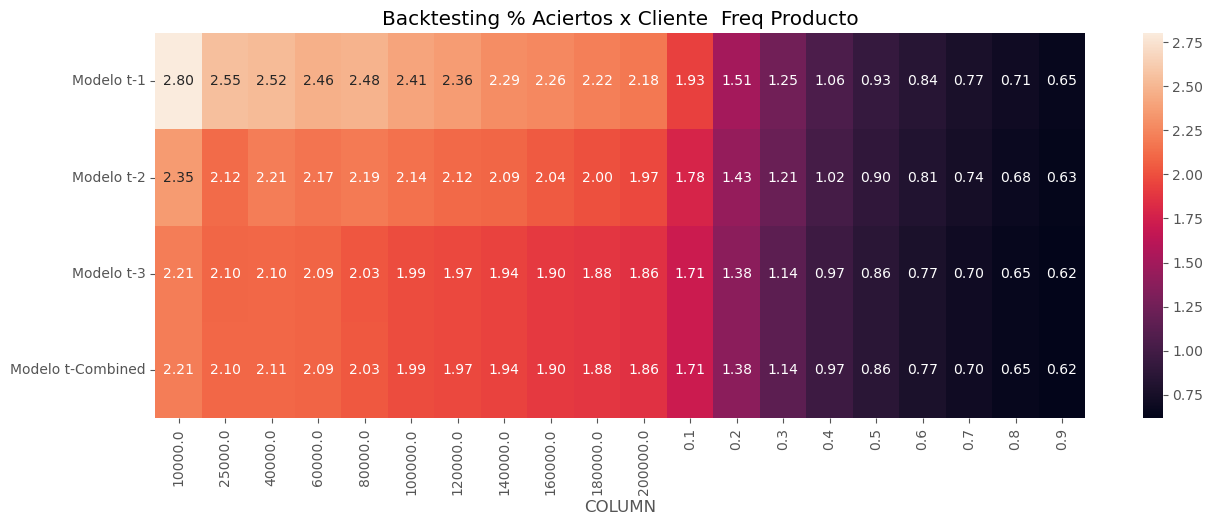

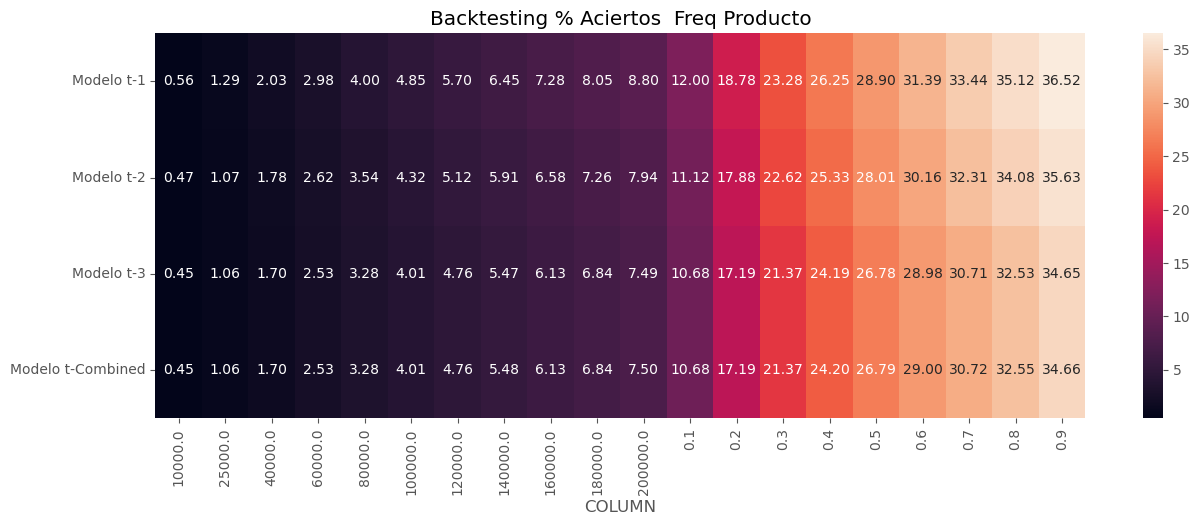

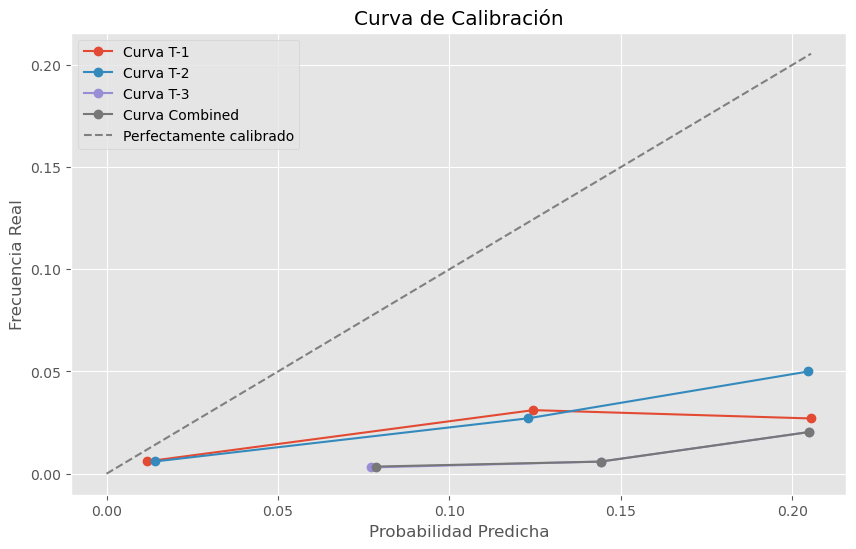

In [47]:
backtesting.plotear_curvas_rezago(data_process1,parametros)
plt.figure(figsize=(10, 6))
max_value = 0
for i in data_process1.keys():
    prob_true = data_process1[i]['prob_true']
    prob_pred = data_process1[i]['prob_pred']
    # Graficar la curva de calibración
    try:
        msg = " T-"+str(int(i))
    except:
        msg = " "+str(i)
    plt.plot(prob_pred, prob_true, marker='o', label='Curva'+msg)
    max_value = np.max([max_value,np.max(prob_pred)])
plt.plot([0, max_value], [0, max_value], linestyle='--', color='gray', label='Perfectamente calibrado')
plt.title('Curva de Calibración')
plt.xlabel('Probabilidad Predicha')
plt.ylabel('Frecuencia Real')
plt.legend()
plt.show()
# curva > 45 grados = subestimar
# curva < 45 grados = sobrestimar

In [38]:
data_process1[1]['modelo_360']

N  Aciertos      pend  Aceleracion
0     10000.0     274.0       NaN          5.0
1     25000.0     624.0  0.023333          5.0
2     40000.0     982.0  0.023867          5.0
3     60000.0    1433.0  0.022550          5.0
4     80000.0    1922.0  0.024450          5.0
5    100000.0    2339.0  0.020850          4.0
6    120000.0    2743.0  0.020200          4.0
7    140000.0    3102.0  0.017950          3.0
8    160000.0    3494.0  0.019600          4.0
9    180000.0    3870.0  0.018800          4.0
10   200000.0    4227.0  0.017850          3.0
11   308346.0    5769.0  0.014232          3.0
12   616692.0    8995.0  0.010462          2.0
13   925038.0   11161.0  0.007025          2.0
14  1233384.0   12591.0  0.004638          2.0
15  1541730.0   13858.0  0.004109          2.0
16  1850076.0   15050.0  0.003866          1.0
17  2158422.0   16038.0  0.003204          1.0
18  2466768.0   16842.0  0.002607          1.0
19  2775114.0   17518.0  0.002192          1.0
20    10000.0     280.0  0.006234          2.0
21    25000.0     638.0  0.023867          5.0
22    40000.0    1009.0  0.024733          5.0
23    60000.0    1477.0  0.023400          5.0
24    80000.0    1983.0  0.025300          5.0
25   100000.0    2407.0  0.021200          4.0
26   120000.0    2829.0  0.021100          4.0
27   140000.0    3199.0  0.018500          3.0
28   160000.0    3609.0  0.020500          4.0
29   180000.0    3993.0  0.019200          4.0
30   200000.0    4365.0  0.018600          3.0
31   308346.0    5952.0  0.014648          3.0
32   616692.0    9317.0  0.010913          3.0
33   925038.0   11548.0  0.007235          2.0
34  1233384.0   13020.0  0.004774          2.0
35  1541730.0   14334.0  0.004261          2.0
36  1850076.0   15569.0  0.004005          1.0
37  2158422.0   16584.0  0.003292          1.0
38  2466768.0   17418.0  0.002705          1.0
39  2775114.0   18114.0  0.002257          1.0

[12/16/24 19:09:57] INFO     CALCULOS: 1                                                               ]8;id=660459;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=234454;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#764\764]8;;\

                    INFO     N_top: 925038                                                             ]8;id=520304;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=444744;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#660\660]8;;\

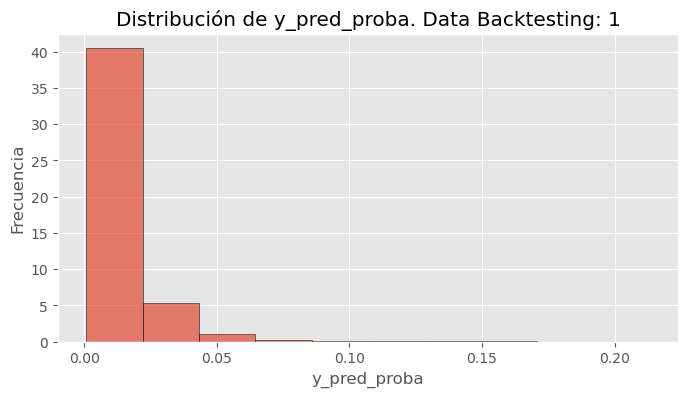

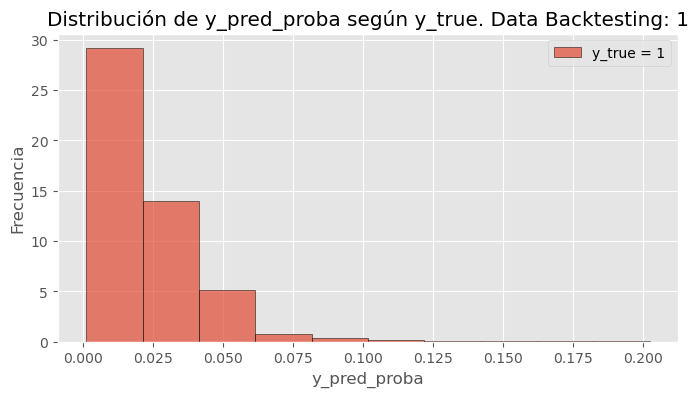

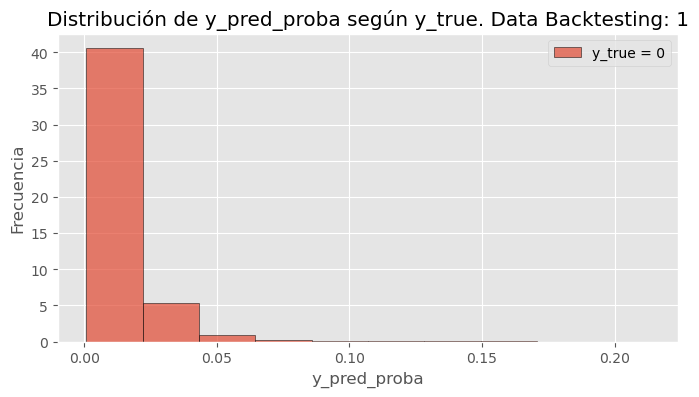

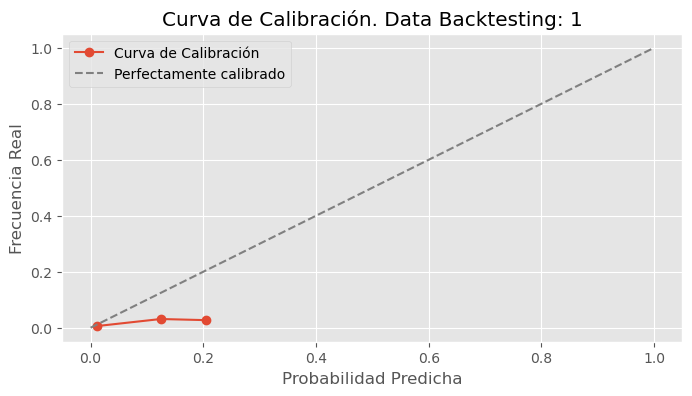

[12/16/24 19:09:58] INFO     Escenarios no medibles:                                                   ]8;id=506855;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=741171;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#672\672]8;;\
                             {'No medible 1': 72394, 'No medible 1 %': 2.3478, 'Pronosticos sin el                 
                             hashvalue en la data real': 69813}                                                    

[12/16/24 19:09:59] INFO     Marca de tiempo actual: 2024-12-16 19:09                                  ]8;id=20623;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=707406;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#686\686]8;;\

[12/16/24 19:10:01] INFO     Matriz de confusión calculada: TN=0, FP=2992808, FN=0, TP=18258           ]8;id=564214;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=813221;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#690\690]8;;\

                    INFO     Metricas calculadas en %                                                  ]8;id=463285;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=253283;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#691\691]8;;\

[12/16/24 19:10:09] INFO     Métricas generales calculadas                                             ]8;id=499081;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=223182;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#709\709]8;;\

                    INFO     Metrica de Backtesting con los filtros mas probables: 1.2276              ]8;id=794521;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=472425;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#716\716]8;;\

[12/16/24 19:10:11] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=423271;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=846261;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/metrics/_classification.py:1497:                                      
                             UndefinedMetricWarning: Precision is ill-defined and being set to 0.0                 
                             in labels with no predicted samples. Use `zero_division` parameter to                 
                             control this behavior.                                                                
                               _warn_prf(average, modifier, f"{metric.capitalize()} is",                           
                             len(result))                                                                          
                                                                                                                   

[12/16/24 19:10:13] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=973540;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=760735;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/metrics/_classification.py:1497:                                      
                             UndefinedMetricWarning: Precision is ill-defined and being set to 0.0                 
                             in labels with no predicted samples. Use `zero_division` parameter to                 
                             control this behavior.                                                                
                               _warn_prf(average, modifier, f"{metric.capitalize()} is",                           
                             len(result))                                                                          
                                                                                                                   

[12/16/24 19:10:15] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=955118;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=853475;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/metrics/_classification.py:1497:                                      
                             UndefinedMetricWarning: Precision is ill-defined and being set to 0.0                 
                             in labels with no predicted samples. Use `zero_division` parameter to                 
                             control this behavior.                                                                
                               _warn_prf(average, modifier, f"{metric.capitalize()} is",                           
                             len(result))                                                                          
                                                                                                                   

                    INFO     Reporte de clasificación generado                                         ]8;id=615792;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=30947;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#731\731]8;;\

                    INFO     Evaluación completada. Dimensión del DataFrame resultante: (24, 8)        ]8;id=920399;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=152010;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#758\758]8;;\

                    INFO     ------------------------------------------------------------------------- ]8;id=535067;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=11432;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#769\769]8;;\
                             ----------                                                                            

                    INFO     CALCULOS: 2                                                               ]8;id=102927;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=774201;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#764\764]8;;\

                    INFO     N_top: 927688                                                             ]8;id=969725;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=583628;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#660\660]8;;\

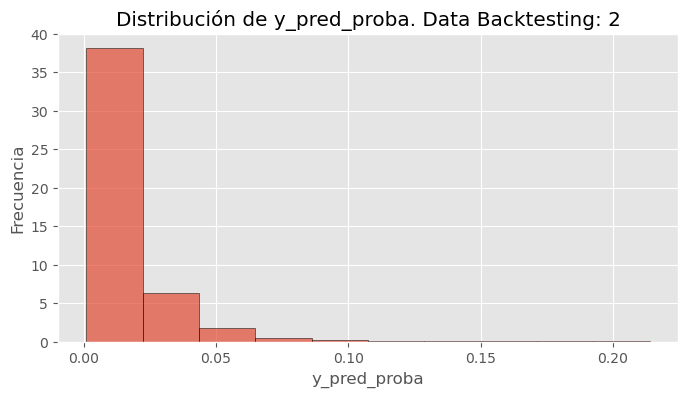

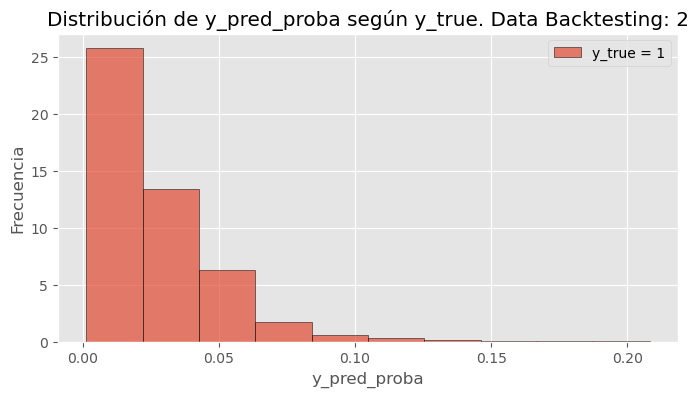

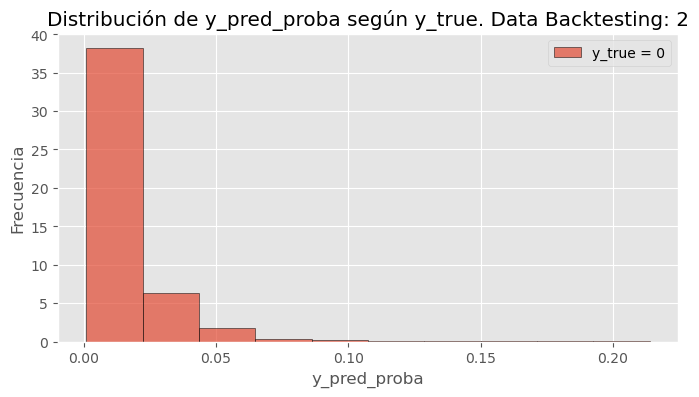

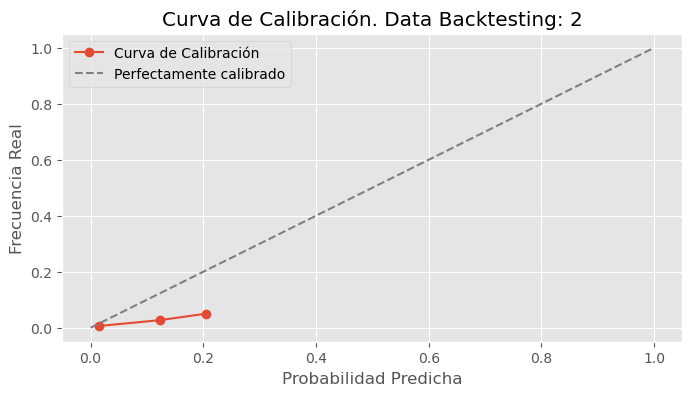

[12/16/24 19:10:16] INFO     Escenarios no medibles:                                                   ]8;id=553982;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=810568;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#672\672]8;;\
                             {'No medible 1': 150616, 'No medible 1 %': 4.8707, 'Pronosticos sin el                
                             hashvalue en la data real': 139200}                                                   

                    INFO     Marca de tiempo actual: 2024-12-16 19:10                                  ]8;id=292947;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=201832;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#686\686]8;;\

[12/16/24 19:10:18] INFO     Matriz de confusión calculada: TN=0, FP=2923878, FN=0, TP=17801           ]8;id=35789;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=966812;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#690\690]8;;\

                    INFO     Metricas calculadas en %                                                  ]8;id=481601;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=190781;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#691\691]8;;\

[12/16/24 19:10:26] INFO     Métricas generales calculadas                                             ]8;id=708681;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=968983;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#709\709]8;;\

                    INFO     Metrica de Backtesting con los filtros mas probables: 1.1996              ]8;id=789397;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=508769;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#716\716]8;;\

[12/16/24 19:10:28] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=757034;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=497807;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/metrics/_classification.py:1497:                                      
                             UndefinedMetricWarning: Precision is ill-defined and being set to 0.0                 
                             in labels with no predicted samples. Use `zero_division` parameter to                 
                             control this behavior.                                                                
                               _warn_prf(average, modifier, f"{metric.capitalize()} is",                           
                             len(result))                                                                          
                                                                                                                   

[12/16/24 19:10:30] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=761716;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=188276;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/metrics/_classification.py:1497:                                      
                             UndefinedMetricWarning: Precision is ill-defined and being set to 0.0                 
                             in labels with no predicted samples. Use `zero_division` parameter to                 
                             control this behavior.                                                                
                               _warn_prf(average, modifier, f"{metric.capitalize()} is",                           
                             len(result))                                                                          
                                                                                                                   

[12/16/24 19:10:31] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=551614;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=820908;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/metrics/_classification.py:1497:                                      
                             UndefinedMetricWarning: Precision is ill-defined and being set to 0.0                 
                             in labels with no predicted samples. Use `zero_division` parameter to                 
                             control this behavior.                                                                
                               _warn_prf(average, modifier, f"{metric.capitalize()} is",                           
                             len(result))                                                                          
                                                                                                                   

                    INFO     Reporte de clasificación generado                                         ]8;id=77538;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=257287;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#731\731]8;;\

                    INFO     Evaluación completada. Dimensión del DataFrame resultante: (24, 8)        ]8;id=788137;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=516890;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#758\758]8;;\

                    INFO     ------------------------------------------------------------------------- ]8;id=750520;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=570942;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#769\769]8;;\
                             ----------                                                                            

                    INFO     CALCULOS: 3                                                               ]8;id=927688;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=599493;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#764\764]8;;\

                    INFO     N_top: 928061                                                             ]8;id=699304;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=780622;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#660\660]8;;\

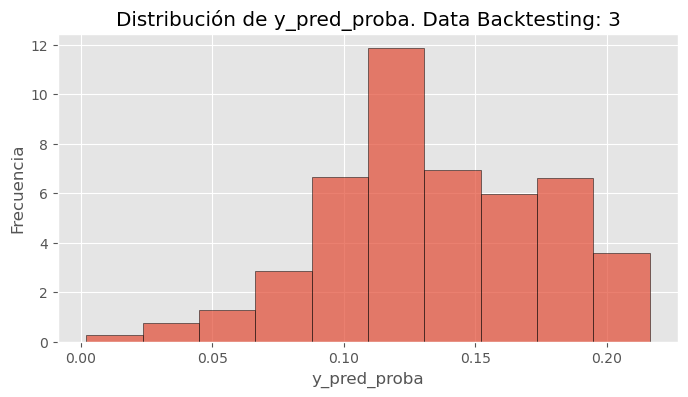

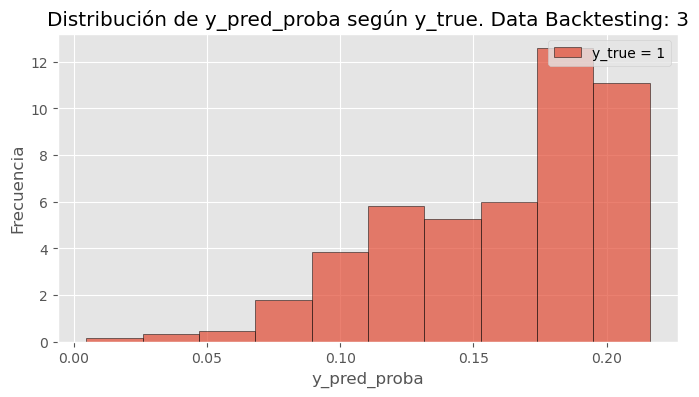

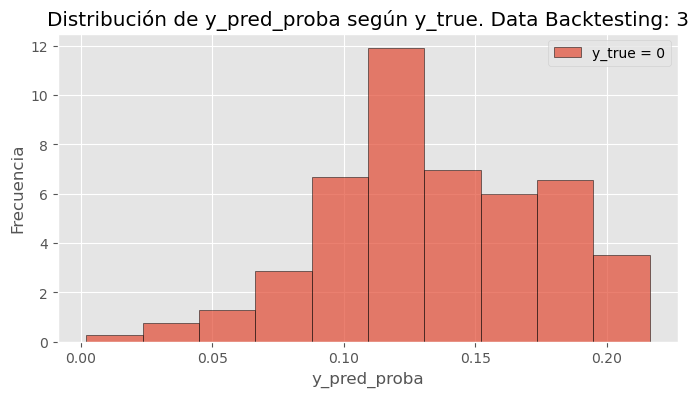

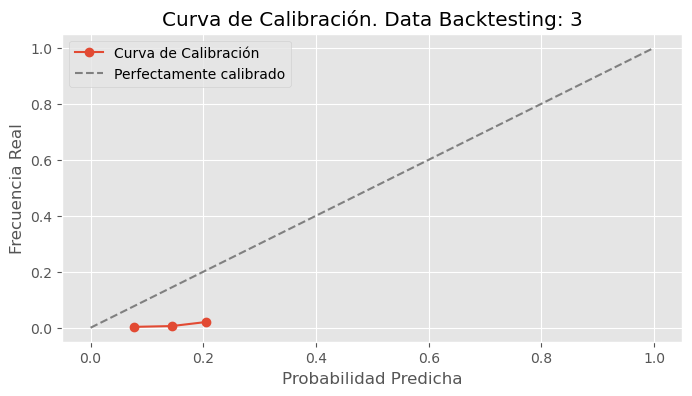

[12/16/24 19:10:33] INFO     Escenarios no medibles:                                                   ]8;id=588681;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=797049;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#672\672]8;;\
                             {'No medible 1': 238531, 'No medible 1 %': 7.7106, 'Pronosticos sin el                
                             hashvalue en la data real': 225871}                                                   

                    INFO     Marca de tiempo actual: 2024-12-16 19:10                                  ]8;id=499429;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=316536;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#686\686]8;;\

[12/16/24 19:10:35] INFO     Matriz de confusión calculada: TN=0, FP=2837557, FN=0, TP=17451           ]8;id=895788;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=41775;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#690\690]8;;\

                    INFO     Metricas calculadas en %                                                  ]8;id=44522;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=593644;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#691\691]8;;\

[12/16/24 19:10:43] INFO     Métricas generales calculadas                                             ]8;id=307646;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=95258;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#709\709]8;;\

                    INFO     Metrica de Backtesting con los filtros mas probables: 1.1631              ]8;id=168119;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=309350;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#716\716]8;;\

[12/16/24 19:10:44] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=383508;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=591199;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/metrics/_classification.py:1497:                                      
                             UndefinedMetricWarning: Precision is ill-defined and being set to 0.0                 
                             in labels with no predicted samples. Use `zero_division` parameter to                 
                             control this behavior.                                                                
                               _warn_prf(average, modifier, f"{metric.capitalize()} is",                           
                             len(result))                                                                          
                                                                                                                   

[12/16/24 19:10:47] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=328531;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=727014;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/metrics/_classification.py:1497:                                      
                             UndefinedMetricWarning: Precision is ill-defined and being set to 0.0                 
                             in labels with no predicted samples. Use `zero_division` parameter to                 
                             control this behavior.                                                                
                               _warn_prf(average, modifier, f"{metric.capitalize()} is",                           
                             len(result))                                                                          
                                                                                                                   

[12/16/24 19:10:48] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=897403;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=353762;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/metrics/_classification.py:1497:                                      
                             UndefinedMetricWarning: Precision is ill-defined and being set to 0.0                 
                             in labels with no predicted samples. Use `zero_division` parameter to                 
                             control this behavior.                                                                
                               _warn_prf(average, modifier, f"{metric.capitalize()} is",                           
                             len(result))                                                                          
                                                                                                                   

                    INFO     Reporte de clasificación generado                                         ]8;id=300275;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=642230;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#731\731]8;;\

                    INFO     Evaluación completada. Dimensión del DataFrame resultante: (24, 8)        ]8;id=613323;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=110037;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#758\758]8;;\

                    INFO     ------------------------------------------------------------------------- ]8;id=72673;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=777362;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#769\769]8;;\
                             ----------                                                                            

                    INFO     CALCULOS: Combined                                                        ]8;id=249270;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=723439;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#764\764]8;;\

                    INFO     N_top: 925038                                                             ]8;id=878499;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=559134;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#660\660]8;;\

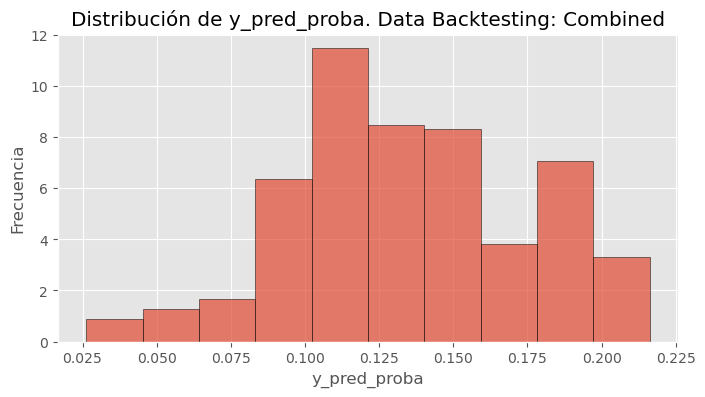

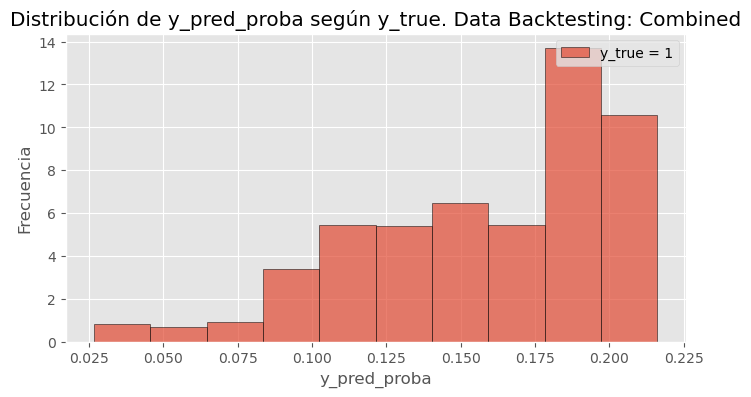

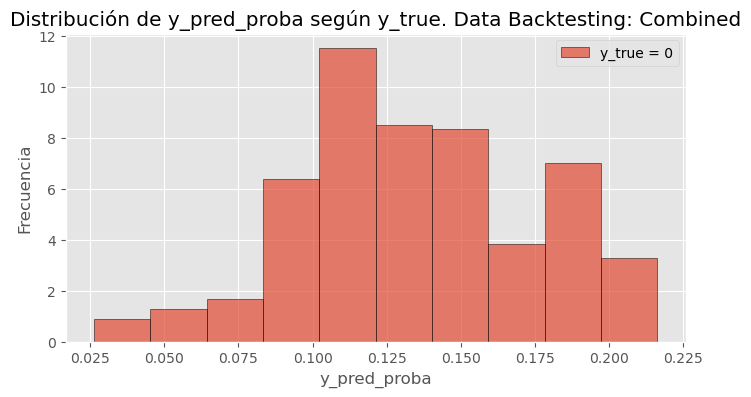

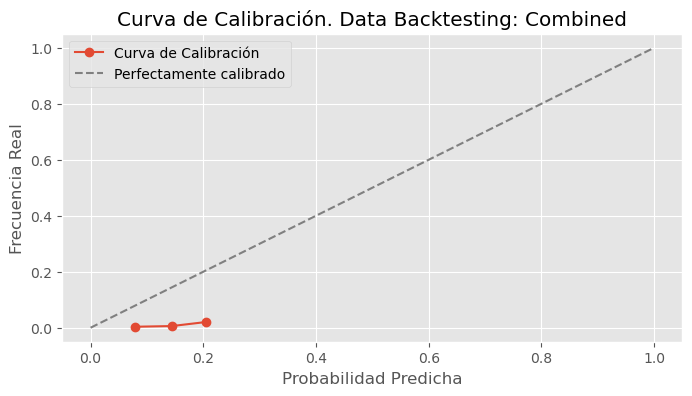

[12/16/24 19:10:50] INFO     Escenarios no medibles:                                                   ]8;id=190578;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=531857;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#672\672]8;;\
                             {'No medible 1': 237691, 'No medible 1 %': 7.7086, 'Pronosticos sin el                
                             hashvalue en la data real': 235109}                                                   

[12/16/24 19:10:51] INFO     Marca de tiempo actual: 2024-12-16 19:10                                  ]8;id=600747;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=332390;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#686\686]8;;\

[12/16/24 19:10:52] INFO     Matriz de confusión calculada: TN=0, FP=2828121, FN=0, TP=17649           ]8;id=590285;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=153008;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#690\690]8;;\

                    INFO     Metricas calculadas en %                                                  ]8;id=336479;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=255752;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#691\691]8;;\

[12/16/24 19:10:59] INFO     Métricas generales calculadas                                             ]8;id=209704;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=30759;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#709\709]8;;\

                    INFO     Metrica de Backtesting con los filtros mas probables: 1.166               ]8;id=343623;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=203781;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#716\716]8;;\

[12/16/24 19:11:01] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=147893;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=412173;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/metrics/_classification.py:1497:                                      
                             UndefinedMetricWarning: Precision is ill-defined and being set to 0.0                 
                             in labels with no predicted samples. Use `zero_division` parameter to                 
                             control this behavior.                                                                
                               _warn_prf(average, modifier, f"{metric.capitalize()} is",                           
                             len(result))                                                                          
                                                                                                                   

[12/16/24 19:11:03] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=179682;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=152663;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/metrics/_classification.py:1497:                                      
                             UndefinedMetricWarning: Precision is ill-defined and being set to 0.0                 
                             in labels with no predicted samples. Use `zero_division` parameter to                 
                             control this behavior.                                                                
                               _warn_prf(average, modifier, f"{metric.capitalize()} is",                           
                             len(result))                                                                          
                                                                                                                   

[12/16/24 19:11:04] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=488598;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=886704;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/metrics/_classification.py:1497:                                      
                             UndefinedMetricWarning: Precision is ill-defined and being set to 0.0                 
                             in labels with no predicted samples. Use `zero_division` parameter to                 
                             control this behavior.                                                                
                               _warn_prf(average, modifier, f"{metric.capitalize()} is",                           
                             len(result))                                                                          
                                                                                                                   

                    INFO     Reporte de clasificación generado                                         ]8;id=56252;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=909933;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#731\731]8;;\

                    INFO     Evaluación completada. Dimensión del DataFrame resultante: (24, 8)        ]8;id=99620;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=425200;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#758\758]8;;\

[12/16/24 19:11:05] INFO     ------------------------------------------------------------------------- ]8;id=563832;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=479053;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#769\769]8;;\
                             ----------                                                                            

In [39]:
data_metrics_backtesting = backtesting.generate_metrics_all(data_process1,parametros)

In [40]:
data_backtesting = backtesting.generate_ks_all(data_metrics_backtesting,parametros)

                    INFO     CALCULOS: 1                                                               ]8;id=400702;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=658174;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#885\885]8;;\

                    INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=774477;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=454010;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#796\796]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=104989;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=459435;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#834\834]8;;\

                    INFO     Deciles donde el ks aumenta:  [9, 8]                                      ]8;id=443670;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=858183;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#858\858]8;;\

decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      2.66     21.33          308346             5769            1.87   
1      9      1.76      2.66          308346             3226            1.05   
2      8      1.12      1.76          308346             2166            0.70   
3      7      0.90      1.12          293682             1346            0.46   
4      6      0.74      0.90          311894             1297            0.42   
5      5      0.62      0.74          319462             1246            0.39   
6      4      0.54      0.62          308346              988            0.32   
7      3      0.50      0.54          293712              799            0.27   
8      2      0.47      0.50          322980              681            0.21   
9      1      0.07      0.47          308346              740            0.24   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          31.60               10.00    21.60  
1          49.27               20.00    29.27  
2          61.13               30.00    31.13  
3          68.50               39.52    28.98  
4          75.61               49.64    25.97  
5          82.43               60.00    22.43  
6          87.84               70.00    17.84  
7          92.22               79.53    12.69  
8          95.95               90.00     5.95  
9         100.00              100.00     0.00

                    INFO     ------------------------------------------------------------------------- ]8;id=770670;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=377904;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#895\895]8;;\
                             ----------                                                                            

                    INFO     CALCULOS: 2                                                               ]8;id=95574;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=732807;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#885\885]8;;\

                    INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=641790;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=851378;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#796\796]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=945606;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=205232;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#834\834]8;;\

                    INFO     Deciles donde el ks aumenta:  [9, 8]                                      ]8;id=631759;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=270731;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#858\858]8;;\

decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10      3.13     21.40          309230             5342            1.73   
1      9      2.10      3.13          309229             3222            1.04   
2      8      1.36      2.10          309230             2278            0.74   
3      7      1.13      1.36          295082             1247            0.42   
4      6      0.89      1.13          323376             1349            0.42   
5      5      0.76      0.89          309191             1035            0.33   
6      4      0.64      0.76          309268             1036            0.33   
7      3      0.56      0.64          309230              855            0.28   
8      2      0.52      0.56          309229              732            0.24   
9      1      0.09      0.52          309230              705            0.23   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          30.01               10.00    20.01  
1          48.11               20.00    28.11  
2          60.91               30.00    30.91  
3          67.91               39.54    28.37  
4          75.49               50.00    25.49  
5          81.30               60.00    21.31  
6          87.12               70.00    17.12  
7          91.93               80.00    11.93  
8          96.04               90.00     6.04  
9         100.00              100.00     0.00

                    INFO     ------------------------------------------------------------------------- ]8;id=510543;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=881326;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#895\895]8;;\
                             ----------                                                                            

                    INFO     CALCULOS: 3                                                               ]8;id=803559;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=816618;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#885\885]8;;\

                    INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=981853;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=845455;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#796\796]8;;\

[12/16/24 19:11:06] INFO     Calculando el estadístico KS para cada decil...                           ]8;id=820382;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=790912;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#834\834]8;;\

                    INFO     Deciles donde el ks aumenta:  [9, 8]                                      ]8;id=287690;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=111820;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#858\858]8;;\

decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10     19.14     21.67          309354             5139            1.66   
1      9     17.75     19.14          309354             3101            1.00   
2      8     15.82     17.75          240085             1822            0.76   
3      7     14.61     15.82          367925             1530            0.42   
4      6     13.20     14.61          320051             1264            0.39   
5      5     12.12     13.20          309354             1059            0.34   
6      4     11.30     12.12          309354              829            0.27   
7      3     10.43     11.30          309354              870            0.28   
8      2      8.67     10.43          309338             1009            0.33   
9      1      0.20      8.67          309370              828            0.27   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          29.45               10.00    19.45  
1          47.22               20.00    27.22  
2          57.66               27.76    29.90  
3          66.43               39.65    26.77  
4          73.67               50.00    23.67  
5          79.74               60.00    19.74  
6          84.49               70.00    14.49  
7          89.47               80.00     9.47  
8          95.26               90.00     5.26  
9         100.00              100.00     0.00

                    INFO     ------------------------------------------------------------------------- ]8;id=16862;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=63396;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#895\895]8;;\
                             ----------                                                                            

                    INFO     CALCULOS: Combined                                                        ]8;id=127363;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=957538;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#885\885]8;;\

                    INFO     Iniciando análisis KS por deciles de probabilidad...                      ]8;id=56700;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=607082;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#796\796]8;;\

                    INFO     Calculando el estadístico KS para cada decil...                           ]8;id=417124;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=792445;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#834\834]8;;\

[12/16/24 19:11:07] INFO     Deciles donde el ks aumenta:  [9, 8]                                      ]8;id=792018;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=172232;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#858\858]8;;\

decil  prob_min  prob_max  total_clientes  total_aperturas  tasa_aperturas  \
0     10     19.15     21.67          308346             5125            1.66   
1      9     17.77     19.15          308346             3087            1.00   
2      8     15.82     17.77          242456             1854            0.76   
3      7     14.61     15.82          367987             1533            0.42   
4      6     13.23     14.61          314595             1248            0.40   
5      5     12.14     13.23          308346             1059            0.34   
6      4     11.32     12.14          308346              830            0.27   
7      3     10.49     11.32          308346              849            0.28   
8      2      8.71     10.49          308333             1020            0.33   
9      1      2.62      8.71          308360             1044            0.34   

   cum_aperturas  cum_prob_esperadas  ks_stat  
0          29.04               10.00    19.04  
1          46.53               20.00    26.53  
2          57.03               27.86    29.17  
3          65.72               39.80    25.92  
4          72.79               50.00    22.79  
5          78.79               60.00    18.79  
6          83.49               70.00    13.49  
7          88.31               80.00     8.31  
8          94.08               90.00     4.09  
9         100.00              100.00     0.00

                    INFO     ------------------------------------------------------------------------- ]8;id=563361;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py\nodes.py]8;;\:]8;id=821541;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/backtesting/nodes.py#895\895]8;;\
                             ----------                                                                            